In [2]:
import numpy as np
import sys, os
import MDAnalysis as md
from MDAnalysis.analysis import align
from MDAnalysis.analysis.distances import distance_array
from MDAnalysis.lib.distances import apply_PBC, augment_coordinates
from MDAnalysis.lib.mdamath import triclinic_vectors
from MDAnalysis.topology.guessers import guess_bonds

# import trilateration part of the LAWS algorithm
from laws import ( 
    solve3Dtrilateration_nonlinear_python_lm
)

# import function necessary for analysis of a simulation
from laws import (
    find_N_closest_heavy_atoms,
    find_chains,
    create_connectors,
    find_pbc_coords,
    apply_correction,
    find_offsets,
    visualize_step 
)

# This function assumes that atomic coordinates are written consequtively (chain by chain) in the structure file from the very beginning of the file.
# It creates MDAnalysis selection for each chain (can be applied to both CRYSTAL_STRUCTURE and MD struct) for further analysis
stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
N_atoms_in_chain = 2410 # Number of protein atoms in each chain.
n_waters = 18 # Number of CWS in the crystal structure.
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
if N_chains >=1:
    chains = find_chains(N_chains, N_atoms_in_chain)


crystal = md.Universe(CRYSTAL_STRUCTURE)
crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.

# print(crystal, crystal_box)
# local_distances = np.zeros((local_size, n_waters), dtype=np.float)

# Selecting only heavy atoms in each chain
heavy_atoms = crystal.select_atoms('protein and not type H')
crystal_heavy_atoms_chains = [
    crystal.select_atoms('protein and not type H ' + chain) for chain in chains
]

# print(heavy_atoms, crystal_heavy_atoms_chains)

# Selecting all CWS from the crystal structure.
# Numbering of CWS must be consequtive (chain by chain) and should go after protein coordinates.
# Naming of CWS oxygens must be resname HOH, atom name OW.
crystal_waters_chains = [
    crystal.select_atoms('resname HOH and name O')
]
# print(crystal_waters_chains)

# Find nearest neighbour heavy atoms for each CWS around each chain 
crystal_waters_info = [
        [
            find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains[chain]
        ] for chain in range(N_chains)
        ]
# print(len(crystal_waters_info))
# Find distances from each protein atom to CWS
heavy_distances = [d for _, _, d in crystal_waters_info[0]]

print(heavy_distances)


/Users/xhu/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[array([2.29421859, 3.45253781, 3.46845005, 3.48753039, 3.75011207,
       3.76473754, 4.02946947, 4.04129689, 4.31232766, 4.48256583]), array([2.30019061, 3.25082018, 3.27890472, 3.34618464, 3.56127932,
       3.62723389, 3.69077771, 3.69188444, 3.74563351, 3.83766338]), array([4.88185146, 5.01969928, 5.17706793, 5.45035737]), array([2.33897224, 3.11616104, 3.15201153, 3.27121523, 3.31429098,
       3.3461451 , 3.40336455, 3.65532681, 3.65894378, 3.72665226]), array([2.37209064, 3.02709547, 3.2405983 , 3.40560748, 3.40823524,
       3.62061203, 3.65465289, 3.74172519, 4.1276886 , 4.38989671]), array([2.37505922, 3.33876011, 3.57846098, 3.99501444, 4.16718342,
       4.438072  , 4.50158166]), array([2.38098207, 2.90884016, 3.34783691, 3.59230886, 3.93720622,
       4.00706234, 4.22395825, 4.23136525, 4.29282515, 4.50642699]), array([2.39371642, 2.66169298, 3.23912125, 3.25928226, 3.33551485,
       3.36038645, 3.54503832, 3.56324072, 3.85499141, 3.85896296]), array([2.40620181, 3.52276

note try sorting each type into an arrangement then use atomic distances to find the distance to the nearest protein to try to define them that way

In [3]:
#defining empty arrays
Full_seg_id =[]
list_of_list = []
    
#defining the crystal structure as the filepath
CRYSTAL_STRUCTURE = '/Users/xhu/mobile_on_ref.pdb'
#loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)
crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)
heavy_atoms = crystal.select_atoms('protein and not type H')
Helix_Not_2YDV_resid = set([atoms.resid for atoms in heavy_atoms])

#print Check
# print(Helix_Not_2YDV_resid)
Helix_Yes_2YDV = []
for number in range(305):
    if number not in Helix_Not_2YDV_resid:
        Helix_Yes_2YDV.append(number)
        
print(Helix_Yes_2YDV)

[0, 1, 34, 38, 39, 69, 70, 71, 72, 73, 108, 109, 110, 116, 117, 142, 143, 144, 145, 146, 147, 148, 149, 150, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 171, 172, 173, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 259, 260, 261, 262, 263, 264, 265, 266, 281, 292]


In [679]:
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
#for loop over each file in the folder 

#Define empty arrays
Full_seg_id =[]
list_of_list = []

#for loop for each file
for filepath in glob.iglob('/Users/xhu/Aligned_Crystals_2YDV_reference/*_aligned_to_2YDV.pdb'):
#     print(filepath) 
    
    #defining the crystal structure as the filepath
    CRYSTAL_STRUCTURE = filepath
    #loading into MD analysis as a universe 
    crystal = md.Universe(CRYSTAL_STRUCTURE)
    crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)

#Defining some lists as well as the heavy atoms that we need
    water_list =  list(crystal.select_atoms("resname HOH"))
    heavy_atoms = crystal.select_atoms('protein and not type H')
    heavy_atoms_position = heavy_atoms.positions
#print check for the length of heavy atoms and the amount of water to ensure everything matches up
#     print(len(heavy_atoms_position))
#     print(len(water_list))

#some definitions for the LAWs module
    stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
    N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
    N_atoms_in_chain = len(heavy_atoms_position) # Number of protein atoms in each chain.
    n_waters = len(water_list) # Number of CWS in the crystal structure.

#using MD analysis to select atoms as well as the LAWs code to find the closest heavy atoms
    crystal_waters_chains = crystal.select_atoms('resname HOH and name O')
    crystal_waters_info = [find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains]

    #defining resetting lists
    Dist = []
    seg_id = []
# for loop to print the closest protein information distance and location.
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][0][0][1])
        #Set stuff is a list of variables that are helix's and not part of the Y2DV
        if crystal_waters_info[i][0][0][1] in Helix_Not_2YDV_resid:
            #Append to empty defined lists
            list_of_list.append(crystal_waters_info[i][0][0][1])
            
    
#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][1][0])

#Another check to make sure it works
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][2][0])
        Dist.append(crystal_waters_info[i][2][0])
    
    
    continue
print(list_of_list)

[288, 256, 238, 59, 63, 102, 169, 80, 90, 52, 169, 6, 197, 291, 207, 228, 94, 90, 280, 271, 256, 85, 207, 153, 282, 88, 250, 80, 277, 52, 273, 169, 235, 181, 84, 168, 75, 112, 250, 81, 278, 304, 170, 256, 268, 107, 199, 271, 75, 280, 277, 91, 40, 174, 294, 267, 168, 169, 157, 293, 268, 175, 284, 169, 63, 231, 231, 169, 197, 36, 300, 6, 43, 24, 207, 80, 288, 258, 238, 80, 170, 228, 256, 280, 102, 151, 228, 59, 90, 256, 256, 63, 90, 169, 245, 280, 278, 235, 181, 227, 256, 81, 257, 199, 157, 94, 41, 282, 35, 294, 169, 250, 85, 40, 91, 280, 250, 234, 124, 179, 66, 169, 224, 2, 284, 93, 267, 84, 29, 75, 271, 175, 113, 111, 294, 175, 174, 298, 226, 291, 102, 268, 207, 296, 274, 3, 224, 153, 293, 293, 291, 67, 151, 227, 303, 257, 75, 230, 203, 115, 257, 230, 274, 63, 66, 67, 91, 102, 129, 153, 169, 170, 234, 234, 245, 250, 256, 277, 280, 280, 282, 283, 286, 288, 63, 169, 80, 245, 52, 253, 197, 288, 238, 235, 59, 206, 81, 35, 205, 202, 63, 203, 29, 41, 304, 300, 113, 226, 278, 120, 84, 293, 19

Largest frequency water Locations
47 82.35294117647058
169 82.35294117647058
253 82.35294117647058
277 82.35294117647058
Above 60% Freq
59


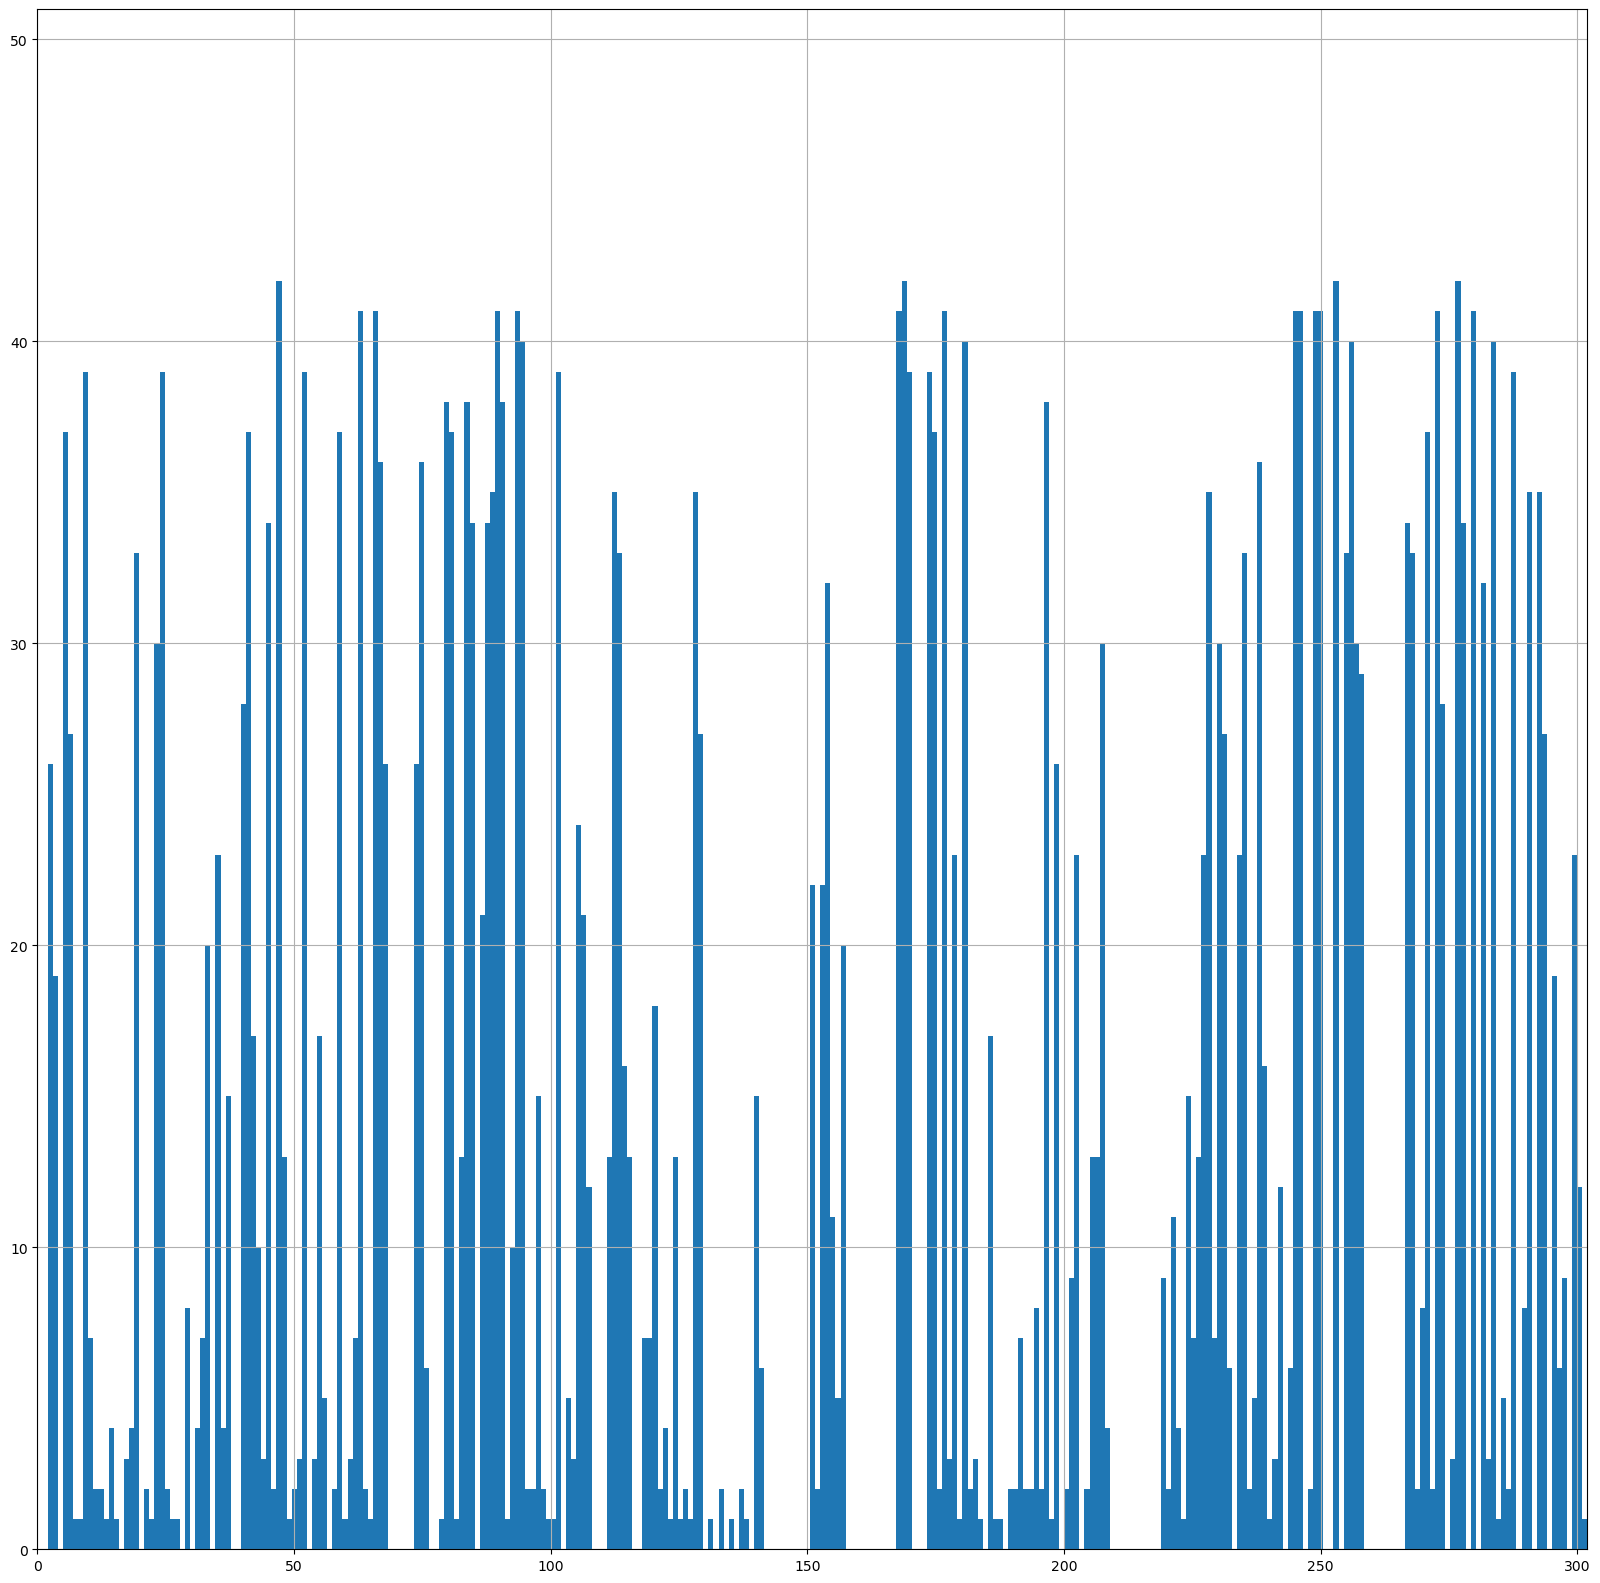

51


In [4]:
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
#for loop over each file in the folder 

#Define some initial parameters 
Full_seg_id = []
list_of_list = []
empty_a2a = []
Total_Files = 0
empty_a2a = 0

#For loop over the filepaths 
for filepath in glob.iglob('/Users/xhu/Aligned_Crystals_2YDV_reference/*_aligned_to_2YDV.pdb'):
#     print(filepath) 
    Total_Files += 1 
    #defining the crystal structure as the filepath
    CRYSTAL_STRUCTURE = filepath
    #loading into MD analysis as a universe 
    crystal = md.Universe(CRYSTAL_STRUCTURE)
    crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)

#Defining some lists as well as the heavy atoms that we need
    water_list =  list(crystal.select_atoms("resname HOH"))
    heavy_atoms = crystal.select_atoms('protein and not type H')
    heavy_atoms_position = heavy_atoms.positions
#print check for the length of heavy atoms and the amount of water to ensure everything matches up
#     print(len(heavy_atoms_position))
#     print(len(water_list))

#some definitions for the LAWs module
    stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
    N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
    N_atoms_in_chain = len(heavy_atoms_position) # Number of protein atoms in each chain.
    n_waters = len(water_list) # Number of CWS in the crystal structure.

#using MD analysis to select atoms as well as the LAWs code to find the closest heavy atoms
    crystal_waters_chains = crystal.select_atoms('resname HOH and name O')
    crystal_waters_info = [find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains]

    Dist = []
    seg_id = []
# for loop to print the closest protein information distance and location.
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][0])
        #Only takes the closest 4 heavy atoms
        for j in range(3):      
            
            #sort it by the resid that only includes helix and not 2YDV
            if crystal_waters_info[i][0][j][1] in Helix_Not_2YDV_resid:
                seg_id.append(crystal_waters_info[i][0][j][1])

#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][1][0])


#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][2][0])
#         Dist.append(crystal_waters_info[i][2][0])

#to cancle out repeating values
    new_seg_id =[]
    for seg in seg_id:
        if seg not in new_seg_id:
            new_seg_id.append(seg)
            Full_seg_id.append(seg)
#Some pbd files have no water and for those we want to jot down the number of empty a2a files 
    if len(seg_id) == 0 :
        empty_a2a += 1
            
#     print("file break")

    
import matplotlib.pyplot as plt

#using np.histogram to seperate each values into bins and counts 
counts, bin_edges = np.histogram(Full_seg_id, bins=np.max(Full_seg_id)-2)

#Instead of counts we want the percentage of frequency over the files that do have water 
Counts_percentage = (counts/(Total_Files - empty_a2a) * 100).tolist()
#Finding the max frequency of watersites for each a2a
Max_Frequency = np.max(Counts_percentage)


#Printing some statistics about the water locations 
print("Largest frequency water Locations")
for resid in range(len(Counts_percentage)):
  
    #Checking for the max Frequency and printing the results
    if Counts_percentage[resid] == Max_Frequency:
        print(resid+2, Max_Frequency)
print("Above 60% Freq")
List_above_60 = []

#Checks each resid for any resid that exceds a conformation of 60%
for resid in range(len(Counts_percentage)):
    
    if Counts_percentage[resid] > 60:
        List_above_60.append((resid, Counts_percentage[resid]))
print(len(List_above_60))

#plot
plt.figure(figsize=(20, 20))
plt.hist(Full_seg_id, bins=np.max(Full_seg_id)+1)
plt.ylim(0,Total_Files - empty_a2a)
plt.xlim(0,len(Counts_percentage))
plt.grid()
plt.show() 
print((Total_Files - empty_a2a))

## The process firstly we find the  heavy atoms within 4.5 angstroms for each water in each universe. Then we take 
the closest 4 atoms for each water (they're sorted by closes so we can take the index from 0 to 3) and then note their resid down for later making sure that the heavy atoms that we selected are part of the helix's of the A2A and not any other seccondary structure or part of the 2YDV. Then for each universe we have a set of 4 resid's for each water which we will then we note each unique resid for each universe so we now have a list of resid's that have a water that has been identified as being within the 4 closest heavy atoms(this step is done so we don't have repeating values). Now for each universe we have a set of resid's that have a close water molecule, which we will then plot over a histogram so we can see the frequency of each heavy atom having a closest water molecule.

Largest frequency water Locations
47 82.35294117647058
169 82.35294117647058
253 82.35294117647058
277 82.35294117647058
Above 30% Freq
Number of empty a2a files 15
51


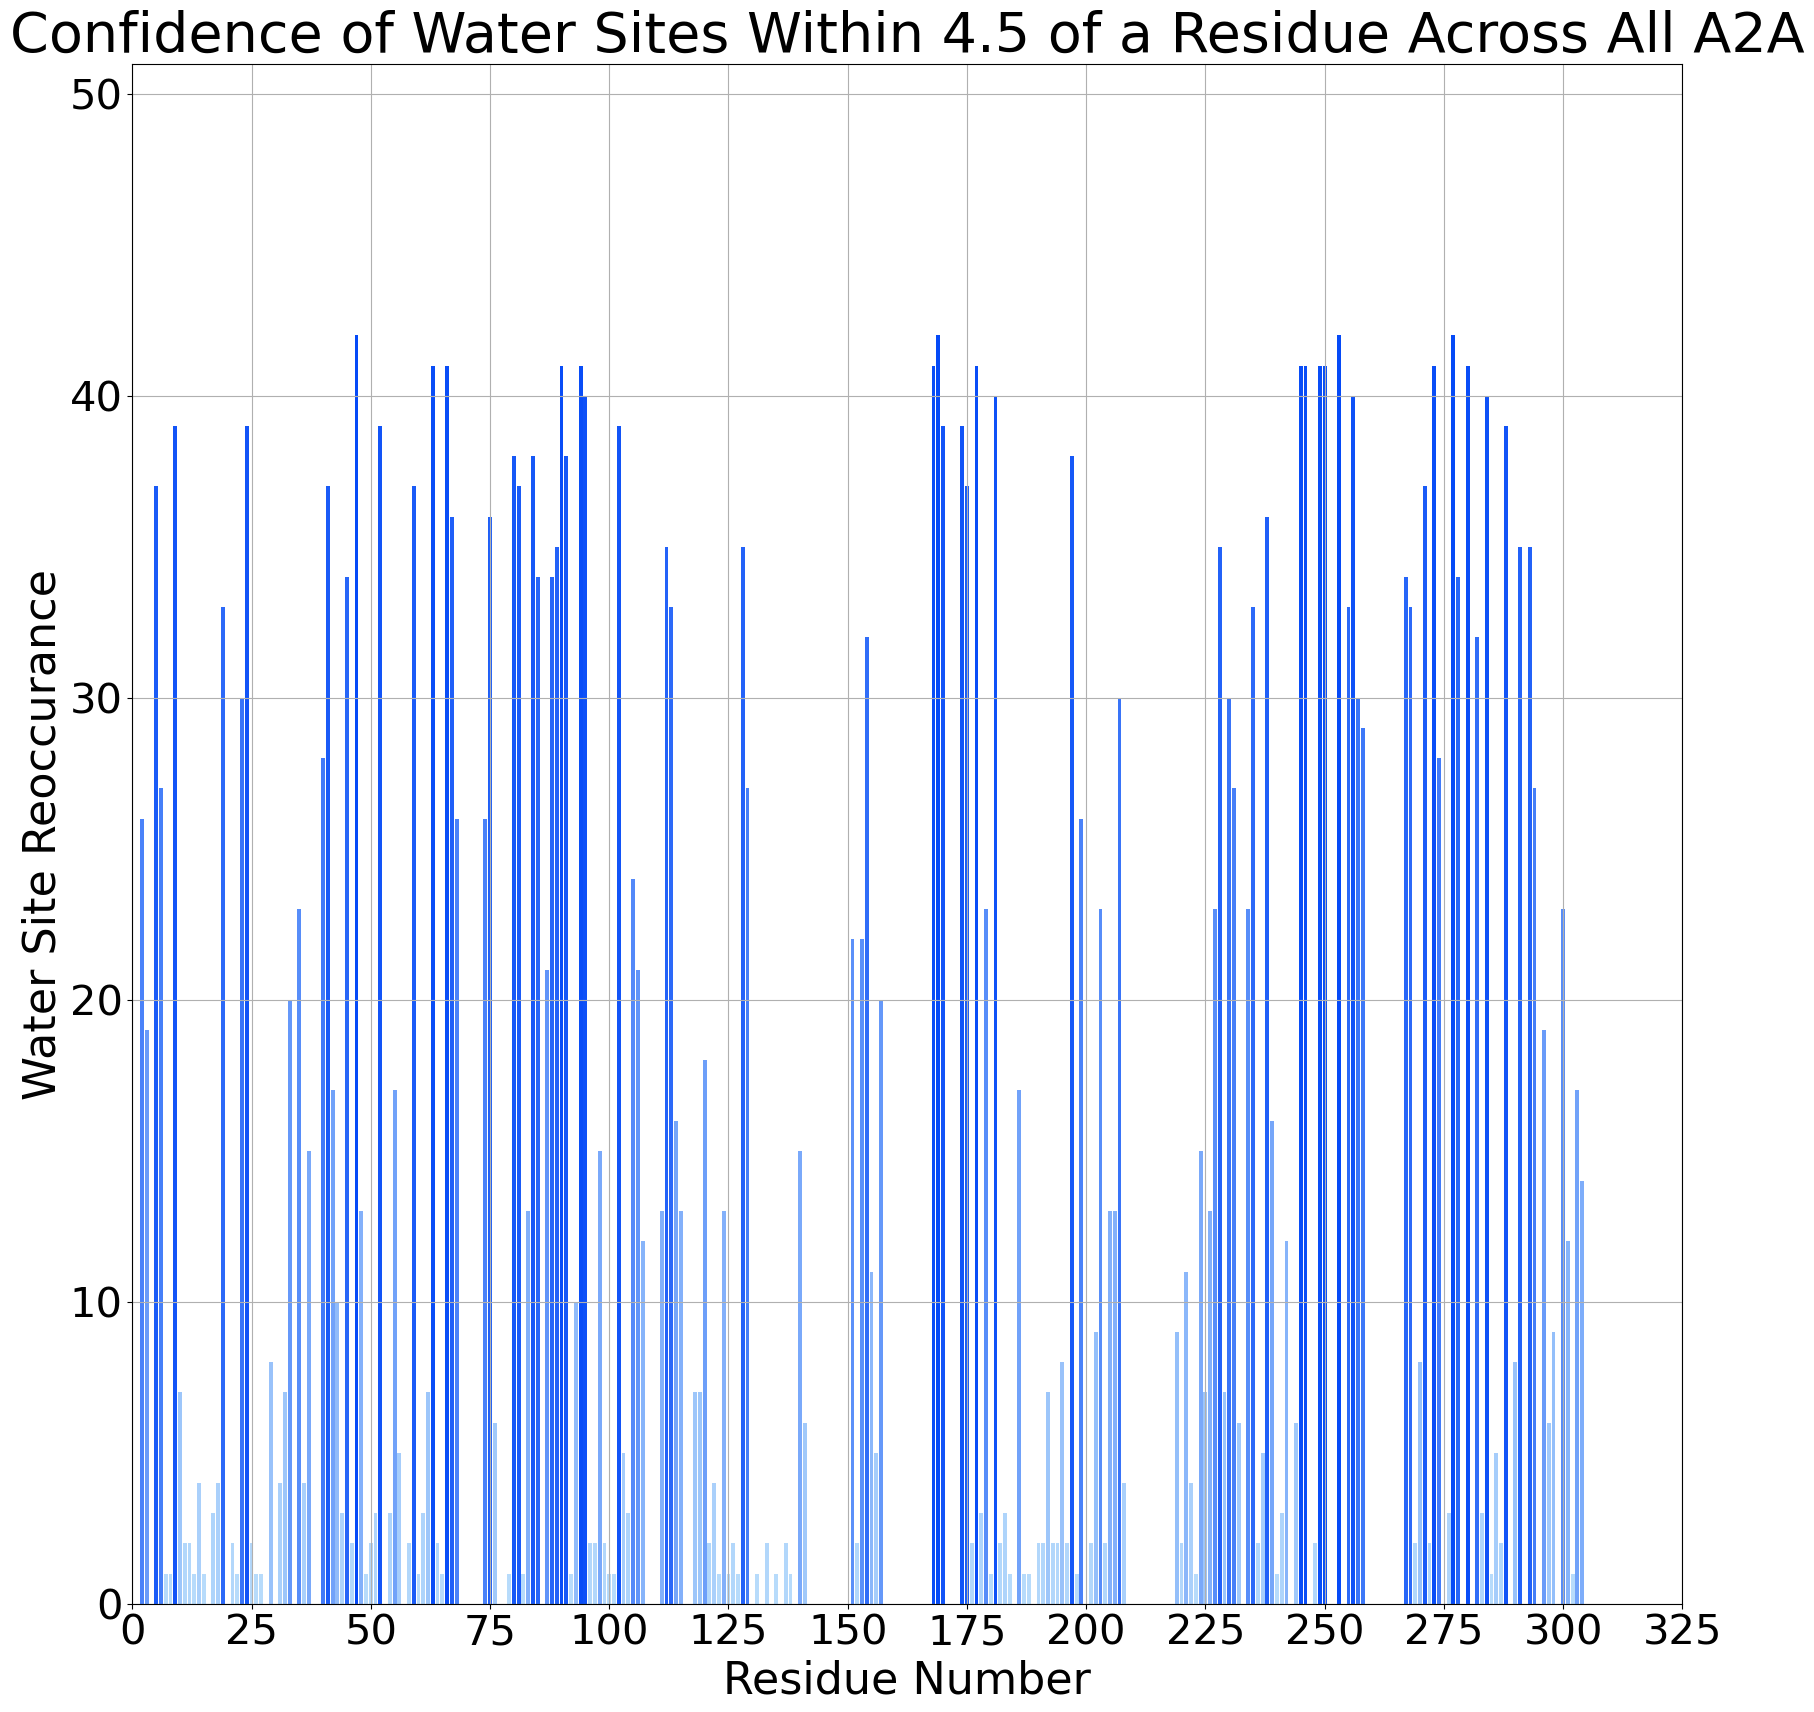

[3.9215686274509802]


In [31]:
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
import matplotlib as mpl
#for loop over each file in the folder 

Full_seg_id = []
list_of_list = []
empty_a2a = 0
Total_Files = 0

def get_filename(filepath):
    "From a given filepath it finds the name of the file in this case it finds only the conformation number"

    import re

    temp = os.path.basename(filepath)[:-7].split('_')[0]

    a = re.findall('^[0-9]*', temp)[0]

    b = temp[len(a):]

    return ''.join([a, b])

#repeat over each file 
for filepath in glob.iglob('/Users/xhu/Aligned_Crystals_2YDV_reference/*_aligned_to_2YDV.pdb'):
#     print(get_filename(filepath))
    Total_Files += 1 
    #defining the crystal structure as the filepath
    CRYSTAL_STRUCTURE = filepath
    #loading into MD analysis as a universe 
    crystal = md.Universe(CRYSTAL_STRUCTURE)
    crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)

#Defining some lists as well as the heavy atoms that we need
    water_list =  list(crystal.select_atoms("resname HOH"))
    heavy_atoms = crystal.select_atoms('protein and not type H')
    heavy_atoms_position = heavy_atoms.positions
#print check for the length of heavy atoms and the amount of water to ensure everything matches up
#     print(len(heavy_atoms_position))
#     print(len(water_list))

#some definitions for the LAWs module
    stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
    N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
    N_atoms_in_chain = len(heavy_atoms_position) # Number of protein atoms in each chain.
    n_waters = len(water_list) # Number of CWS in the crystal structure.

#using MD analysis to select atoms as well as the LAWs code to find the closest heavy atoms
    crystal_waters_chains = crystal.select_atoms('resname HOH and name O')
    crystal_waters_info = [find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains]

    Dist = []
    seg_id = []
# for loop to print the closest protein information distance and location.
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][0])
        #Only takes the closest 4 heavy atoms
        for j in range(3):      
            
            #sort it by the set stuff
            if crystal_waters_info[i][0][j][1] in Helix_Not_2YDV_resid:
                seg_id.append(crystal_waters_info[i][0][j][1])

#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][1][0])


#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][2][0])
#         Dist.append(crystal_waters_info[i][2][0])

#to cancle out repeating values
    
    new_seg_id =[]
    for seg in seg_id:
        if seg not in new_seg_id:
            new_seg_id.append(seg)
            Full_seg_id.append(seg)

#Some pbd files have no water and for those we want to jot down the number of empty a2a files 
    if len(seg_id) == 0 :
        empty_a2a += 1

#     print("file break")

    continue
import matplotlib.pyplot as plt
#using np.histogram to seperate each values into bins and counts 
counts, bin_edges = np.histogram(Full_seg_id, bins=np.max(Full_seg_id)-1, range=(2,305))
#Instead of counts we want the percentage of frequency over the files that do have water 
Counts_percentage = (counts/(Total_Files - empty_a2a) * 100).tolist()
#Finding the max frequency of watersites for each a2a
Max_Frequency = np.max(Counts_percentage)
#Printing some statistics about the water locations 
print("Largest frequency water Locations")
for resid in range(len(Counts_percentage)):
  
    if Counts_percentage[resid] == Max_Frequency:
        print(resid+2, Max_Frequency)

        
print("Above 30% Freq")
List_above_30 = []
for resid in range(len(Counts_percentage)):
    
    if resid == 48 :
        List_above_30.append(Counts_percentage[resid])


print("Number of empty a2a files", empty_a2a)
colours = ["#bbdefb", "#054af7"]
# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(counts), np.max(counts)) # linearly normalizes data into the [0.0, 1.0] interval
Resid_Confidence = np.append([0] * 2, counts)
print(Total_Files - empty_a2a)
#plot
mpl.rc('xtick', labelsize=30) 
mpl.rc('ytick', labelsize=30) 
plt.figure(figsize=(20, 20))
plt.bar(range(len(Resid_Confidence)),Resid_Confidence, color=cmap(norm(Resid_Confidence)))
plt.ylim(0,Total_Files - empty_a2a)
plt.xlim(0)
plt.xticks((0,25,50,75,100,125,150,175,200,225,250,275,300,325))
plt.grid()
plt.title('Confidence of Water Sites Within 4.5 of a Residue Across All A2A', fontsize= 40)
plt.xlabel('Residue Number',fontsize= 32)
plt.ylabel('Water Site Reoccurance',fontsize= 32)

plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Confidence",bbox_inches='tight')
plt.show() 



[0.0]


In [647]:
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
    #loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)
protein = crystal.select_atoms('all')
top = []

#repeat for each atom in the protein
for atom in protein :
    
    #For atoms outside the main body set 0
    if atom.resid < 2 :
        top.append(0)
    
    #For atoms within our range of values we set the number equal to the frequency observed
    if atom.resid < 303 and atom.resid >= 2:
        top.append(counts[atom.resid - 1]) 
        
    #for atoms outside the main body set 0
    if atom.resid >= 303:
        top.append(0)
crystal.add_TopologyAttr('tempfactors')
crystal.atoms.tempfactors = top
crystal.atoms.write("new_confidence.pdb")

7aro  Watersite Resid : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



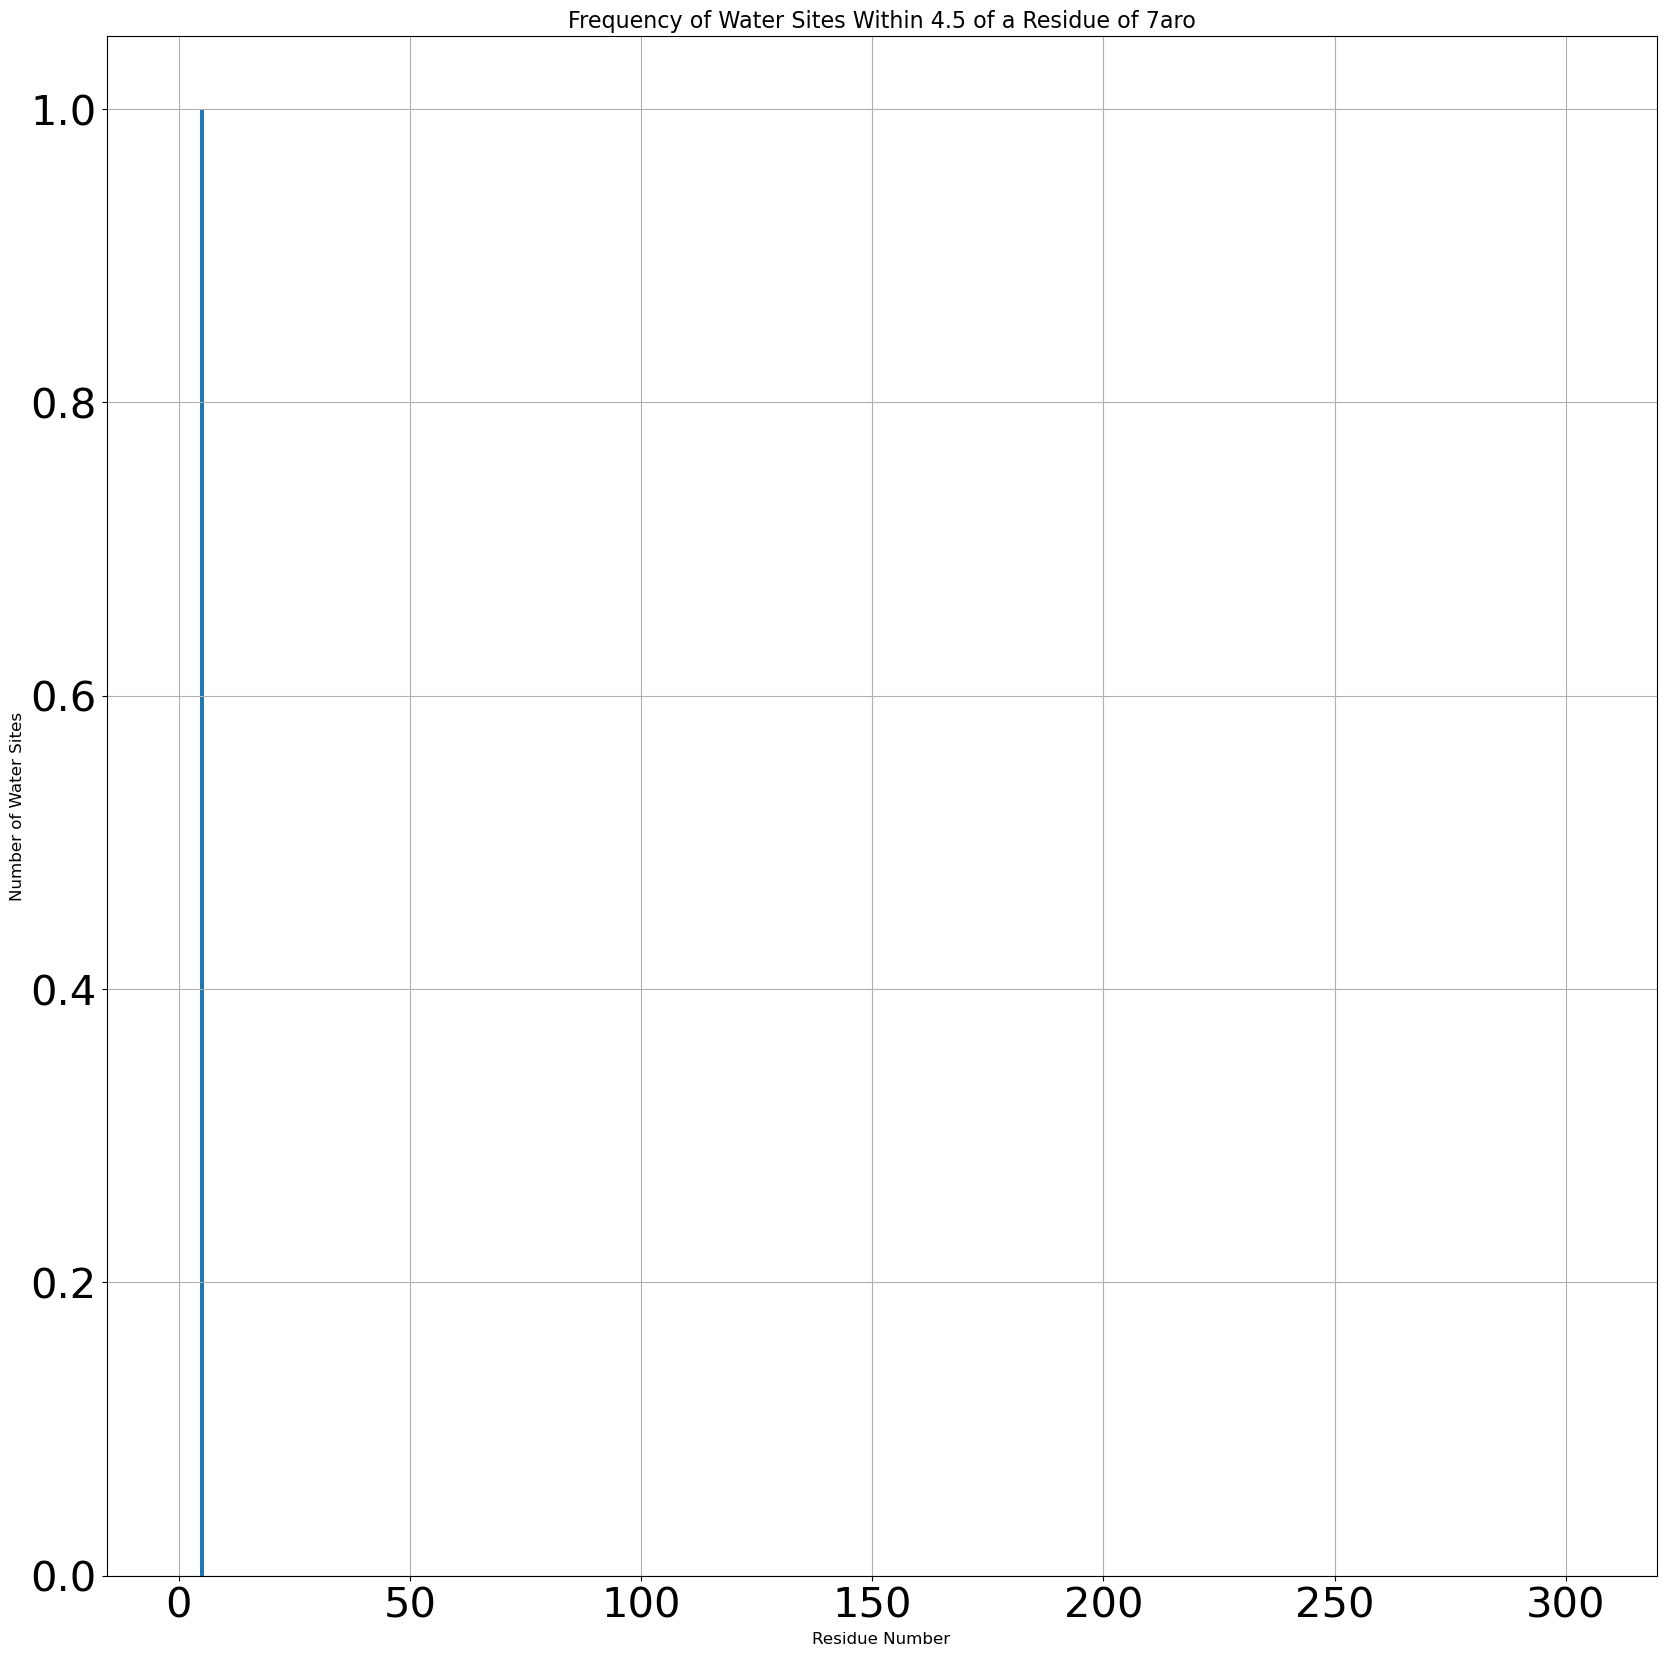

6wqa  Watersite Resid : [0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 7, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 6, 0, 0, 5, 2, 1, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 4, 2, 0, 0, 7, 1, 0, 1, 4, 2, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 11, 8, 0, 0, 0, 4, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 5, 0, 0, 3, 2, 0, 0, 2, 0, 2, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 7, 0, 1, 2, 0, 0, 3, 4, 0, 6, 0, 1, 0, 7, 1, 0, 0, 3, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3]



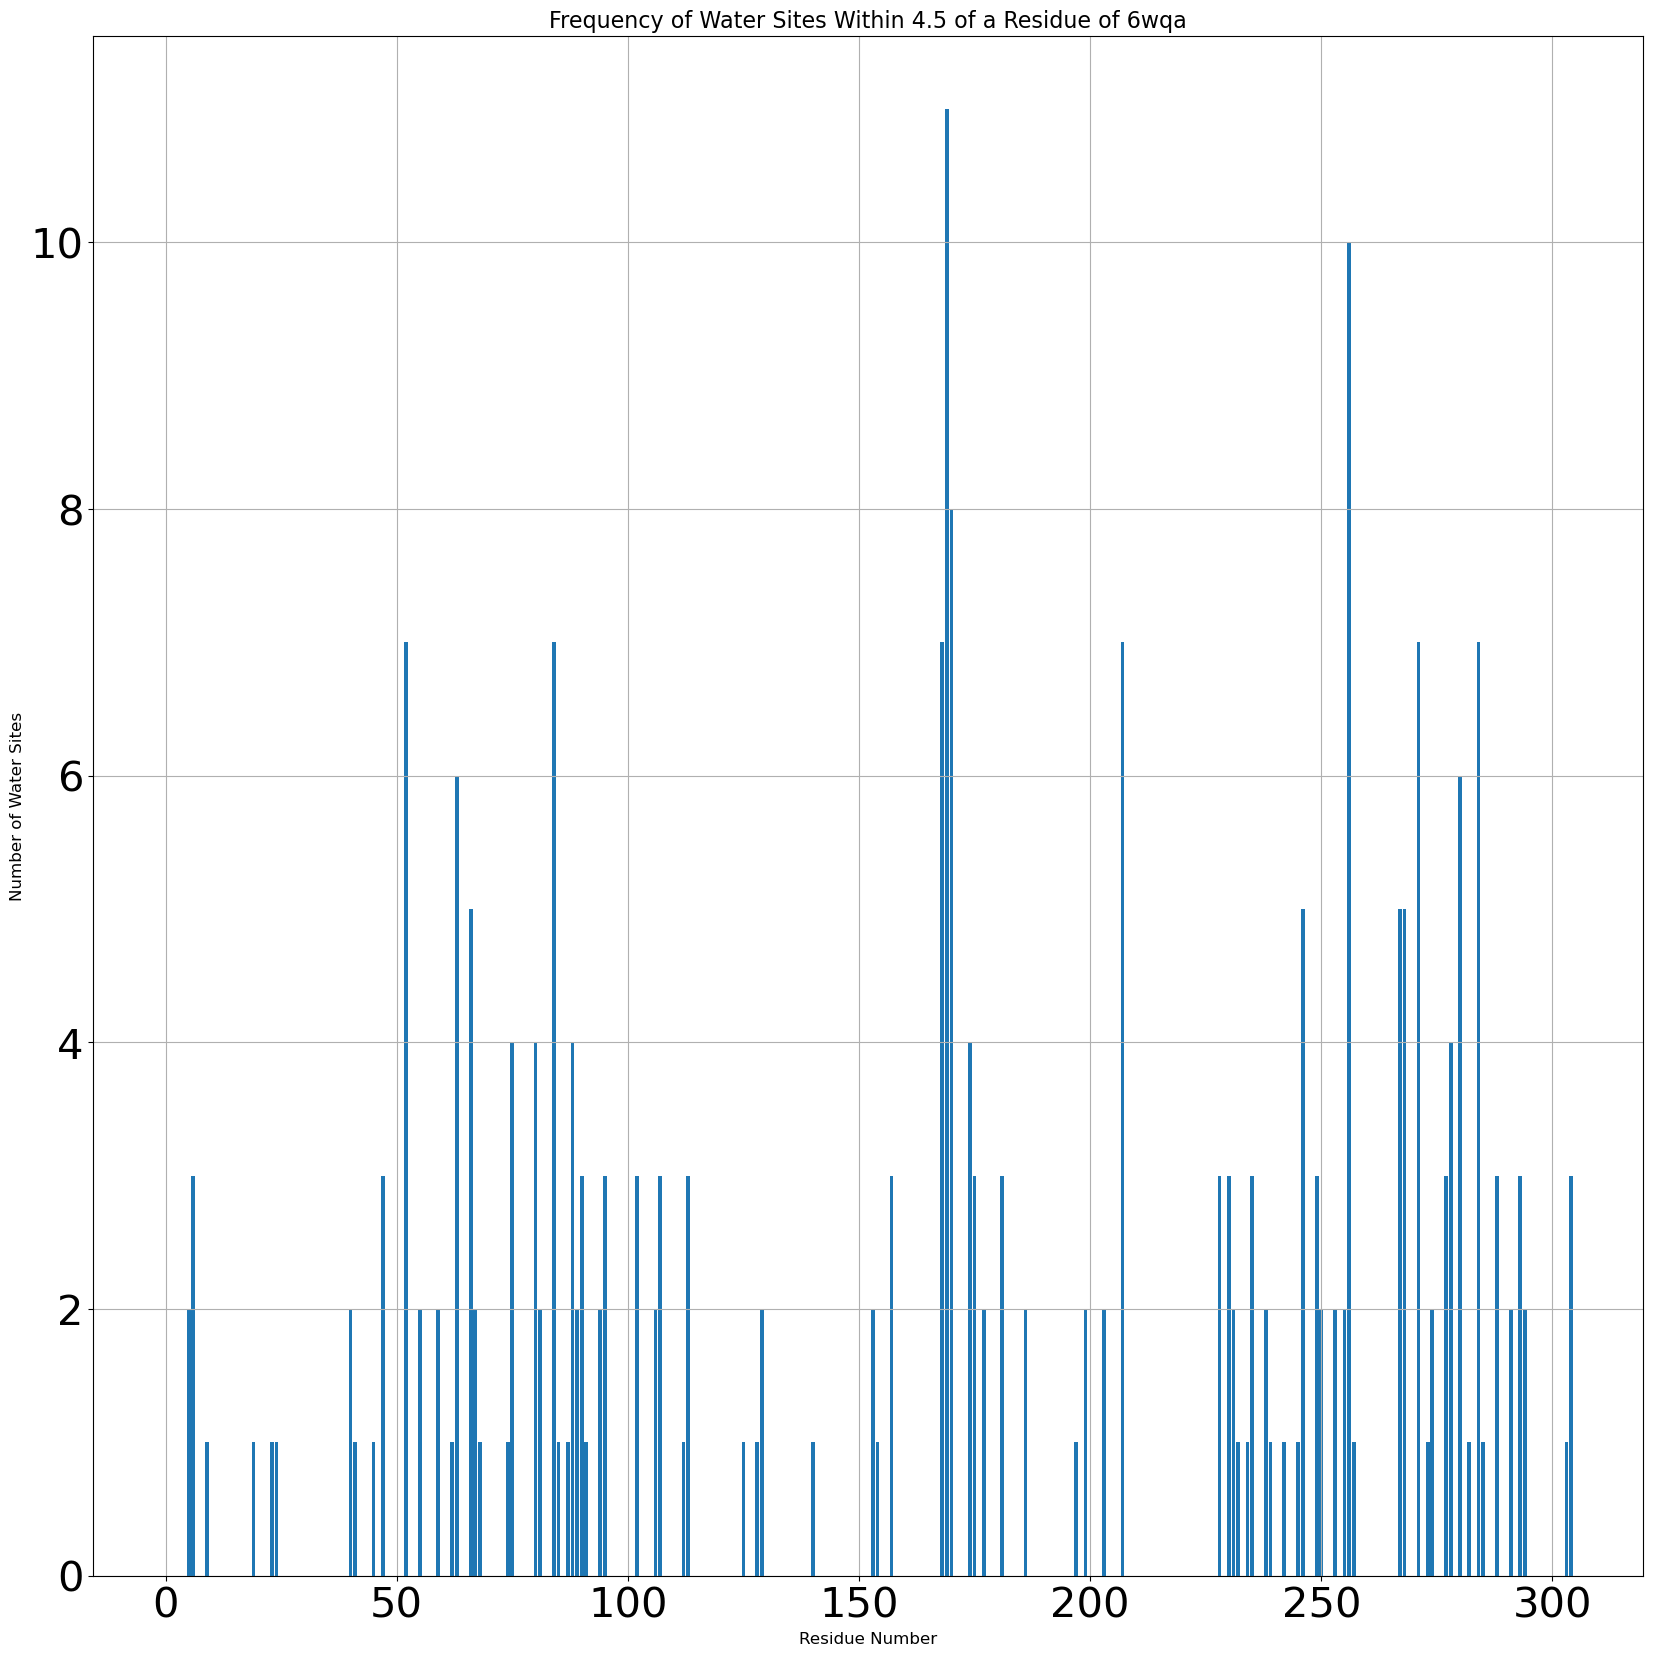

5iu8  Watersite Resid : [0, 0, 2, 3, 0, 4, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 4, 2, 0, 0, 0, 4, 2, 0, 3, 1, 1, 0, 4, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 6, 0, 0, 4, 3, 4, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 4, 2, 0, 0, 6, 1, 0, 2, 1, 2, 3, 1, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 2, 1, 0, 0, 0, 0, 2, 6, 5, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 12, 8, 0, 0, 0, 9, 7, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 6, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 5, 0, 2, 6, 8, 2, 8, 3, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 3, 0, 0, 2, 0, 3, 13, 12, 3, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 3, 0, 1, 3, 0, 0, 1, 3, 0, 6, 0, 1, 0, 6, 1, 0, 0, 3, 0, 1, 10, 0, 5, 3, 0, 3, 2, 2, 0, 4, 2, 1, 1, 0]



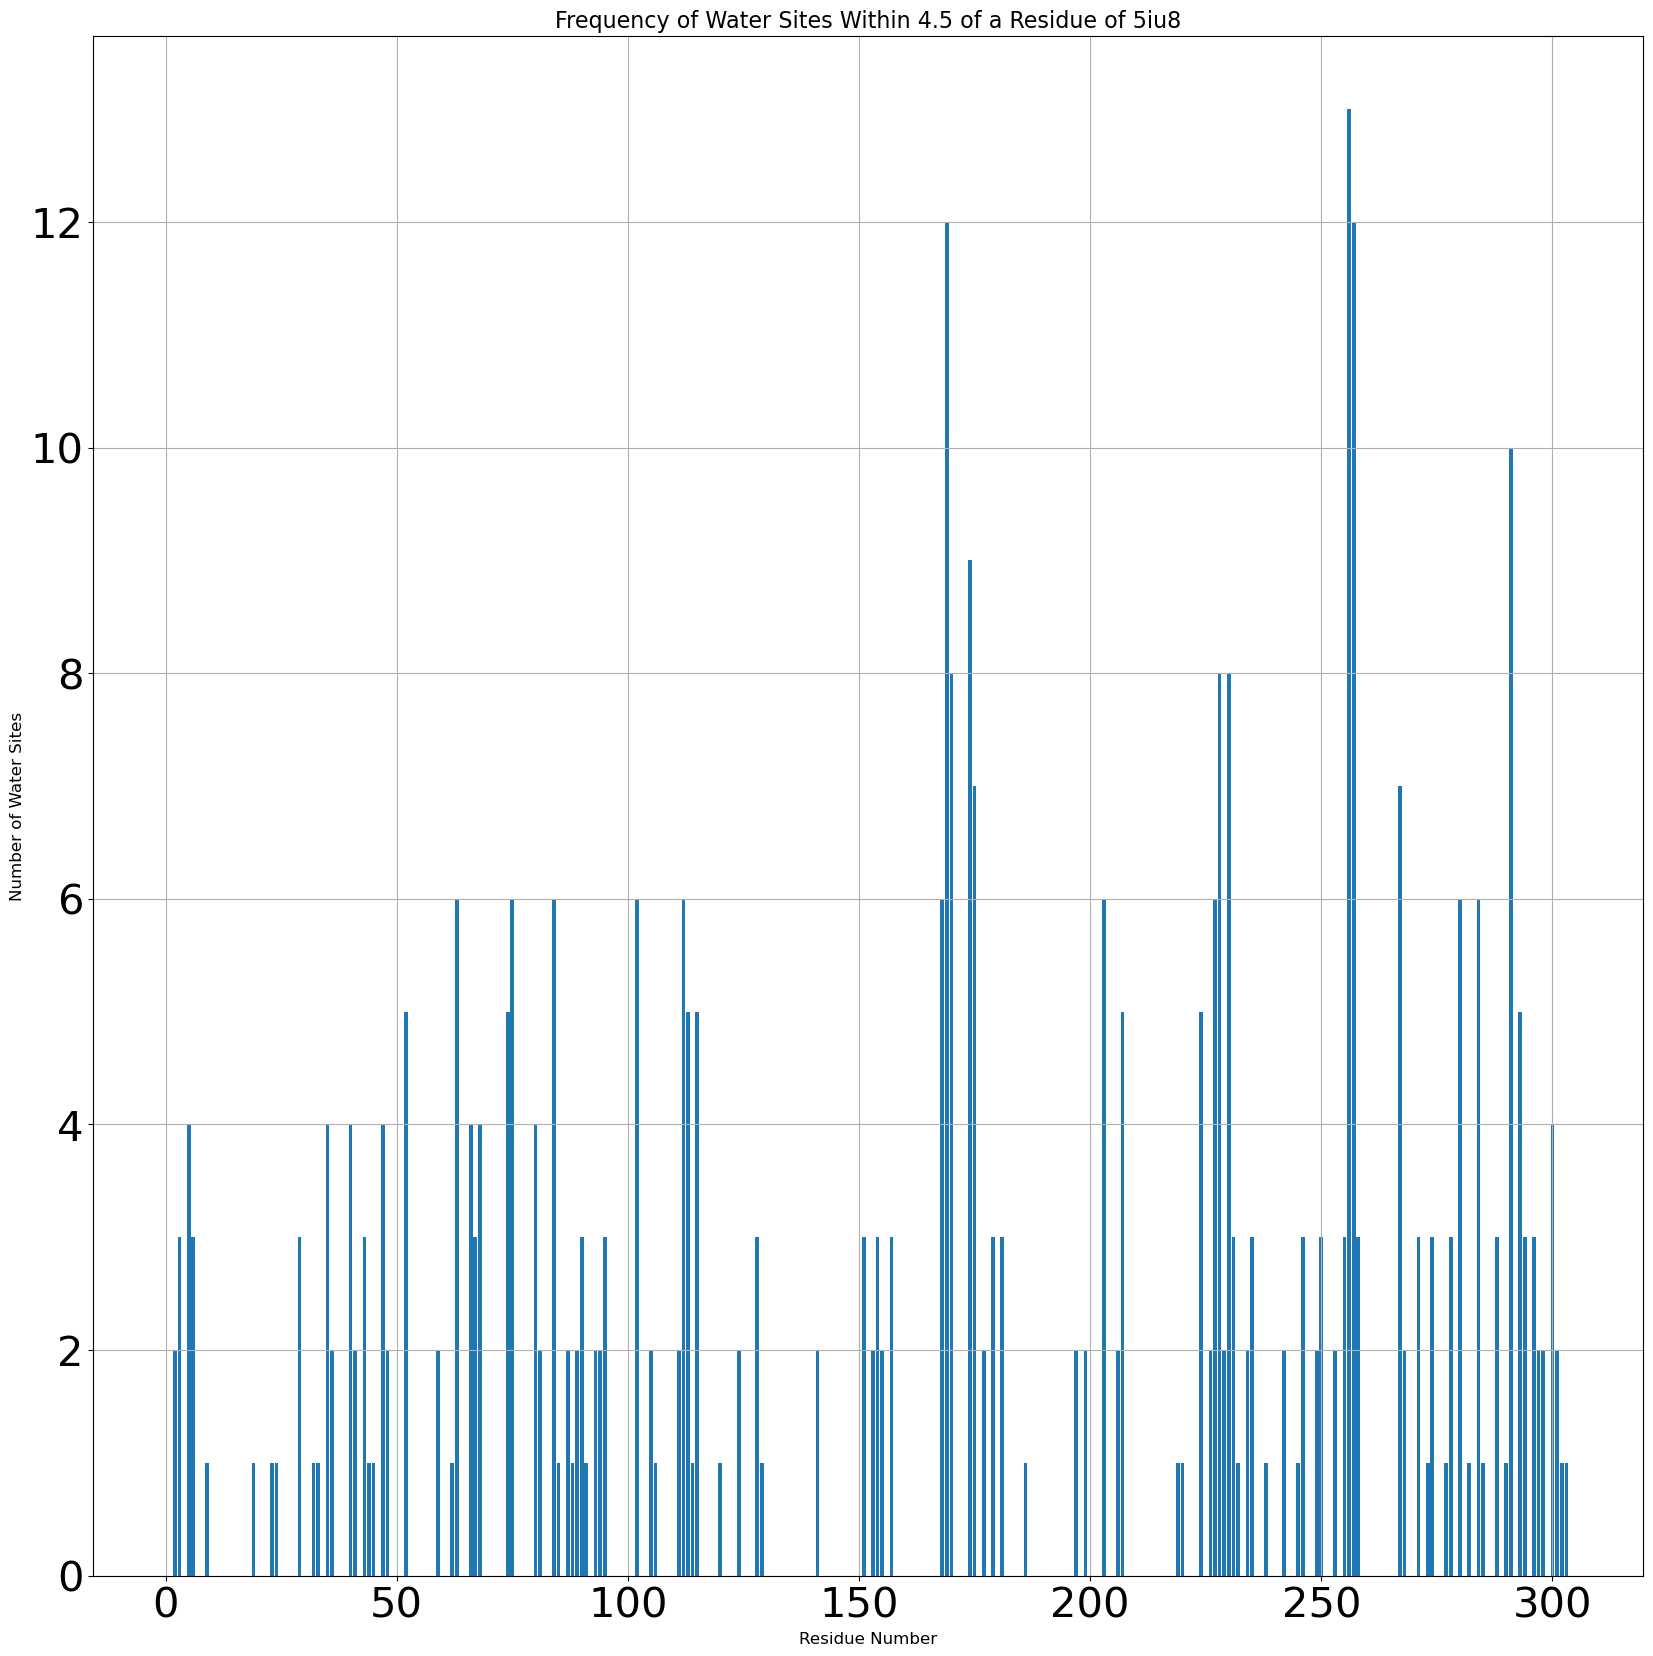

5wf5  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



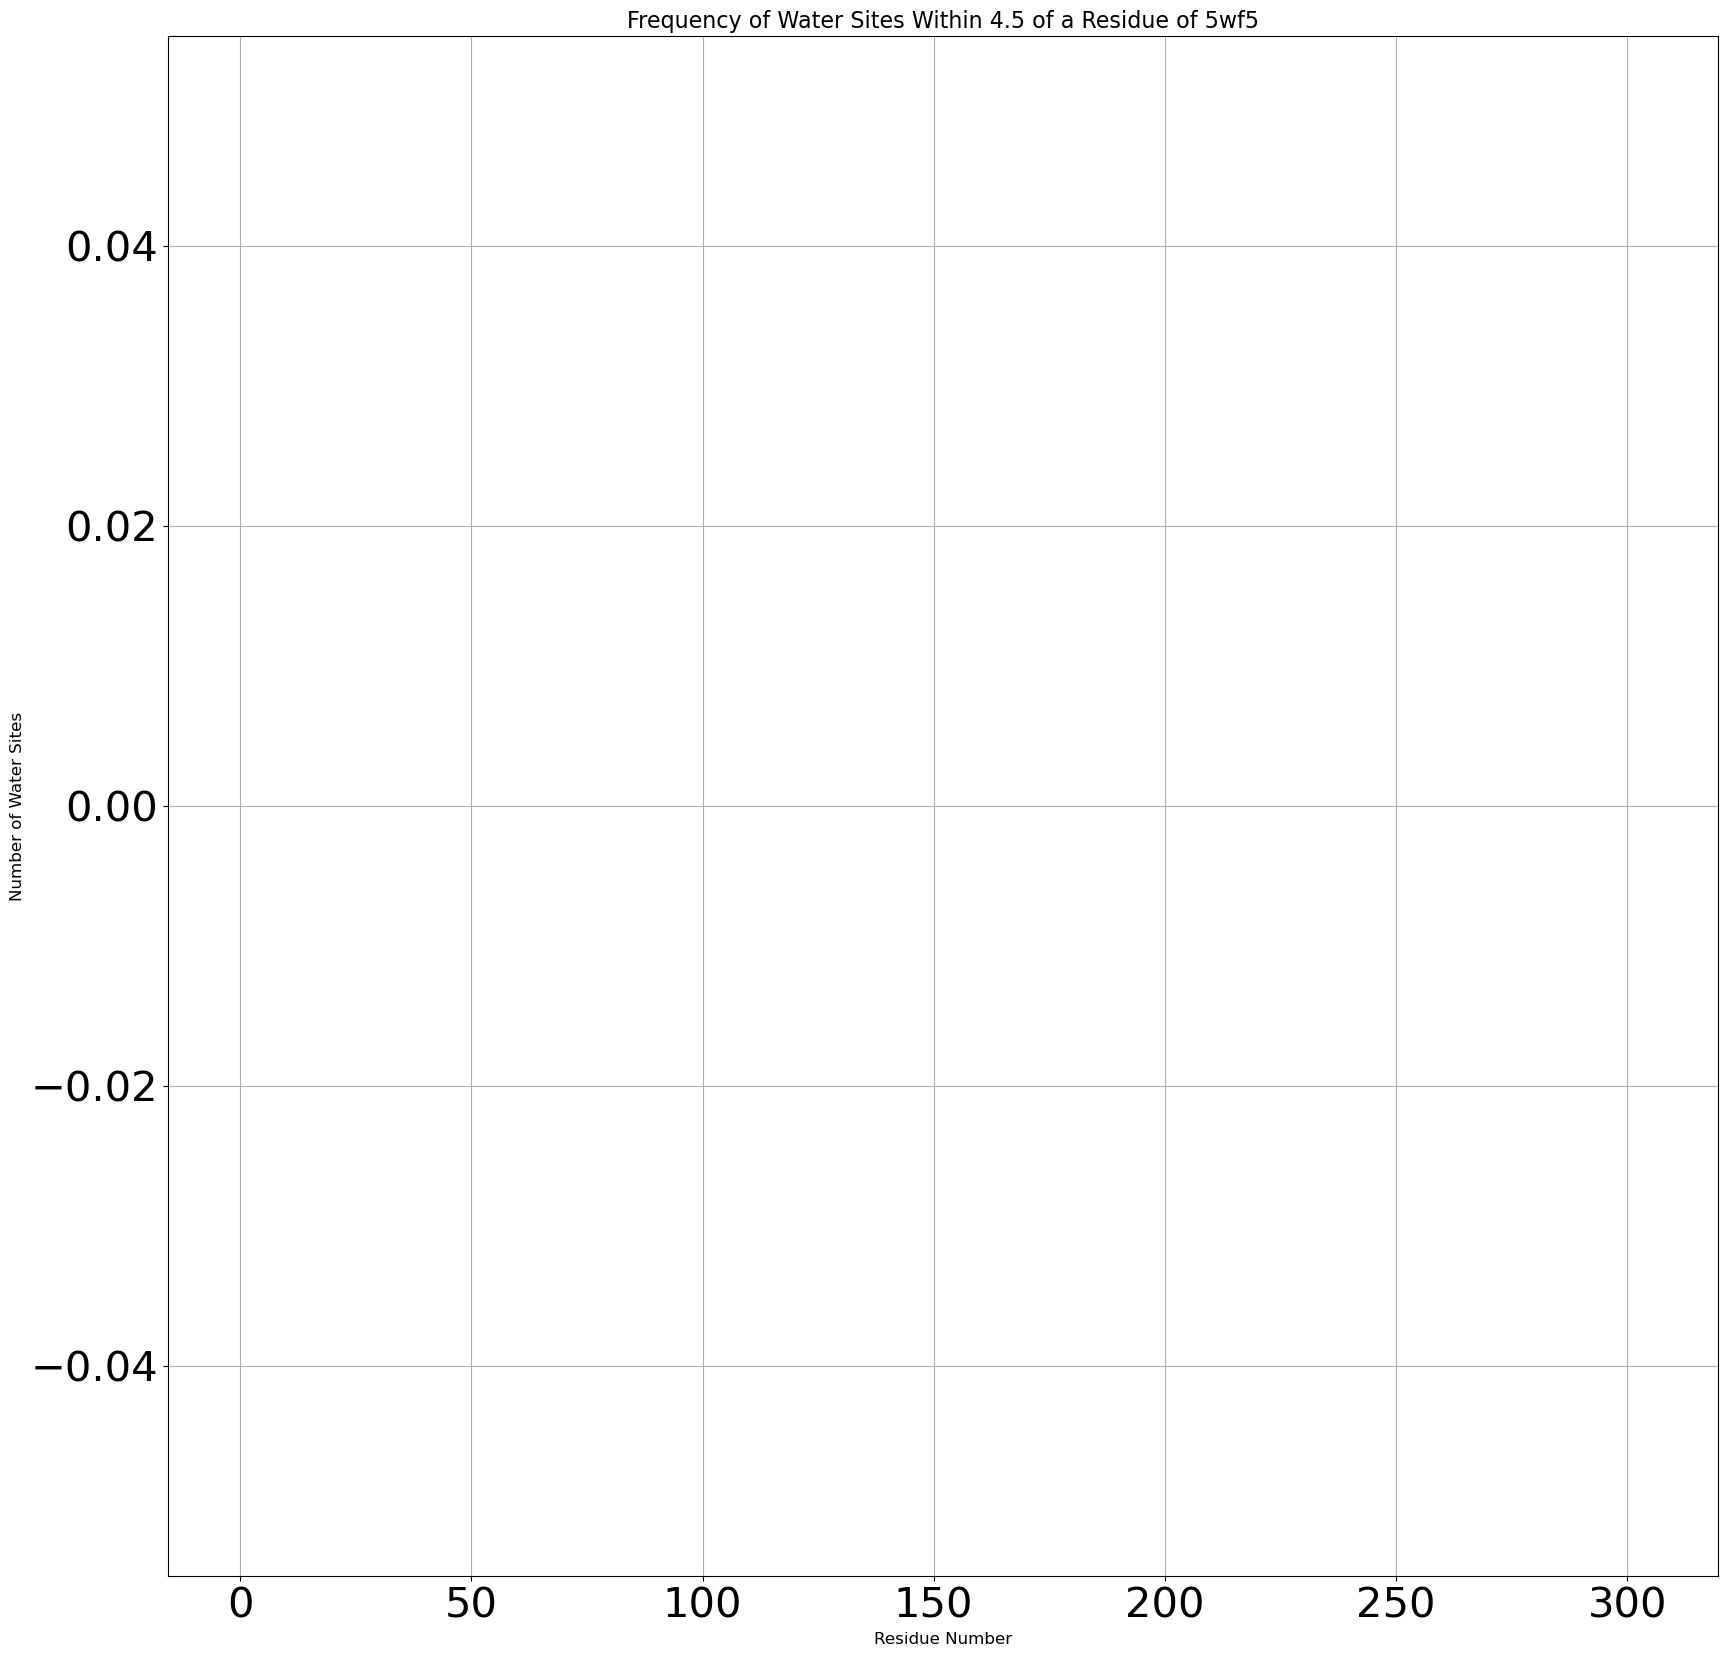

2ydv  Watersite Resid : [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 5, 0, 1, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



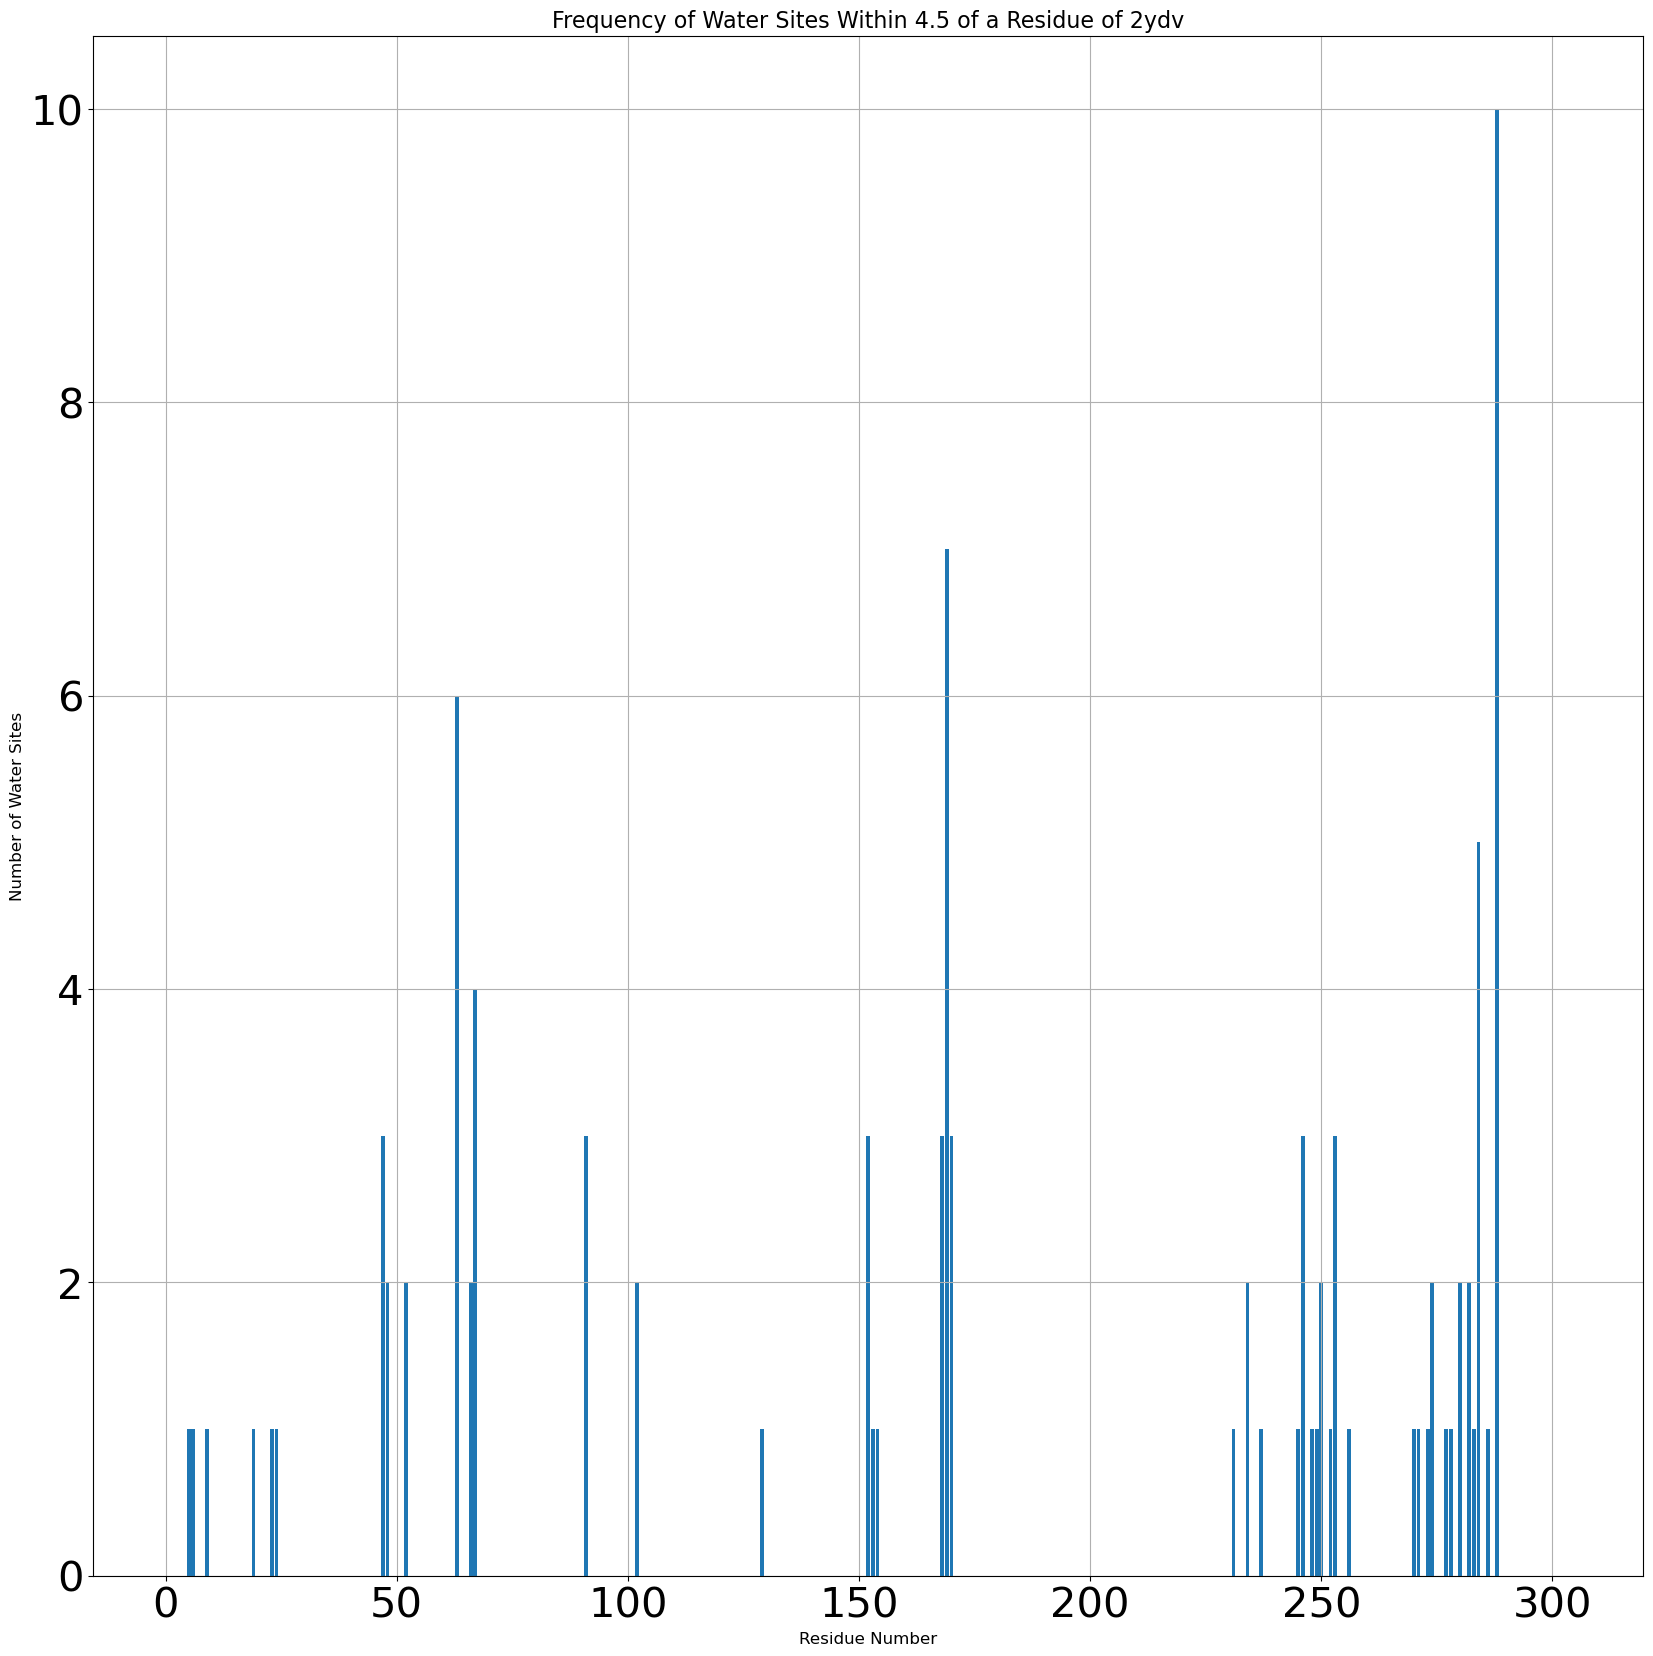

6s0l  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



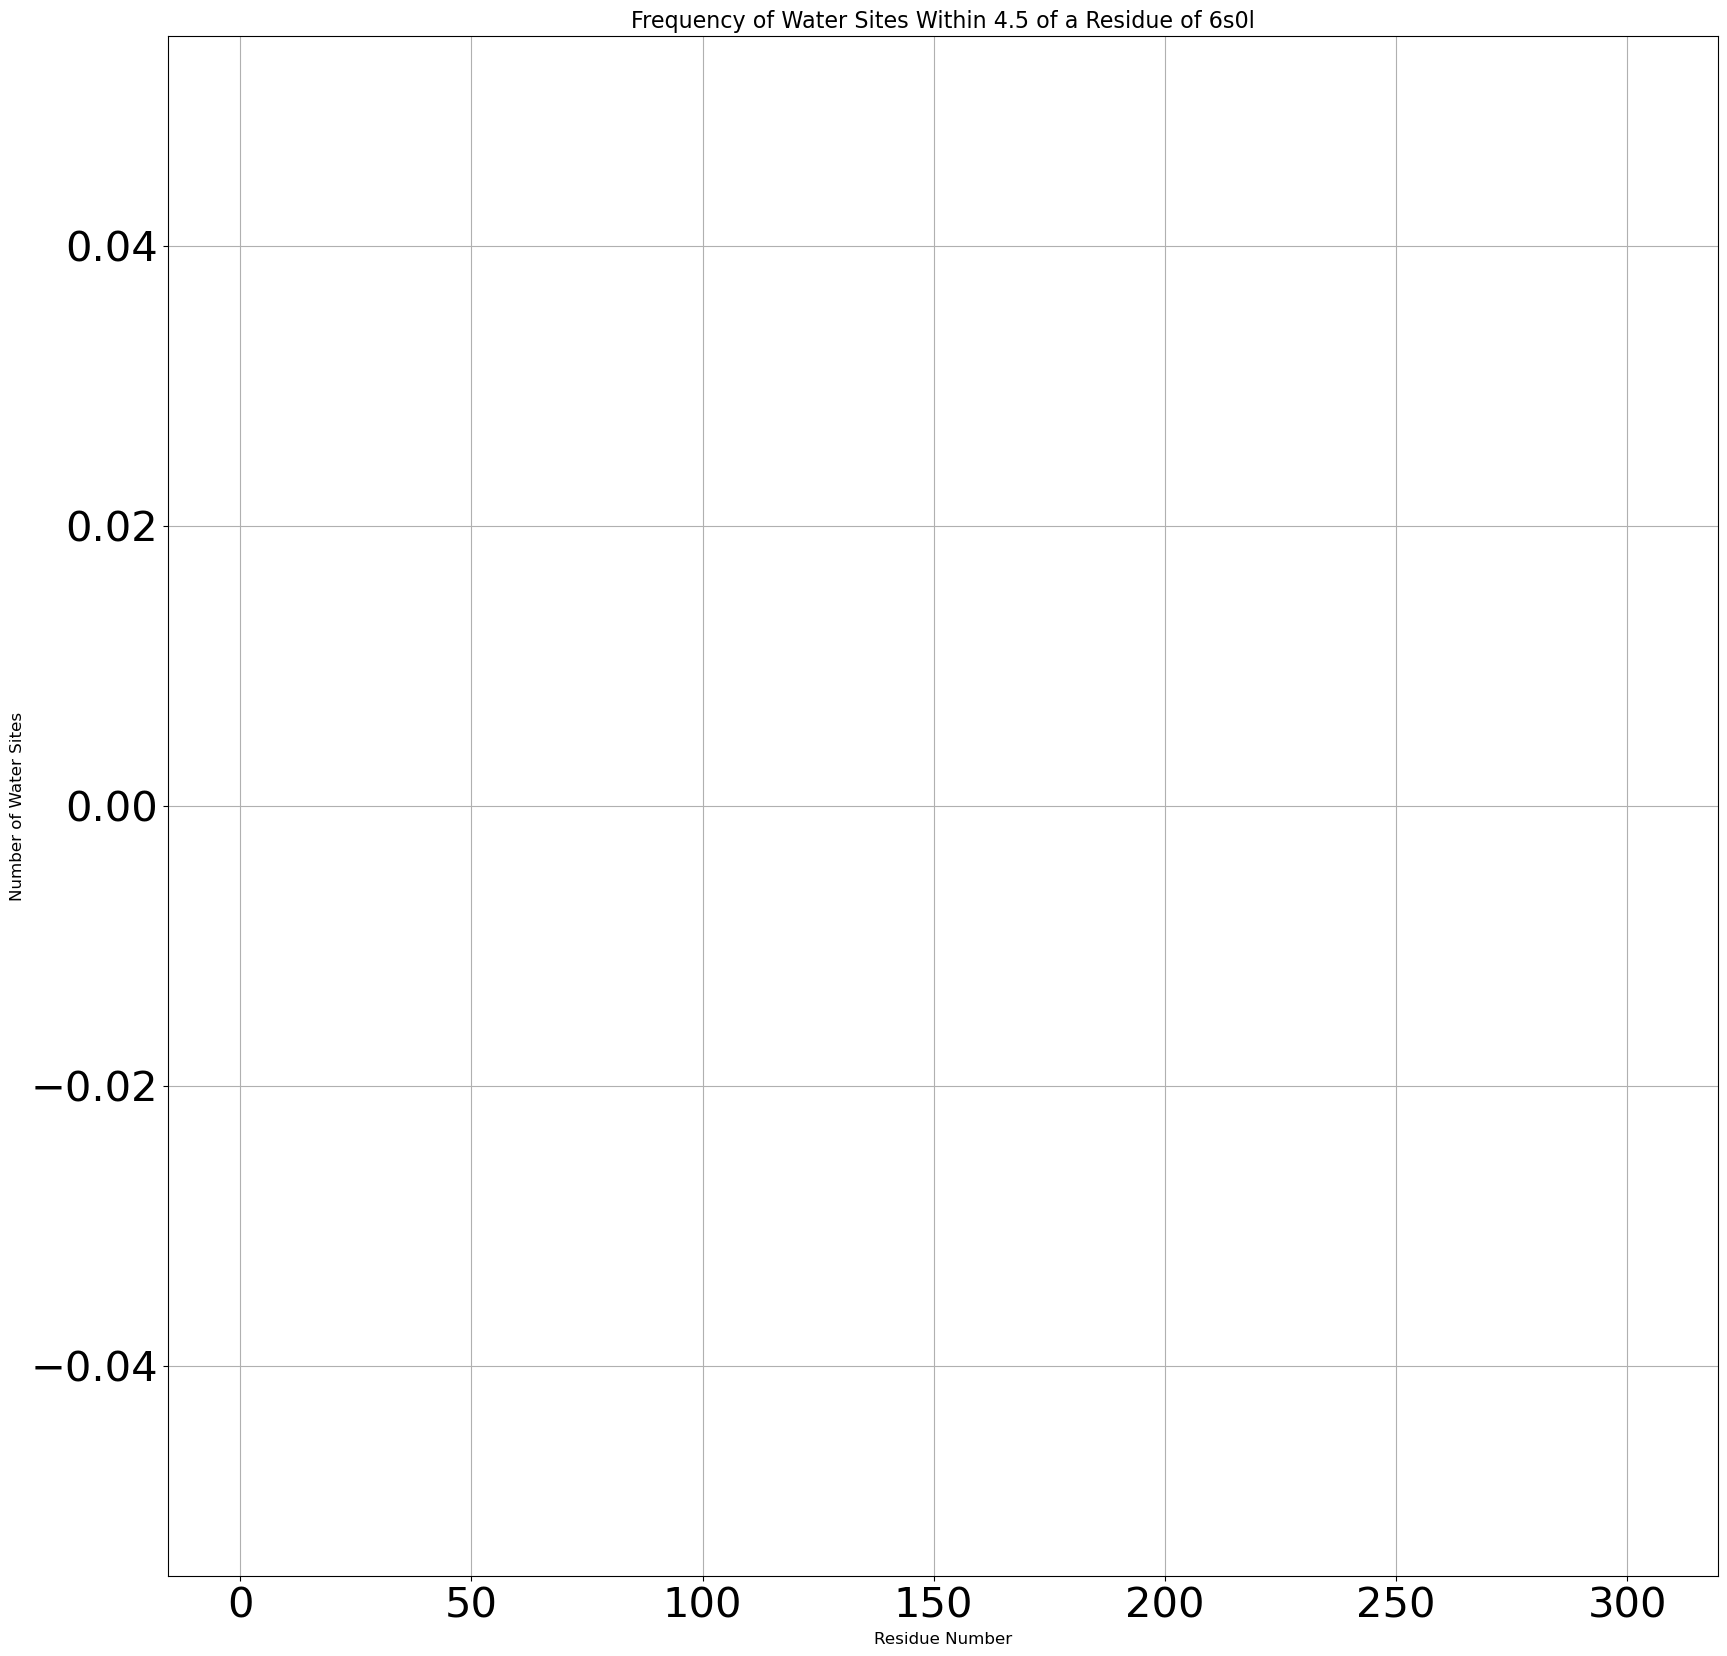

3eml  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 4, 2, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 4]



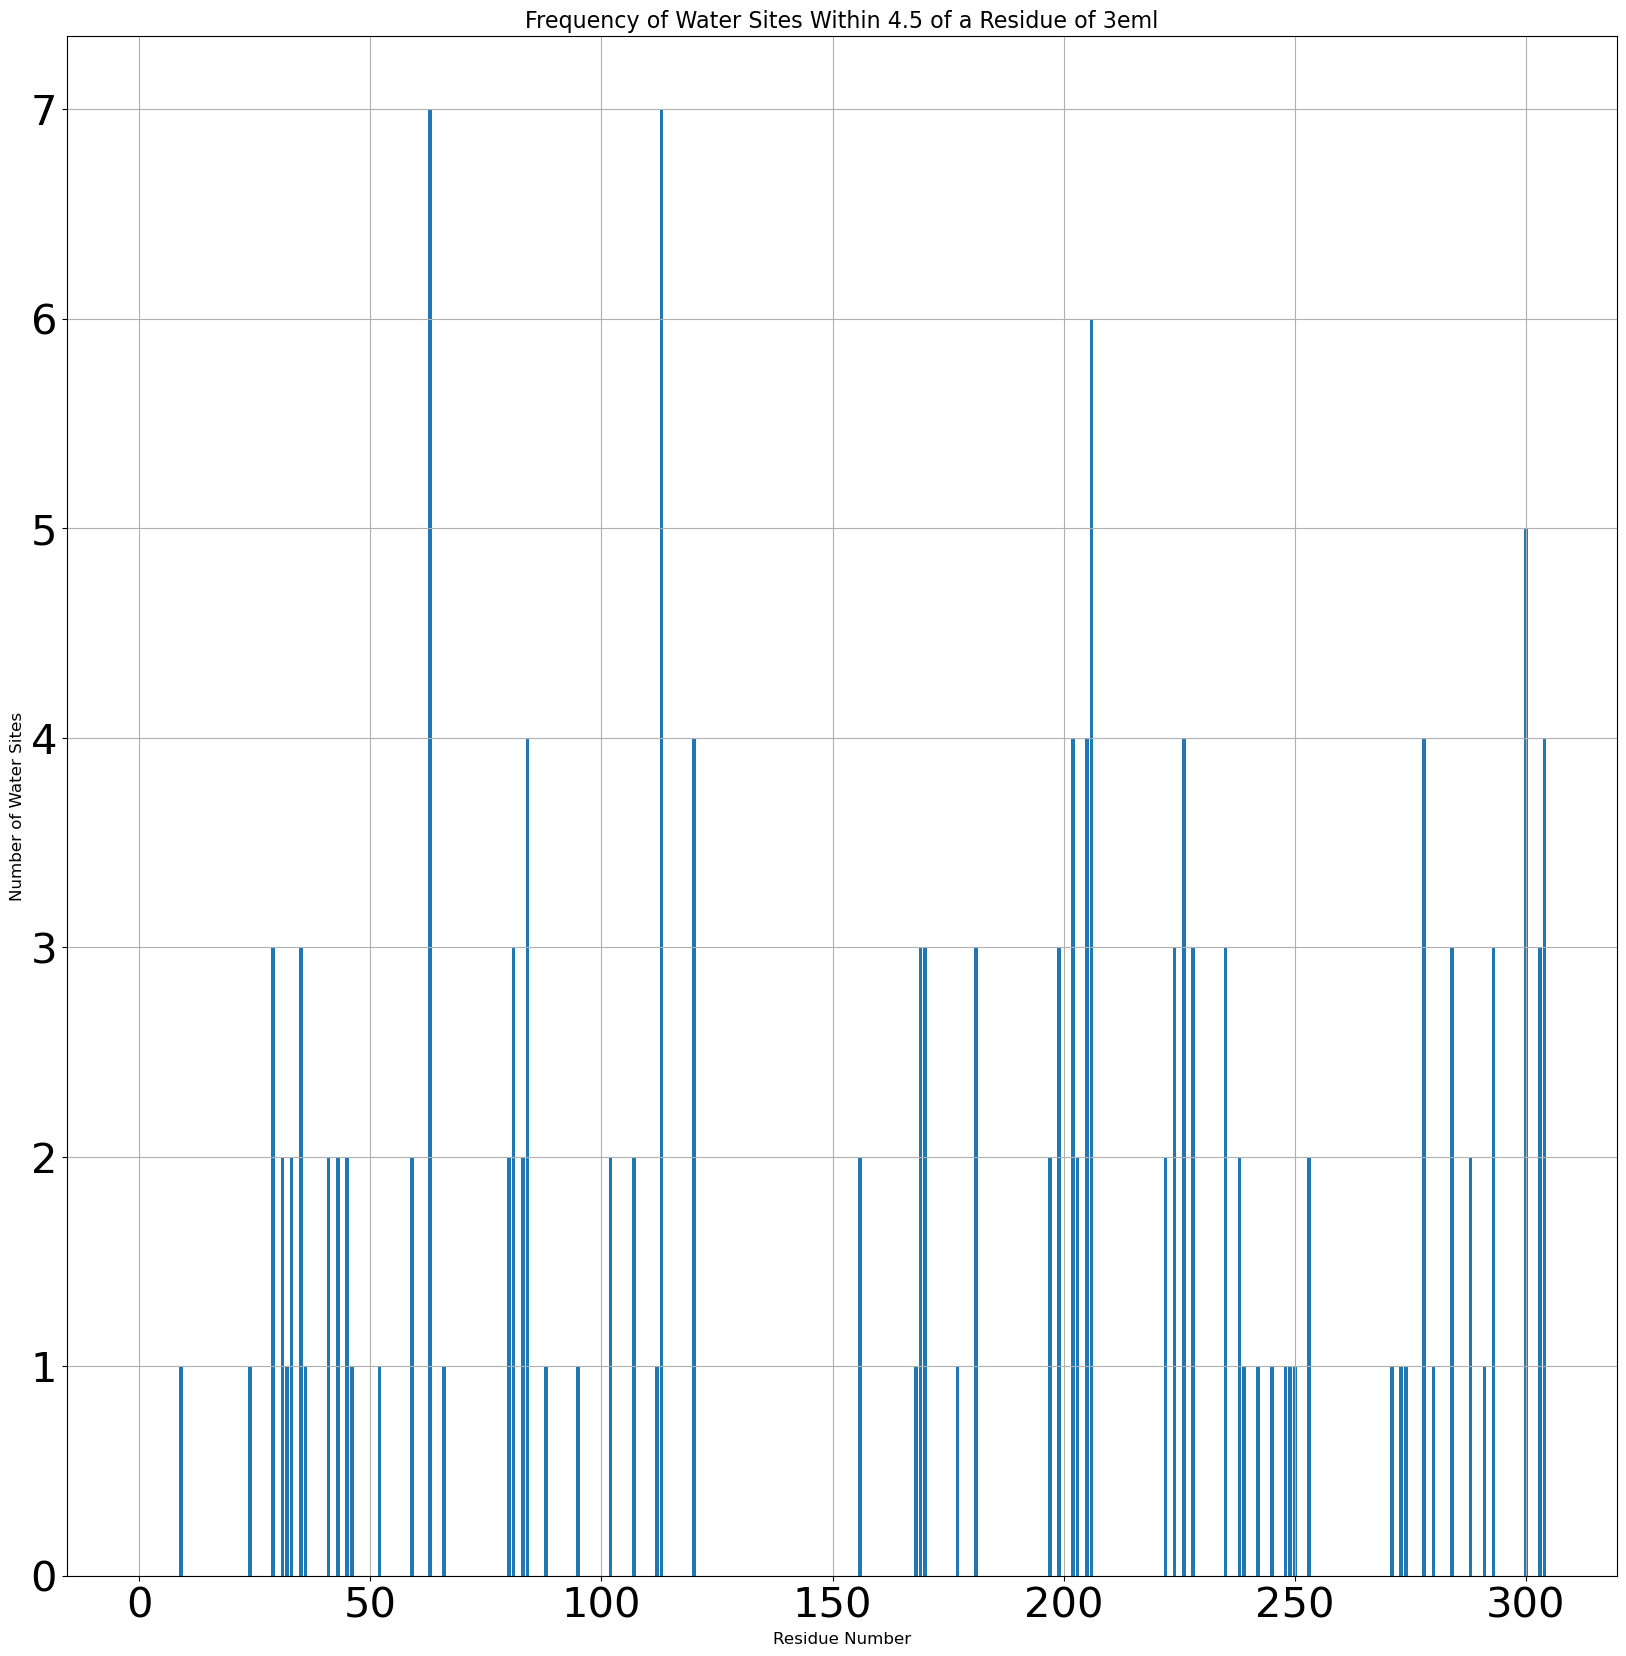

3pwh  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



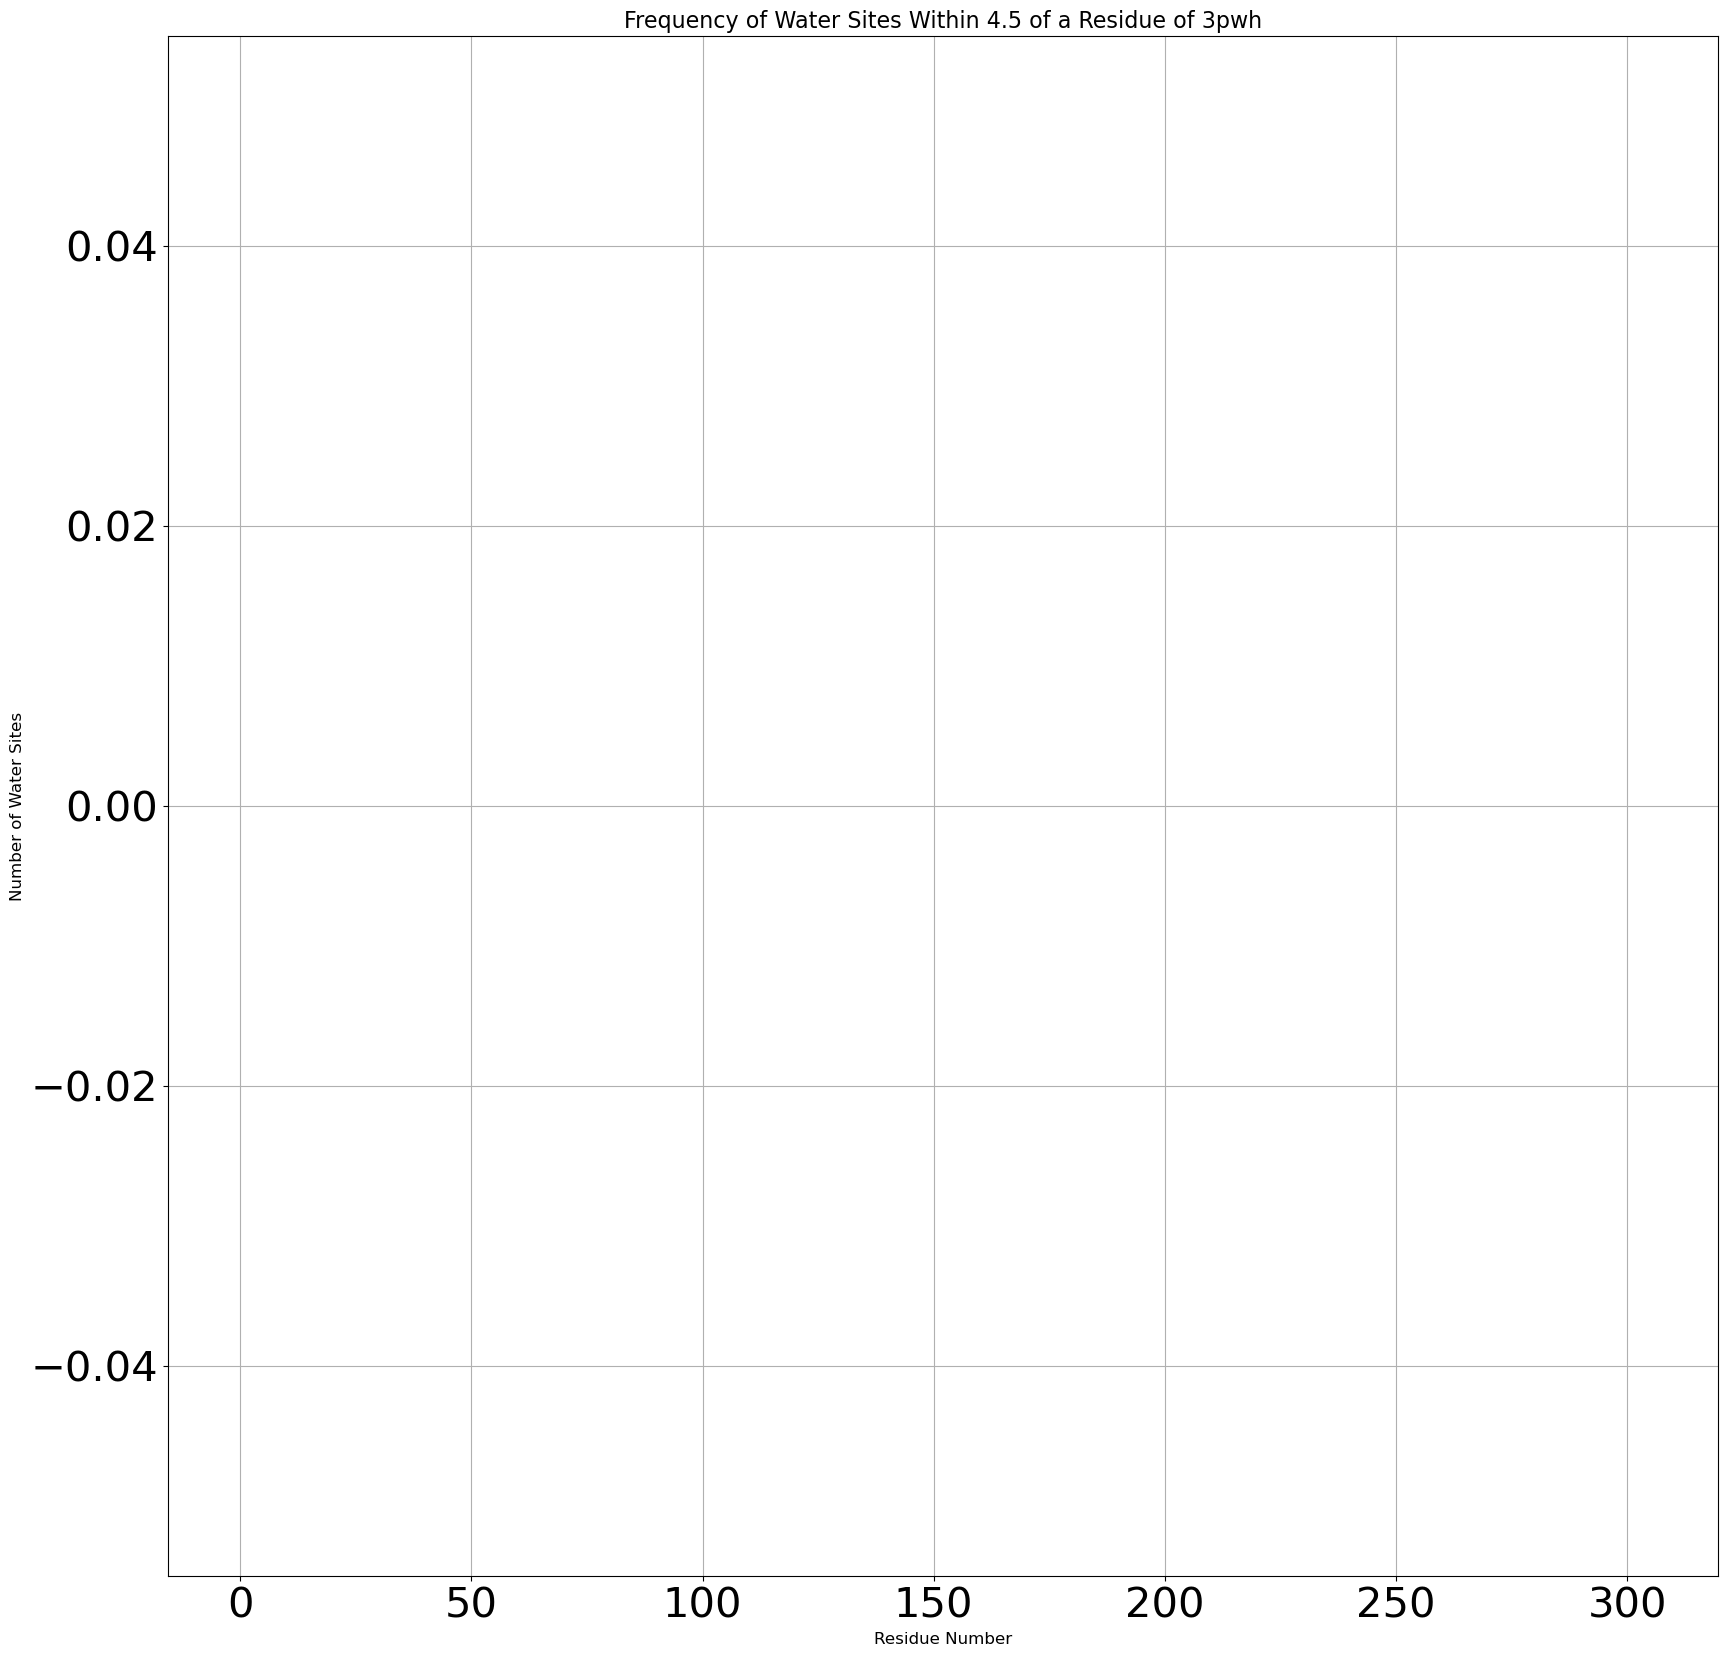

5wf6  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



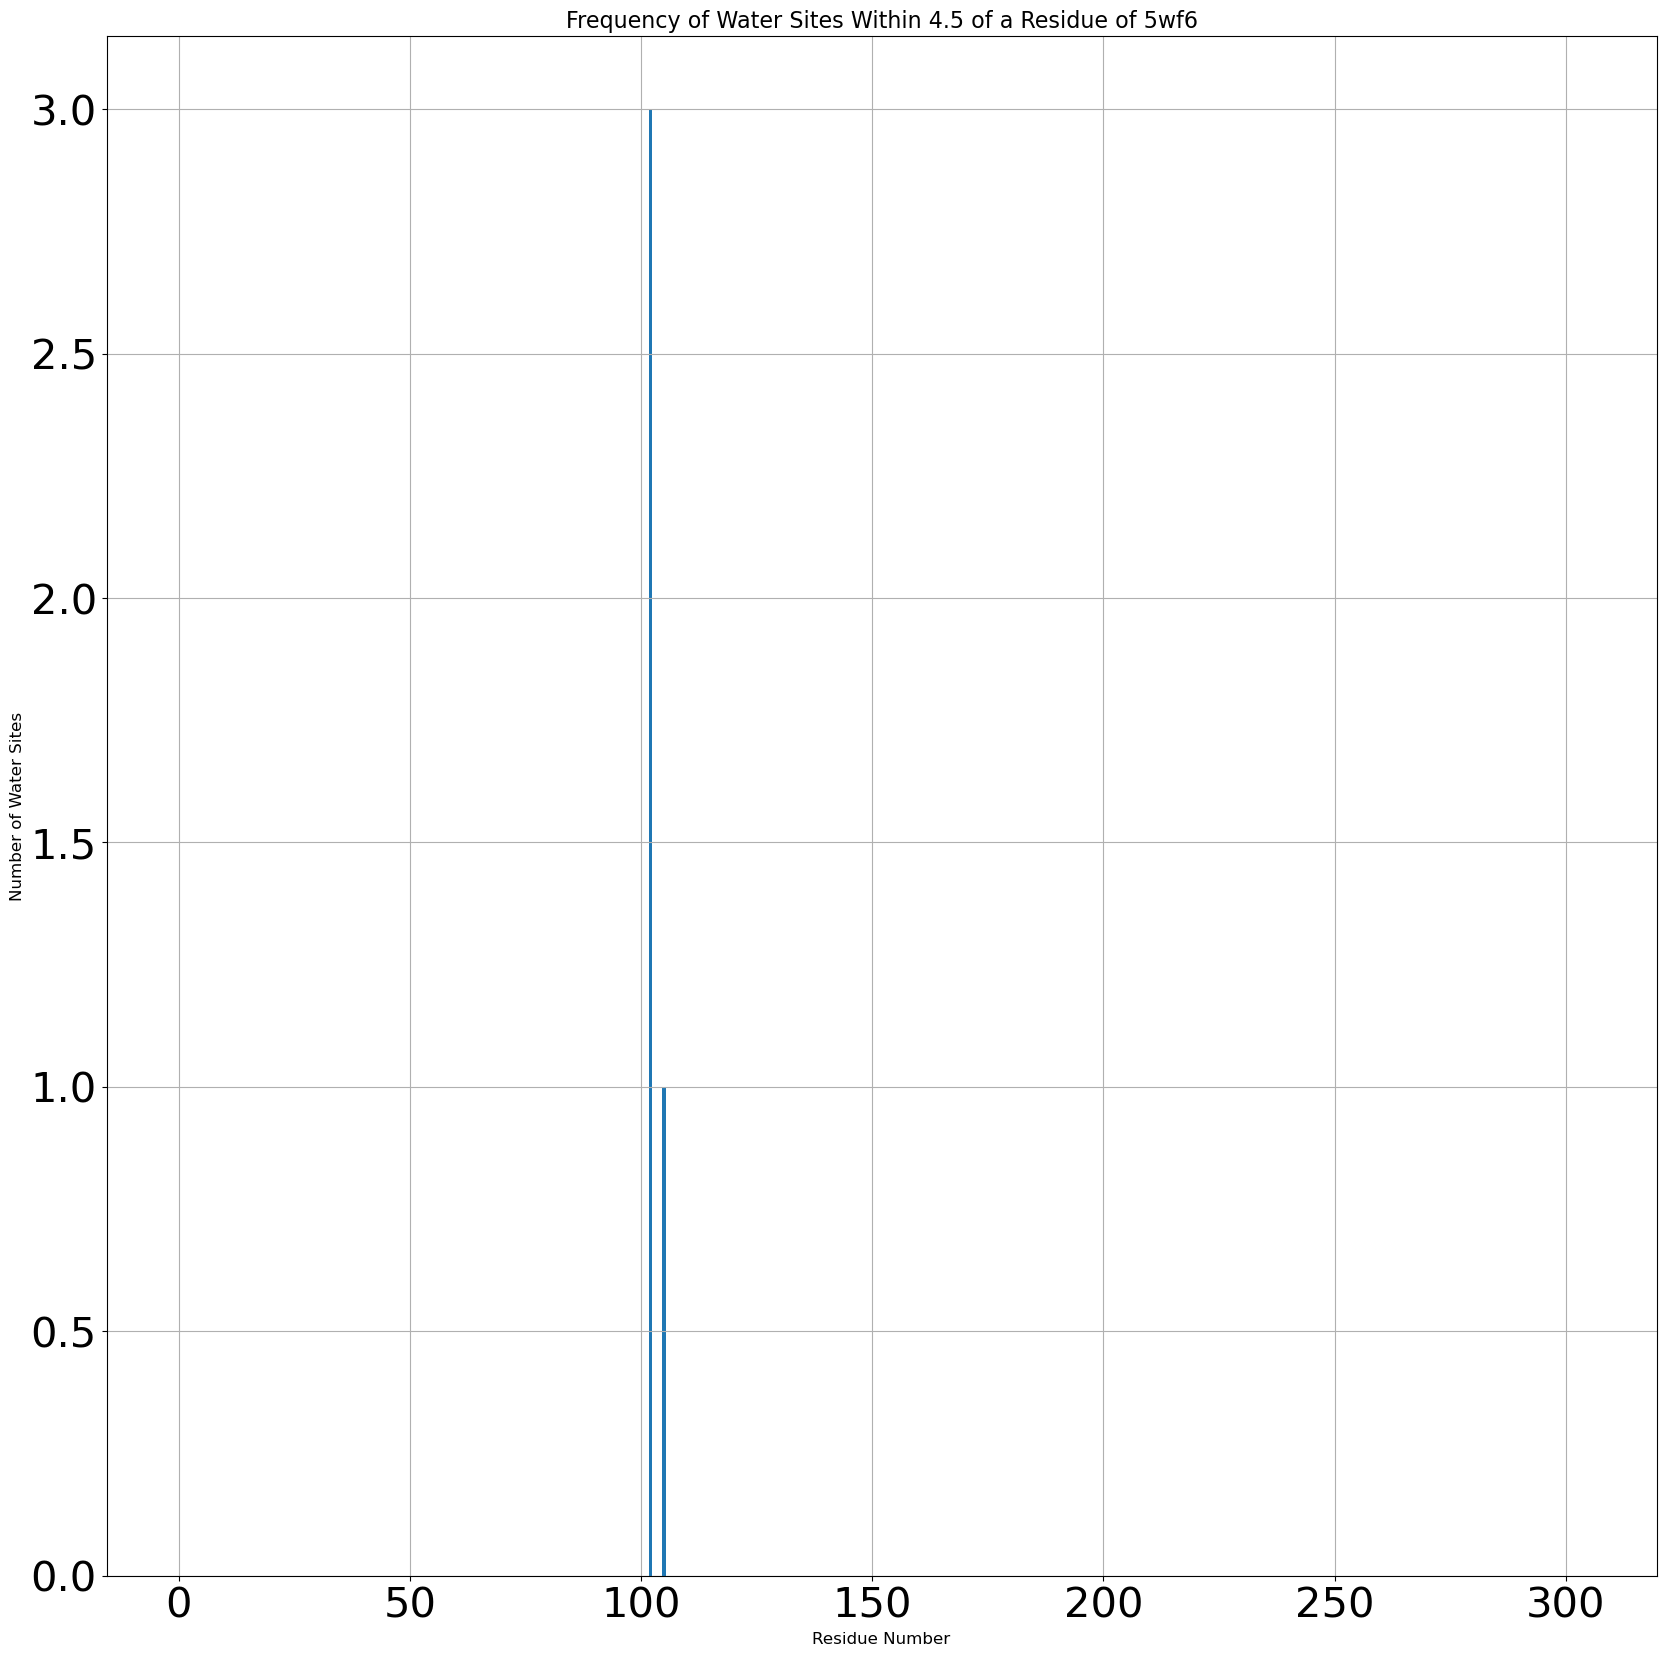

5olo  Watersite Resid : [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



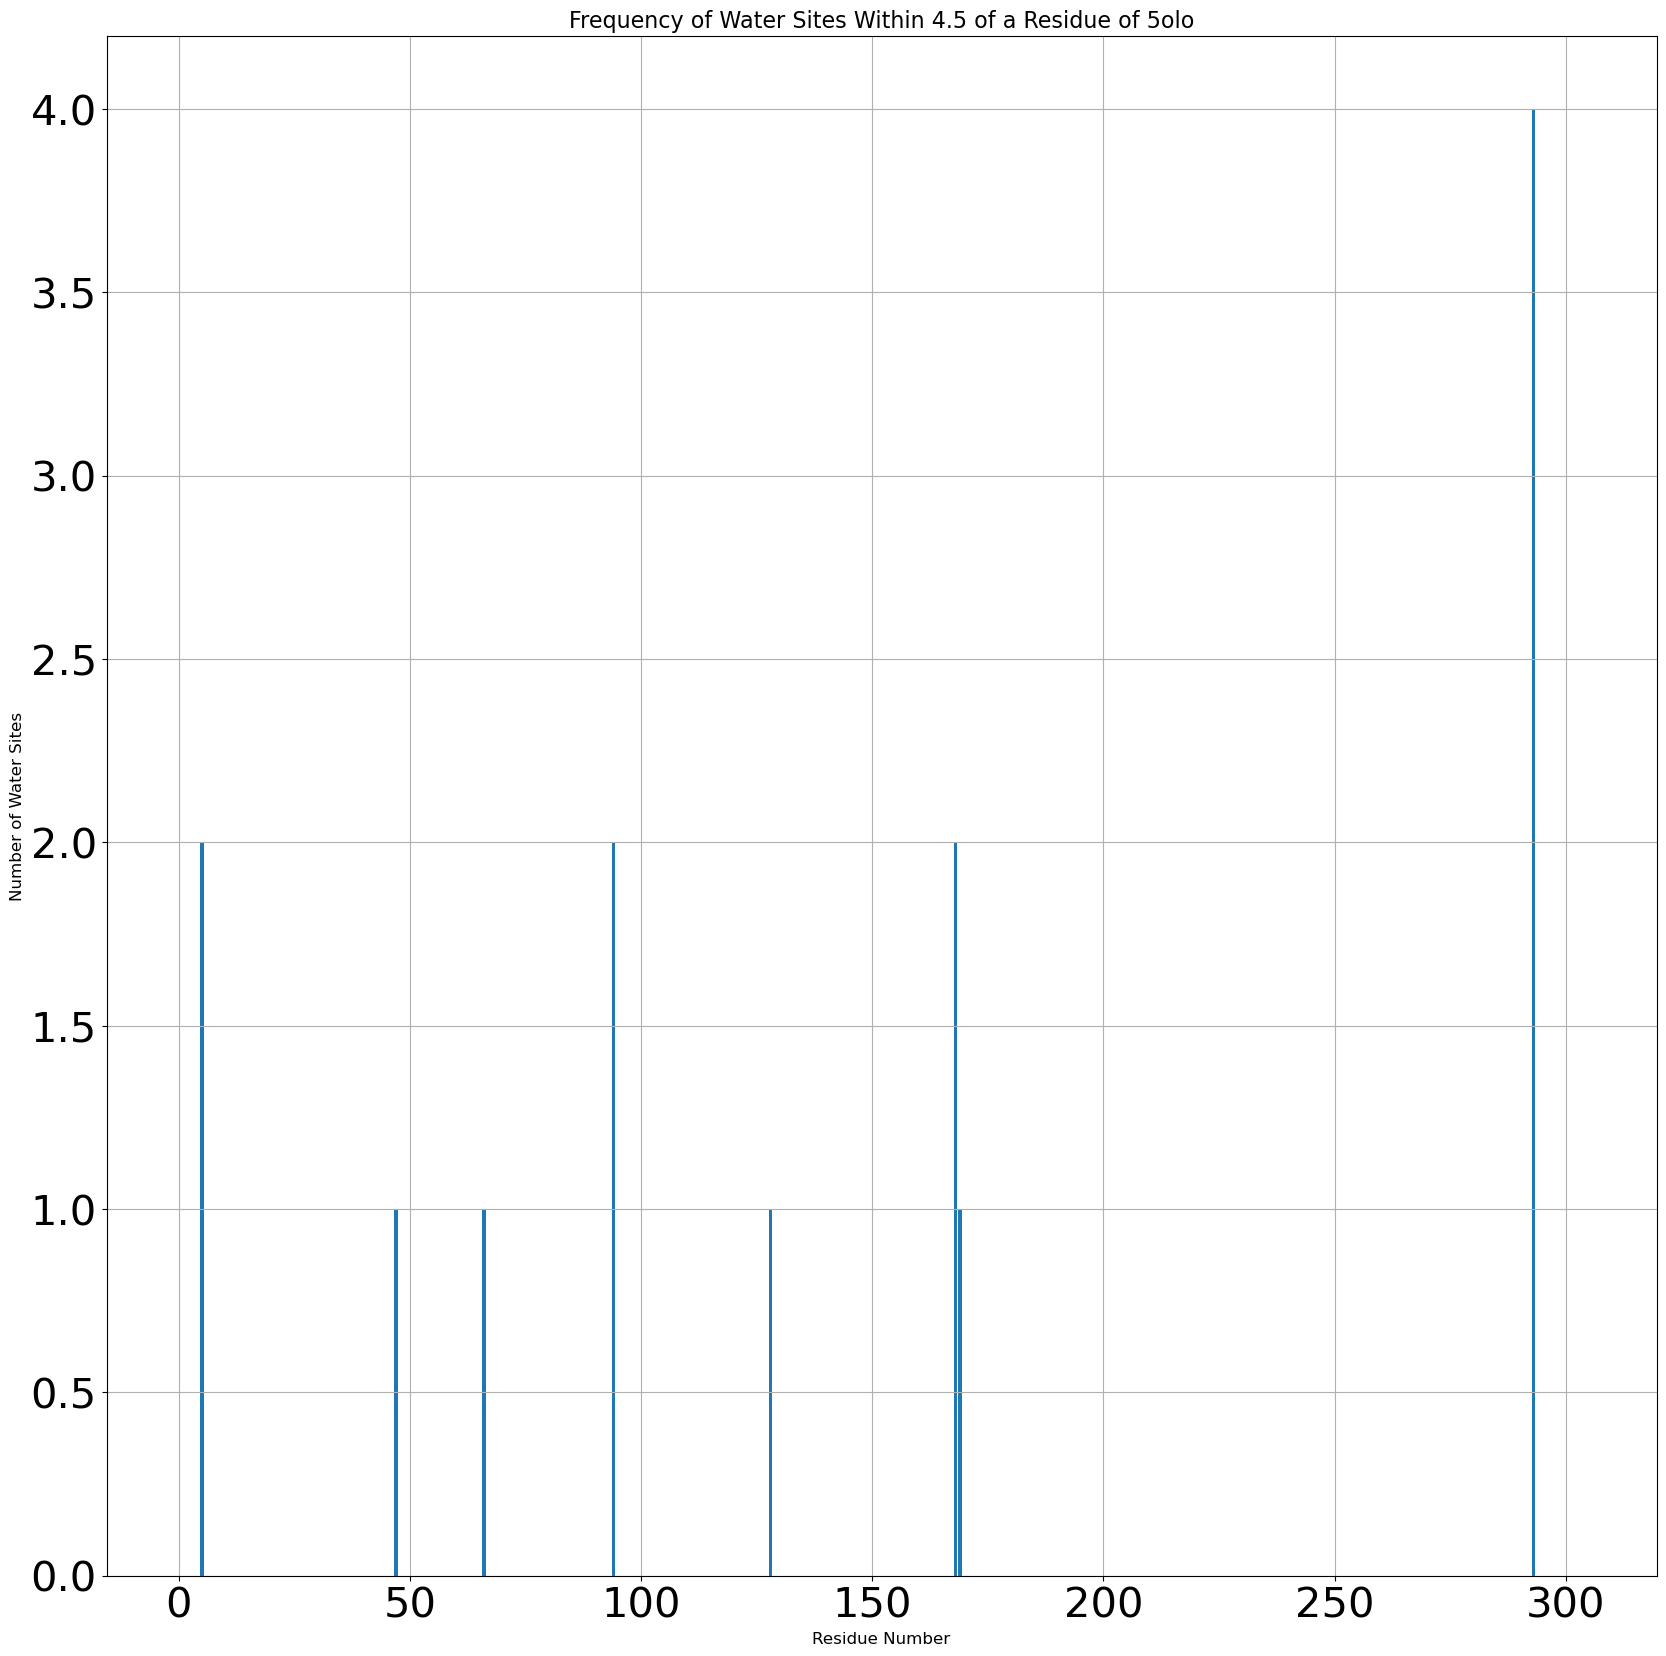

3qak  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



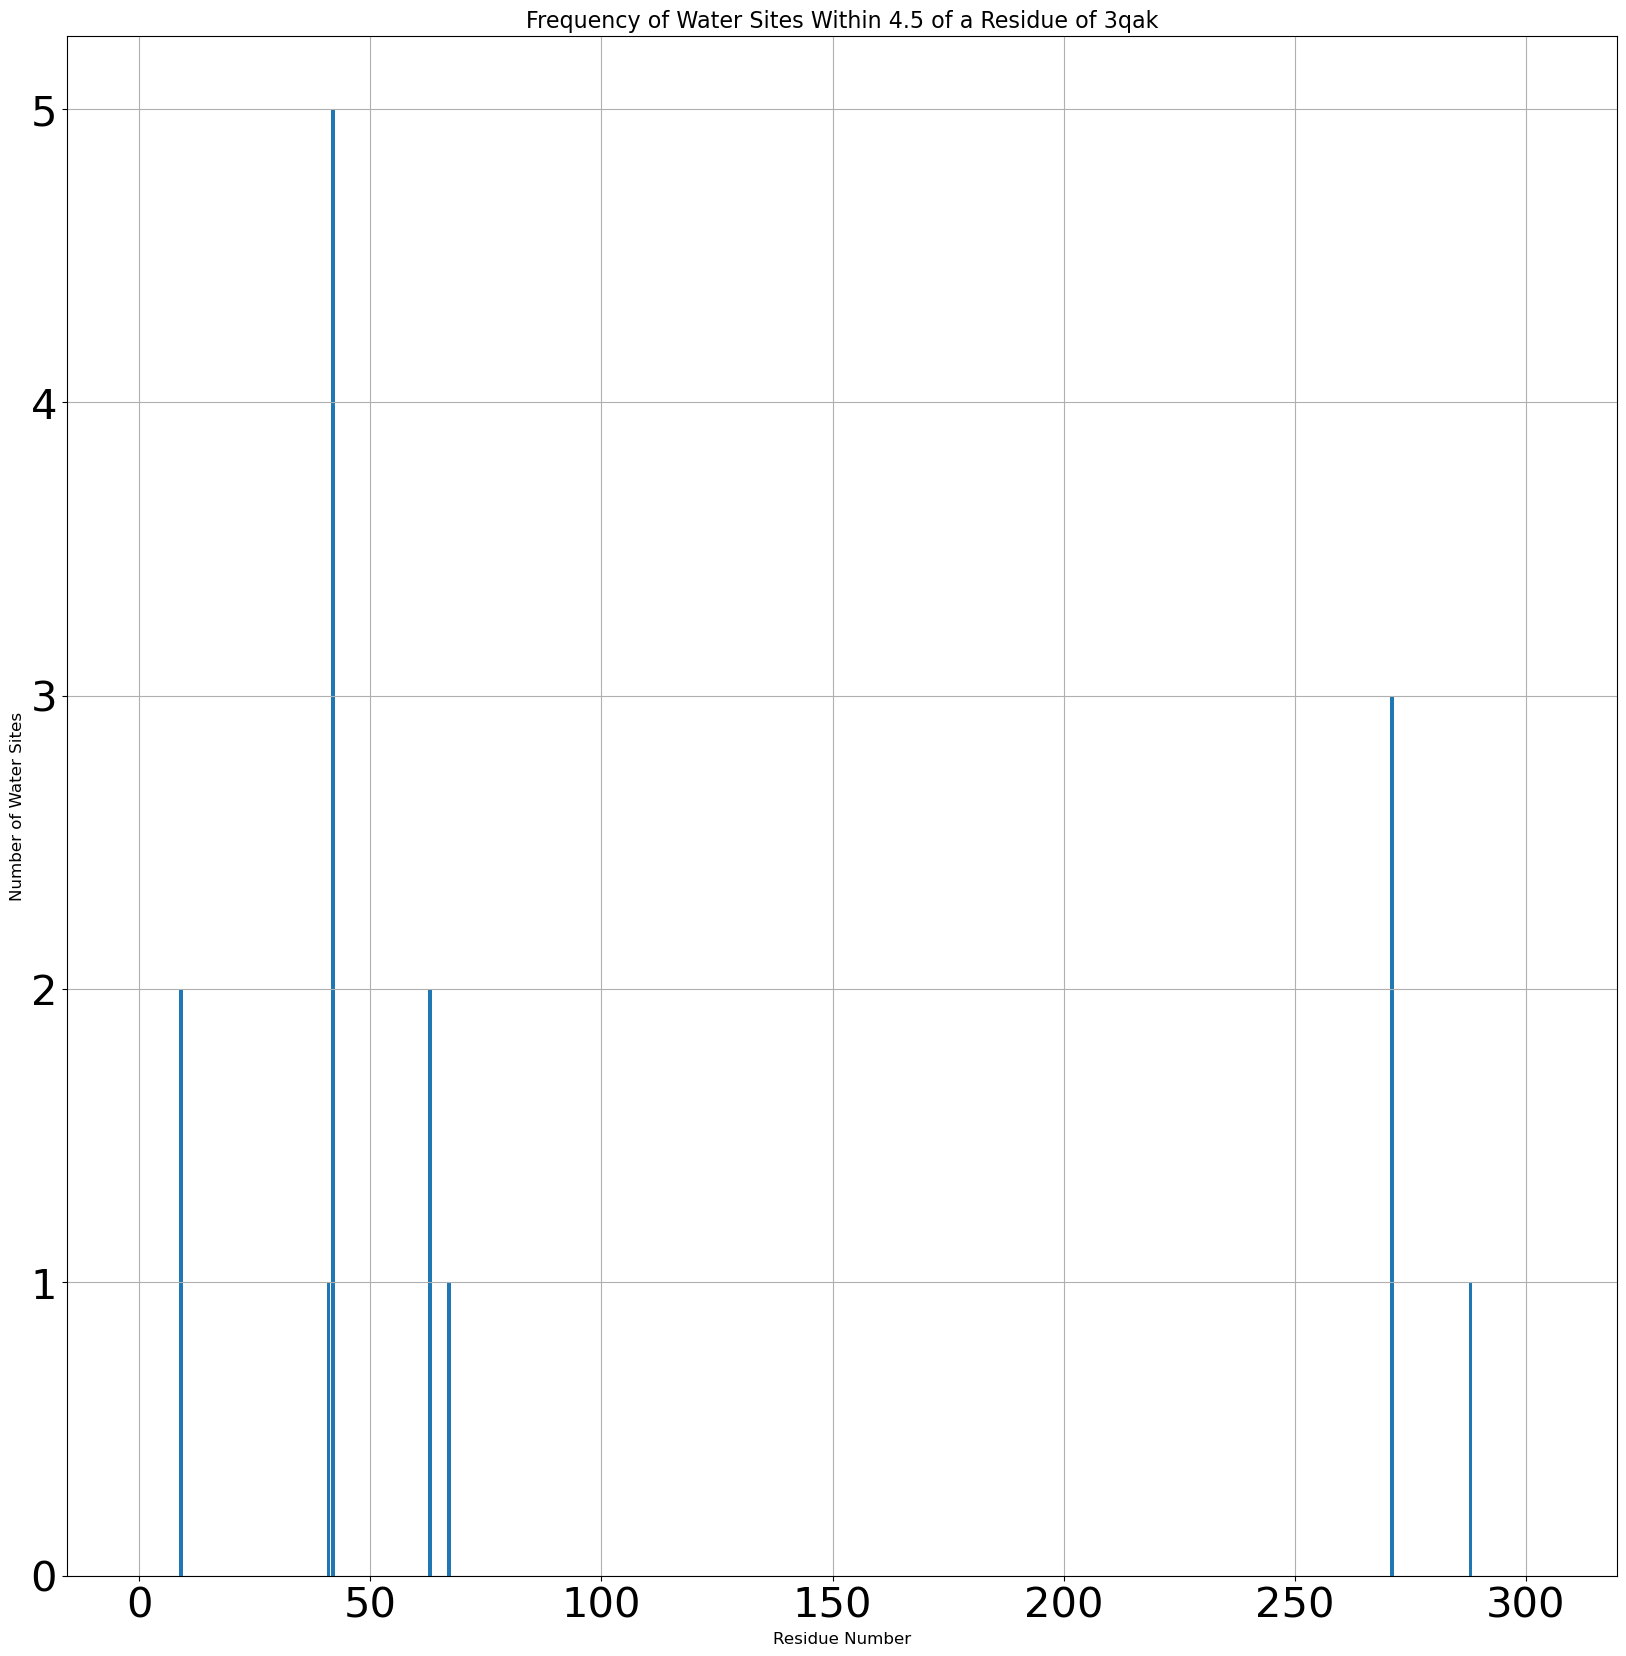

6lpl  Watersite Resid : [0, 0, 3, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 4, 0, 1, 1, 0, 4, 1, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 6, 1, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 2, 2, 0, 1, 6, 1, 0, 1, 4, 2, 2, 1, 0, 2, 3, 2, 0, 0, 1, 0, 0, 0, 13, 0, 0, 1, 1, 4, 0, 0, 0, 3, 6, 8, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 8, 0, 0, 0, 8, 5, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 1, 0, 6, 13, 2, 7, 6, 0, 0, 1, 3, 0, 0, 4, 1, 0, 0, 1, 0, 0, 1, 6, 0, 0, 3, 3, 0, 0, 2, 0, 3, 9, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 7, 0, 1, 1, 0, 4, 2, 5, 0, 6, 0, 1, 0, 7, 1, 0, 0, 4, 0, 2, 6, 0, 2, 5, 2, 6, 0, 0, 0, 3, 0, 0, 2, 0]



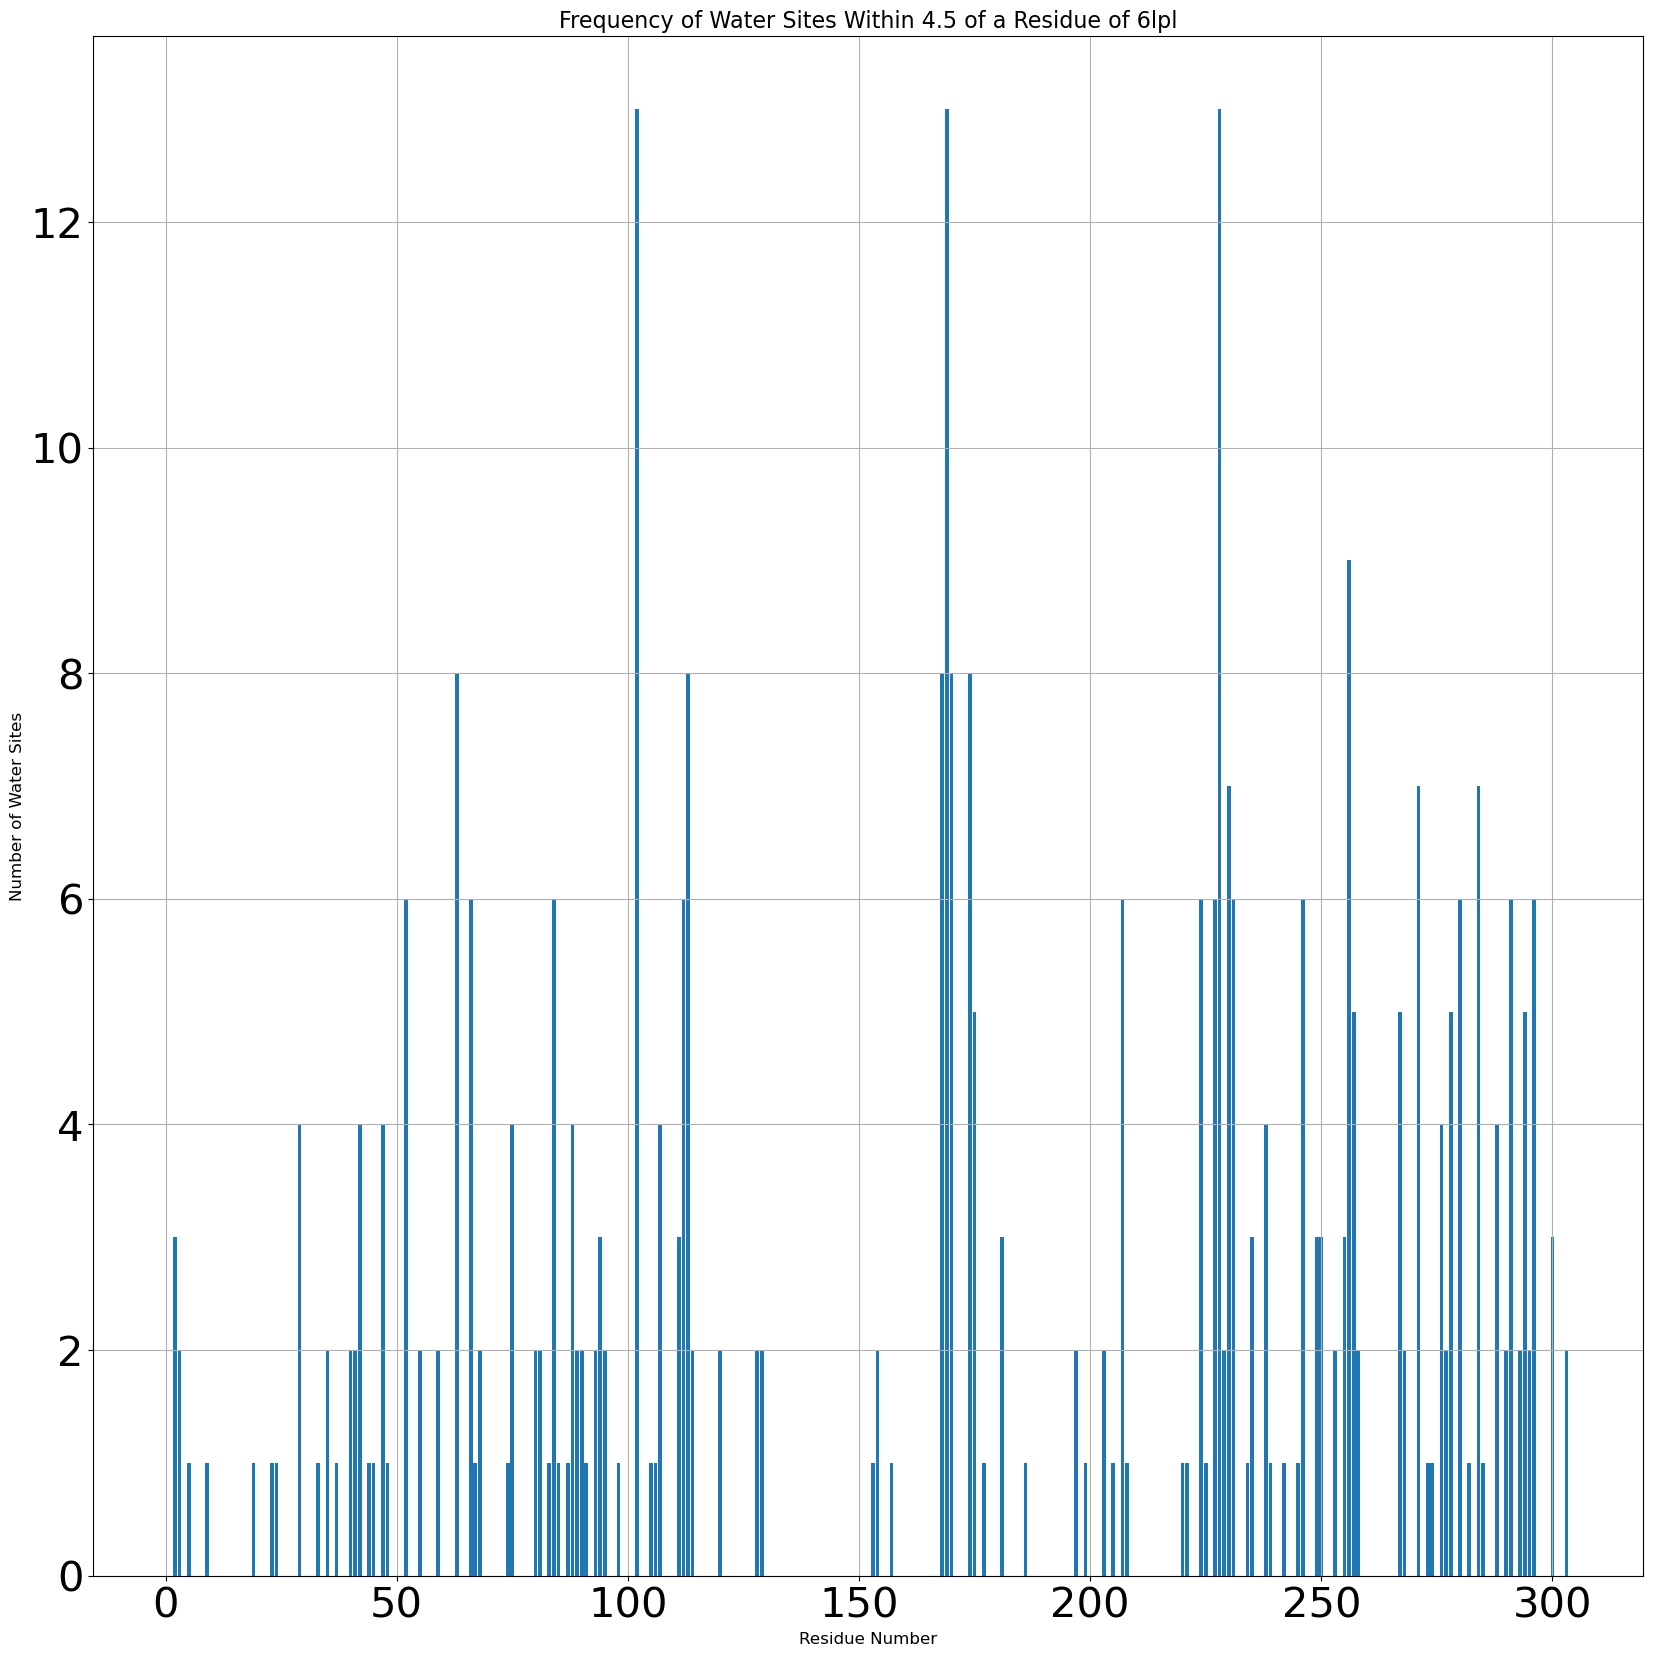

3uzc  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



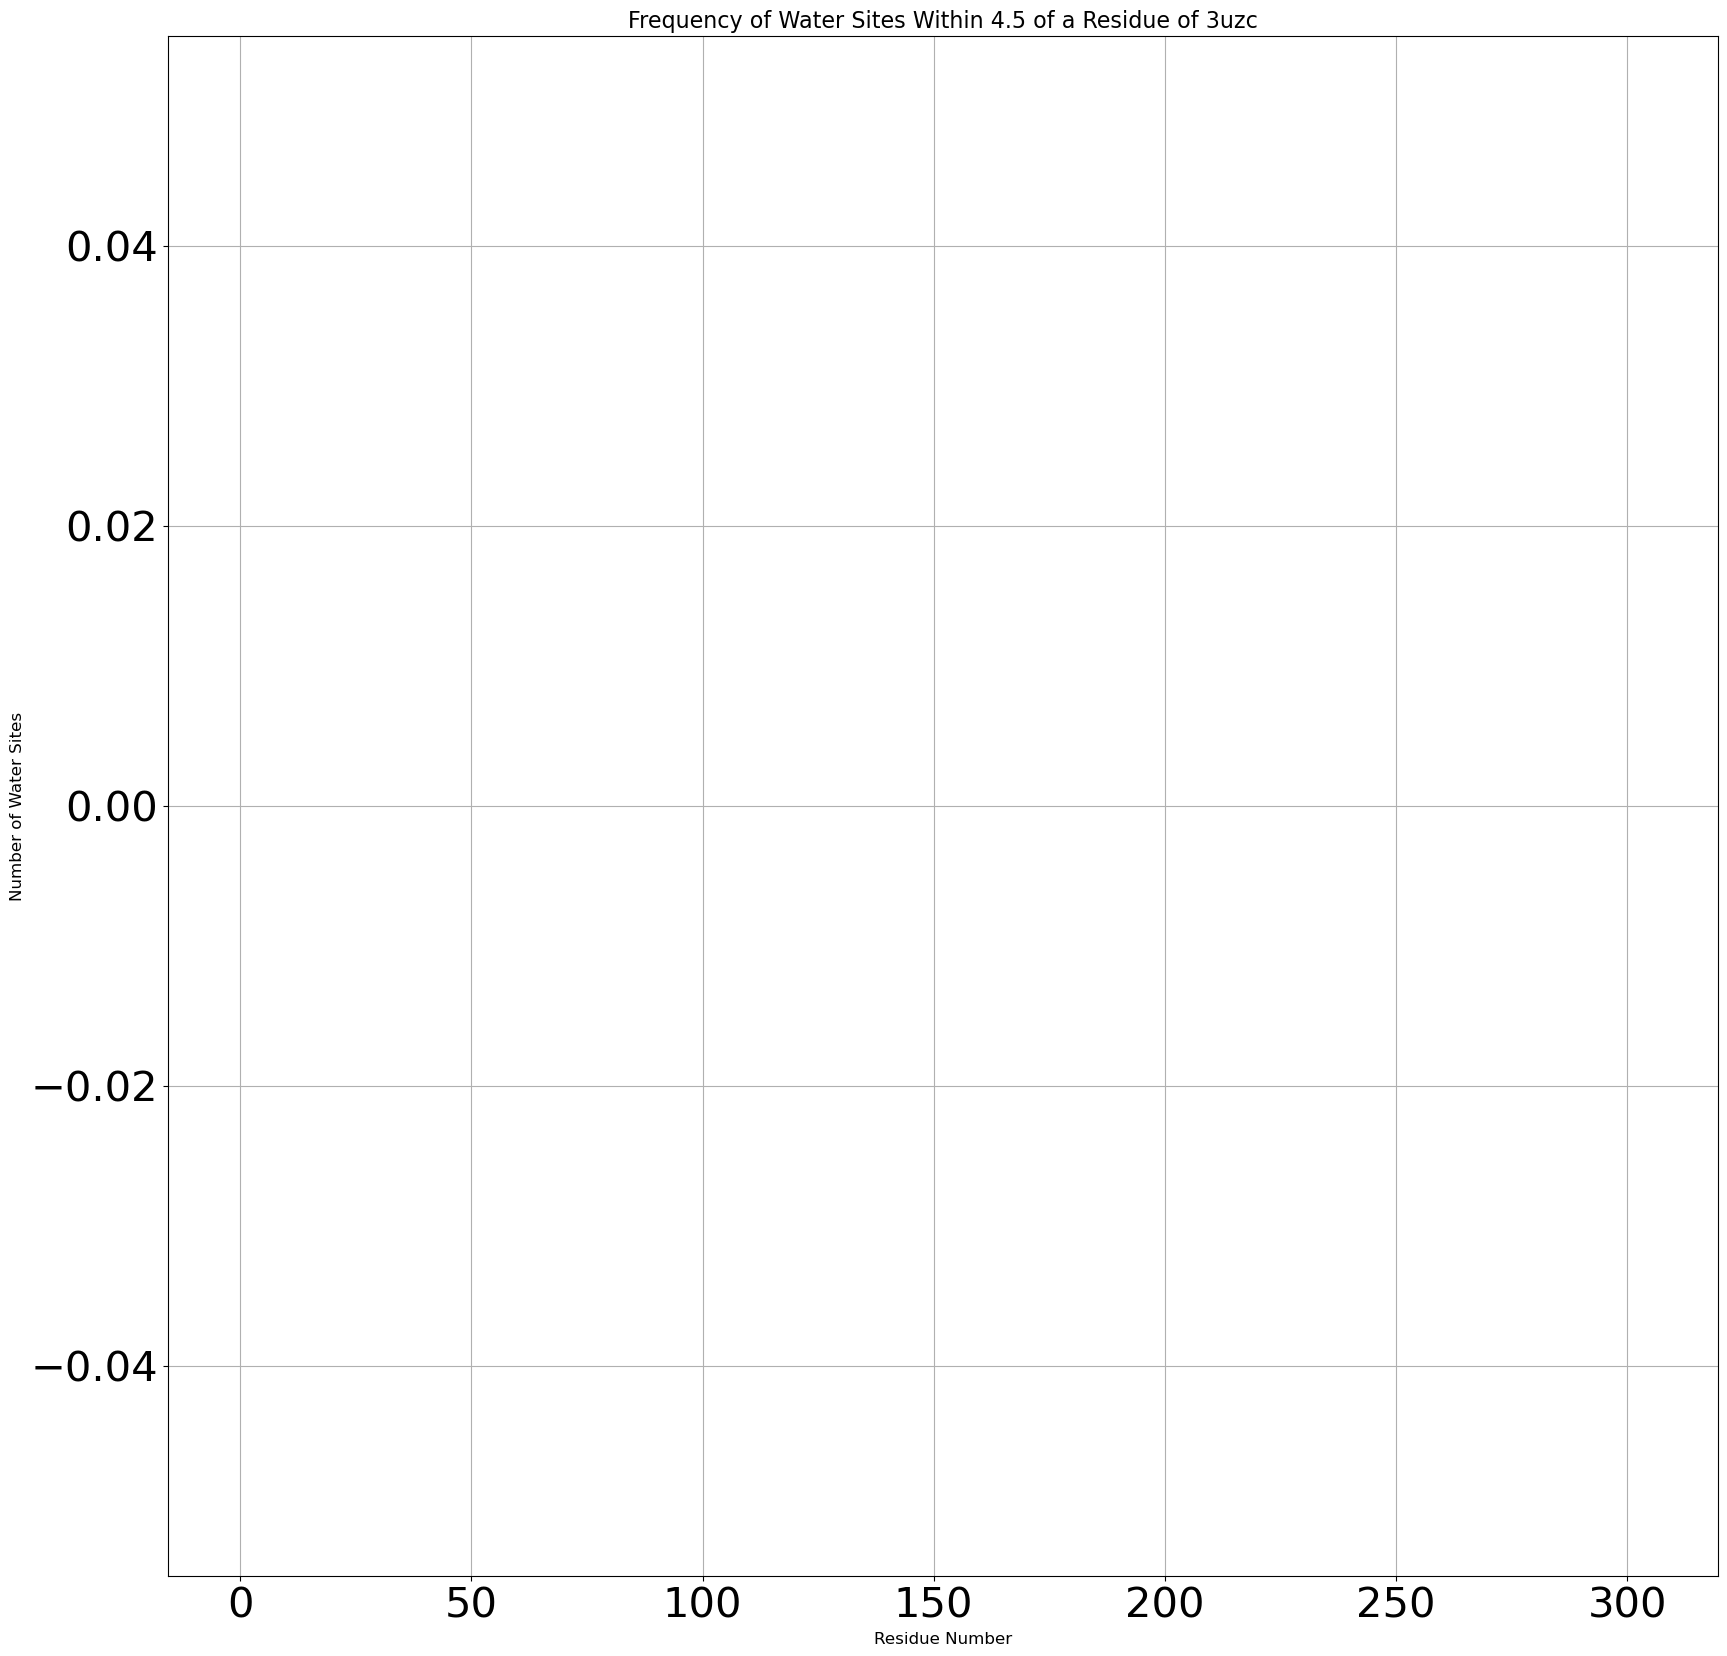

6lpj  Watersite Resid : [0, 0, 2, 3, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 3, 2, 6, 0, 0, 1, 0, 3, 0, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 1, 7, 1, 0, 1, 4, 2, 3, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 13, 0, 0, 1, 0, 4, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 12, 8, 0, 0, 0, 7, 6, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 6, 0, 0, 5, 6, 1, 6, 6, 1, 0, 1, 2, 0, 0, 3, 1, 0, 0, 2, 0, 0, 1, 6, 0, 0, 3, 2, 0, 0, 3, 0, 3, 7, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 7, 0, 1, 1, 0, 4, 3, 4, 0, 5, 0, 1, 0, 8, 1, 0, 0, 3, 0, 0, 3, 0, 2, 5, 1, 6, 0, 0, 0, 3, 0, 0, 2, 0]



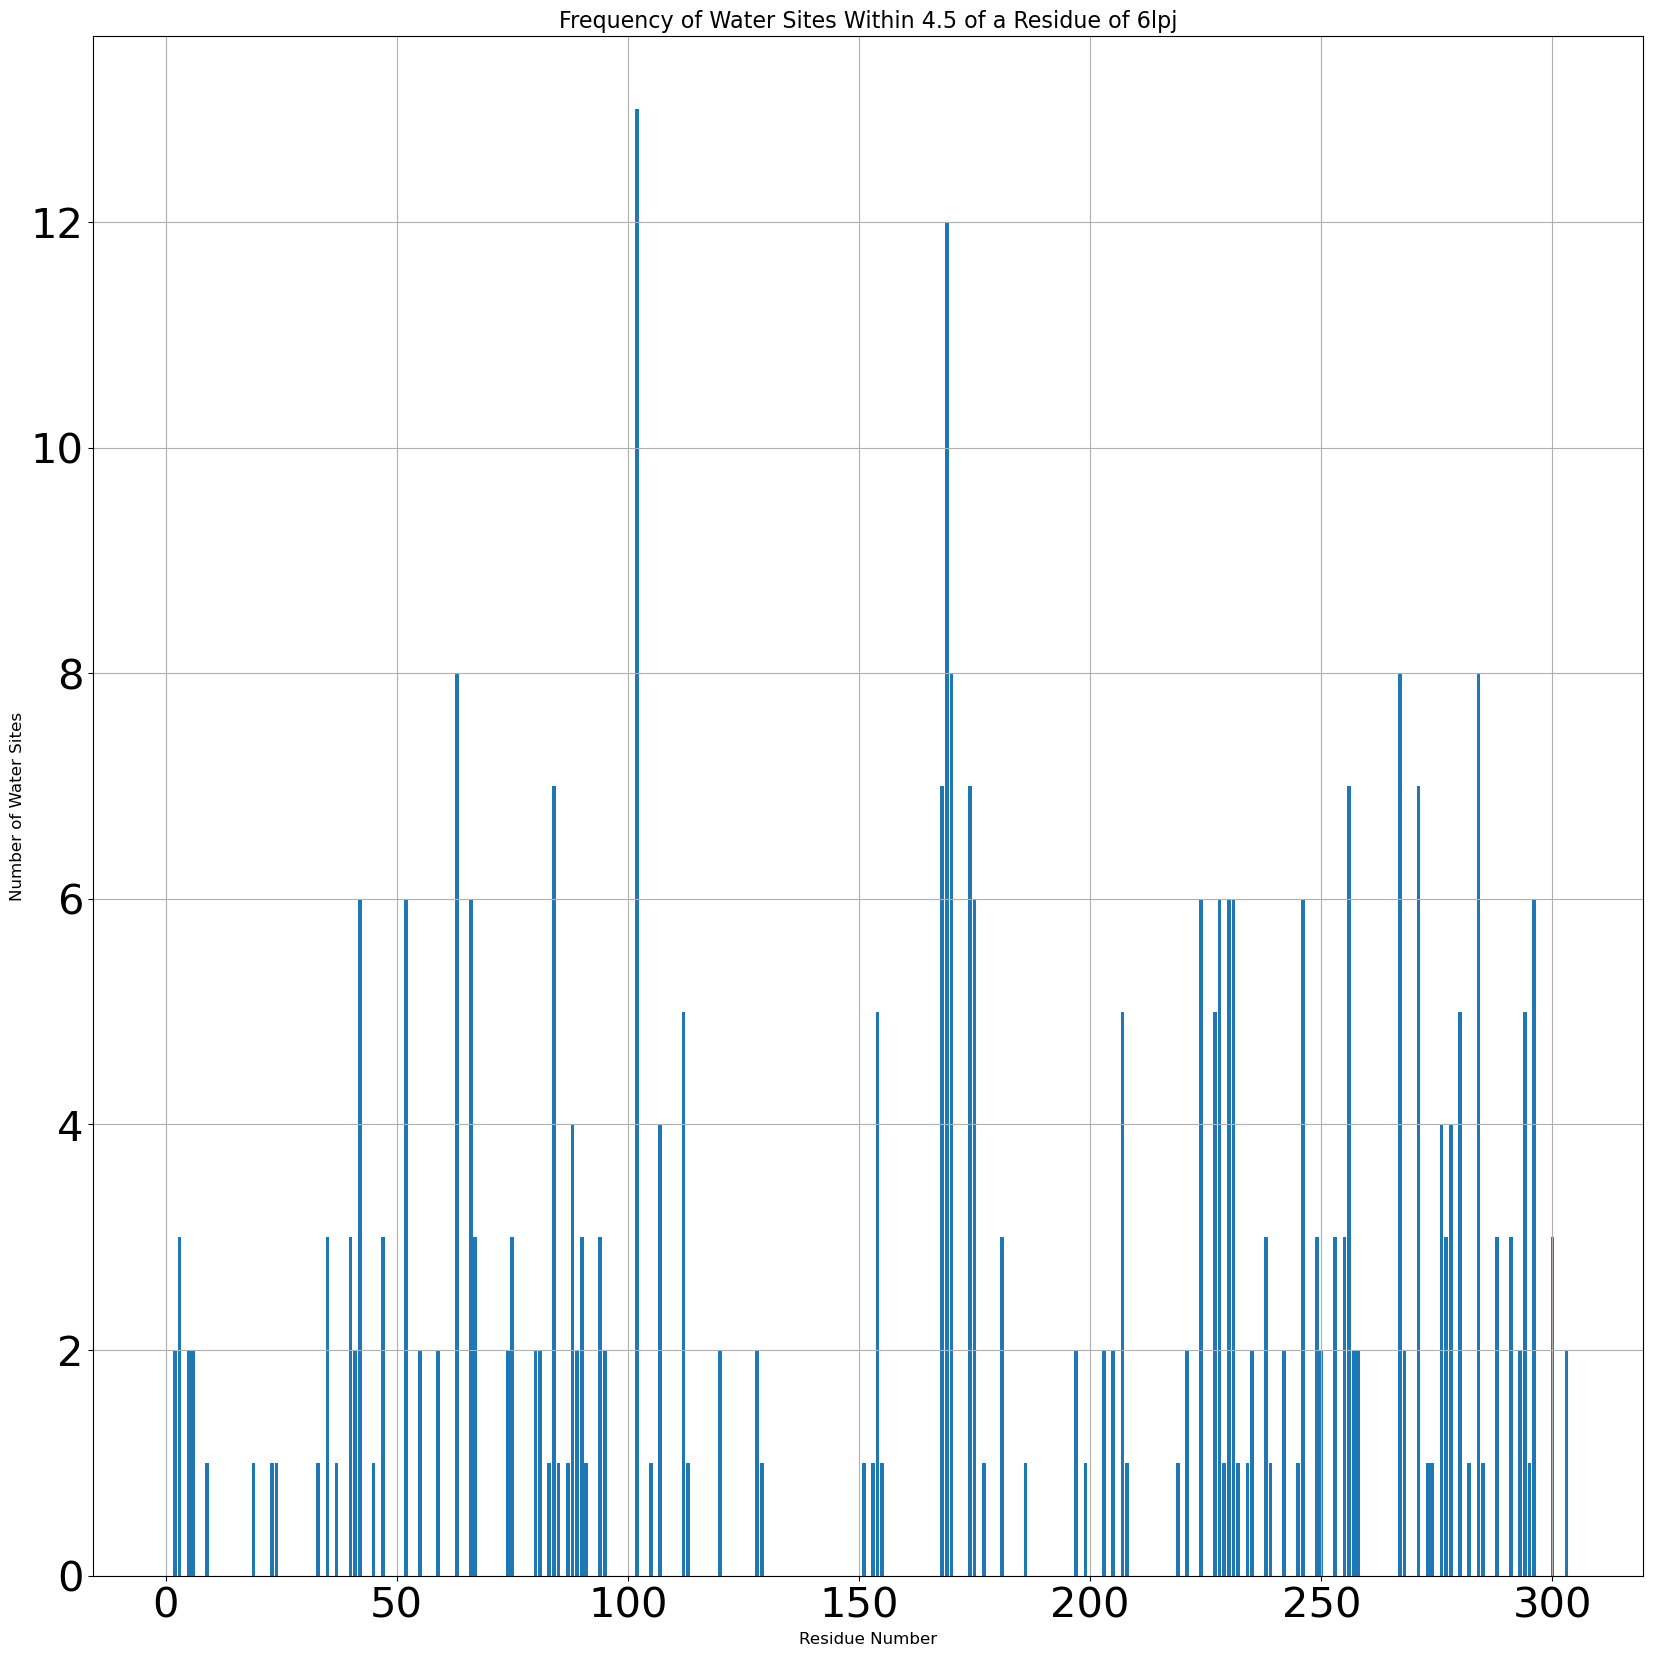

5olh  Watersite Resid : [0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 3, 0, 1, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0, 0, 1, 5, 0, 0, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



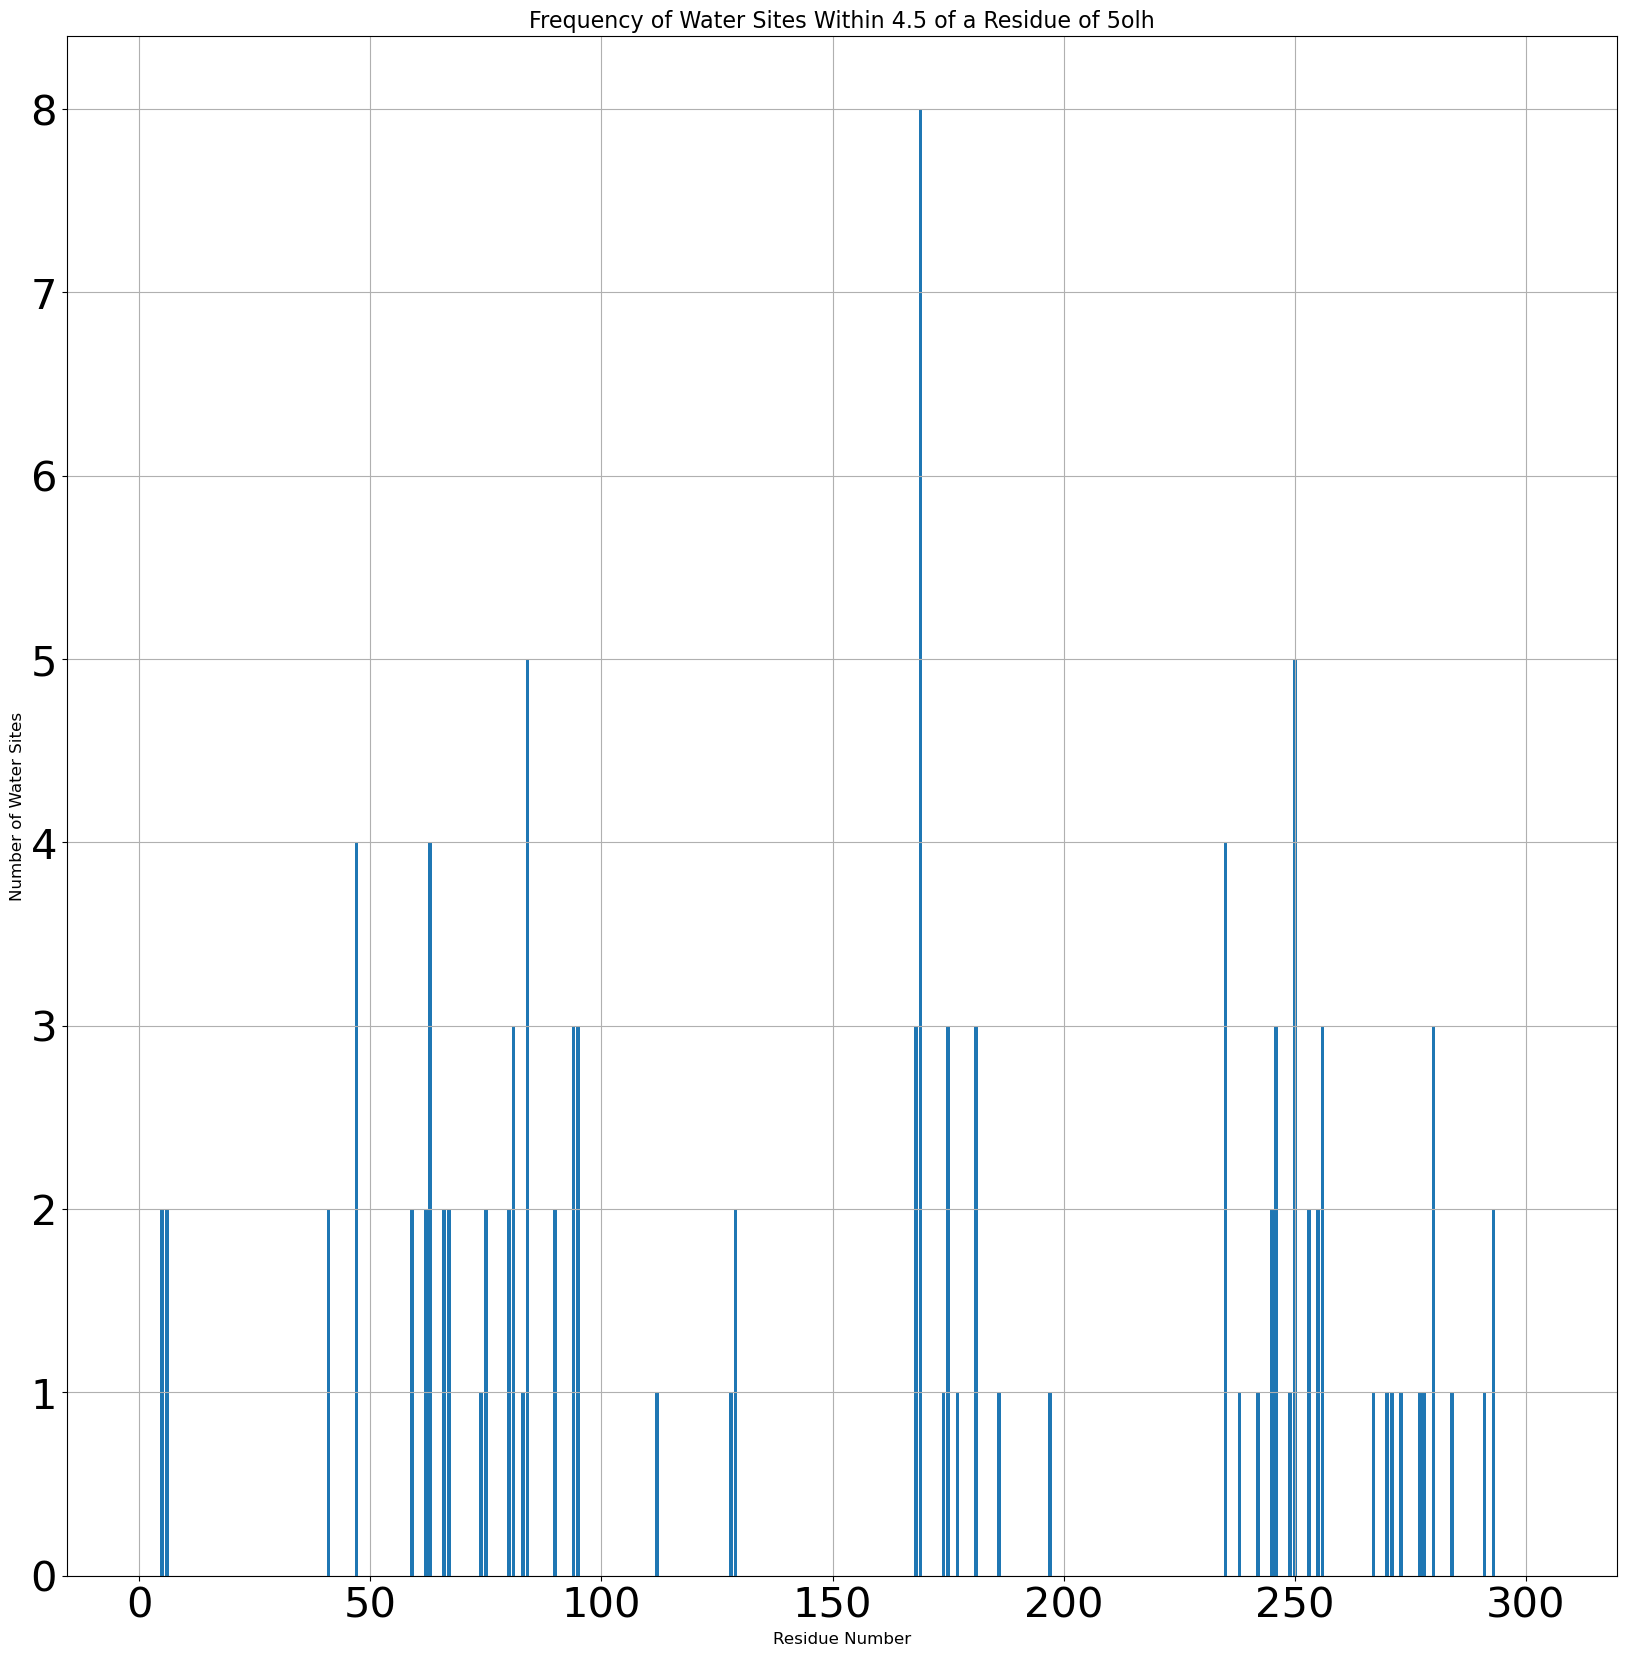

6lpk  Watersite Resid : [0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 5, 0, 0, 1, 0, 3, 2, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 1, 6, 1, 0, 1, 4, 2, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 10, 0, 0, 2, 1, 4, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 11, 8, 0, 0, 0, 7, 6, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 5, 0, 0, 4, 6, 2, 5, 3, 1, 0, 0, 4, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 5, 0, 1, 1, 2, 0, 0, 3, 0, 3, 7, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 0, 7, 0, 1, 2, 0, 4, 2, 5, 0, 6, 0, 1, 0, 6, 1, 0, 0, 3, 0, 0, 1, 0, 2, 5, 1, 3, 0, 0, 0, 3, 0, 0, 2, 0]



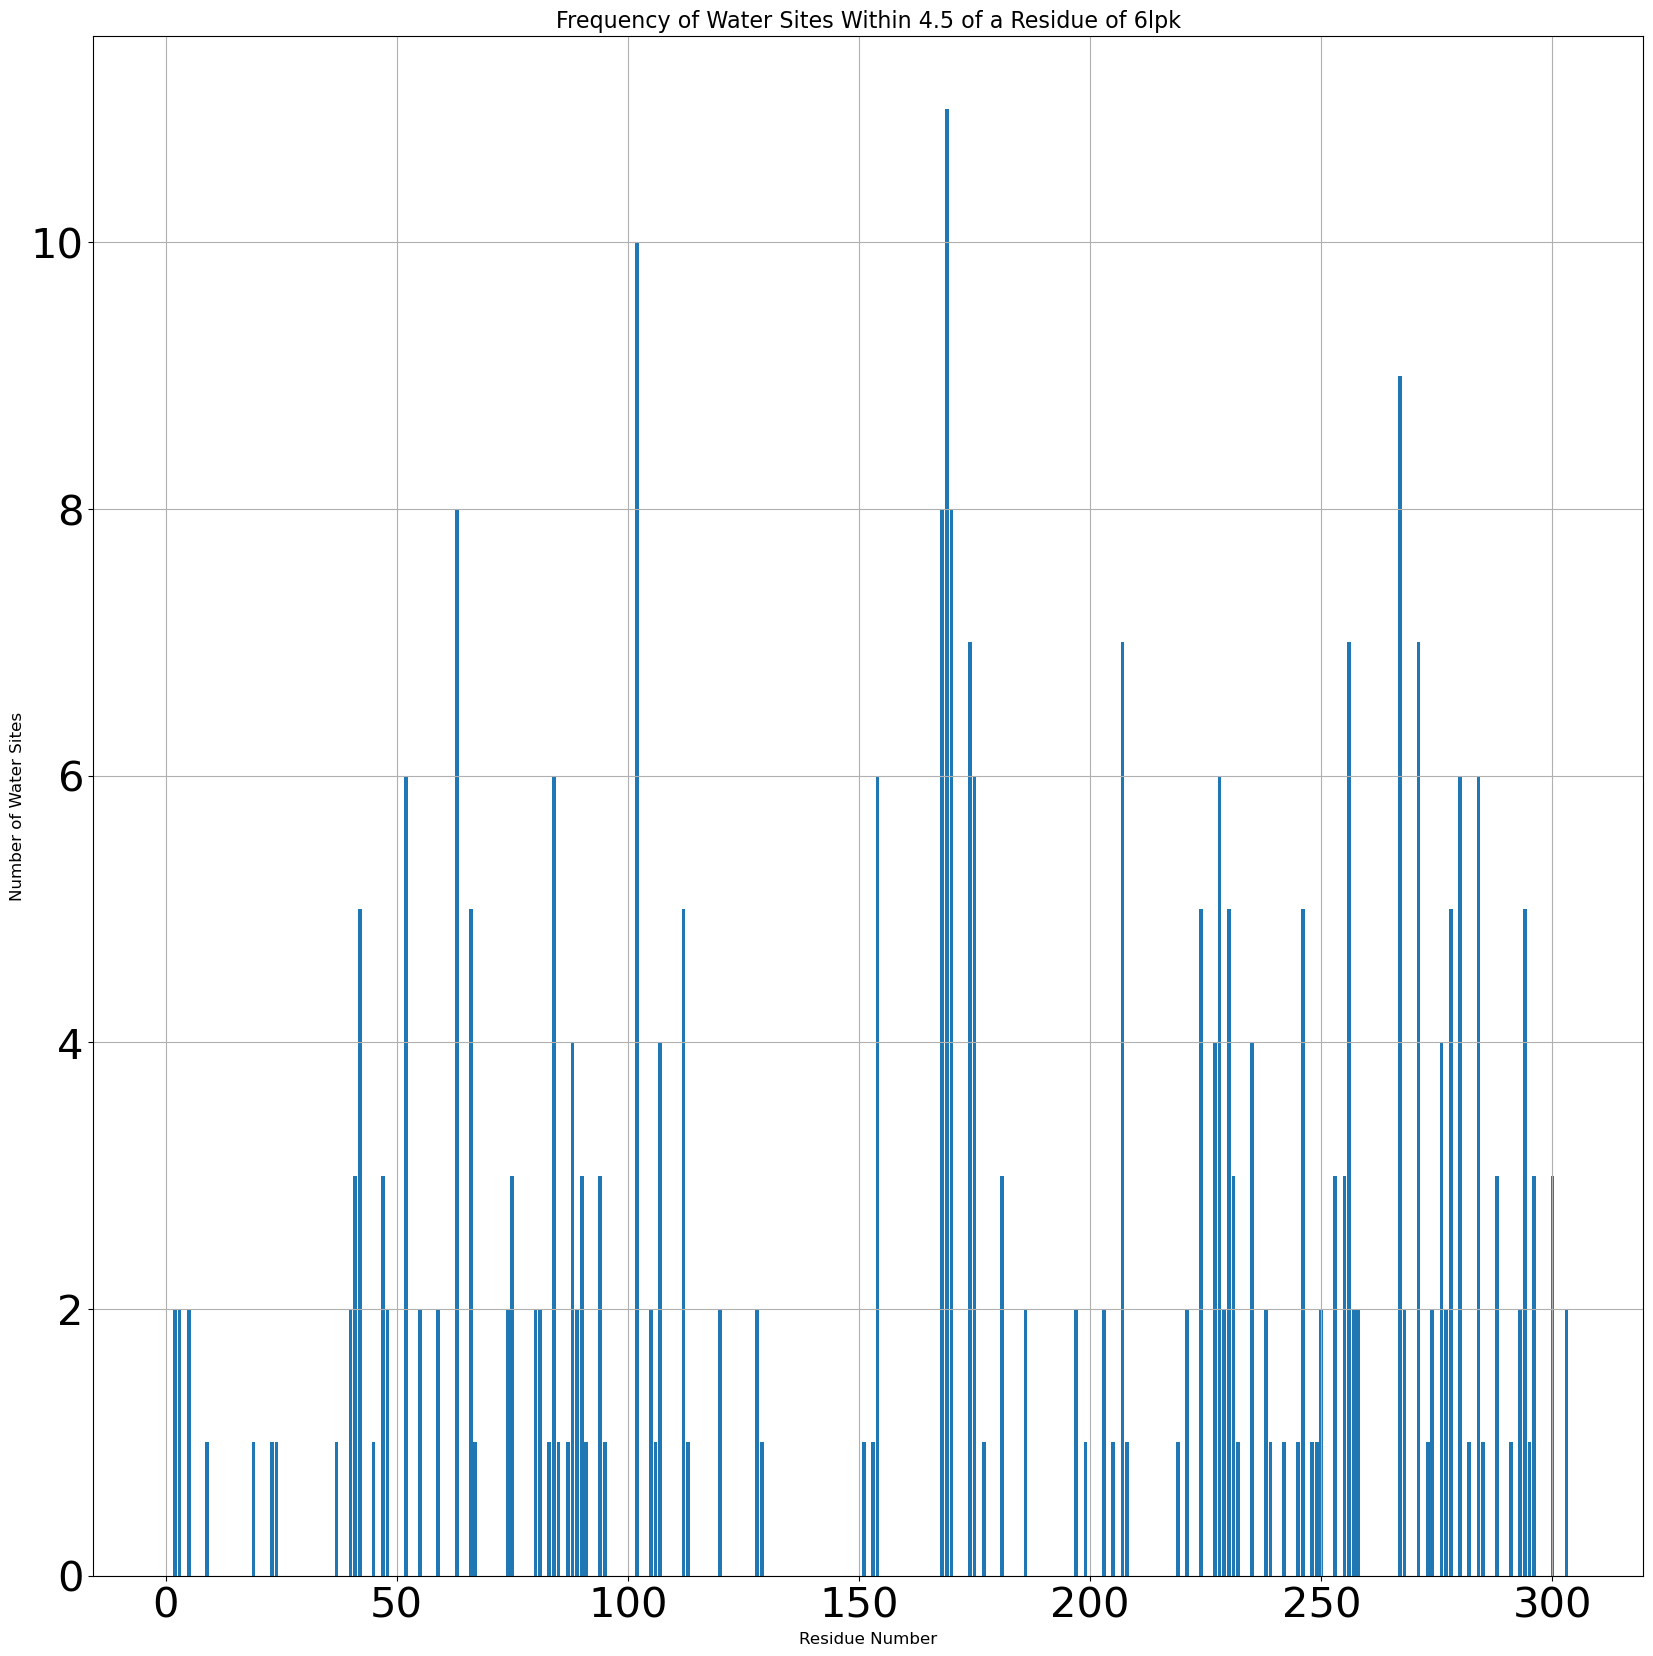

7pyr  Watersite Resid : [0, 0, 12, 6, 1, 3, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 7, 0, 0, 0, 0, 5, 6, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 9, 0, 1, 3, 1, 9, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 1, 6, 1, 0, 0, 2, 2, 3, 3, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 9, 5, 0, 4, 2, 2, 0, 0, 0, 8, 6, 7, 4, 4, 0, 0, 3, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 11, 0, 1, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 5, 0, 0, 0, 7, 6, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 8, 7, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 4, 2, 2, 4, 10, 0, 13, 5, 2, 0, 1, 3, 0, 3, 2, 1, 1, 5, 0, 0, 3, 1, 5, 0, 3, 2, 3, 0, 0, 2, 0, 2, 9, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 14, 13, 1, 0, 4, 1, 1, 0, 0, 0, 3, 5, 0, 4, 0, 2, 0, 5, 1, 5, 1, 2, 0, 7, 12, 0, 9, 3, 0, 2, 3, 0, 0, 1, 2, 0, 4, 5]



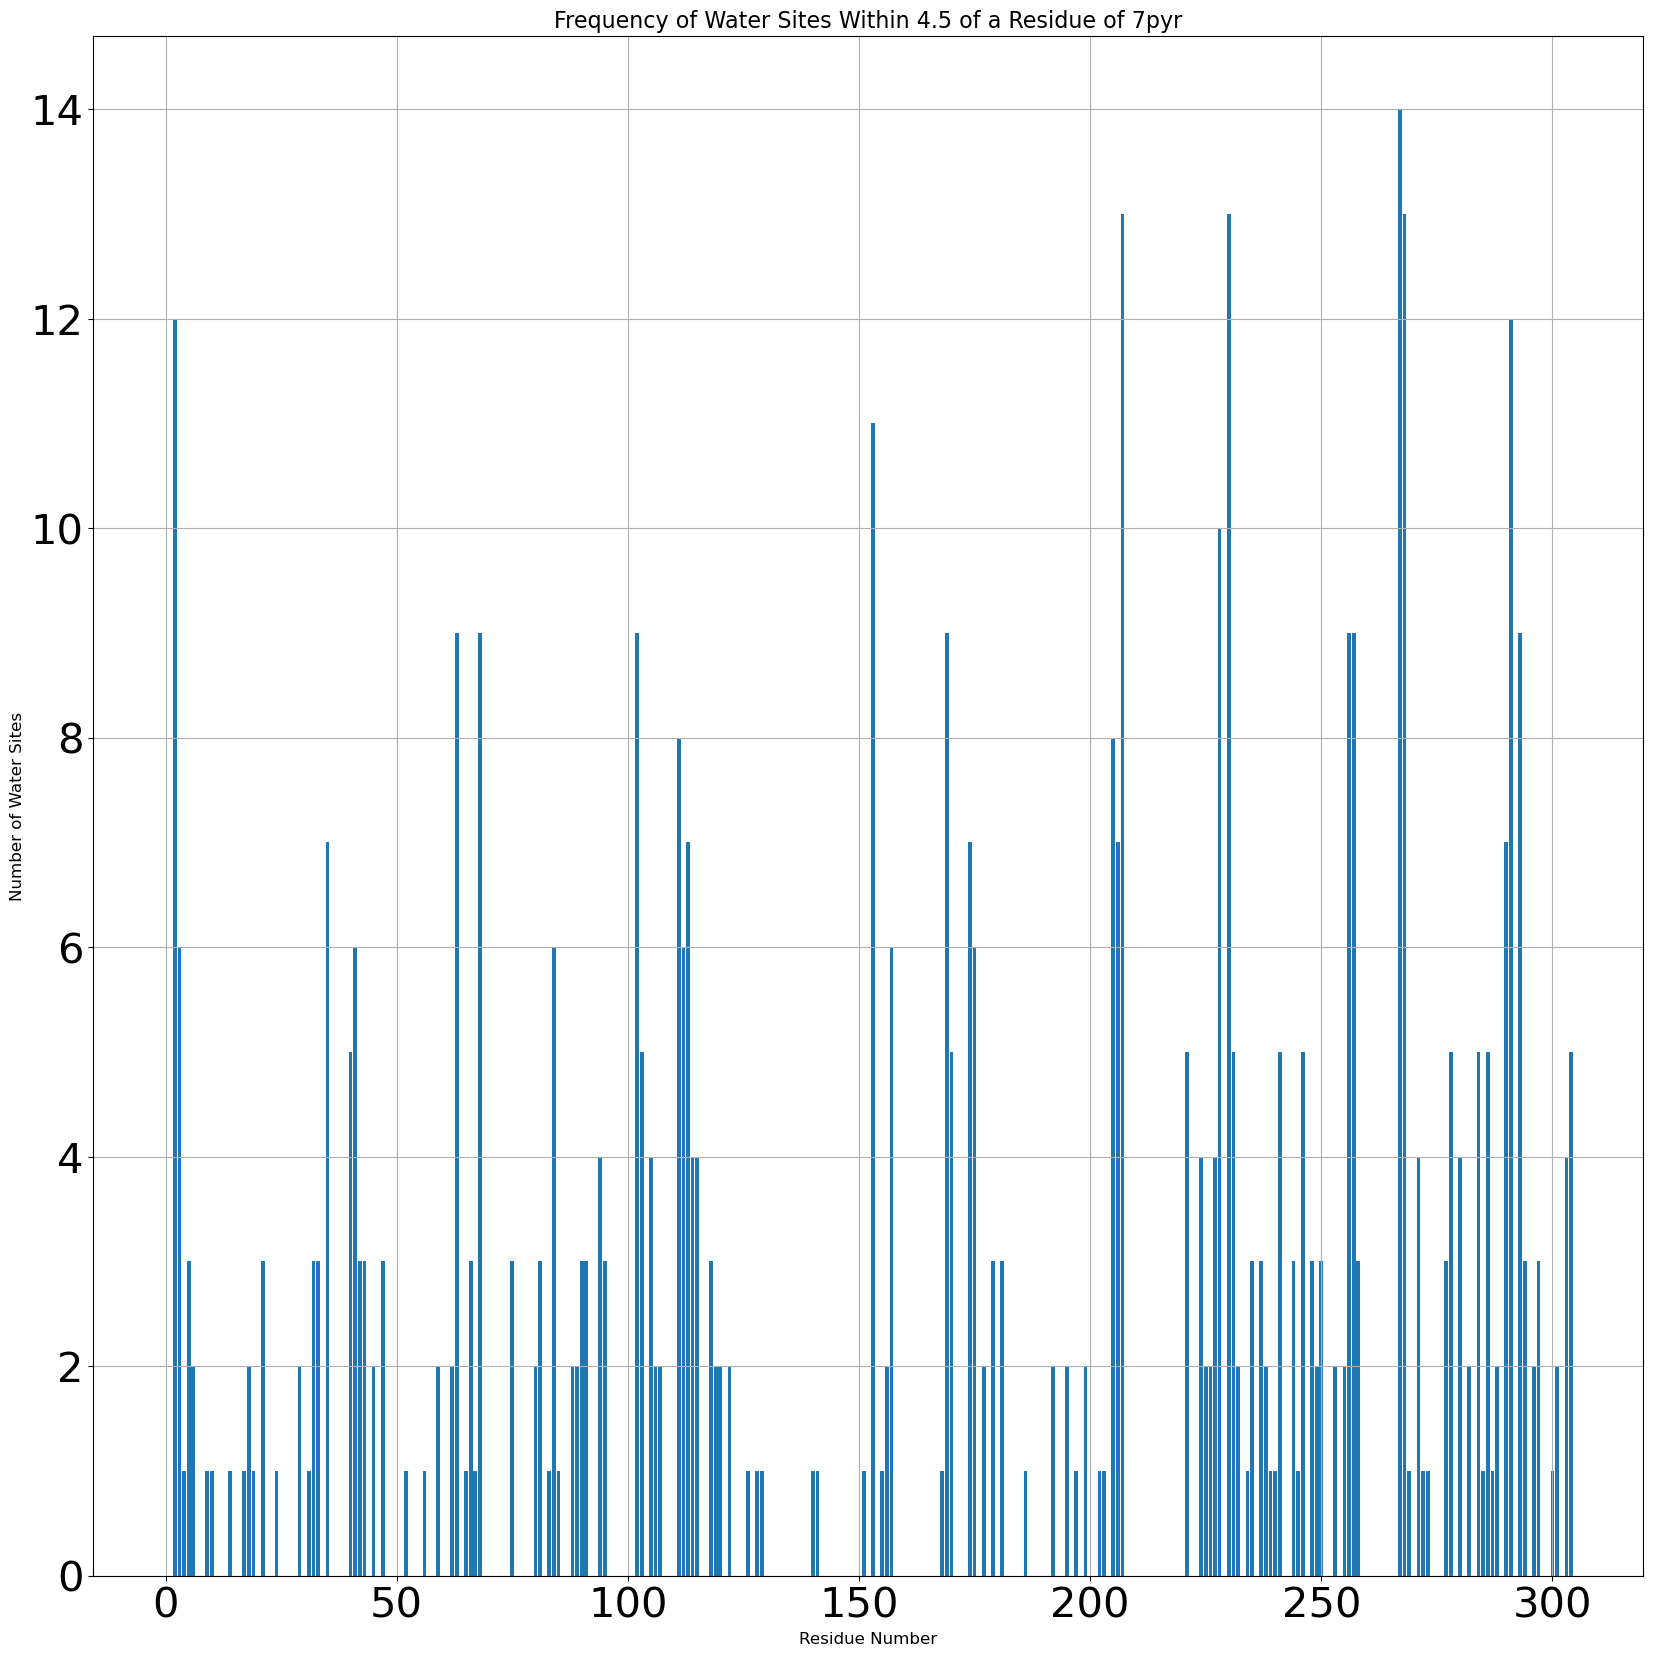

3uza  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



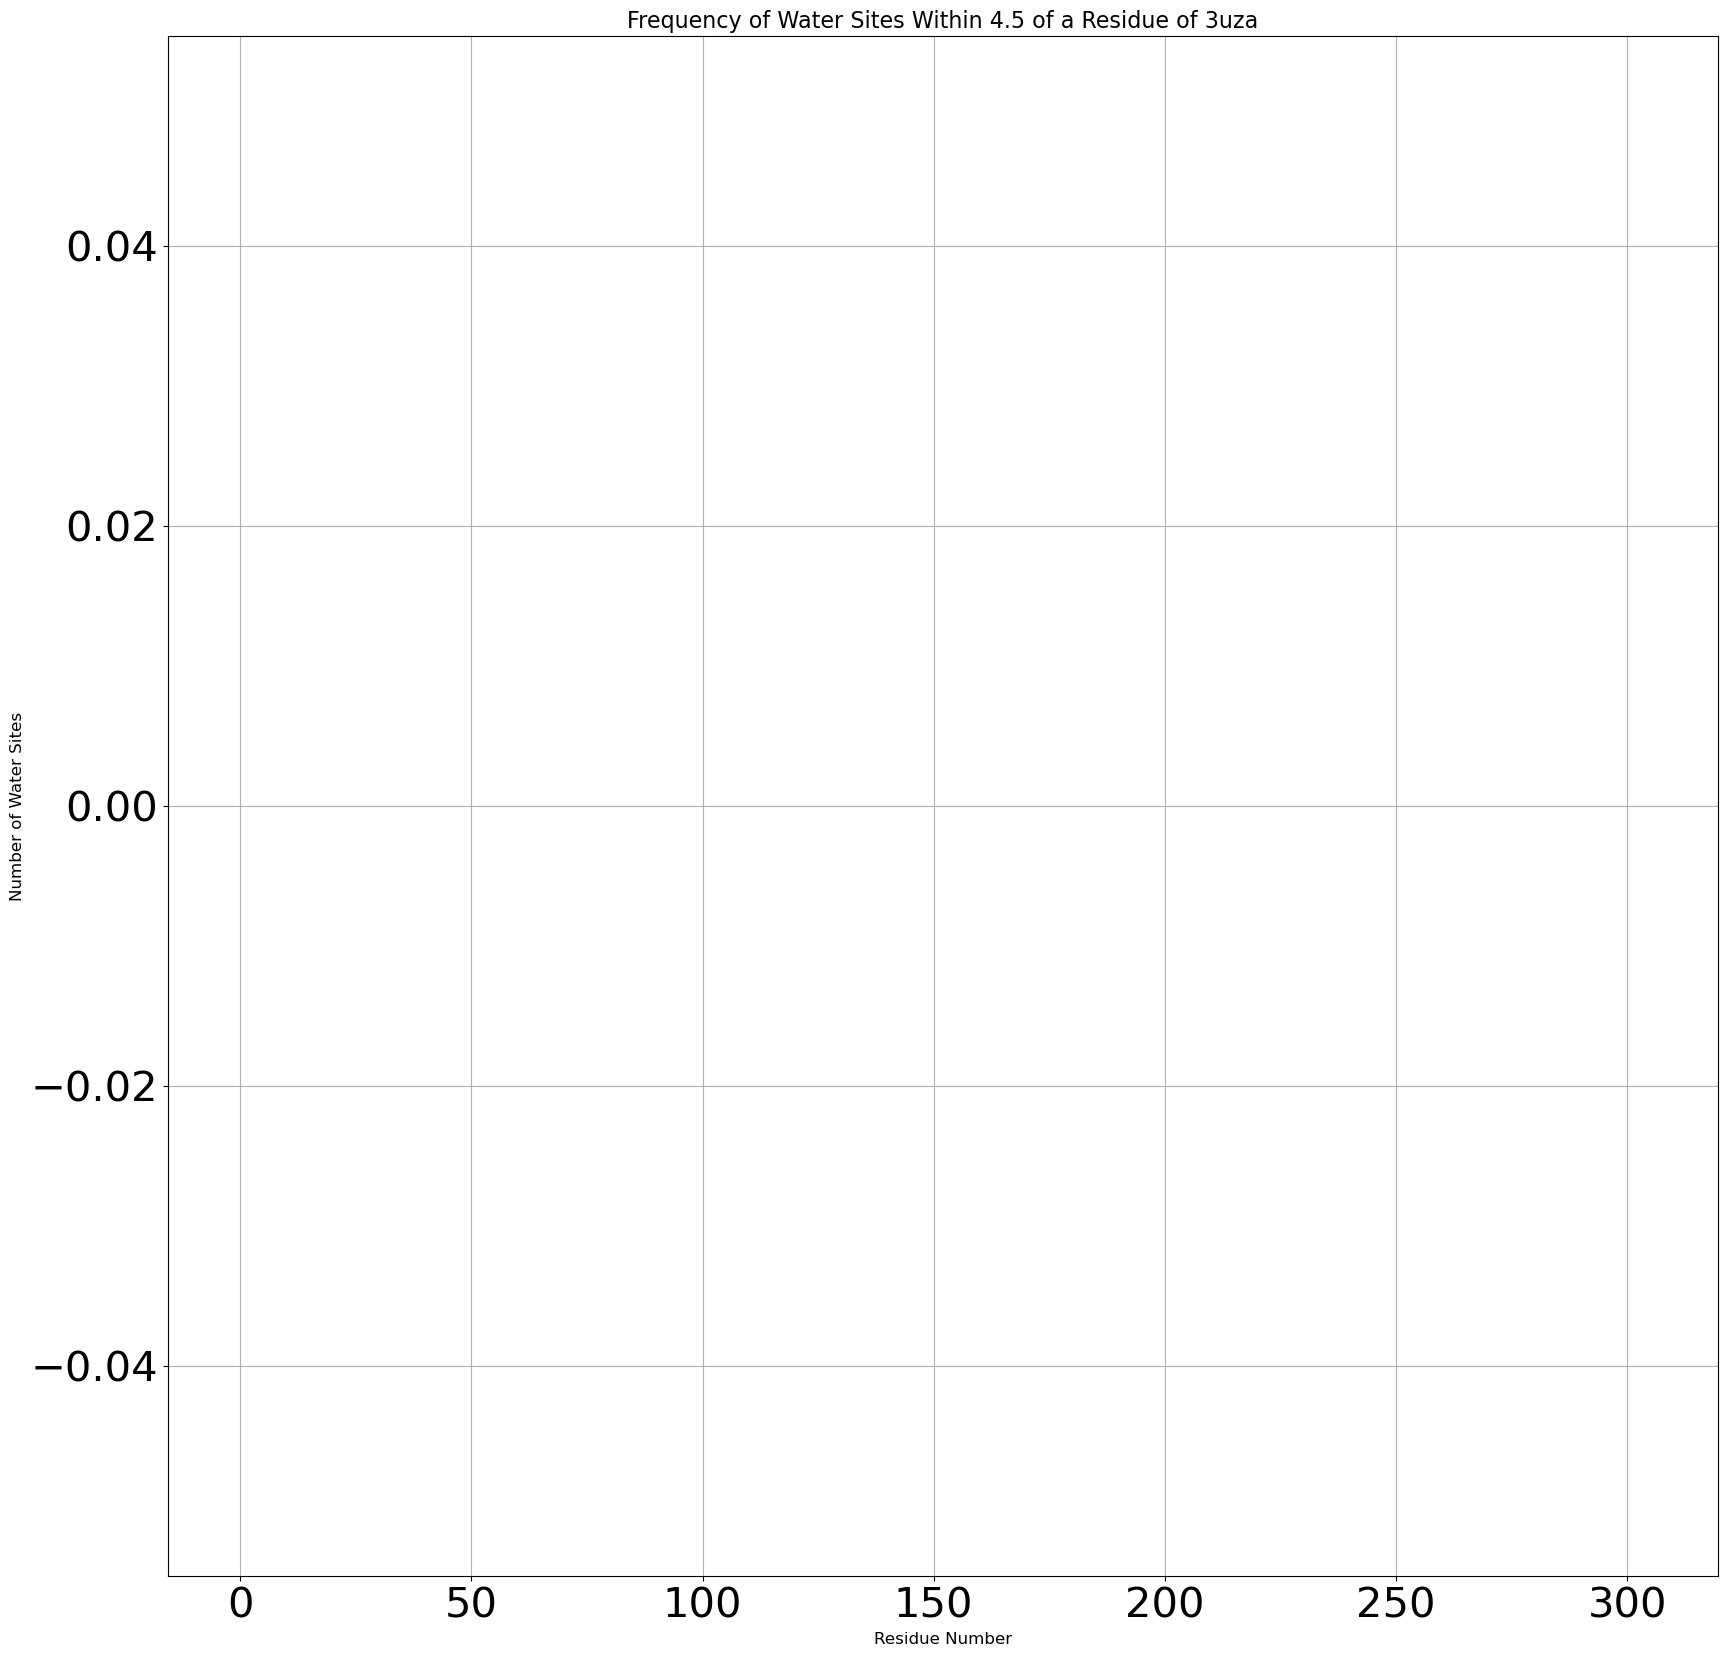

4ug2  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 2, 2, 4, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 5, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



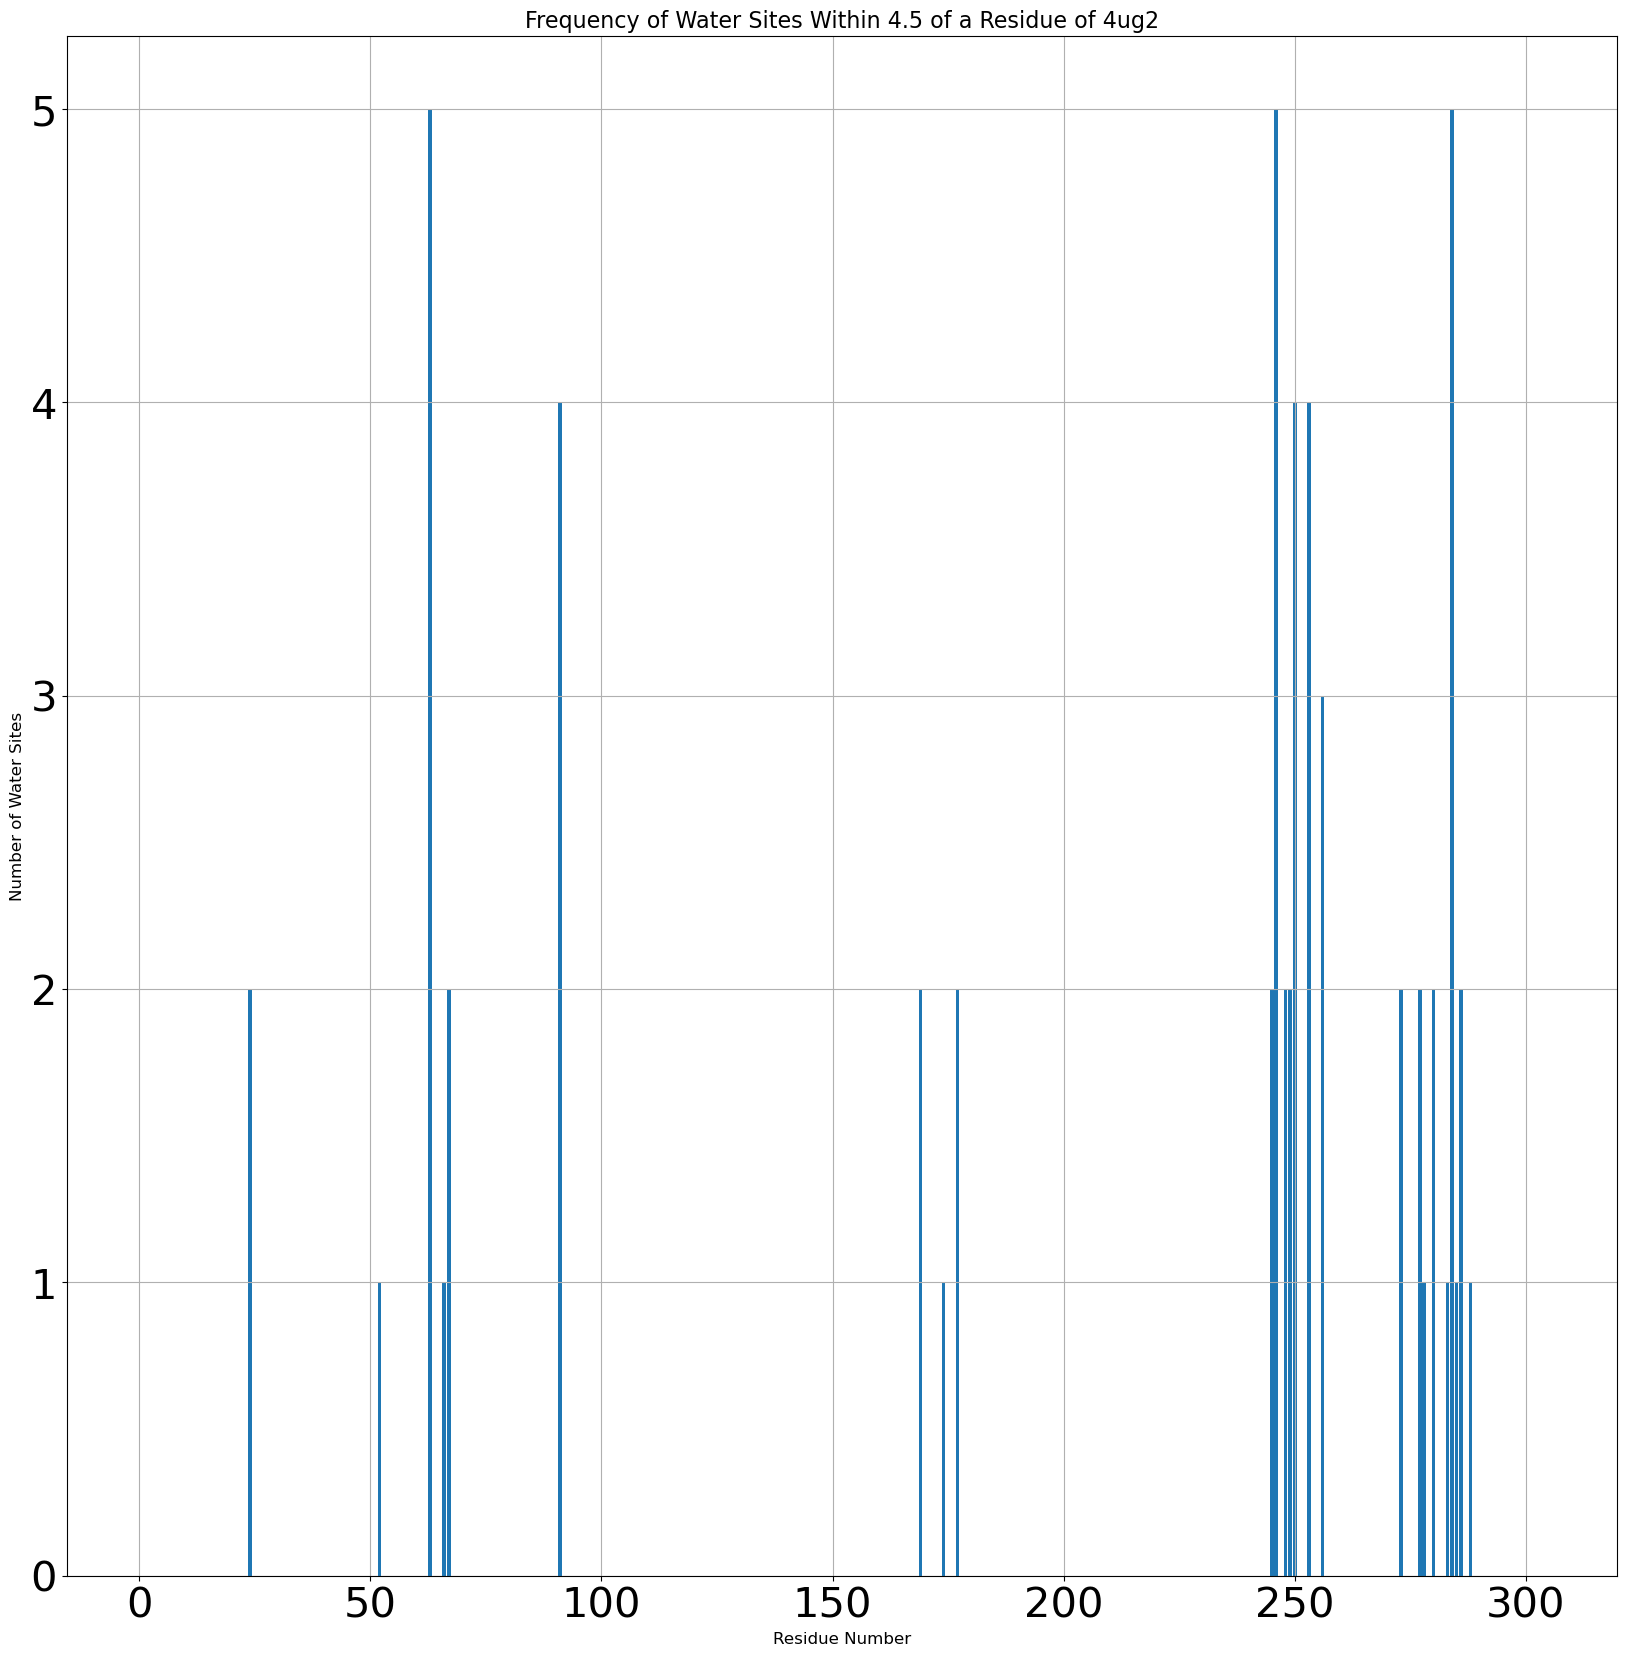

3rfm  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



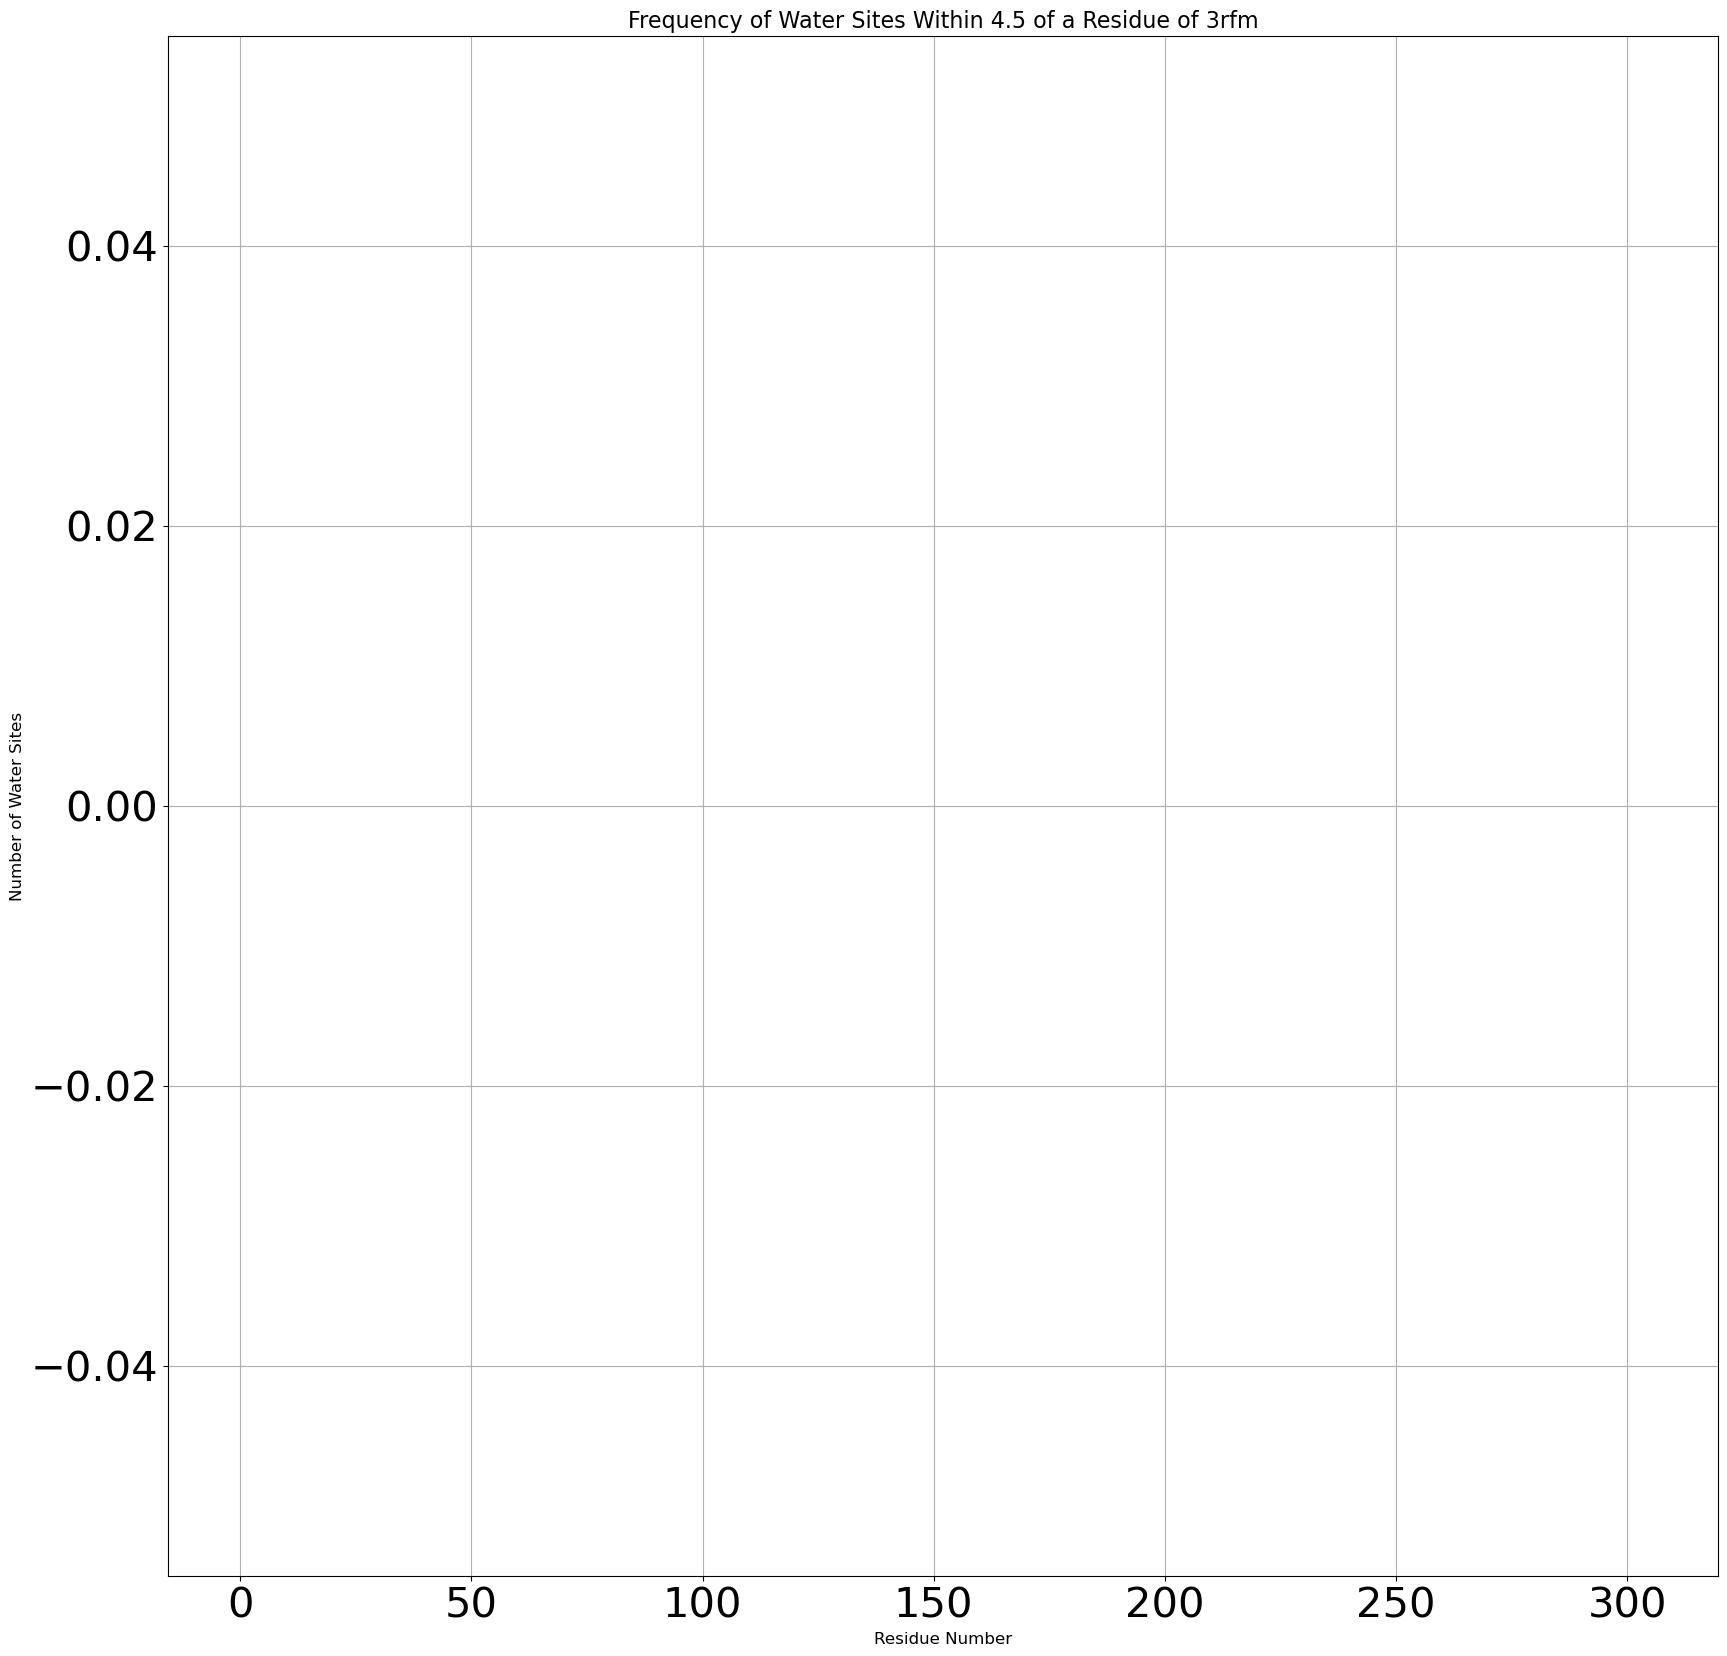

5olz  Watersite Resid : [0, 0, 1, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 17, 7, 0, 0, 0, 7, 3, 0, 1, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 0, 0, 3, 3, 5, 0, 9, 3, 1, 0, 0, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 0, 3, 0, 2, 9, 9, 8, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 3, 2, 0, 1, 2, 0, 0, 1, 0, 0, 6, 0, 1, 0, 7, 1, 0, 0, 4, 0, 0, 3, 0, 3, 2, 0, 7, 0, 0, 0, 7, 0, 0, 0, 1]



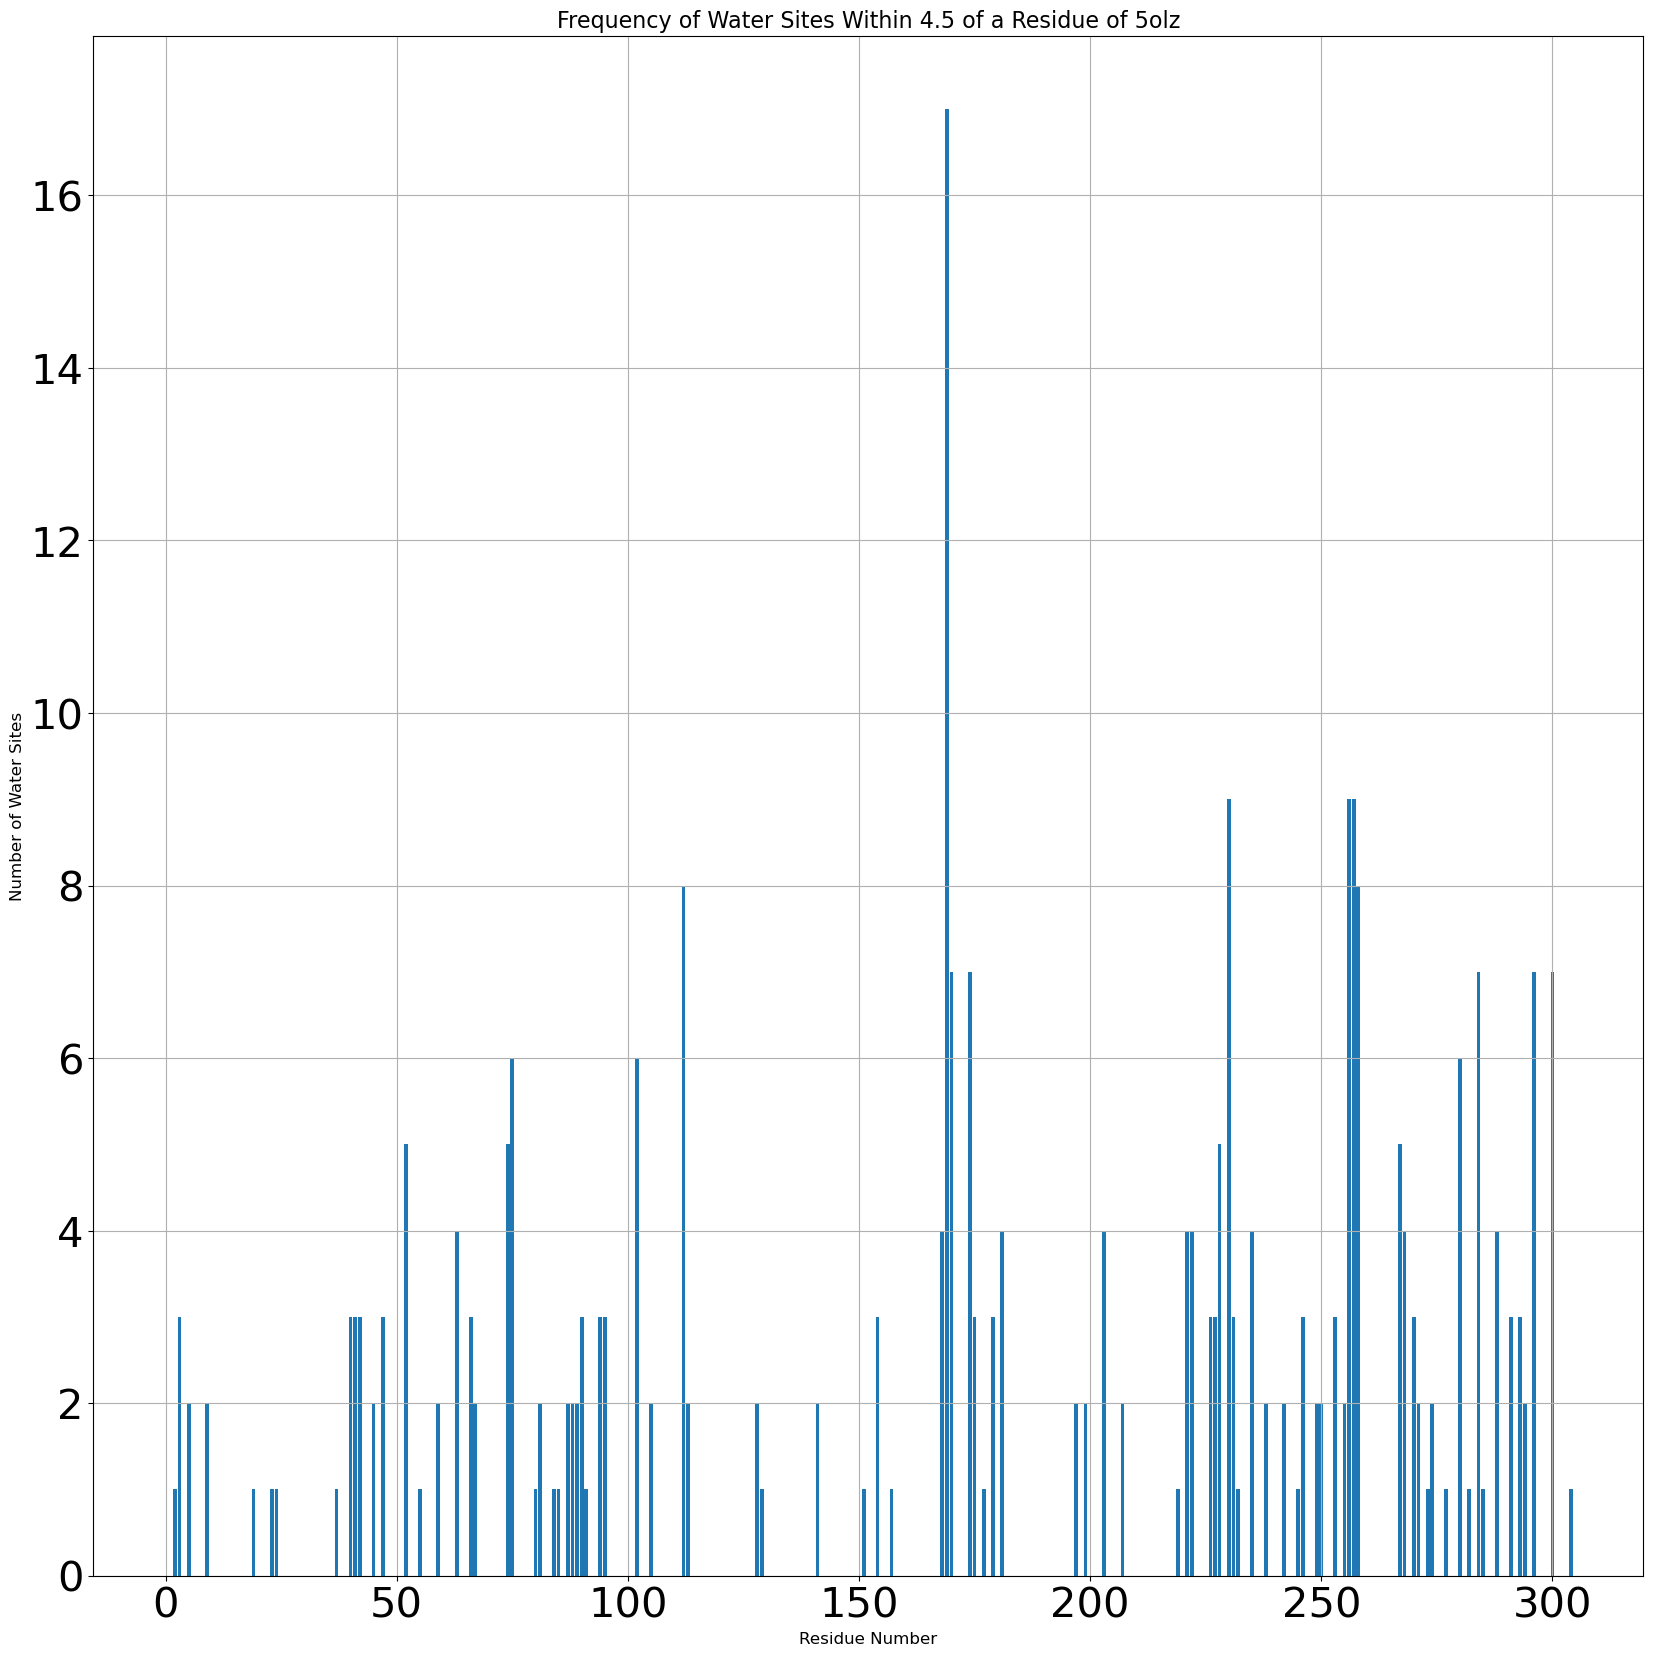

8cu7  Watersite Resid : [0, 0, 5, 1, 0, 3, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 1, 0, 0, 4, 3, 5, 5, 0, 2, 0, 3, 2, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 3, 4, 6, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 2, 3, 0, 0, 4, 1, 0, 2, 1, 2, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 1, 0, 0, 0, 0, 2, 5, 6, 2, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 18, 8, 0, 0, 0, 4, 9, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 3, 0, 0, 1, 5, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 6, 0, 2, 3, 1, 1, 0, 5, 0, 3, 1, 0, 0, 0, 2, 0, 0, 1, 4, 0, 0, 2, 3, 0, 0, 2, 0, 3, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 2, 3, 0, 1, 0, 0, 0, 1, 1, 0, 6, 0, 1, 0, 8, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1]



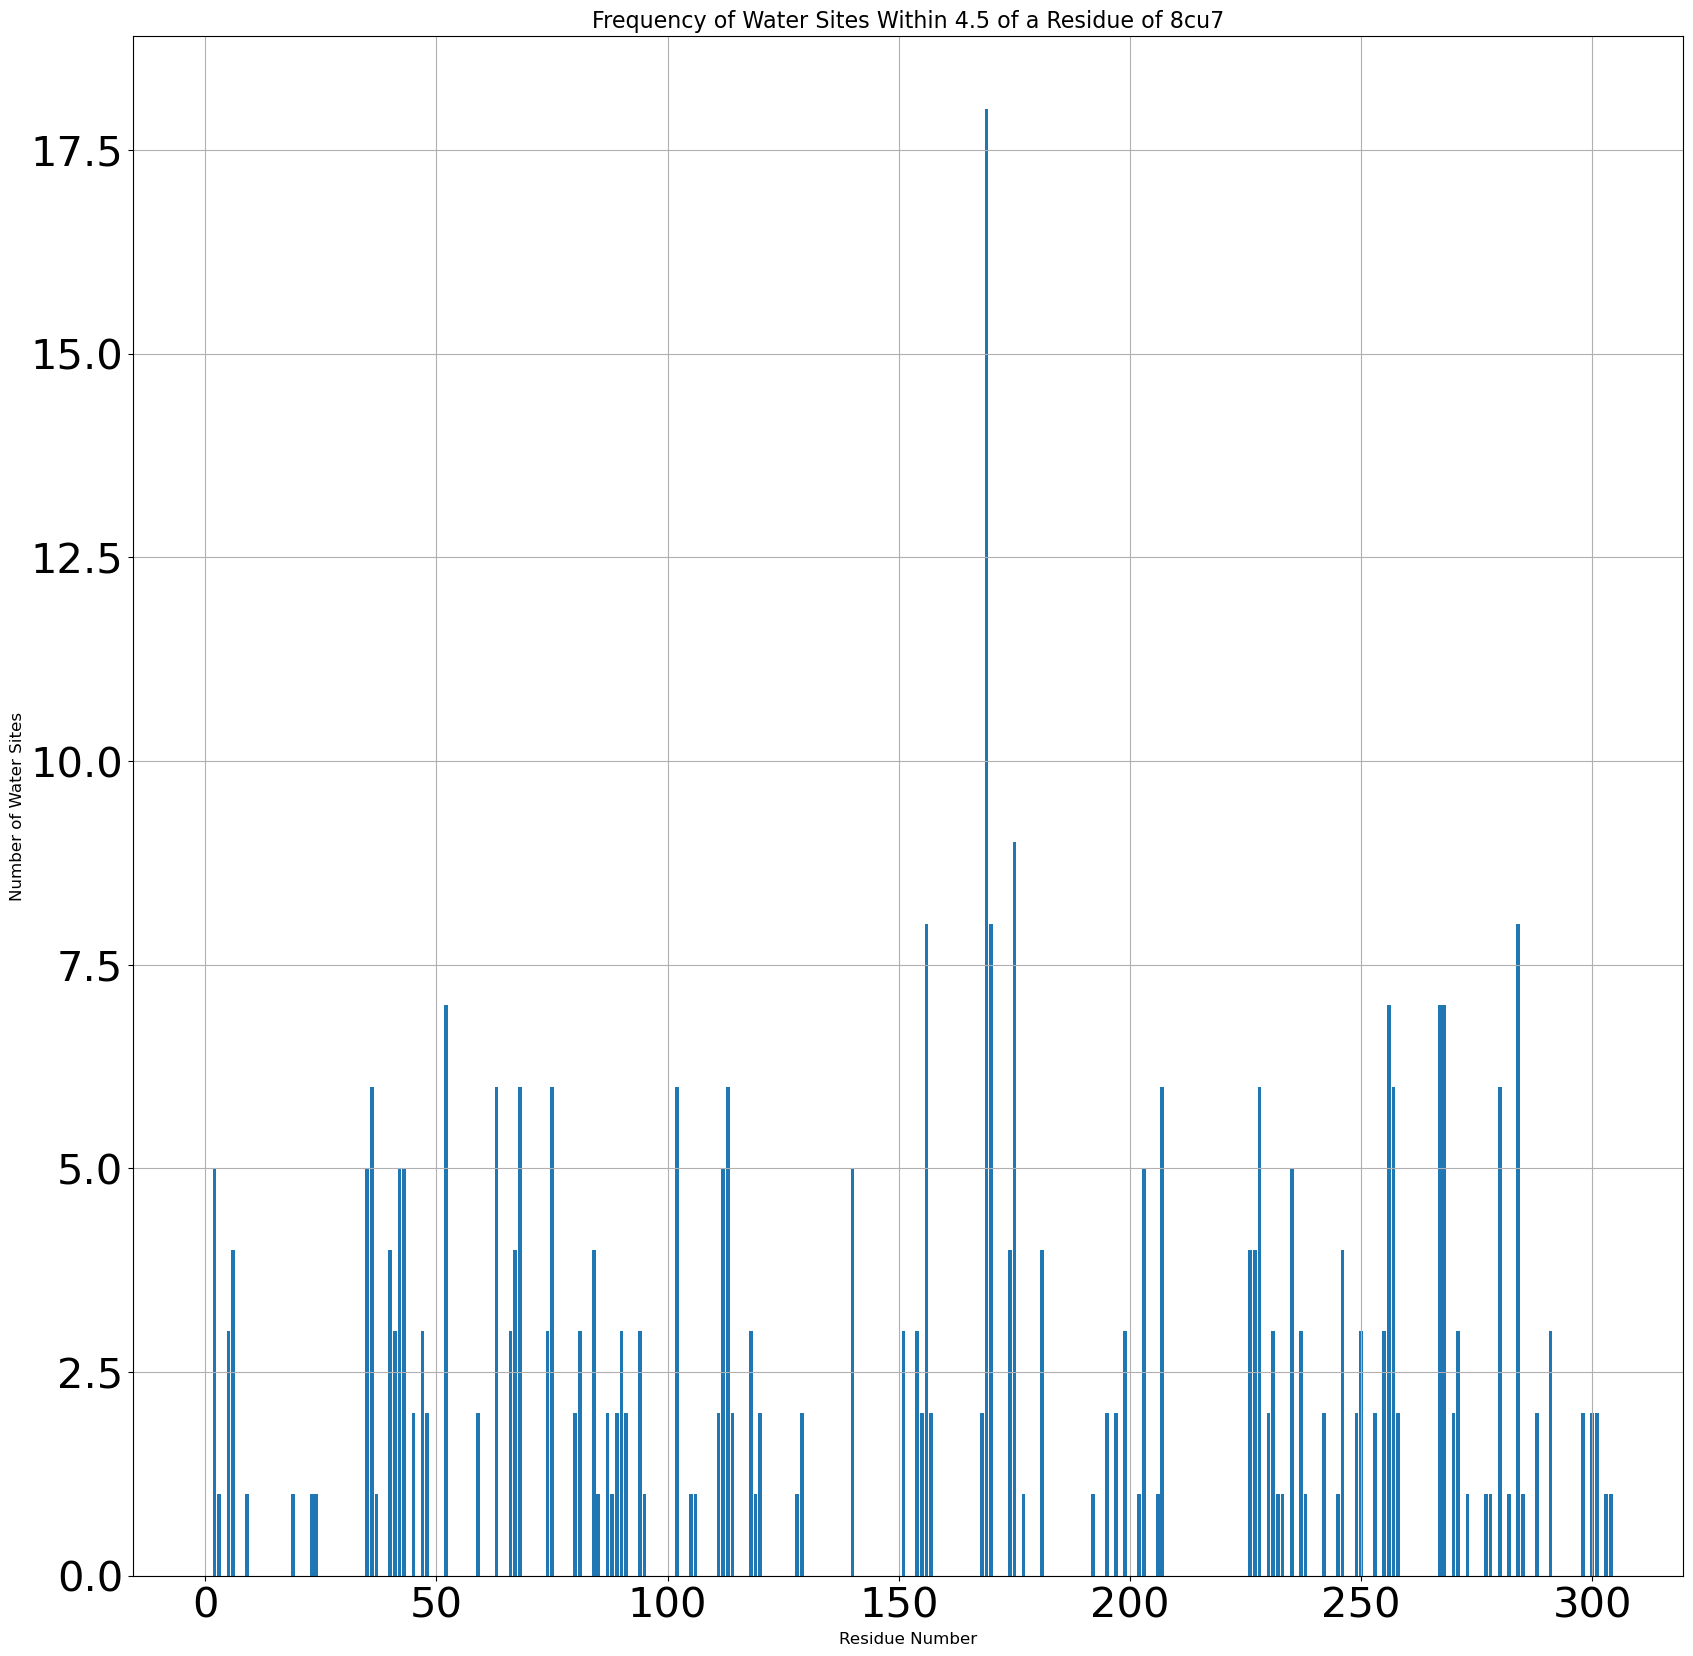

5olg  Watersite Resid : [0, 0, 1, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 8, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 2, 3, 0, 1, 6, 1, 0, 1, 1, 2, 4, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 17, 7, 0, 0, 0, 5, 4, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 4, 0, 0, 2, 2, 0, 0, 2, 0, 1, 6, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 5, 0, 1, 0, 6, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



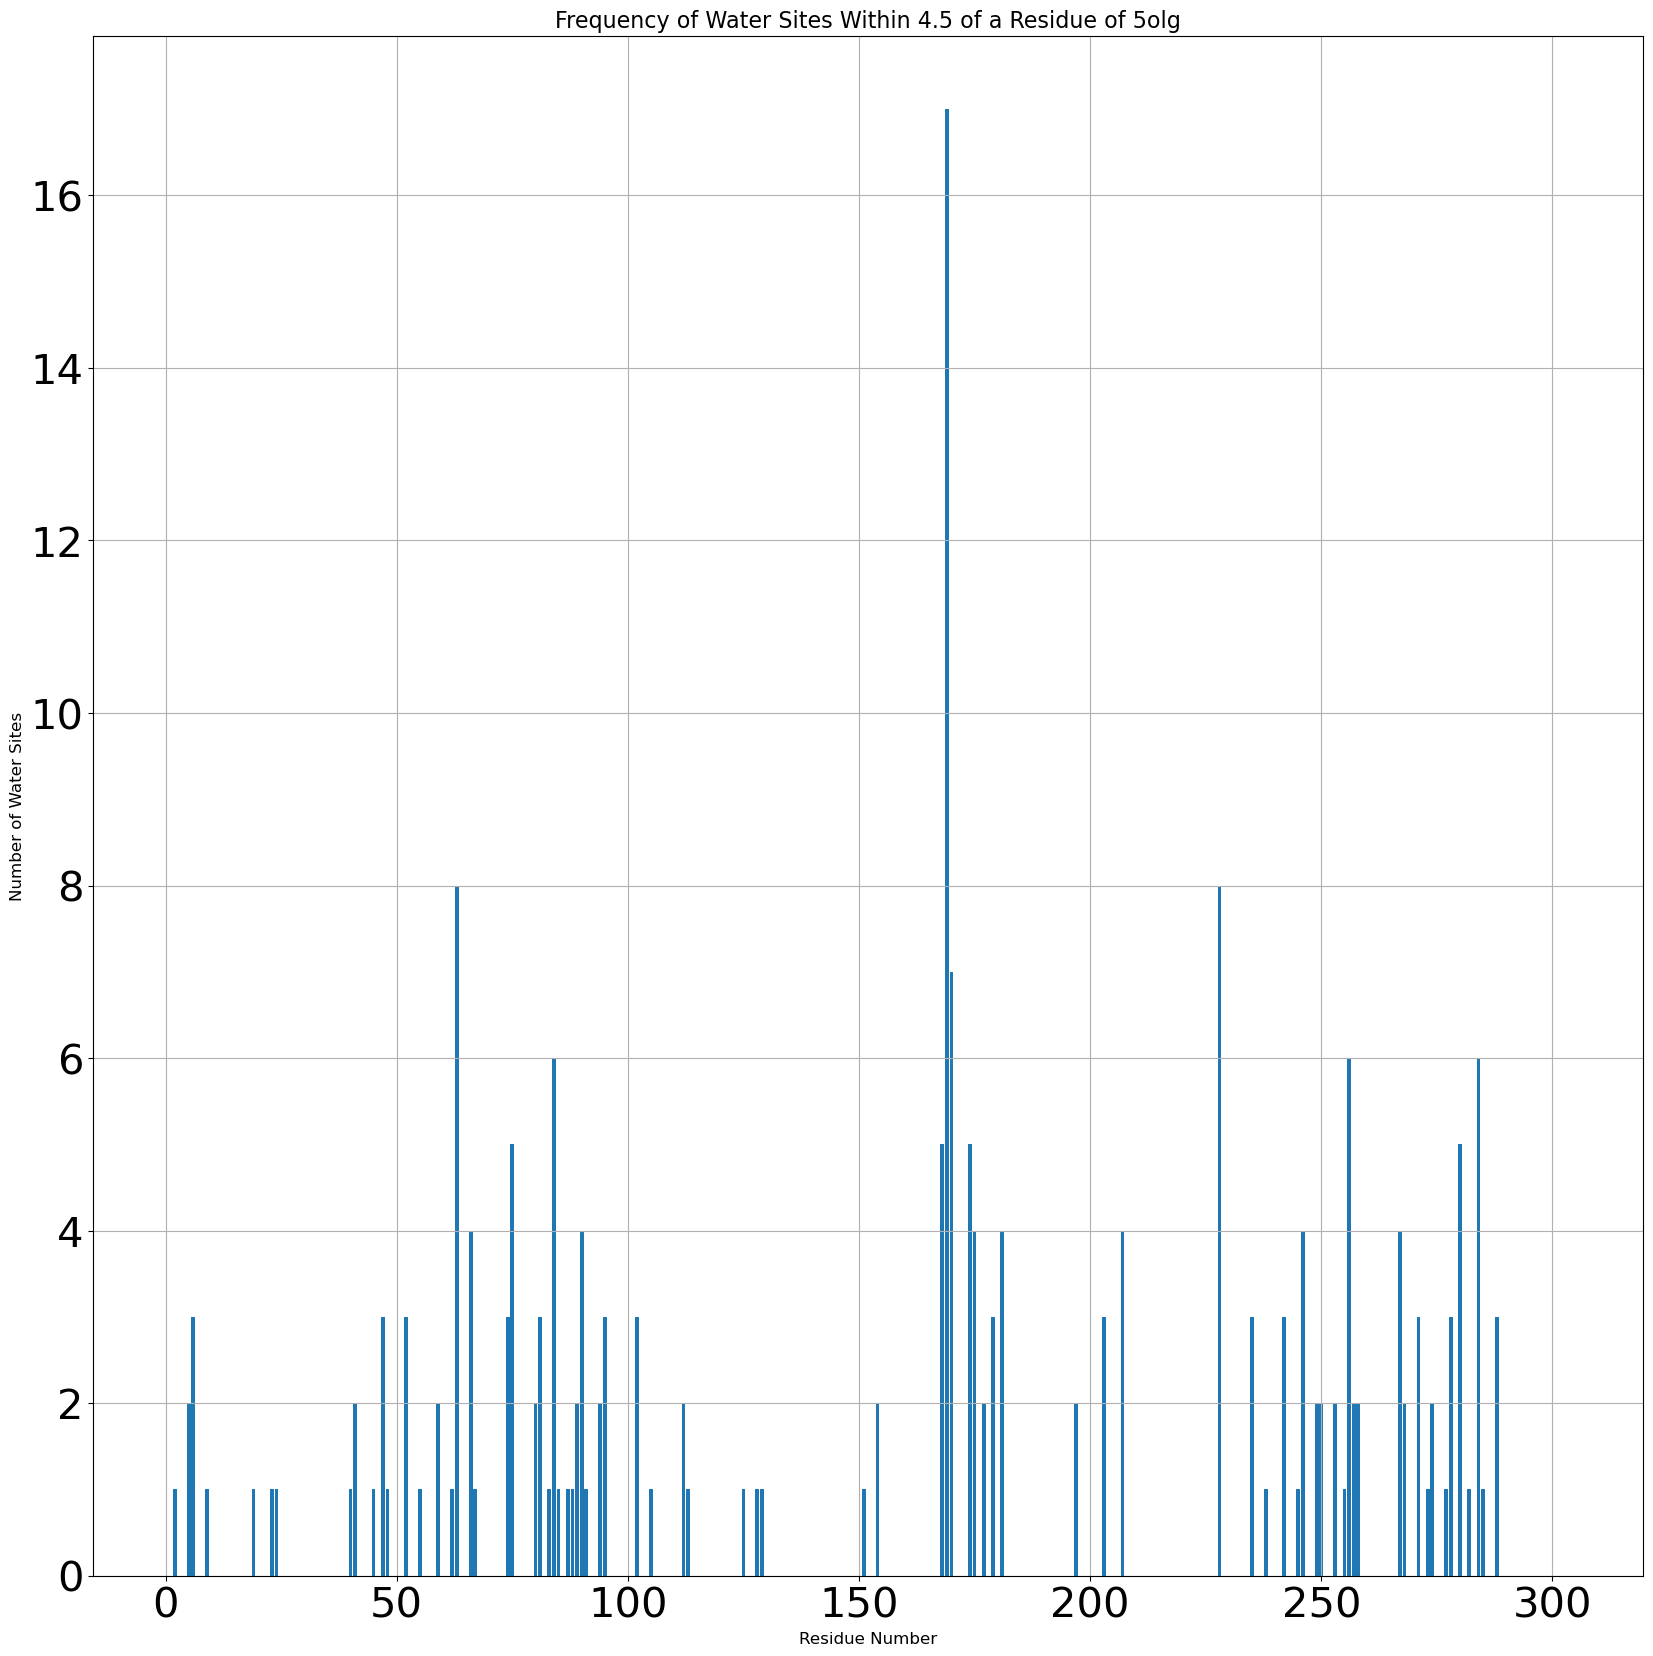

5olv  Watersite Resid : [0, 0, 2, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 4, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 3, 7, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 1, 1, 0, 0, 5, 1, 0, 1, 2, 2, 4, 1, 0, 2, 2, 3, 0, 1, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 17, 9, 0, 0, 0, 5, 6, 0, 1, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 2, 3, 1, 0, 1, 4, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 4, 0, 0, 2, 2, 0, 0, 7, 0, 2, 10, 11, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 7, 0, 1, 0, 9, 1, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



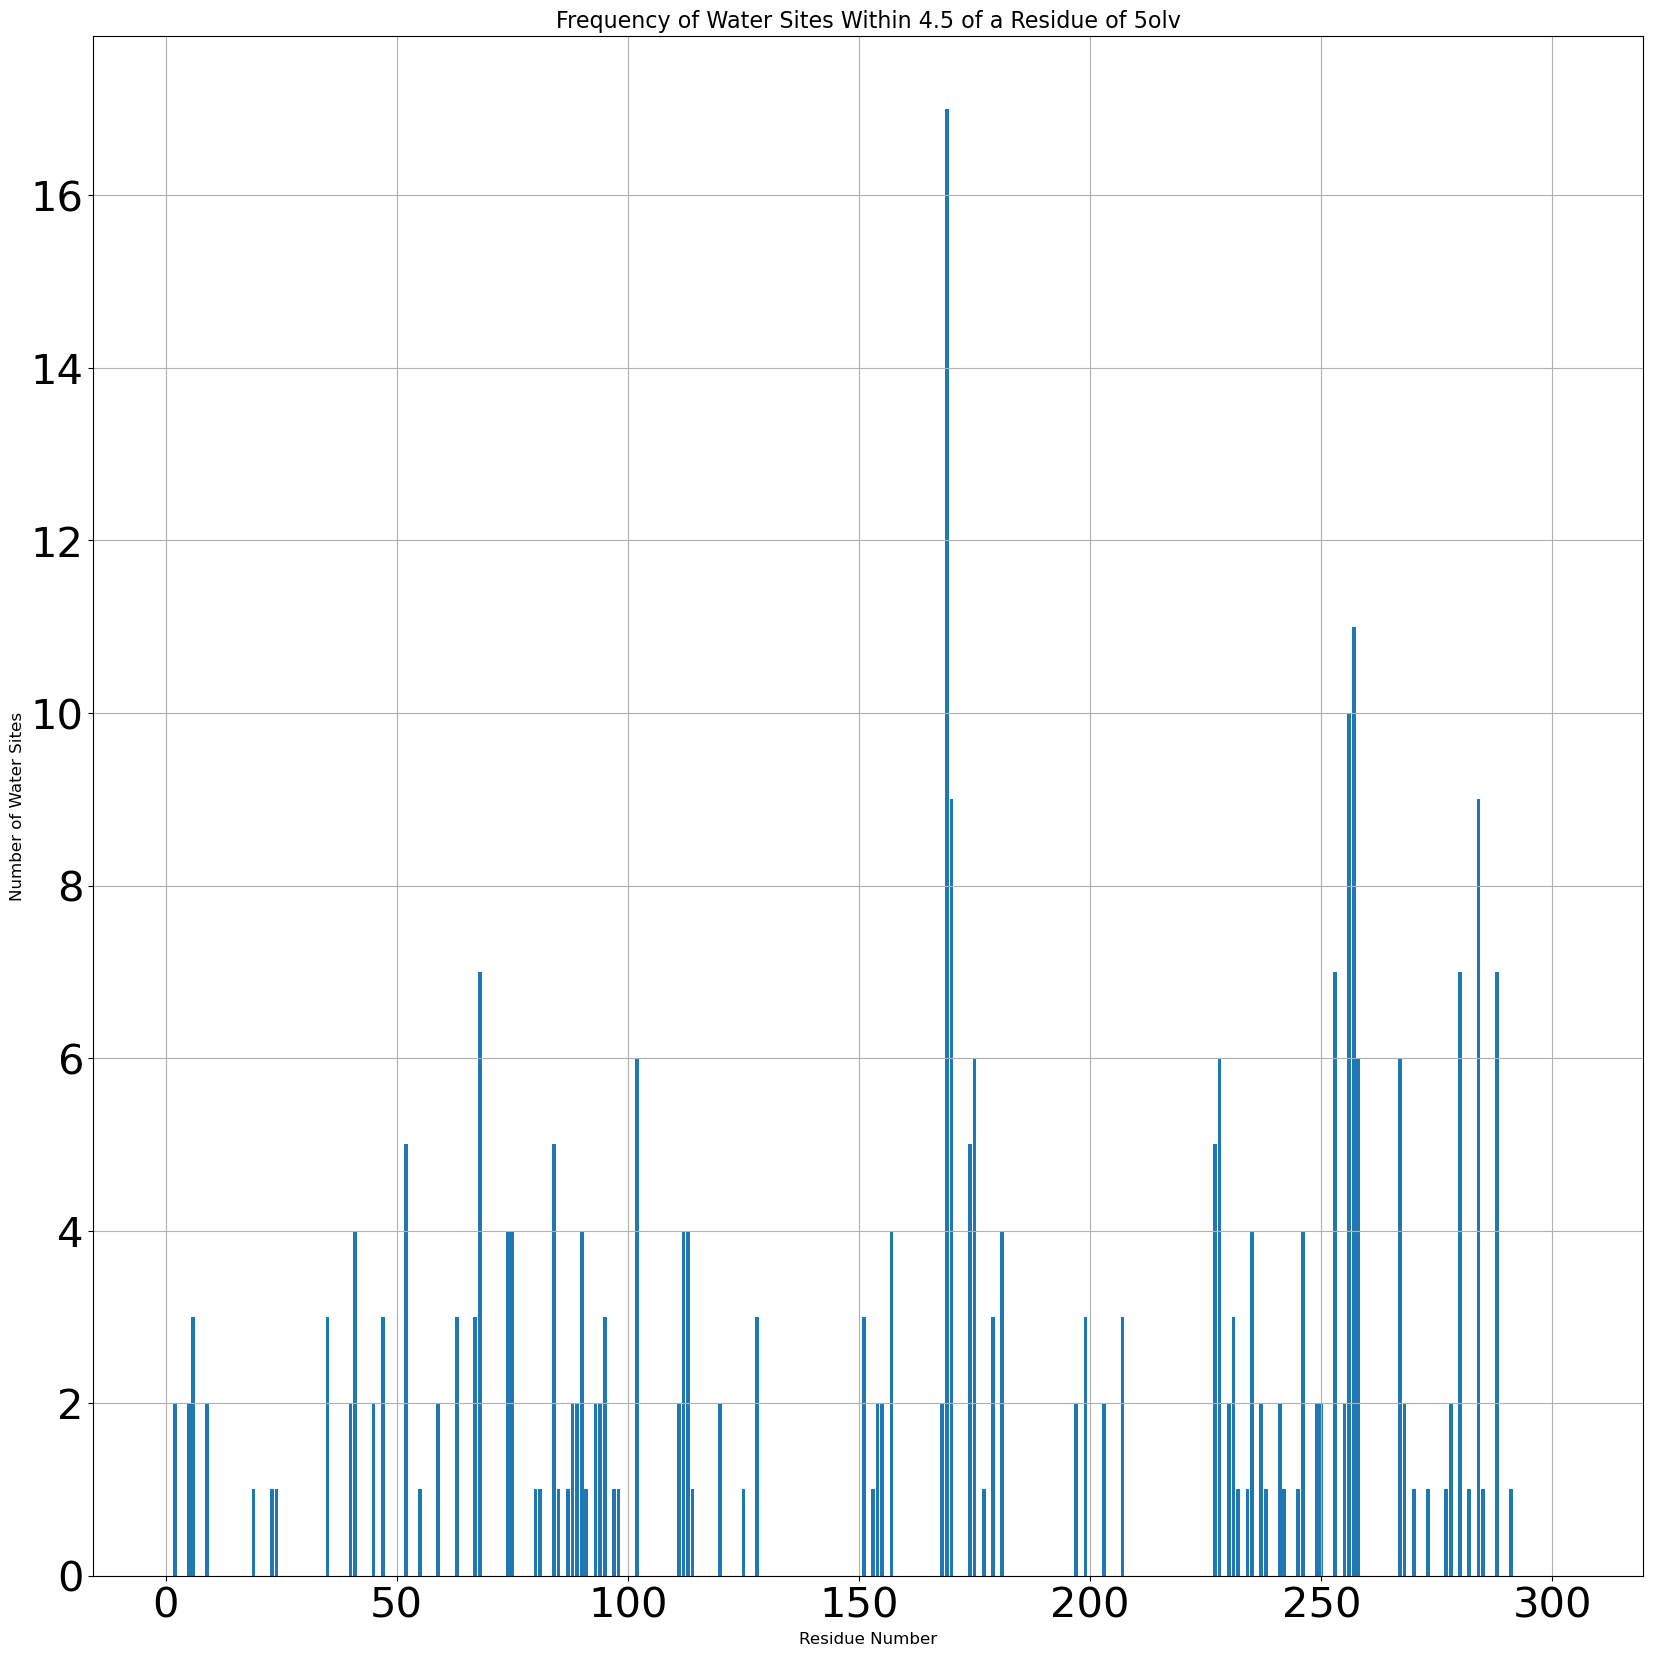

8cu6  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 4, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 2, 0, 0, 0, 4, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 4, 0, 0, 1, 0, 1, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



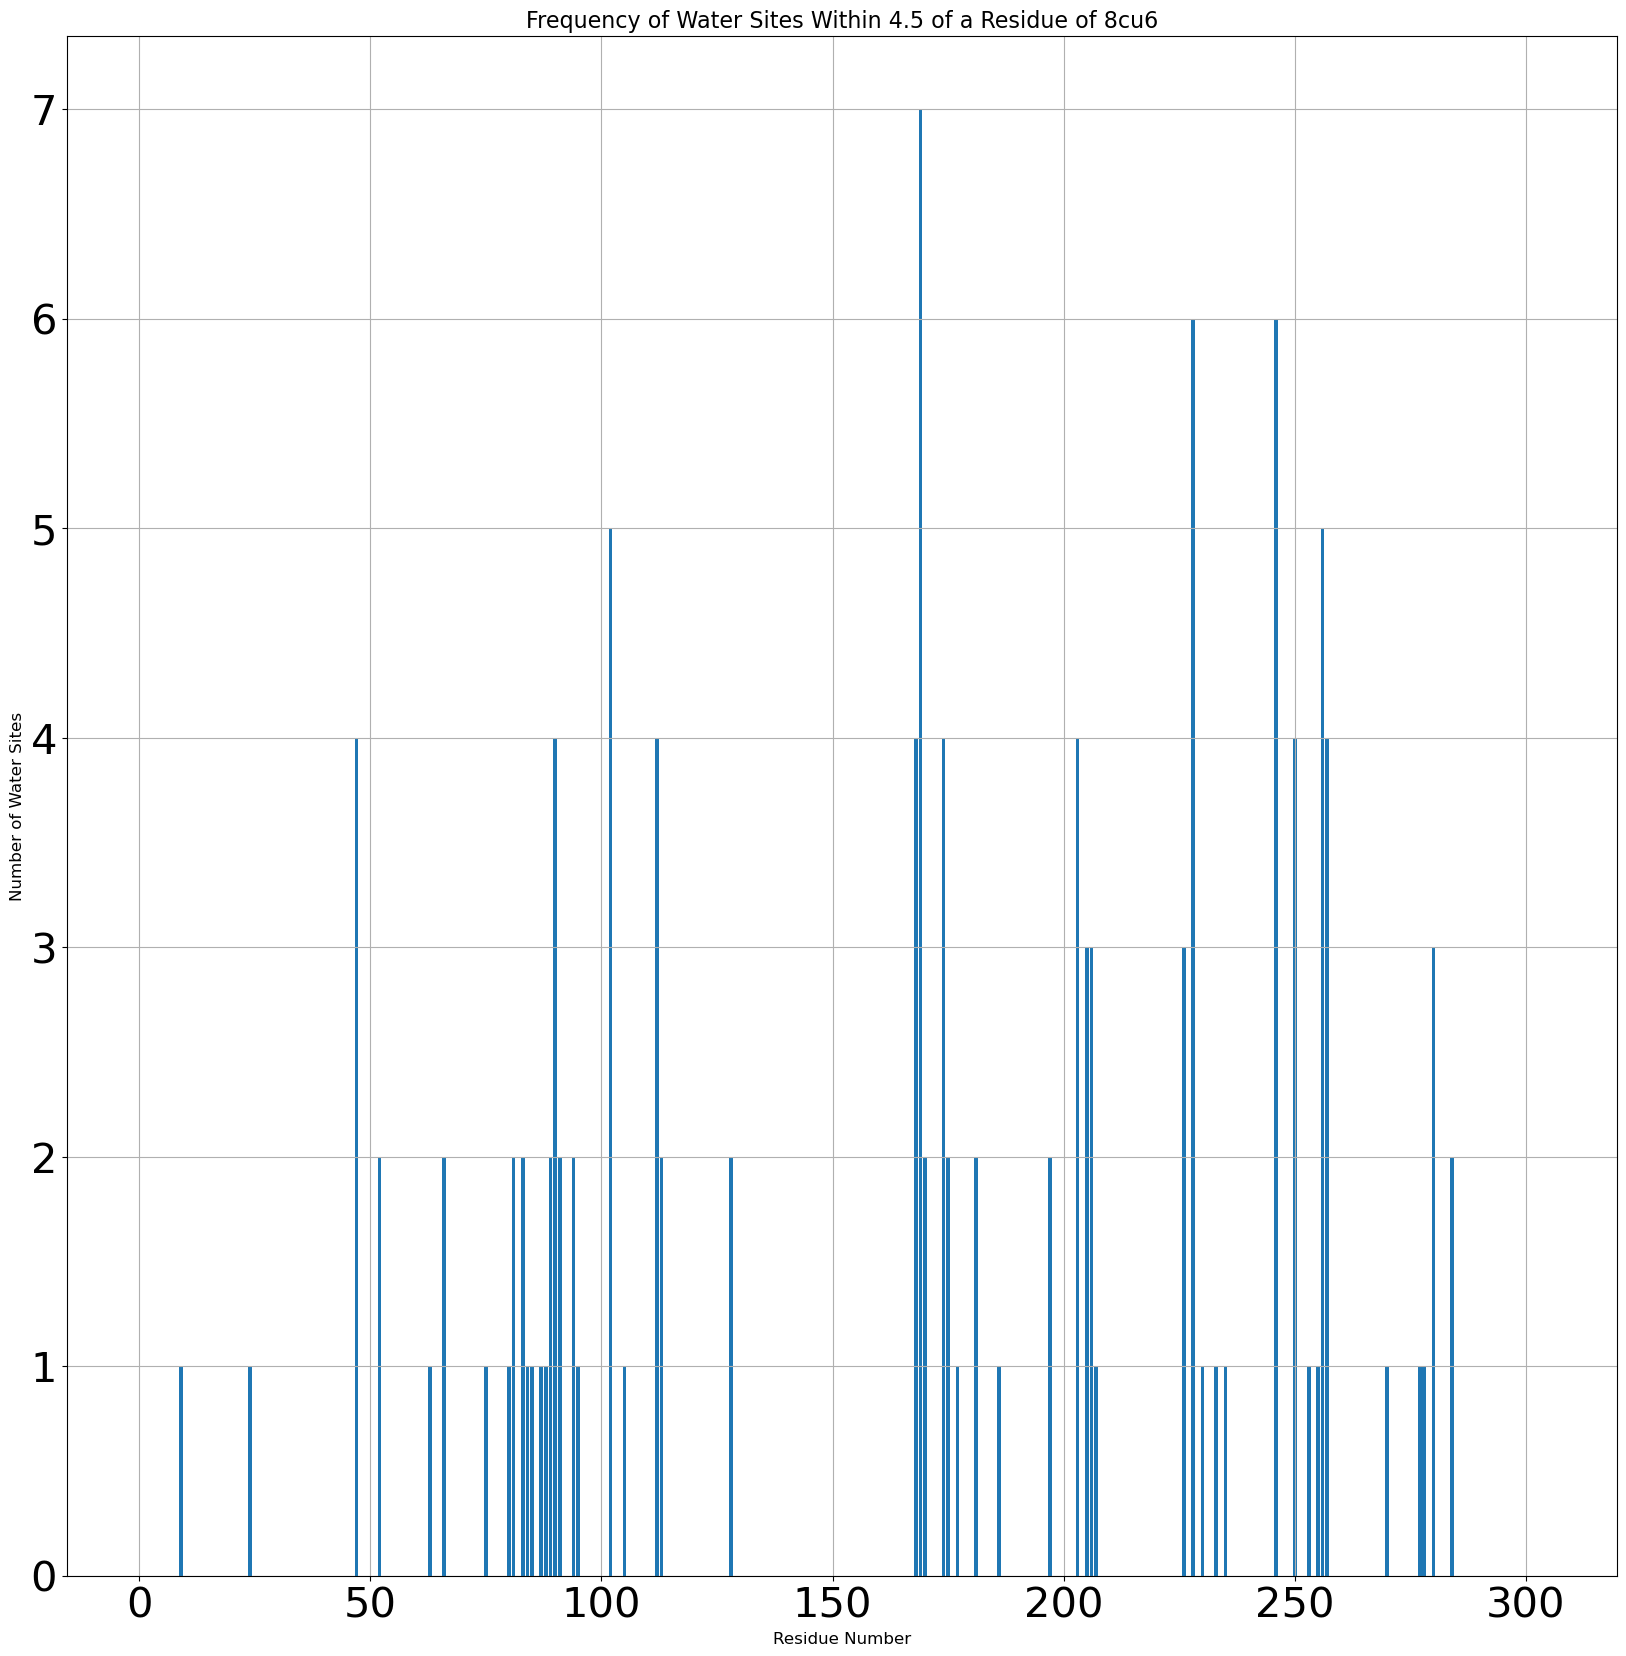

6gt3  Watersite Resid : [0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 3, 3, 4, 0, 0, 3, 0, 4, 1, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 8, 4, 4, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 6, 0, 0, 1, 2, 0, 0, 0, 0, 0, 9, 5, 0, 4, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 11, 6, 0, 0, 0, 14, 5, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 3, 0, 0, 1, 2, 0, 7, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 2, 4, 7, 0, 5, 2, 1, 0, 1, 6, 0, 0, 4, 0, 0, 0, 1, 0, 4, 1, 3, 0, 0, 2, 3, 0, 0, 2, 0, 2, 10, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2, 0, 3, 6, 0, 1, 2, 0, 0, 1, 2, 0, 6, 0, 1, 0, 8, 1, 0, 0, 6, 0, 0, 5, 0, 6, 2, 0, 3, 1, 1, 0, 4, 3, 0, 0, 0]



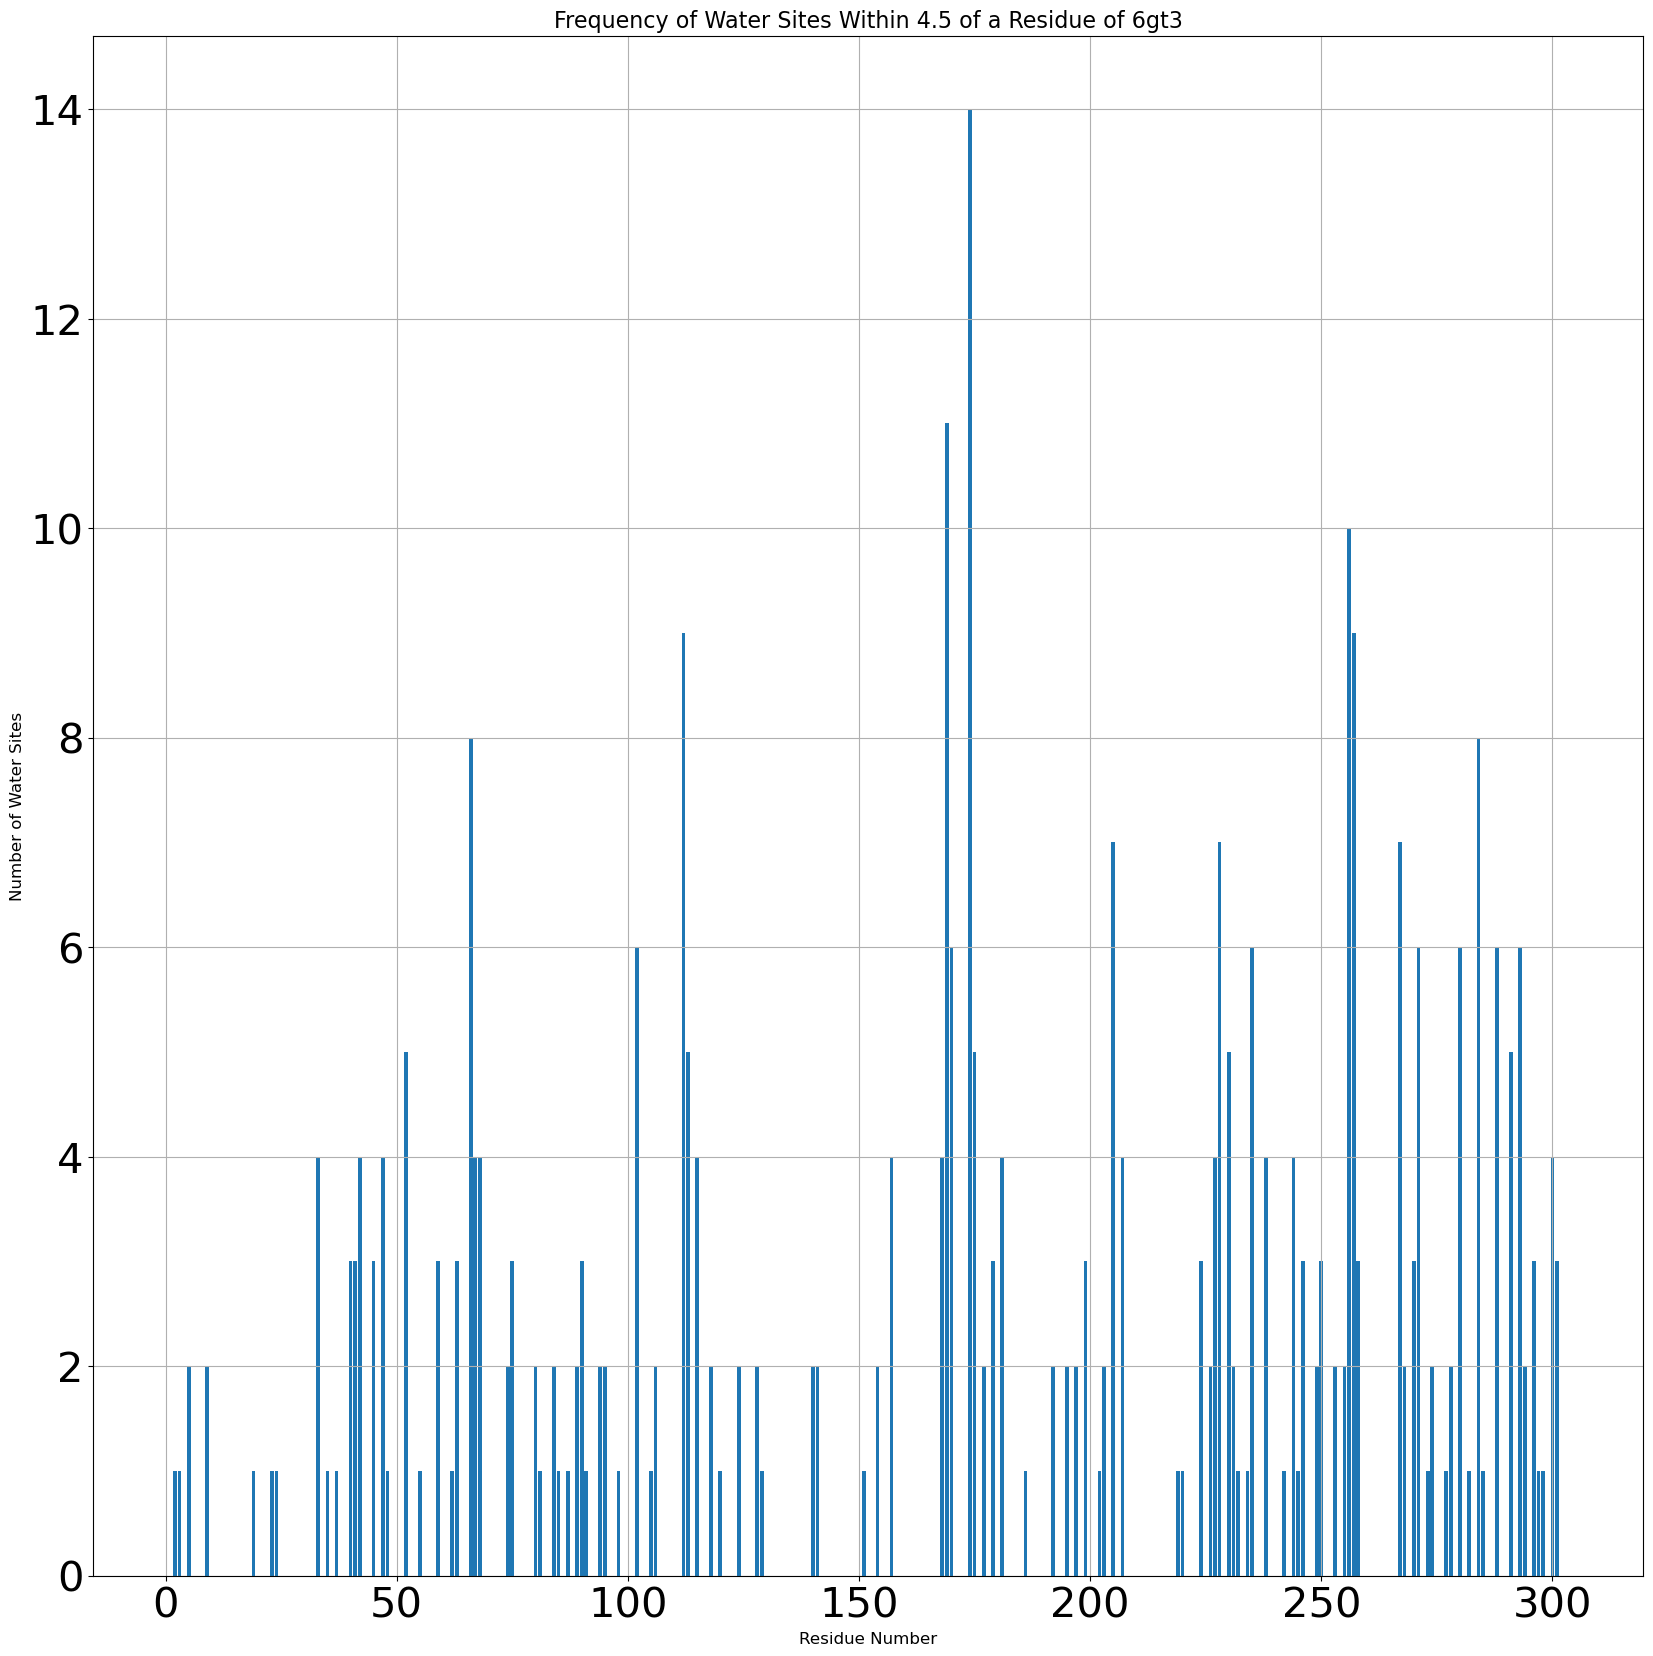

5k2d  Watersite Resid : [0, 0, 2, 2, 0, 2, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 3, 2, 1, 0, 0, 1, 0, 4, 1, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 5, 6, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 2, 0, 1, 7, 1, 0, 1, 6, 1, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 10, 0, 0, 1, 1, 6, 0, 0, 0, 2, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 12, 7, 0, 0, 0, 6, 6, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 2, 3, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 6, 0, 1, 2, 2, 0, 0, 3, 0, 2, 9, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 7, 0, 1, 2, 0, 0, 2, 4, 0, 6, 0, 1, 0, 6, 1, 0, 0, 3, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1]



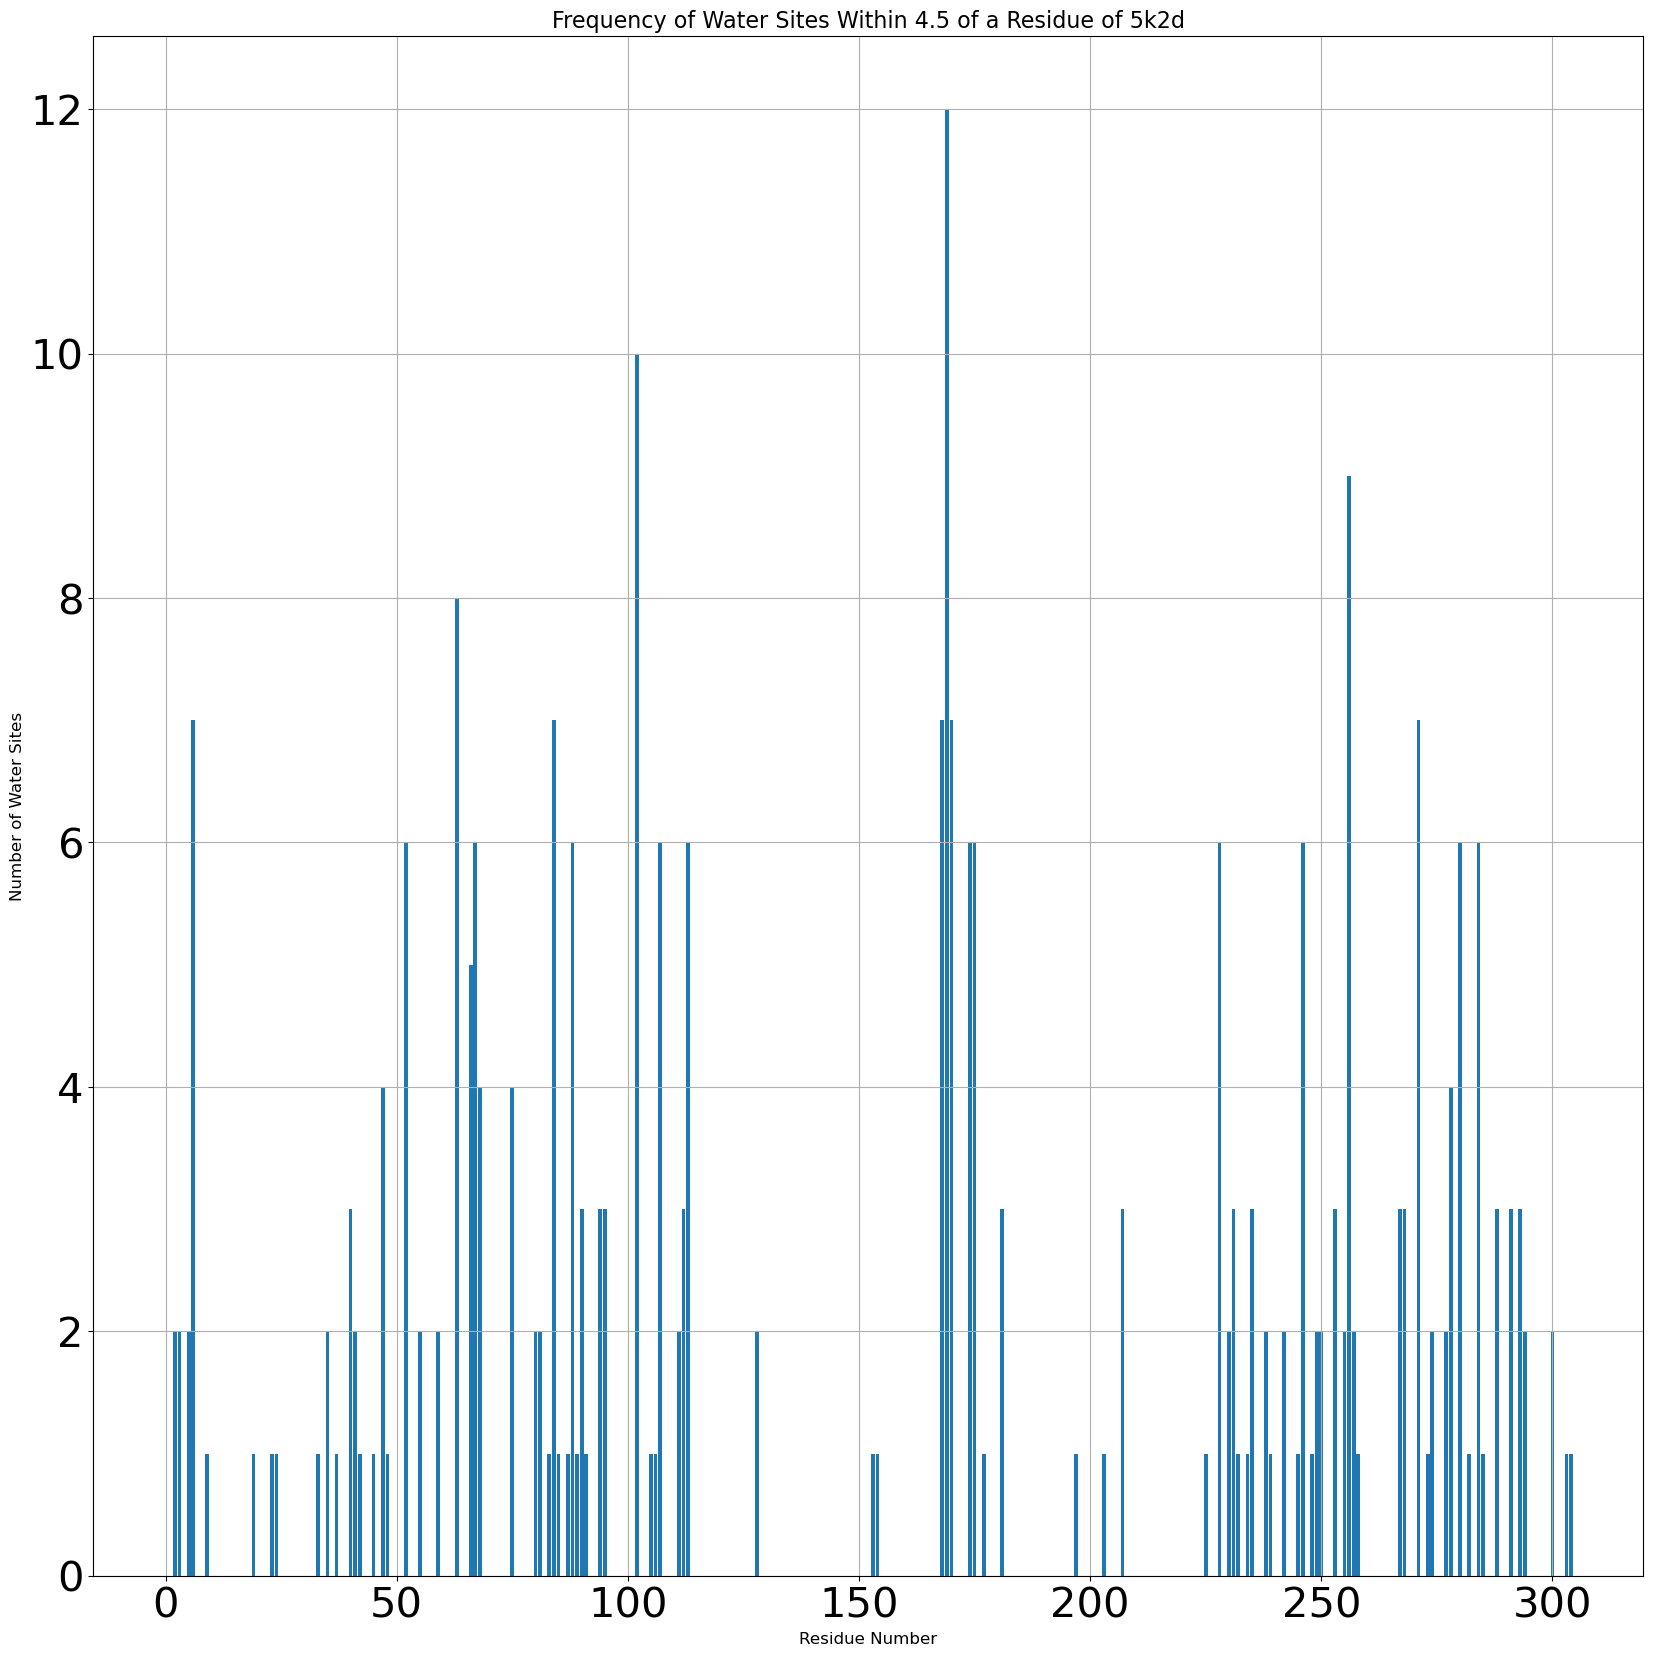

3vga  Watersite Resid : [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



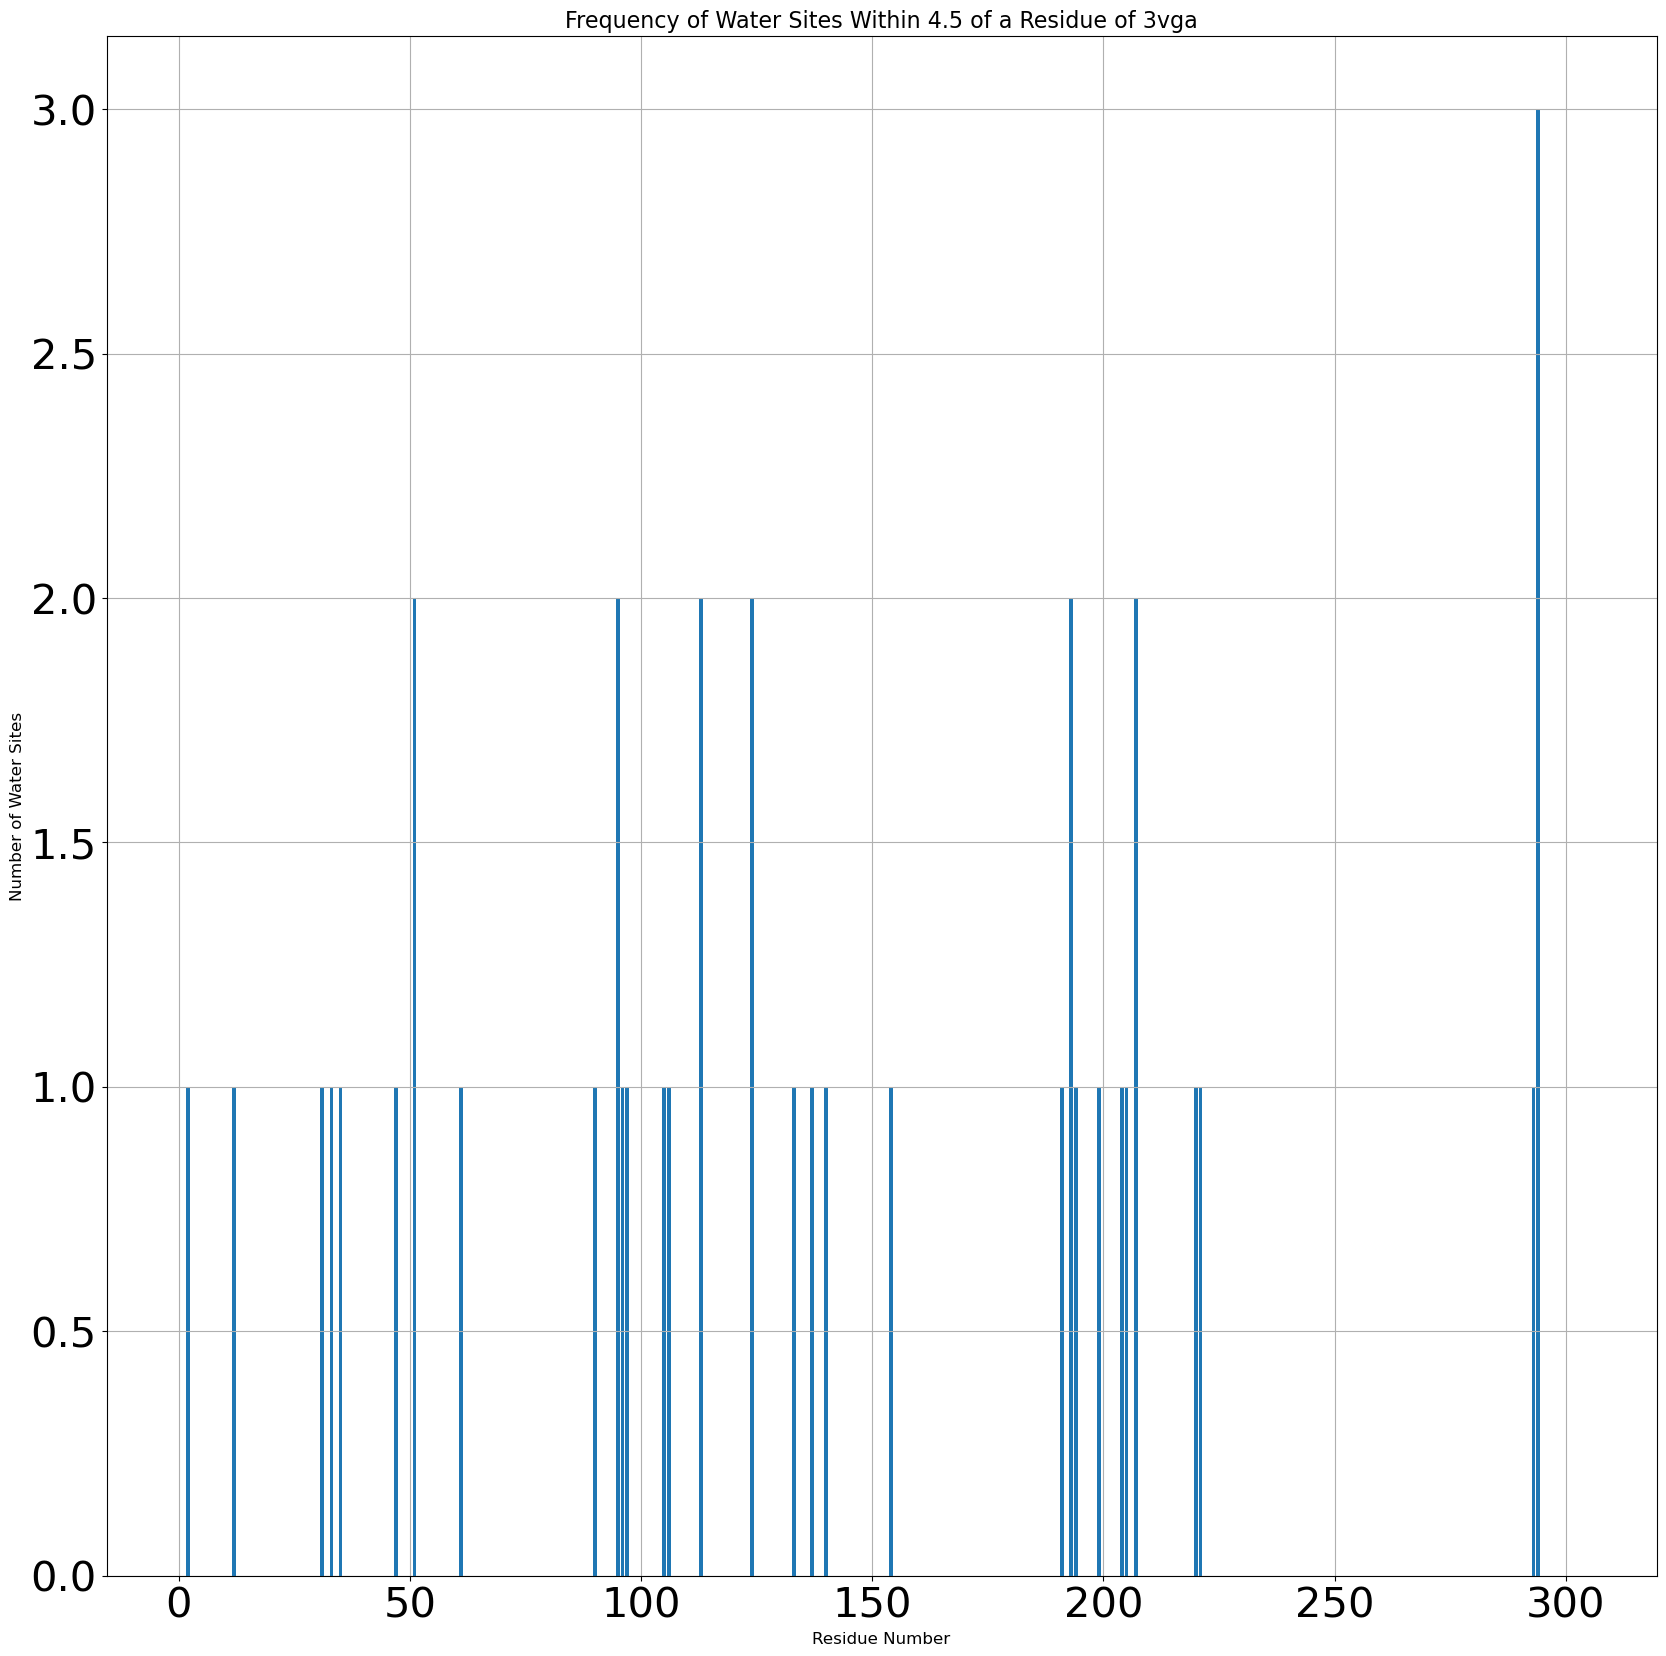

2ydo  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 4, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]



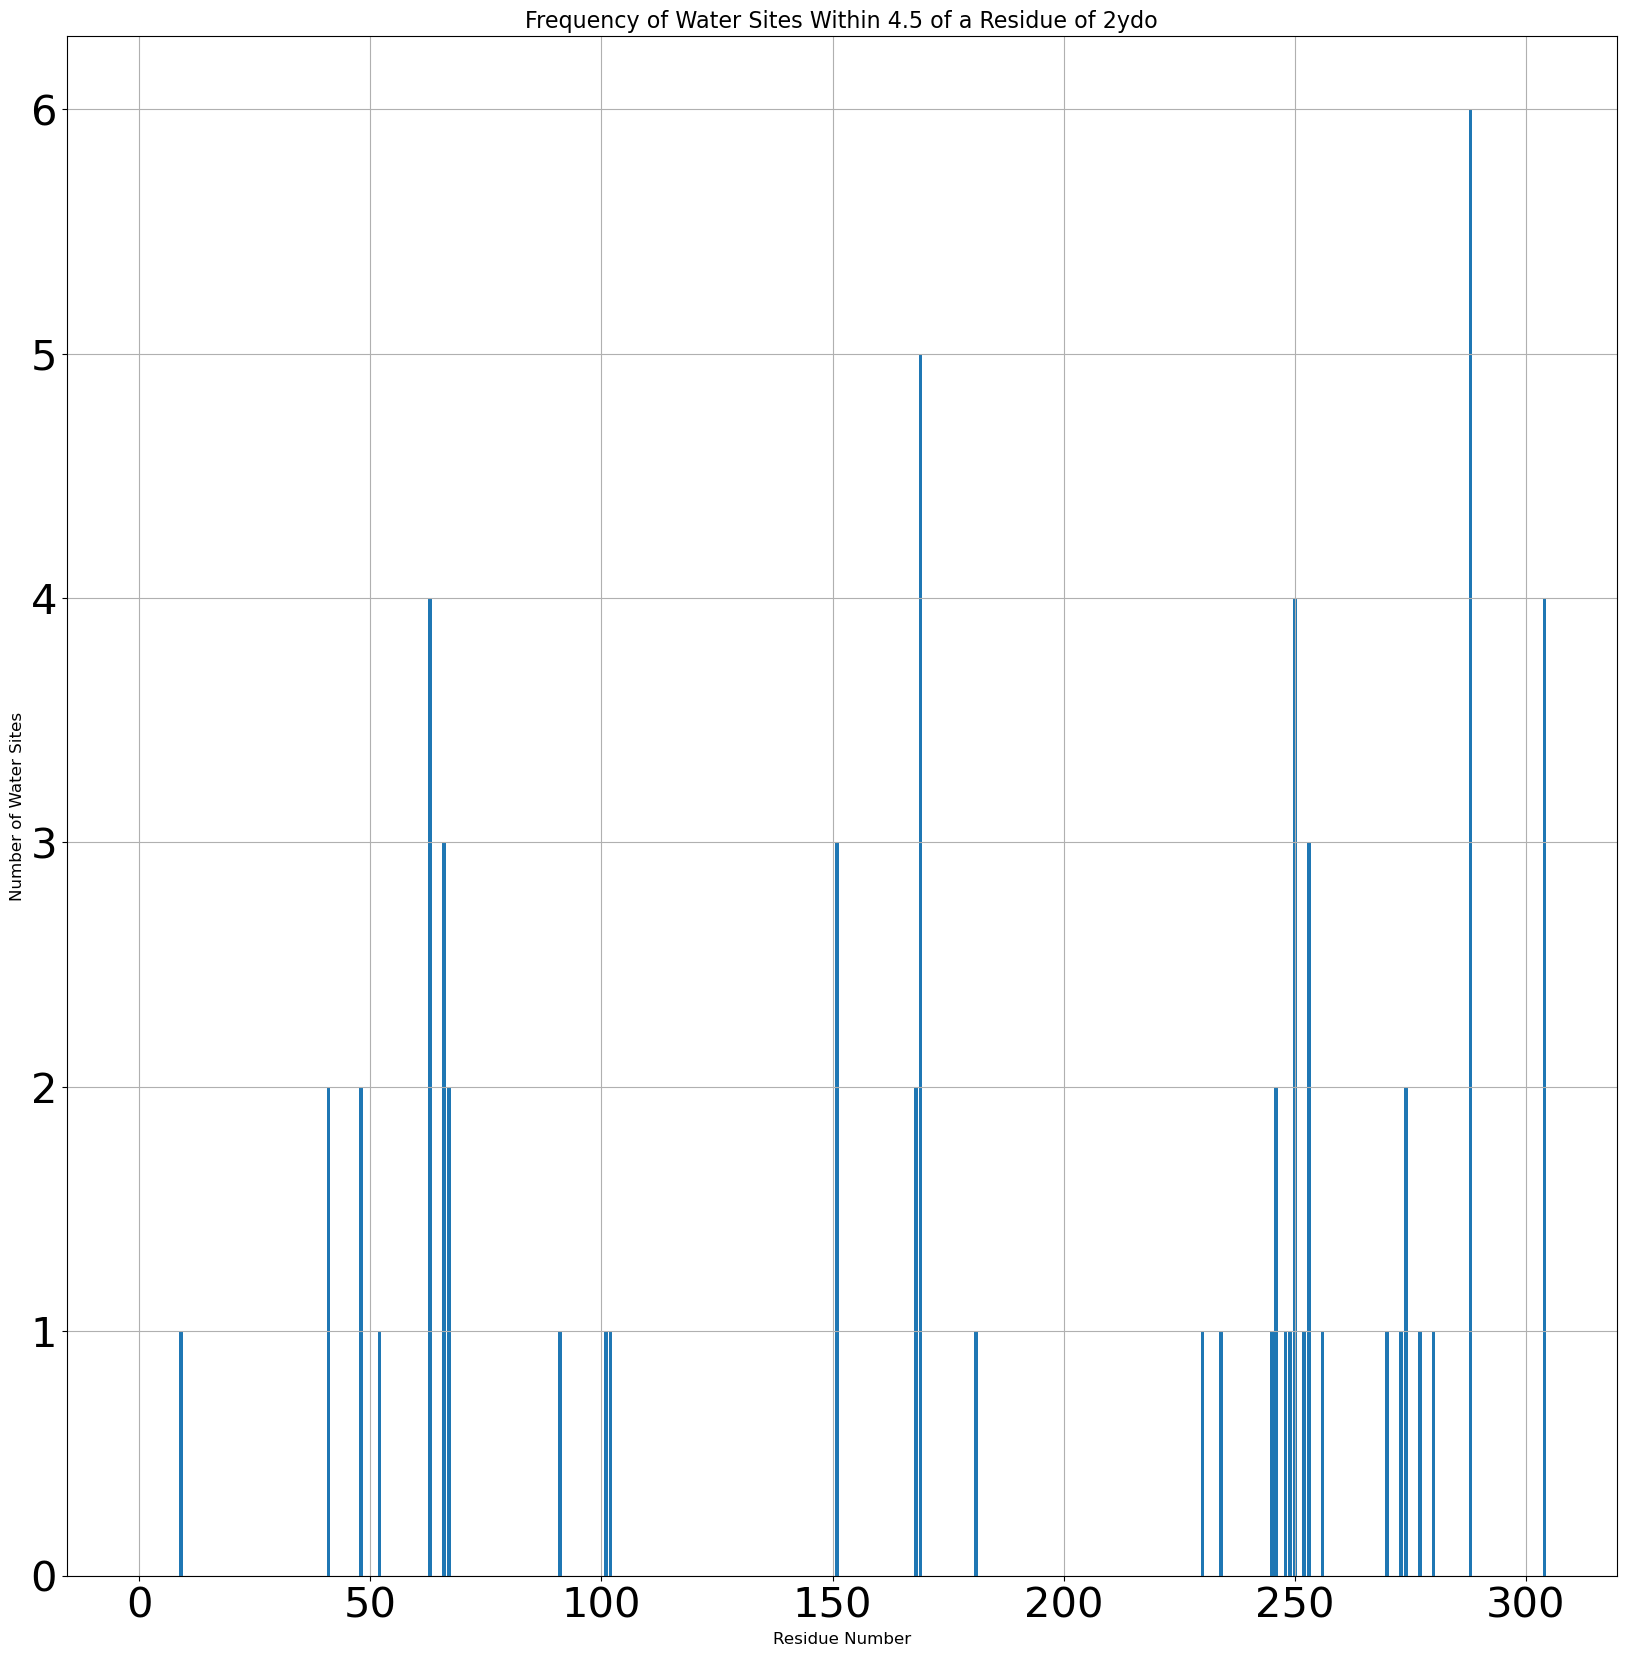

5nm4  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 1, 1, 3, 5, 0, 0, 0, 0, 2, 3, 0, 1, 6, 1, 0, 0, 1, 2, 5, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 5, 9, 5, 0, 1, 1, 4, 3, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]



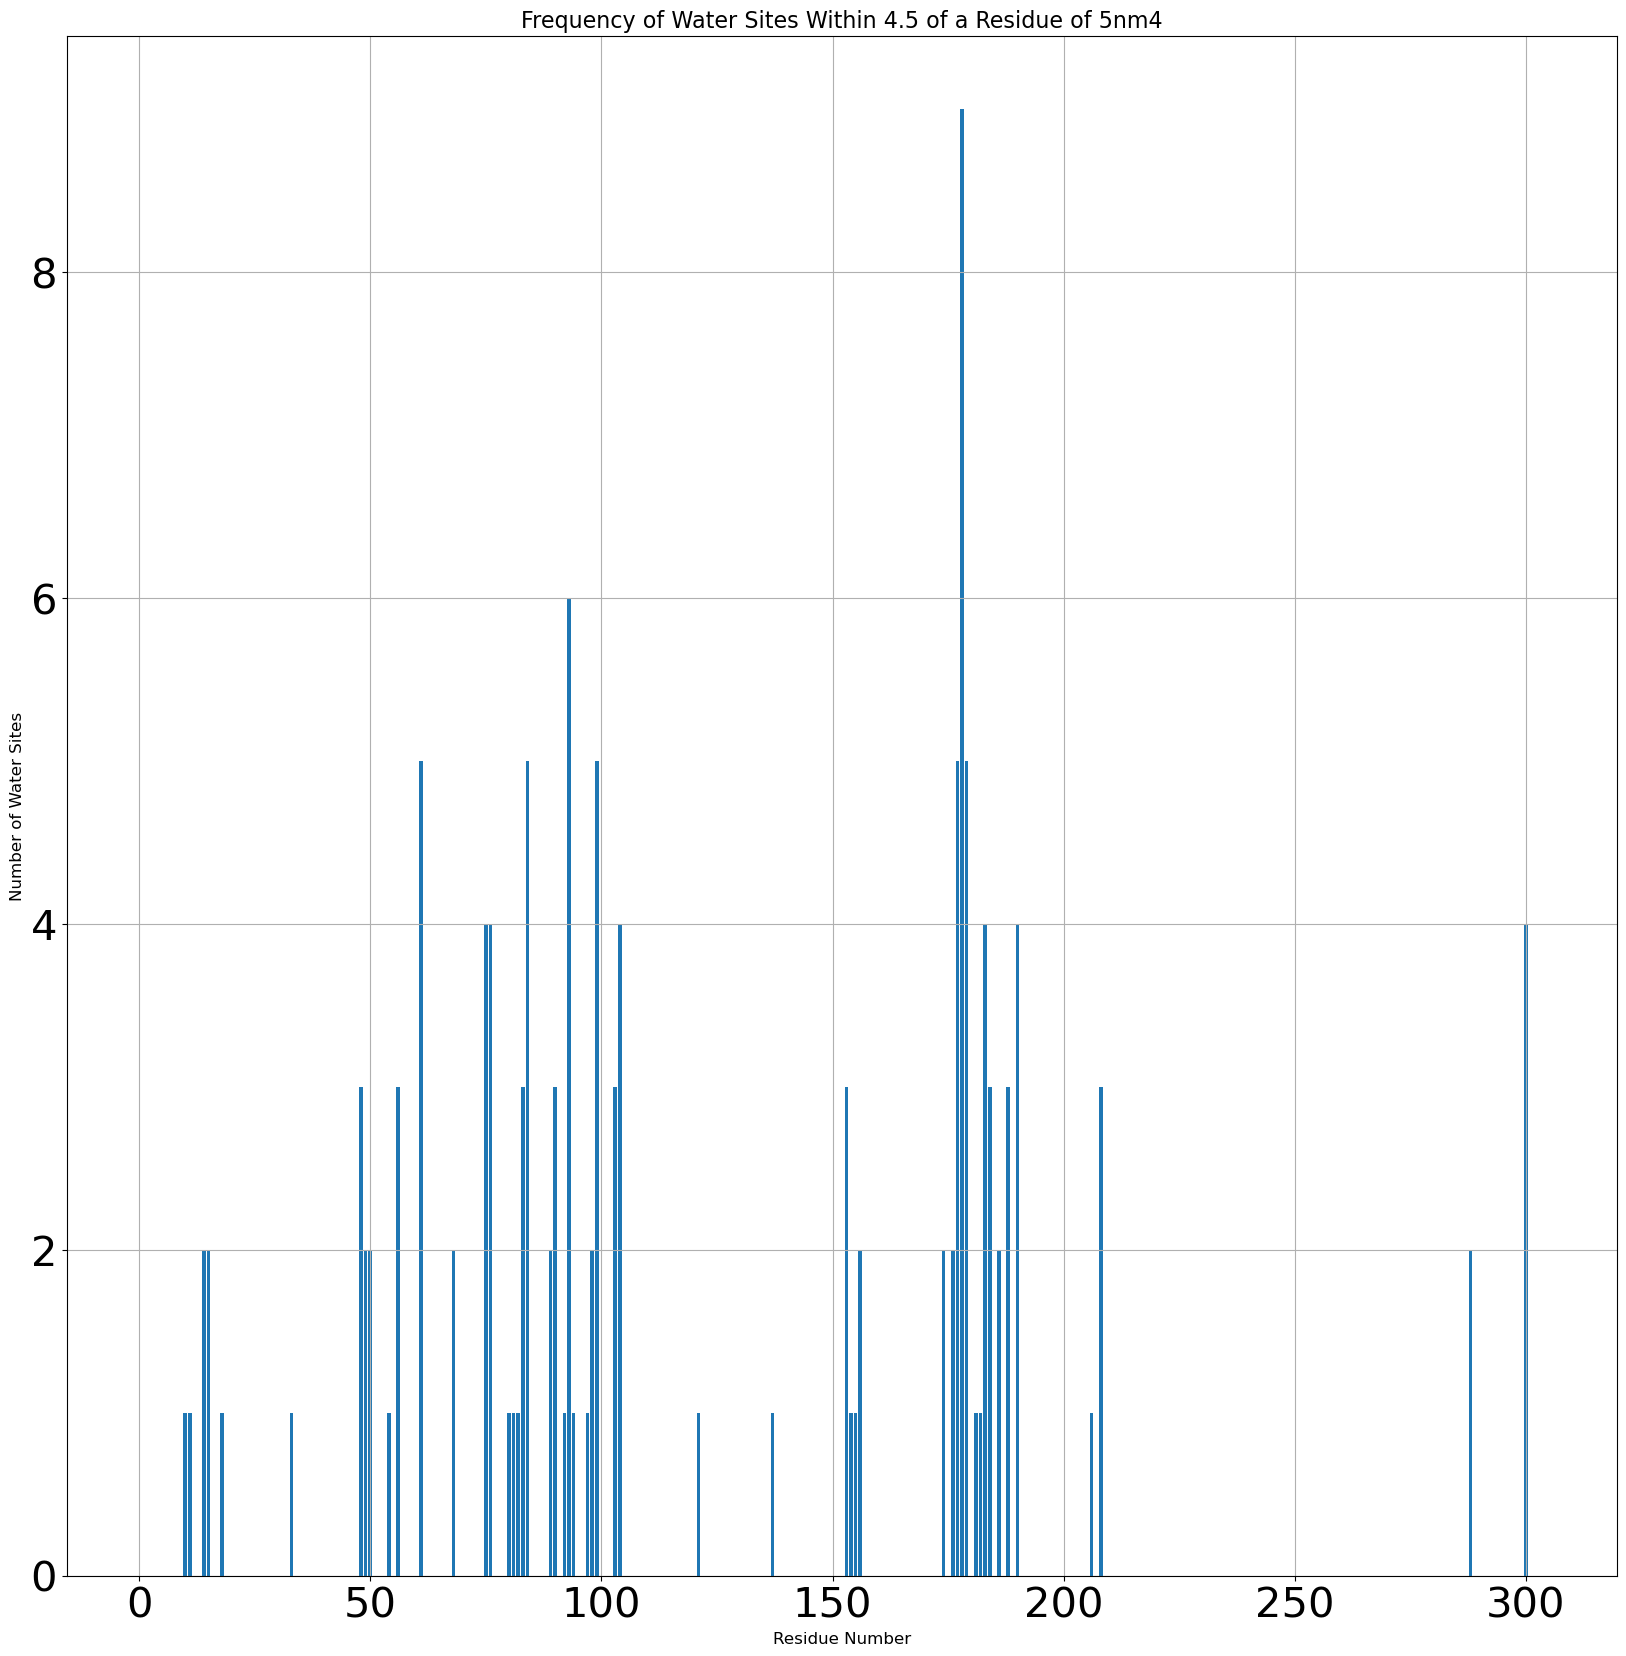

5g53  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



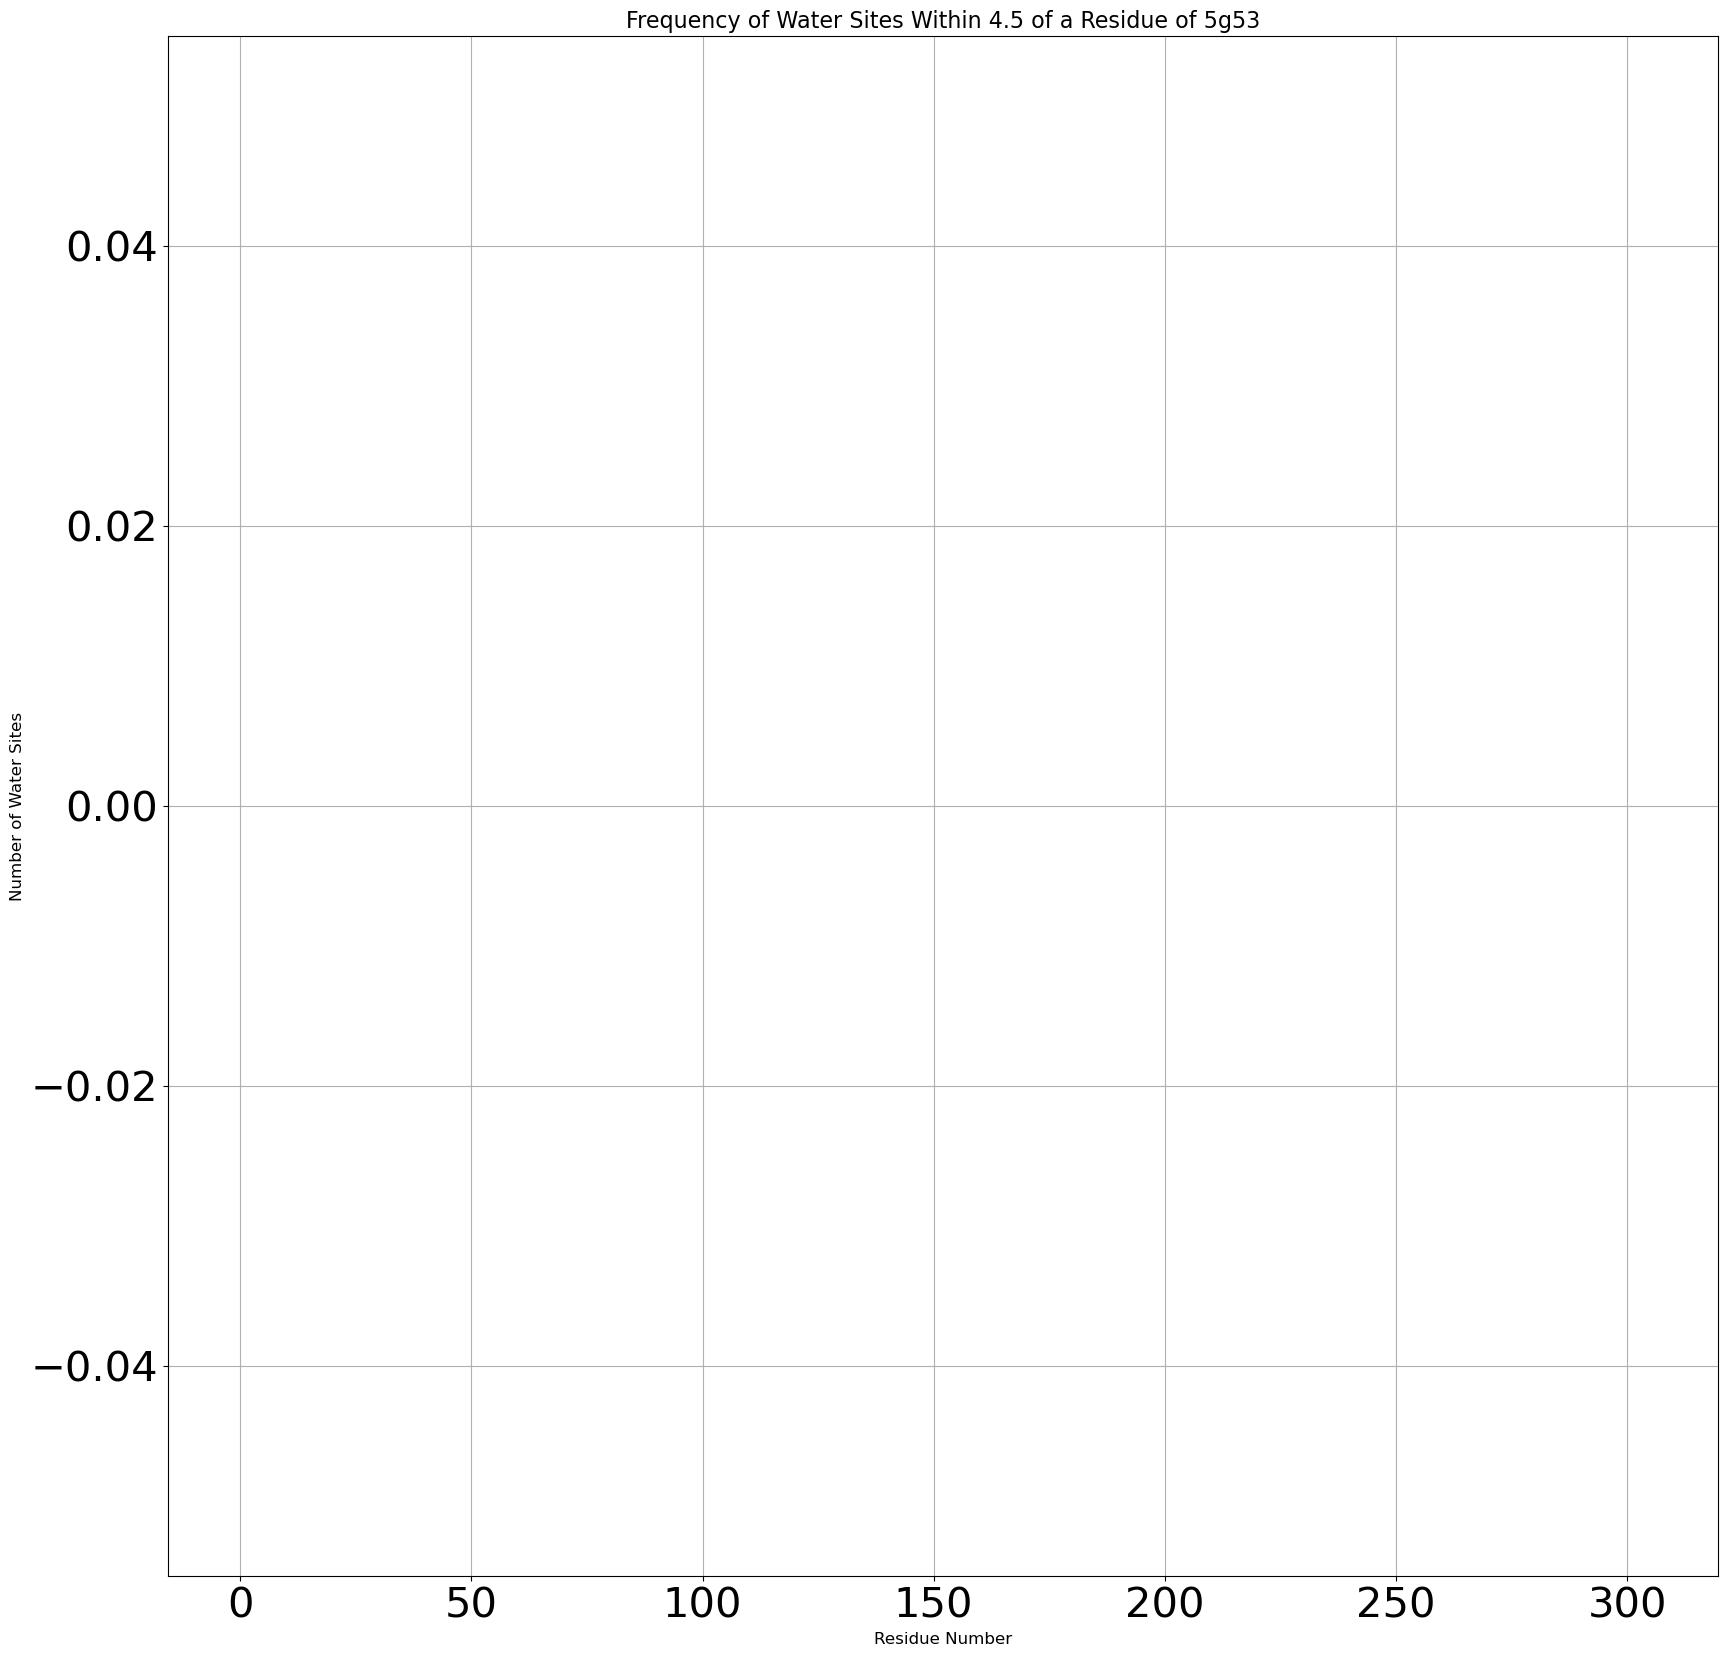

5vra  Watersite Resid : [0, 0, 2, 0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 4, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 9, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 4, 2, 0, 0, 5, 1, 0, 1, 4, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 11, 0, 0, 1, 2, 6, 0, 0, 0, 1, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 5, 6, 0, 0, 0, 7, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 4, 6, 0, 3, 3, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 5, 0, 0, 3, 2, 0, 0, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 6, 0, 1, 2, 0, 0, 2, 5, 0, 7, 0, 2, 0, 9, 0, 4, 0, 3, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1]



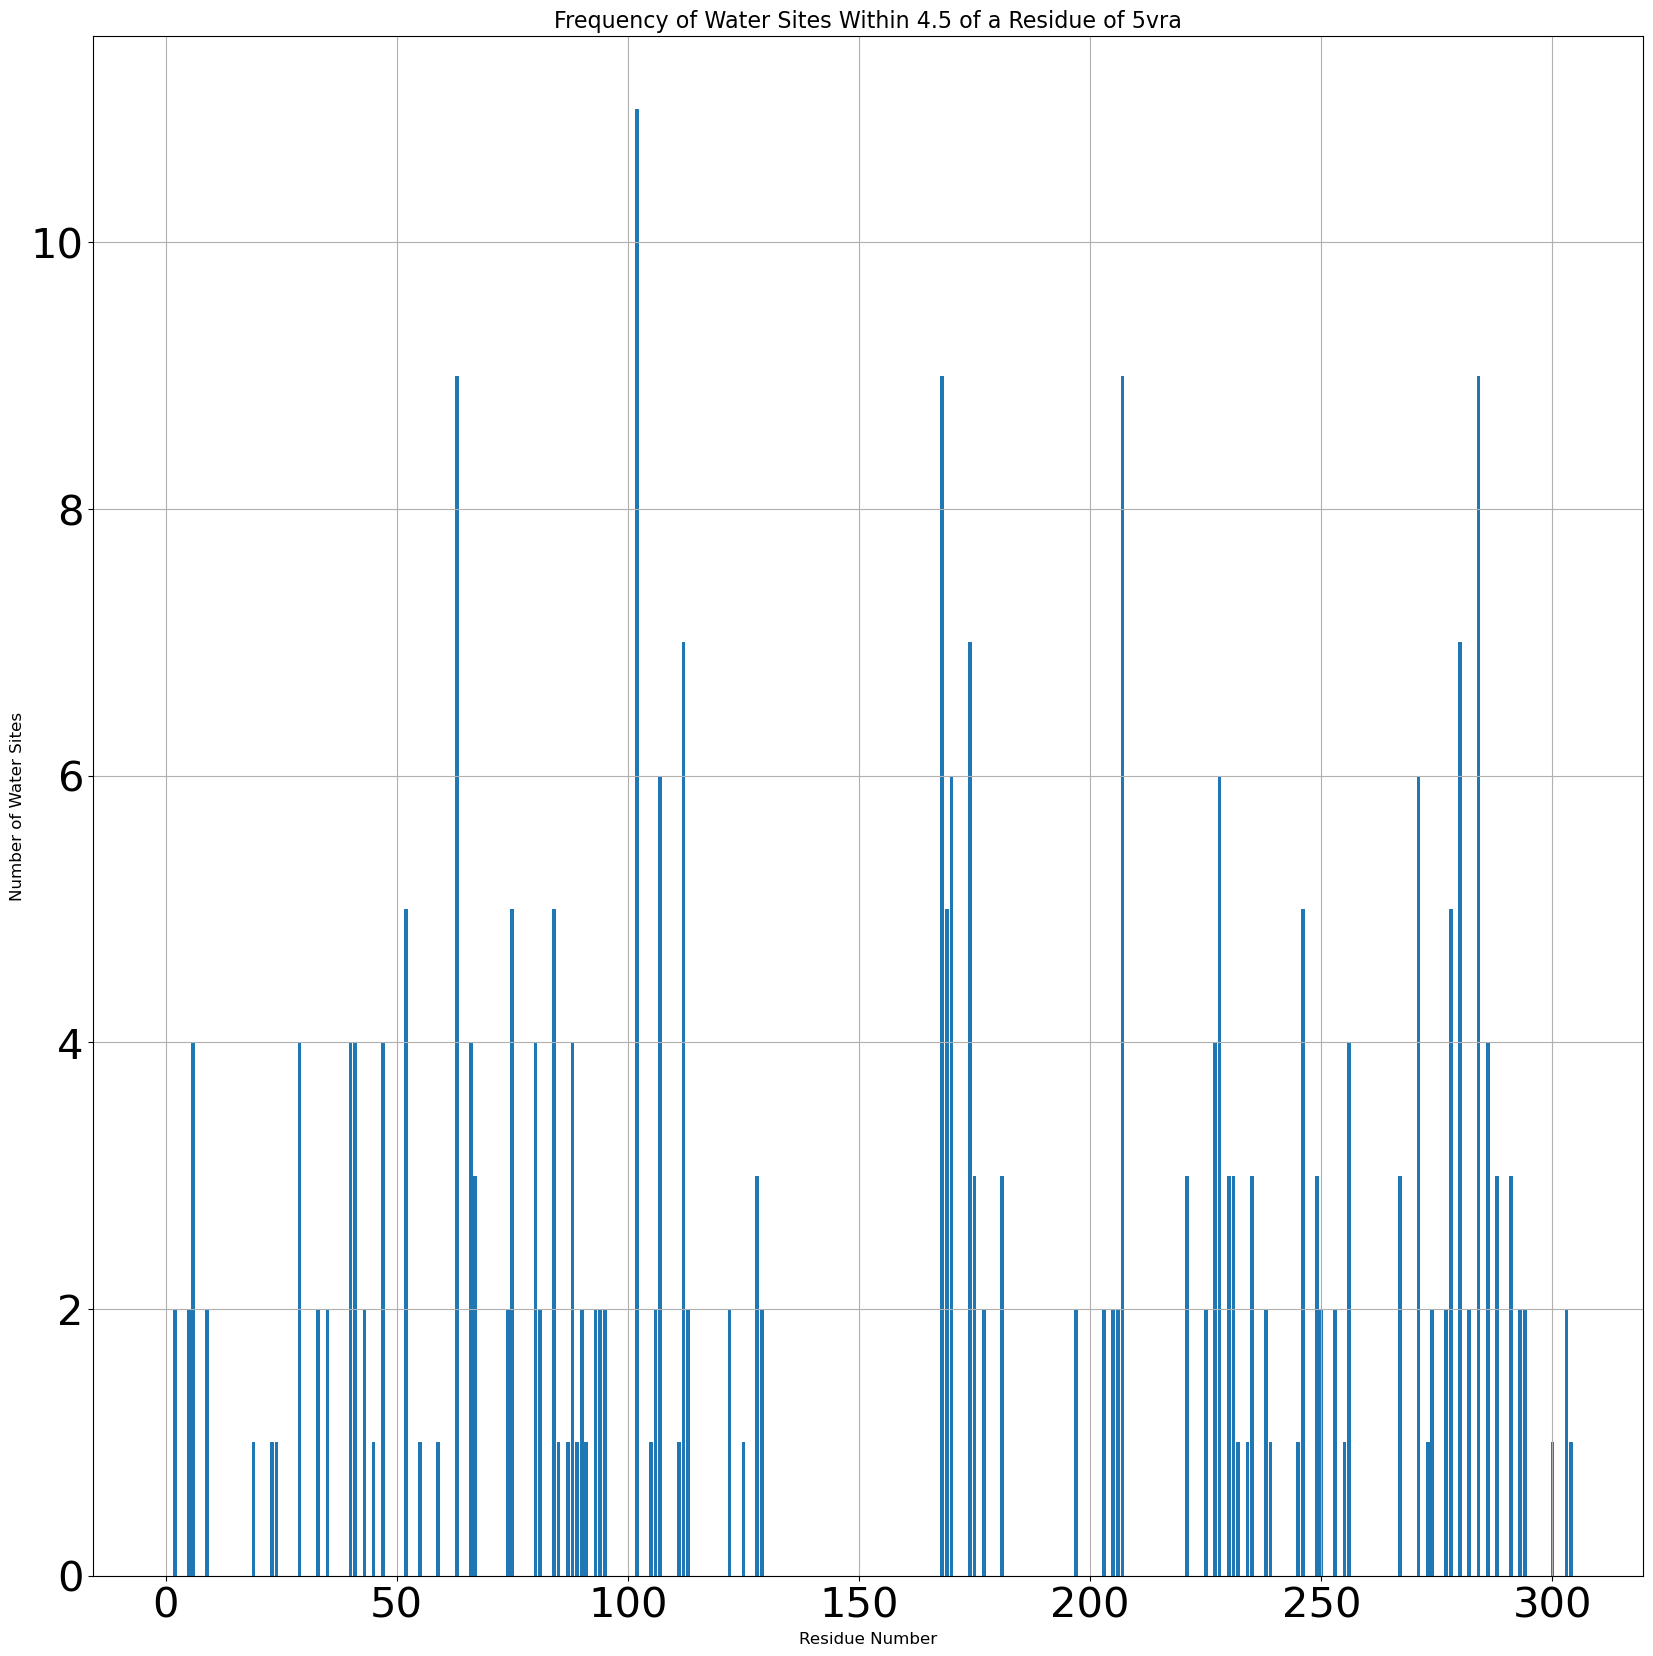

6jzh  Watersite Resid : [0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 7, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 1, 5, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 11, 7, 0, 0, 0, 7, 6, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 5, 0, 1, 2, 2, 0, 0, 2, 0, 1, 5, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 4, 0, 1, 0, 0, 0, 2, 4, 0, 6, 0, 0, 0, 7, 0, 0, 0, 3, 0, 3, 2, 0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



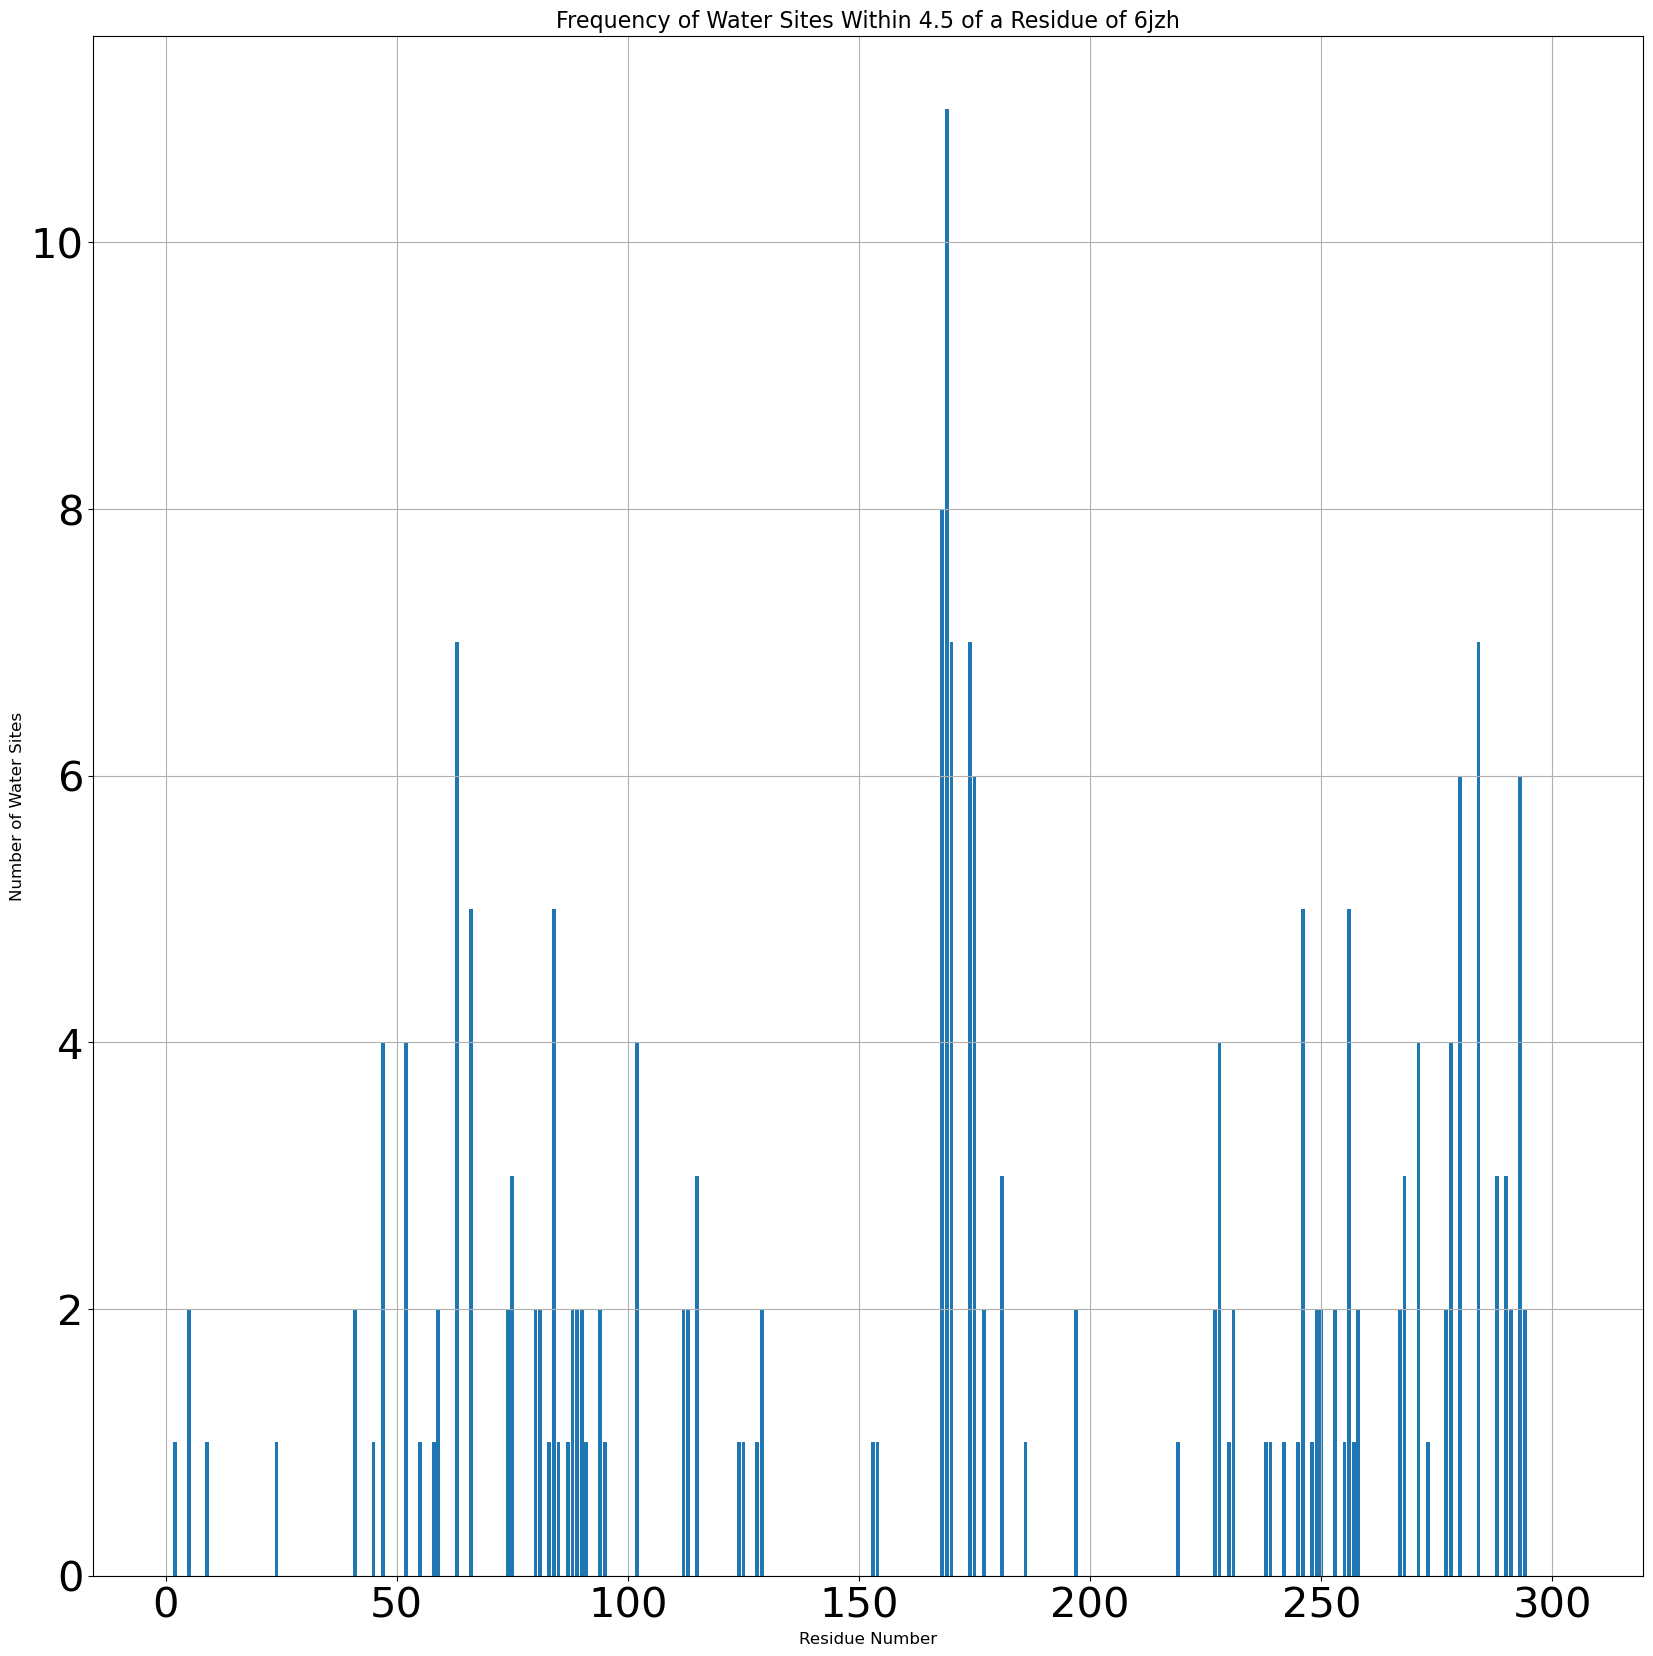

5nm2  Watersite Resid : [0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 1, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 7, 3, 0, 0, 0, 0, 0, 0, 2, 12, 5, 0, 0, 4, 4, 2, 0, 1, 5, 1, 0, 1, 1, 2, 3, 1, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 10, 6, 0, 0, 0, 10, 5, 0, 2, 0, 6, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 16, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 6, 0, 3, 0, 0, 2, 6, 0, 3, 8, 1, 0, 2, 6, 2, 0, 3, 0, 2, 0, 0, 0, 5, 1, 4, 0, 0, 2, 2, 0, 0, 2, 0, 1, 6, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 6, 0, 1, 2, 0, 0, 1, 3, 0, 6, 0, 1, 0, 5, 1, 0, 0, 6, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0]



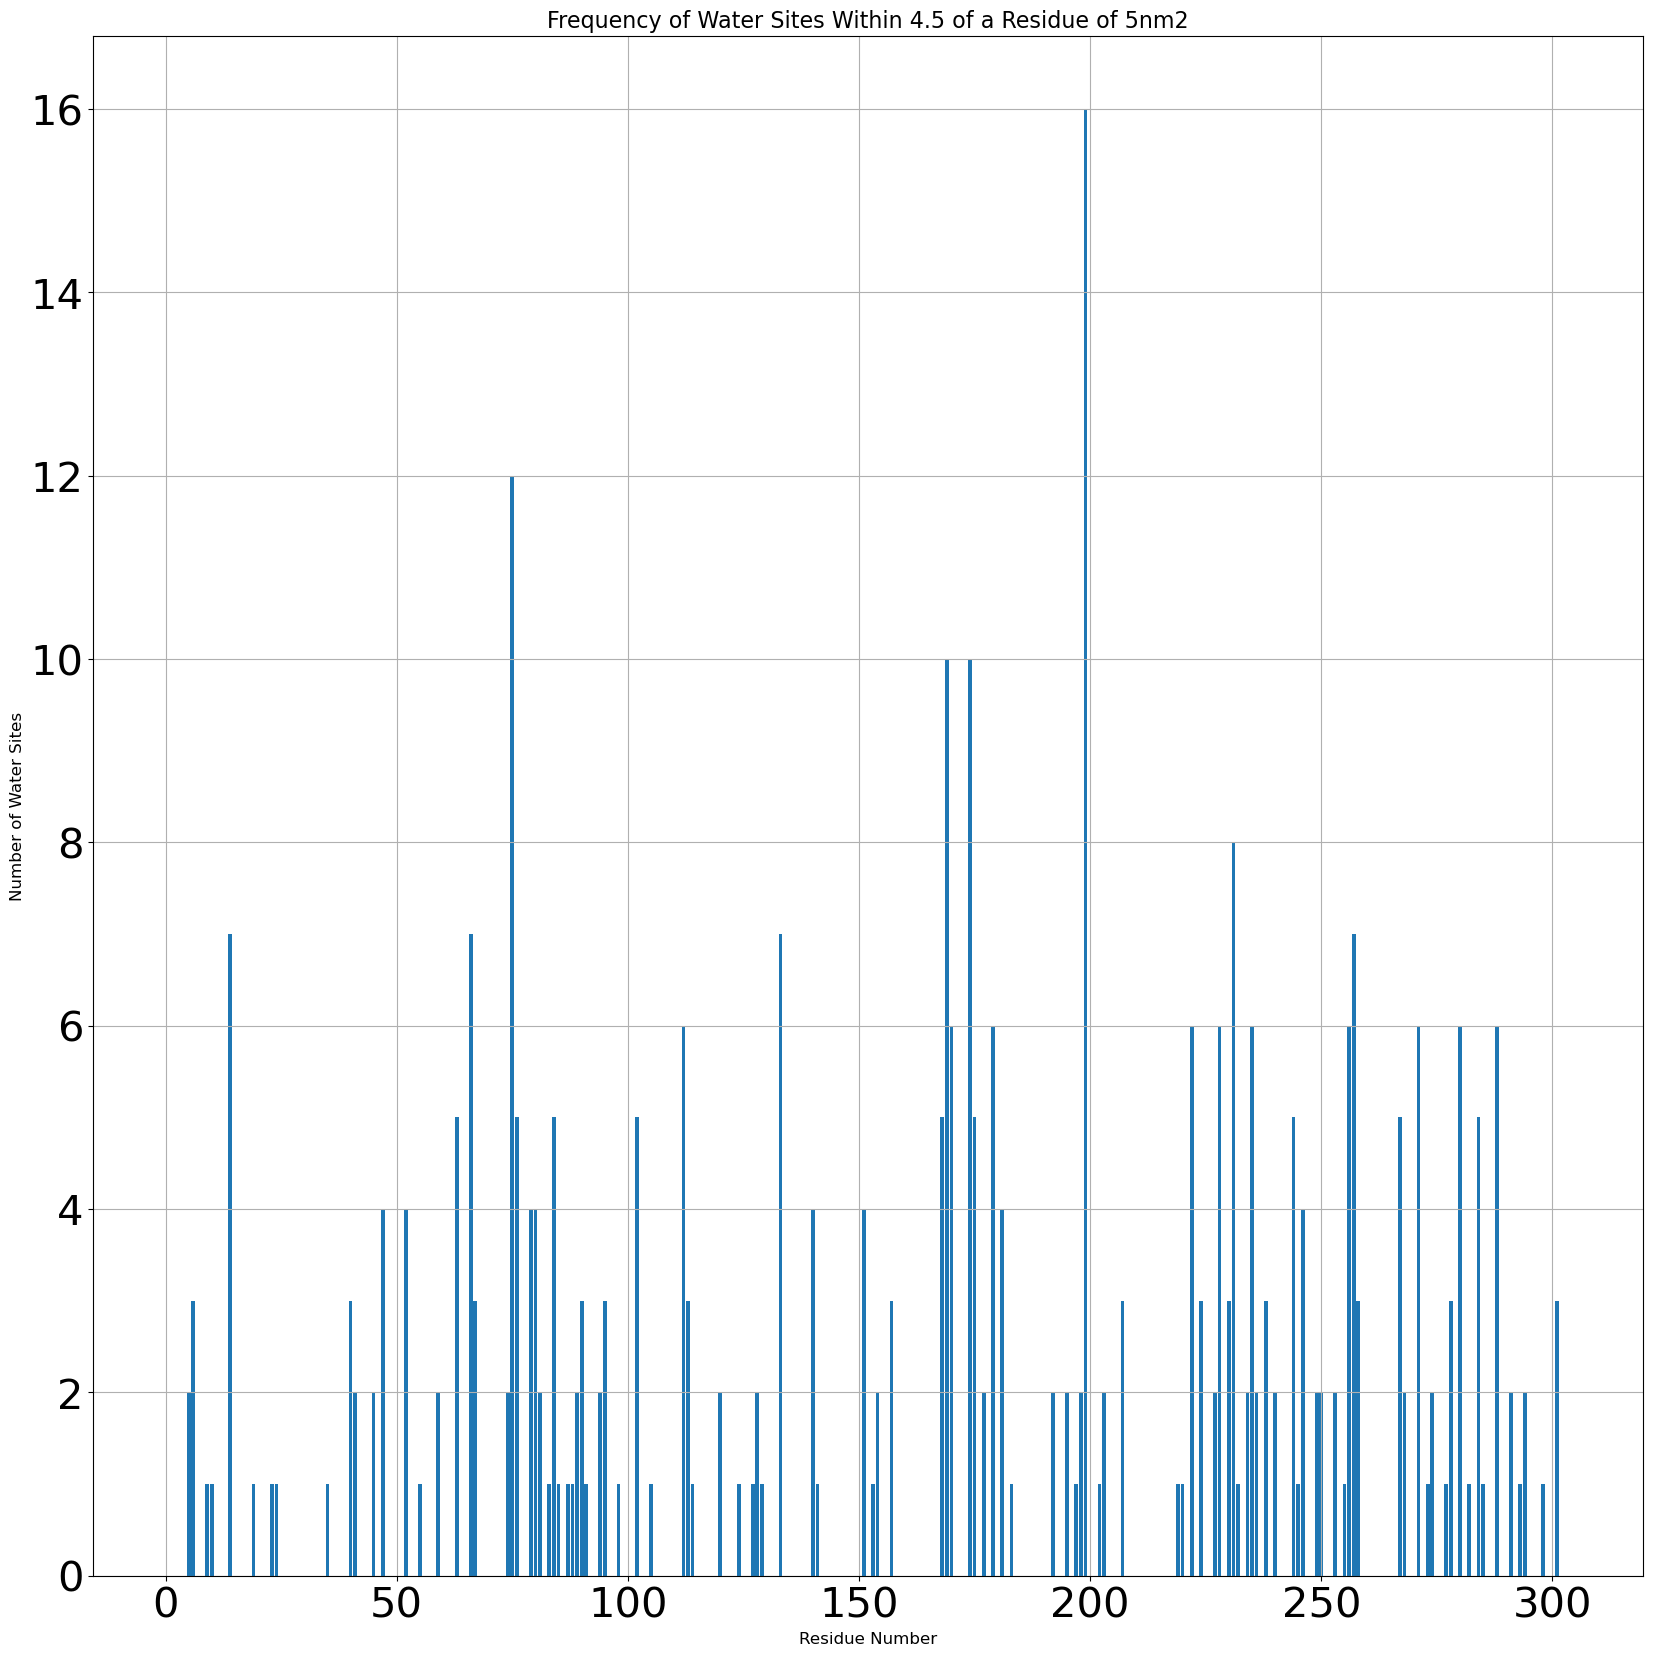

4eiy  Watersite Resid : [0, 0, 4, 2, 0, 2, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 4, 0, 0, 0, 3, 0, 0, 13, 7, 0, 5, 0, 2, 0, 0, 2, 4, 5, 0, 0, 1, 1, 4, 2, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 5, 3, 4, 0, 0, 0, 0, 0, 2, 5, 1, 0, 0, 0, 4, 2, 0, 0, 7, 1, 0, 1, 6, 1, 2, 1, 0, 2, 3, 2, 0, 0, 1, 0, 0, 0, 18, 0, 0, 4, 1, 1, 0, 0, 0, 1, 8, 7, 5, 2, 0, 0, 3, 0, 2, 1, 10, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 8, 0, 0, 0, 10, 13, 0, 2, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 3, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 8, 2, 0, 13, 15, 0, 10, 5, 0, 0, 1, 2, 0, 0, 4, 1, 0, 0, 1, 0, 0, 1, 6, 0, 0, 3, 2, 0, 0, 2, 0, 3, 11, 16, 4, 0, 0, 0, 0, 0, 0, 0, 0, 8, 6, 0, 0, 6, 1, 1, 2, 0, 0, 2, 4, 0, 6, 0, 2, 0, 6, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 1, 7, 6, 2, 0, 8, 4, 0, 0, 0]



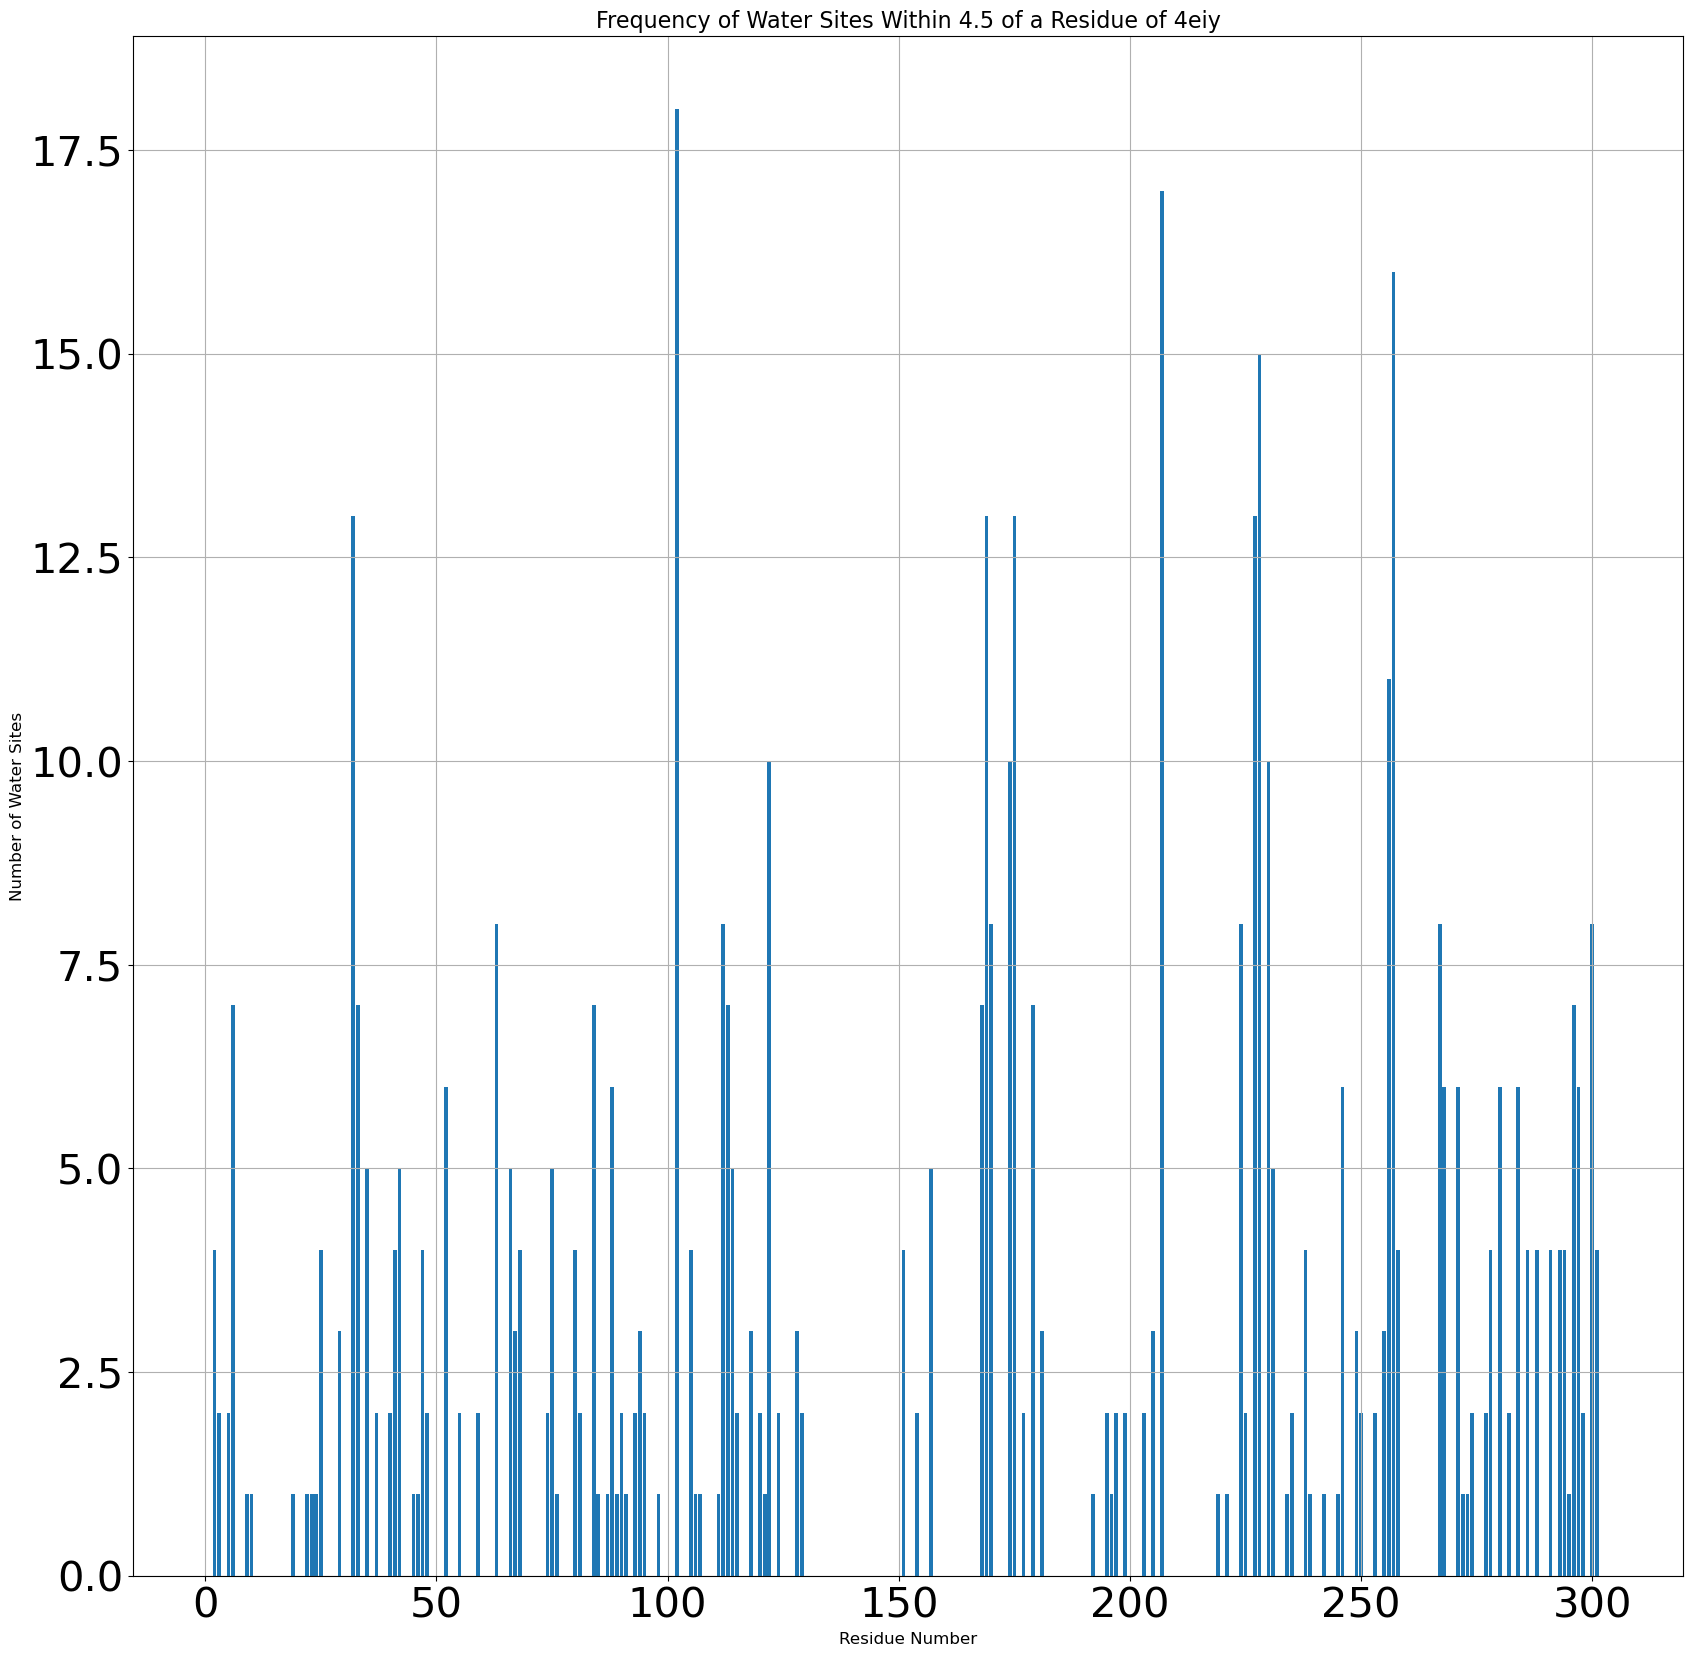

5k2a  Watersite Resid : [0, 0, 5, 4, 0, 2, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 6, 0, 0, 4, 3, 5, 0, 0, 0, 0, 0, 1, 7, 1, 0, 0, 0, 2, 2, 0, 2, 4, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 6, 0, 0, 0, 4, 6, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 4, 0, 0, 3, 3, 0, 0, 2, 0, 1, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 4, 0, 1, 0, 0, 0, 2, 4, 0, 5, 0, 1, 0, 5, 1, 0, 0, 3, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]



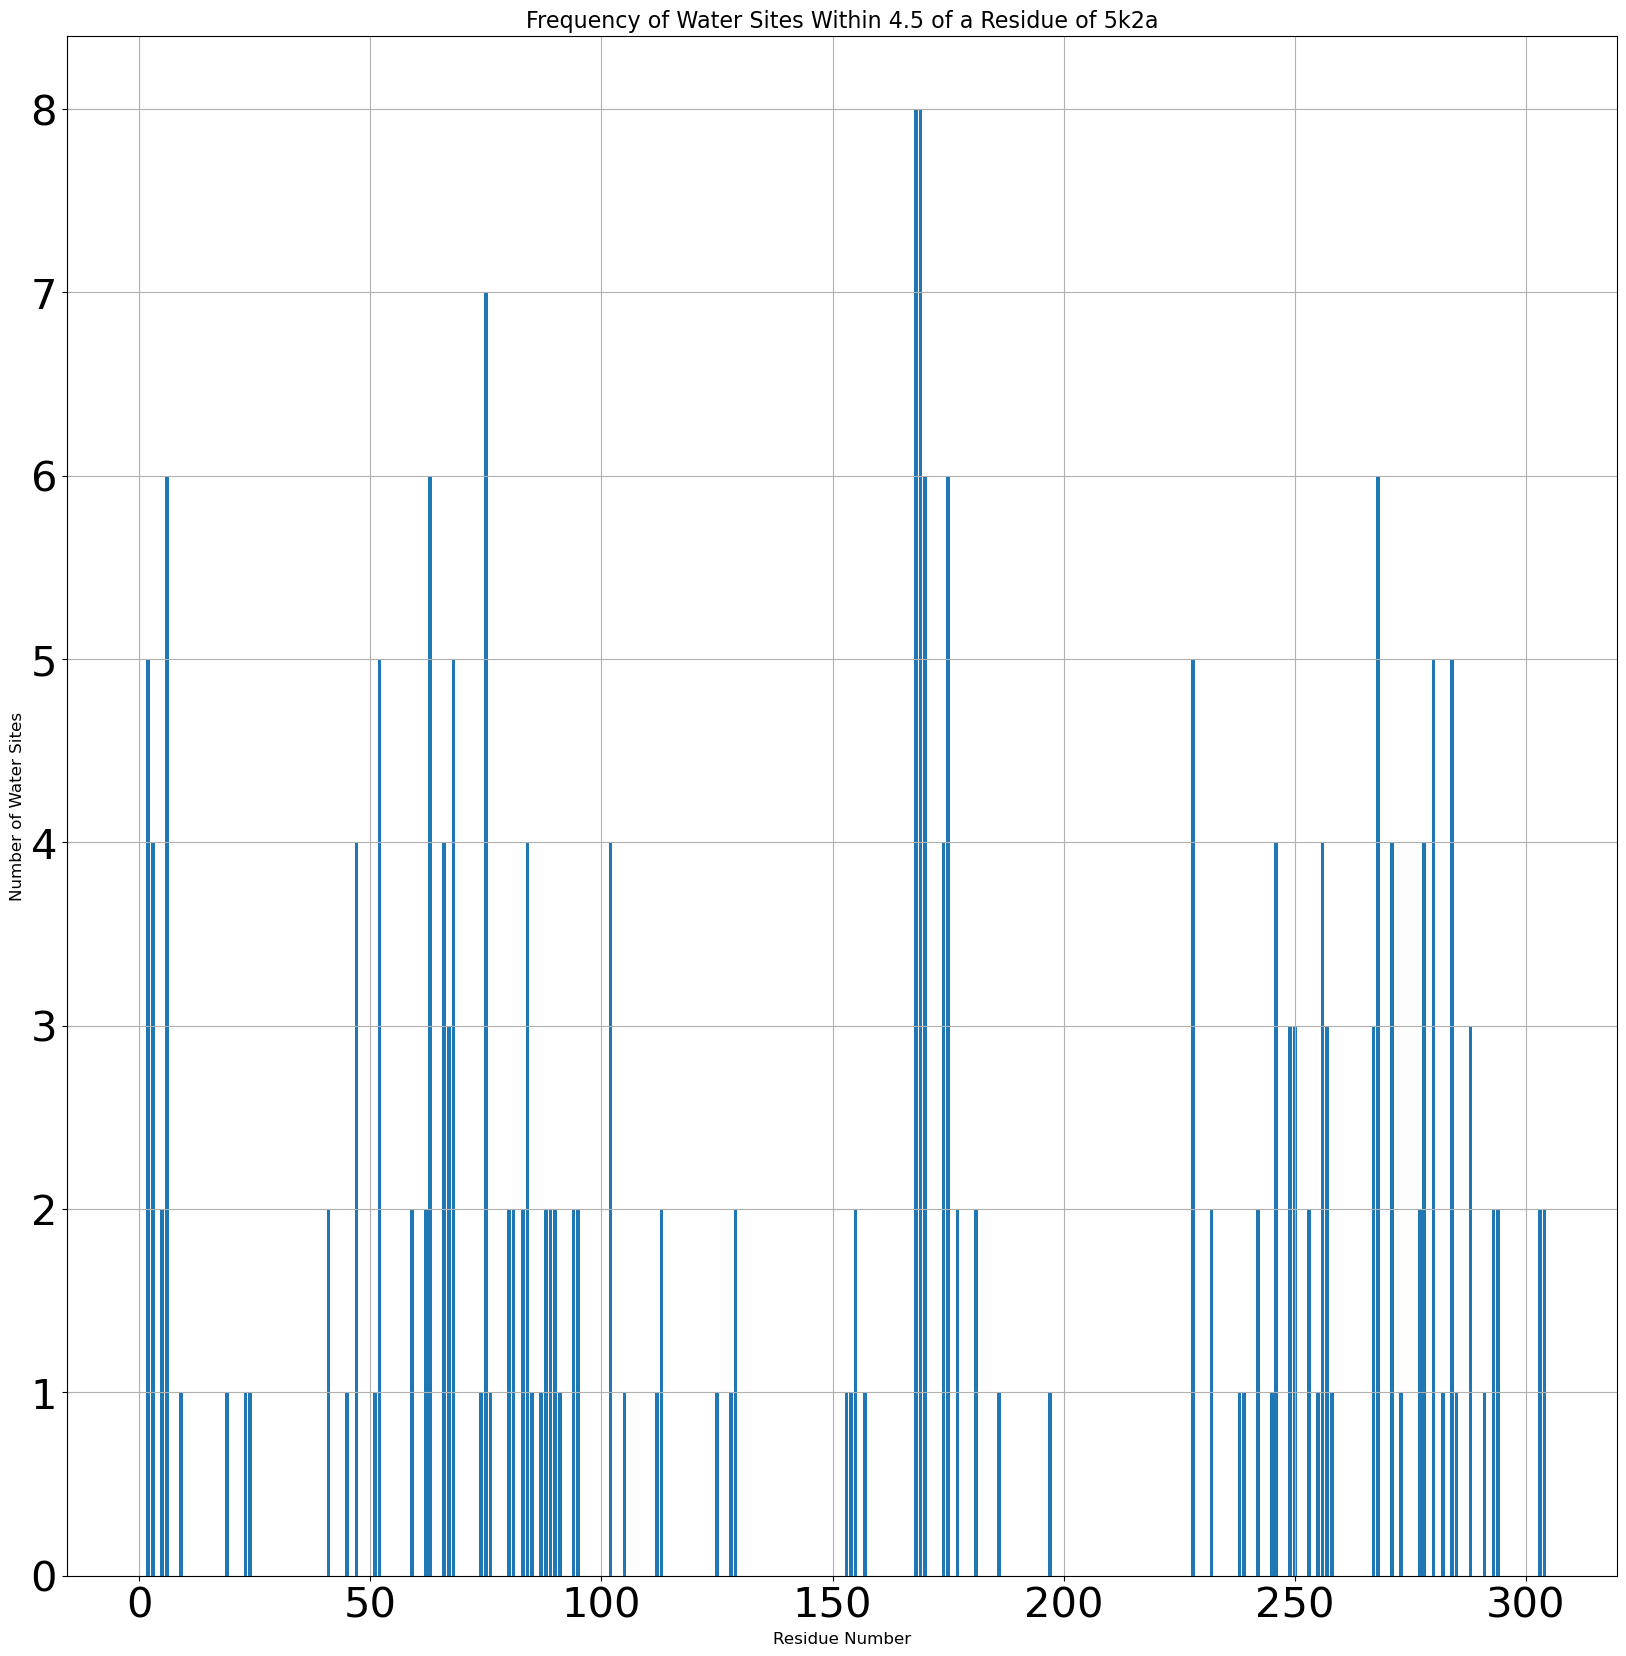

5iu7  Watersite Resid : [0, 0, 3, 1, 0, 4, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 4, 1, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 10, 1, 3, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 4, 2, 0, 1, 7, 1, 0, 2, 2, 2, 3, 1, 0, 0, 2, 4, 0, 0, 1, 0, 0, 0, 4, 0, 0, 4, 3, 0, 0, 0, 0, 0, 9, 7, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 12, 10, 0, 0, 0, 15, 2, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 4, 0, 3, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 6, 10, 0, 7, 4, 1, 0, 2, 6, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 5, 0, 0, 2, 3, 0, 0, 2, 0, 2, 14, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 0, 0, 6, 0, 1, 2, 0, 0, 1, 4, 0, 6, 0, 1, 0, 6, 1, 0, 0, 6, 0, 1, 8, 0, 5, 2, 0, 2, 0, 2, 0, 1, 4, 0, 1, 2]



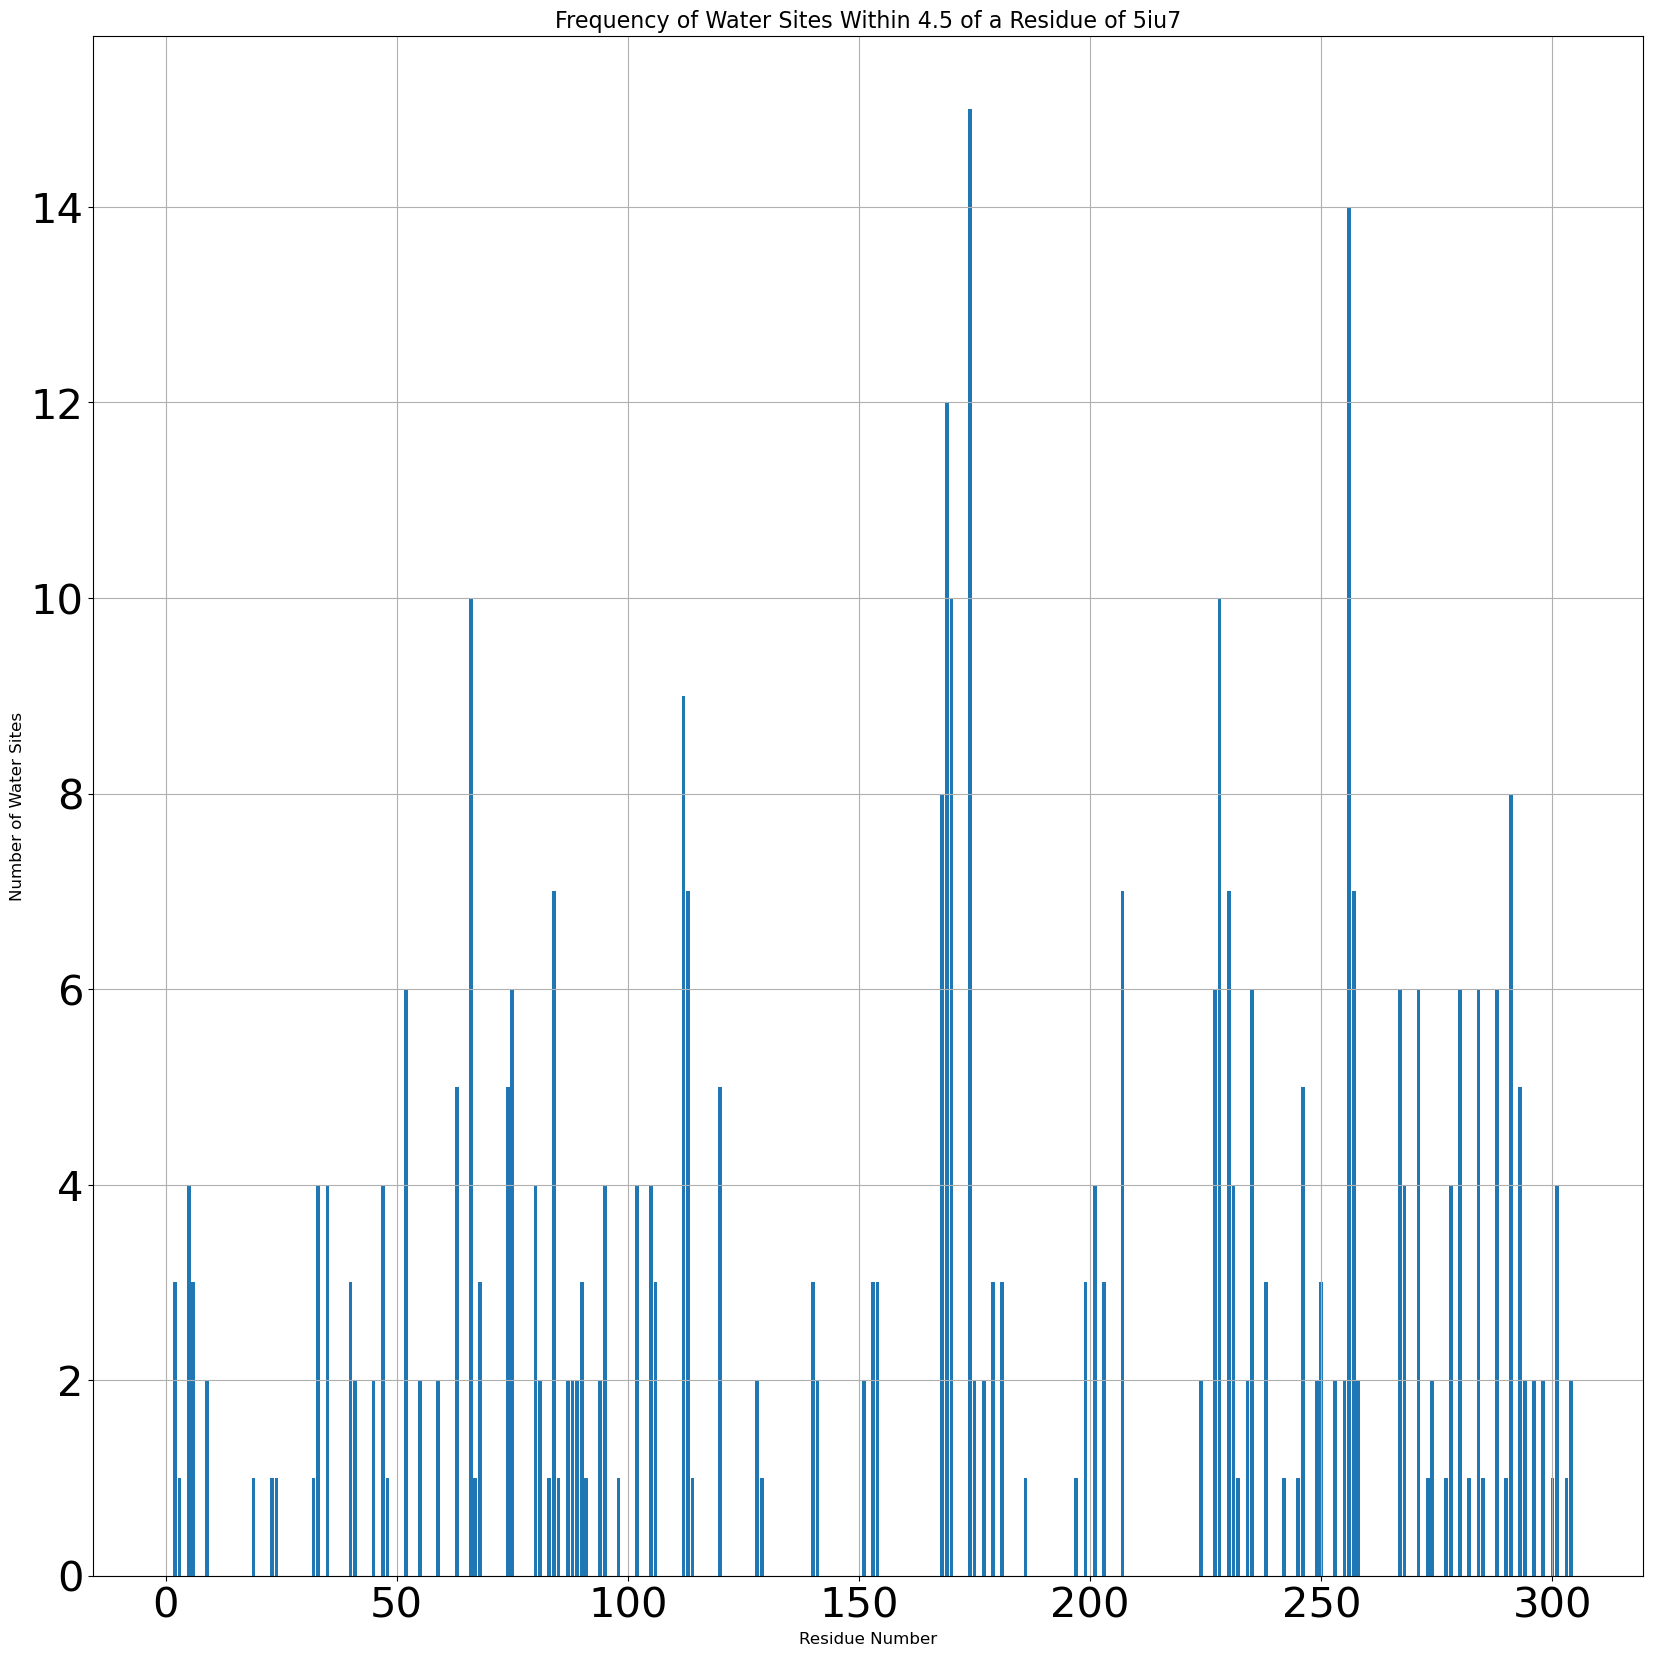

5jtb  Watersite Resid : [0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 4, 0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 5, 0, 0, 5, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 9, 2, 0, 1, 3, 1, 3, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 2, 0, 0, 0, 4, 6, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 4, 0, 1, 1, 2, 0, 1, 2, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 4, 0, 1, 2, 0, 0, 1, 2, 0, 5, 0, 0, 0, 6, 0, 0, 0, 0, 0, 5, 2, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0]



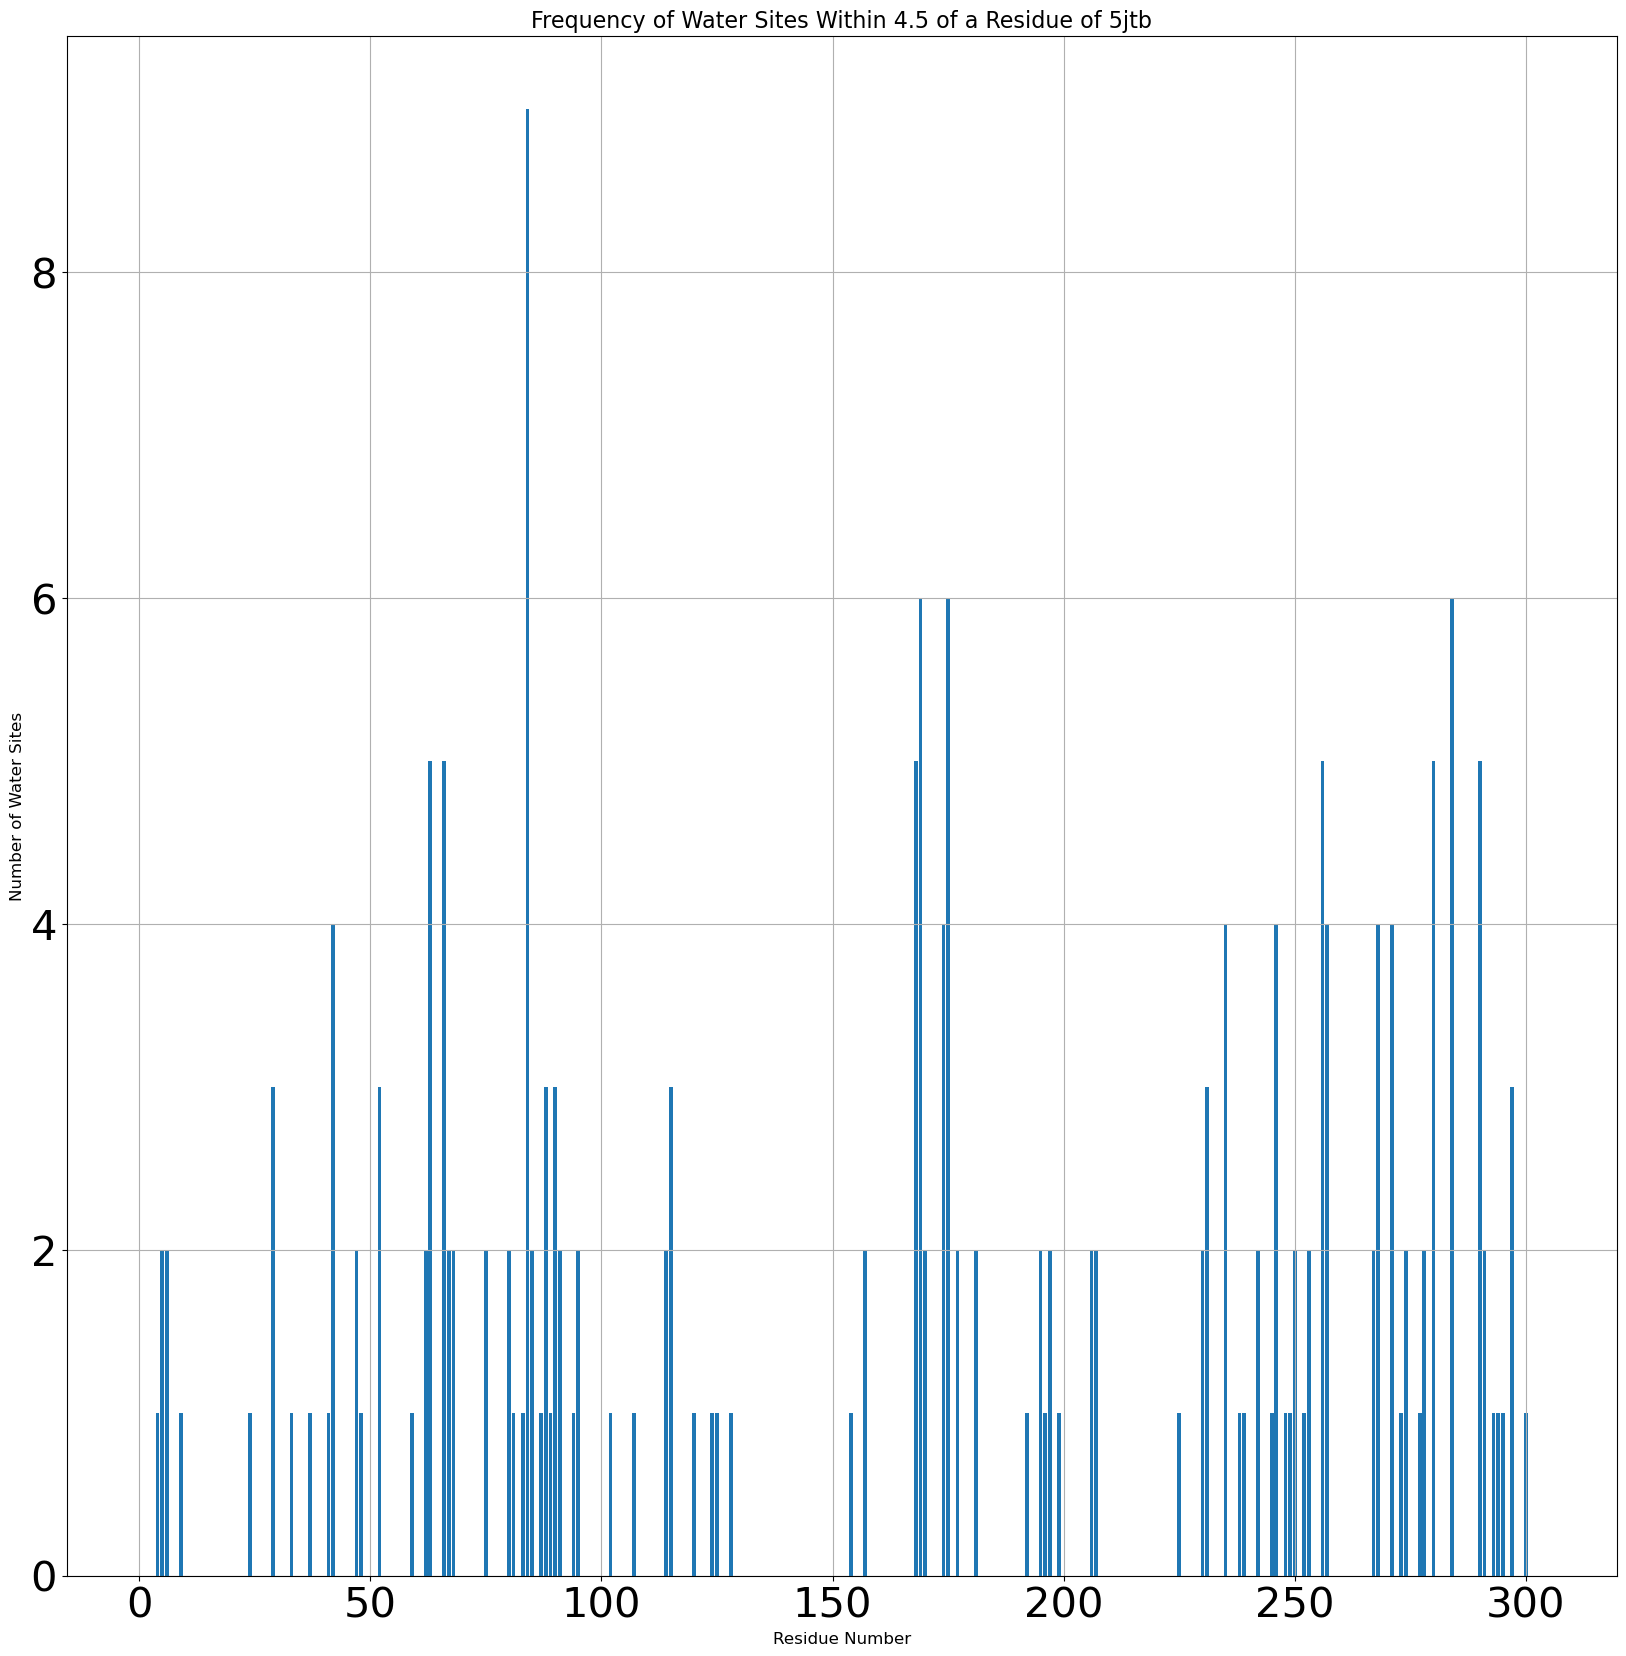

5iu4  Watersite Resid : [0, 0, 1, 0, 0, 3, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 4, 2, 0, 0, 2, 0, 4, 1, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 4, 6, 0, 0, 0, 0, 4, 2, 0, 0, 7, 1, 0, 4, 2, 2, 4, 1, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 2, 7, 6, 1, 4, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 13, 11, 0, 0, 0, 16, 10, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 4, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 6, 1, 2, 6, 9, 0, 7, 2, 1, 0, 2, 4, 2, 2, 4, 0, 0, 0, 1, 0, 4, 1, 4, 0, 0, 2, 3, 0, 0, 2, 0, 3, 12, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 8, 3, 0, 0, 7, 0, 1, 2, 0, 0, 1, 2, 0, 6, 0, 1, 0, 6, 1, 0, 0, 6, 0, 0, 5, 0, 6, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0]



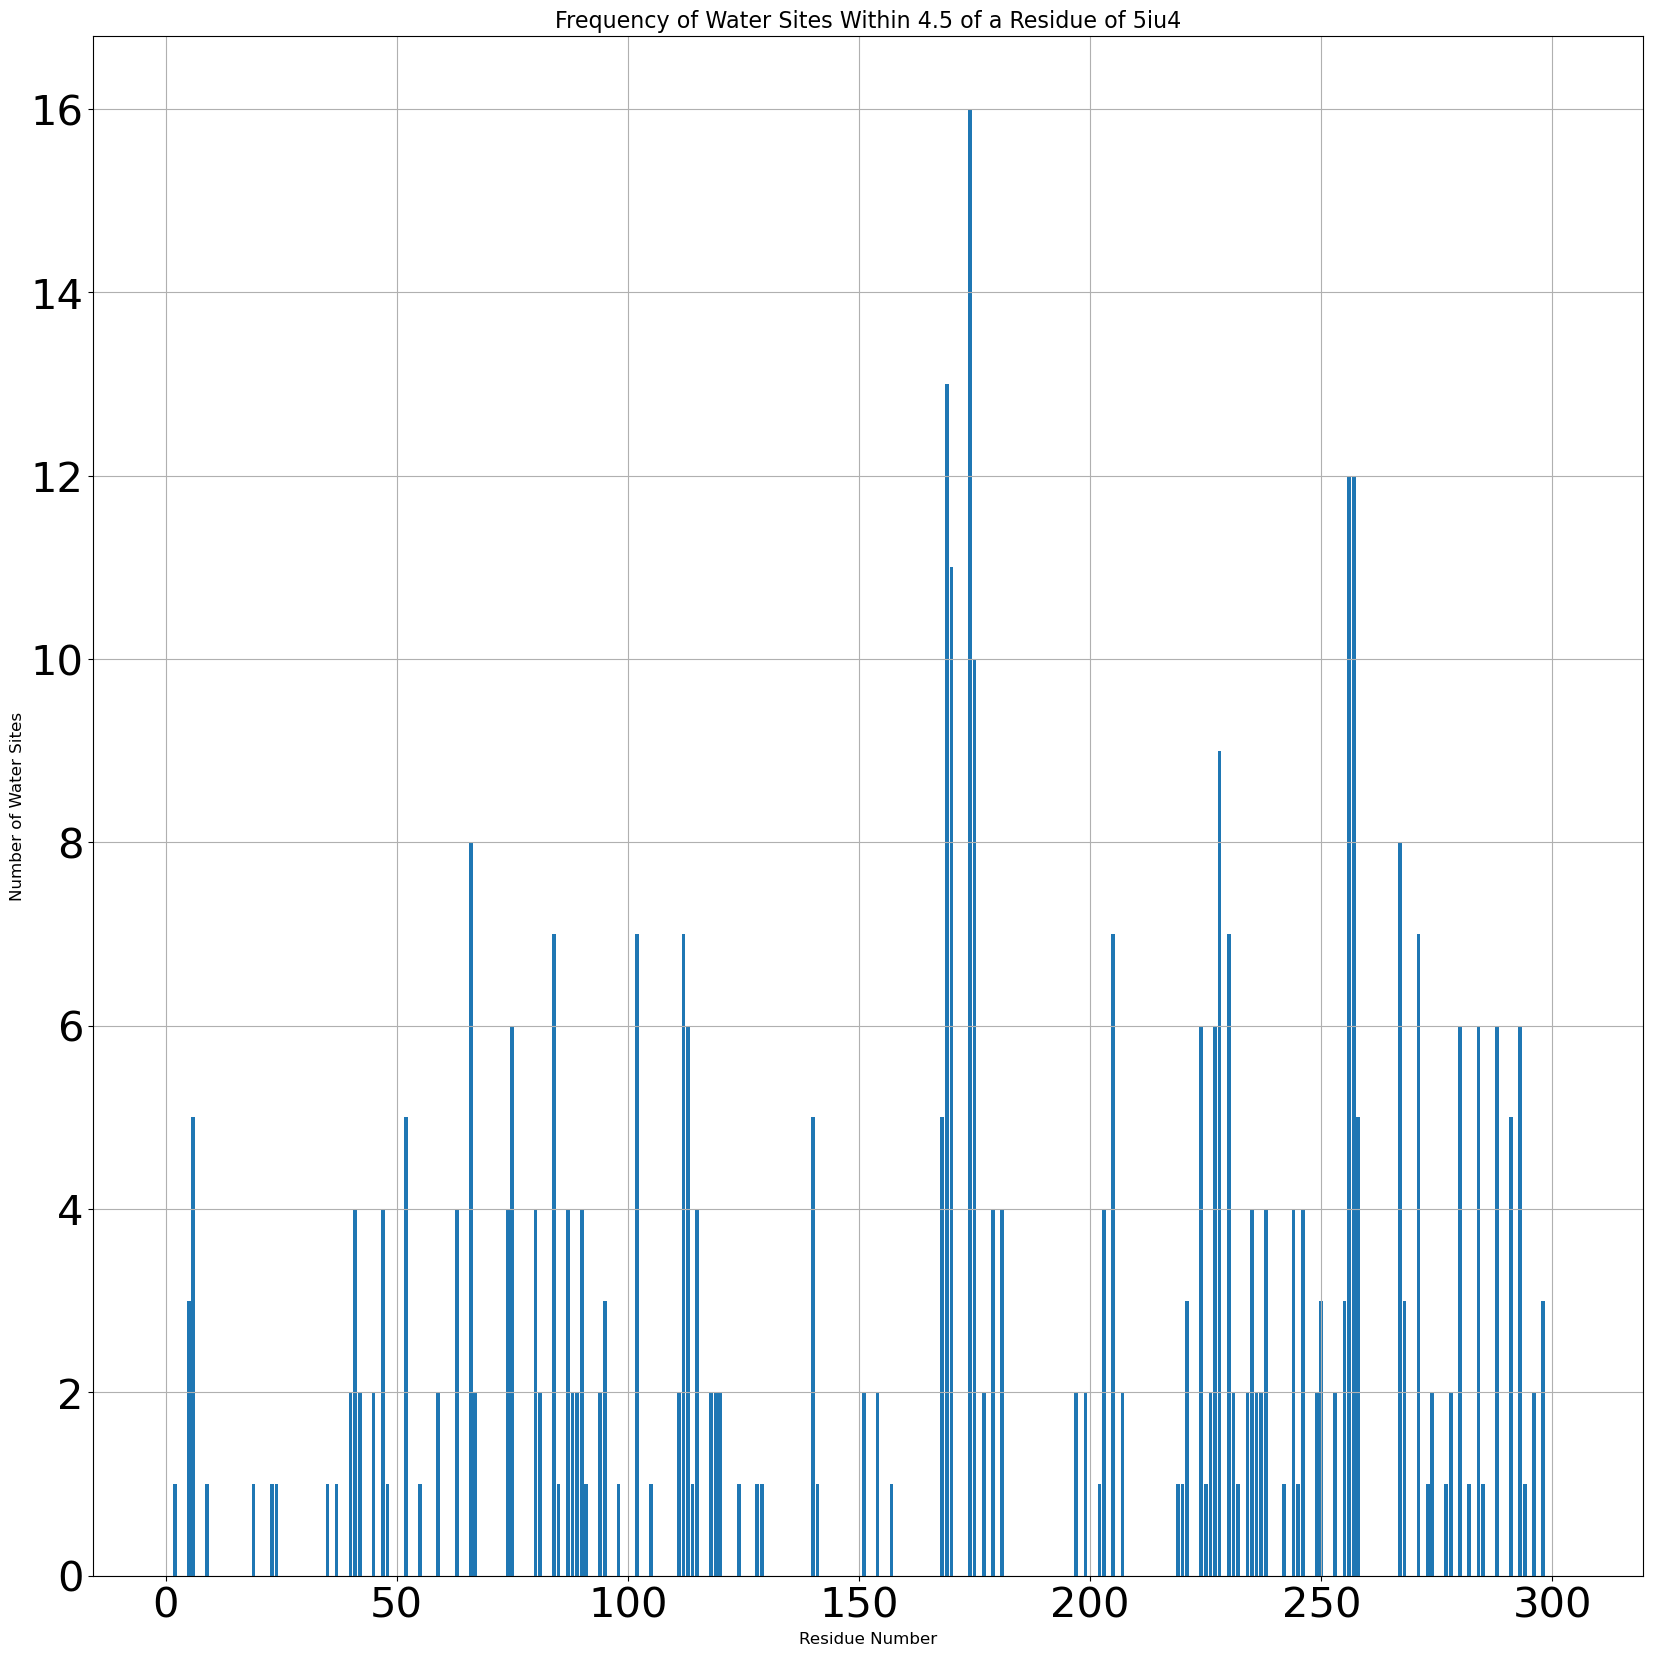

5k2b  Watersite Resid : [0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 6, 0, 0, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 5, 1, 0, 1, 2, 2, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 11, 6, 0, 0, 0, 4, 8, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 3, 3, 0, 0, 3, 0, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 4, 0, 1, 0, 0, 0, 2, 4, 0, 5, 0, 1, 0, 6, 1, 0, 0, 3, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



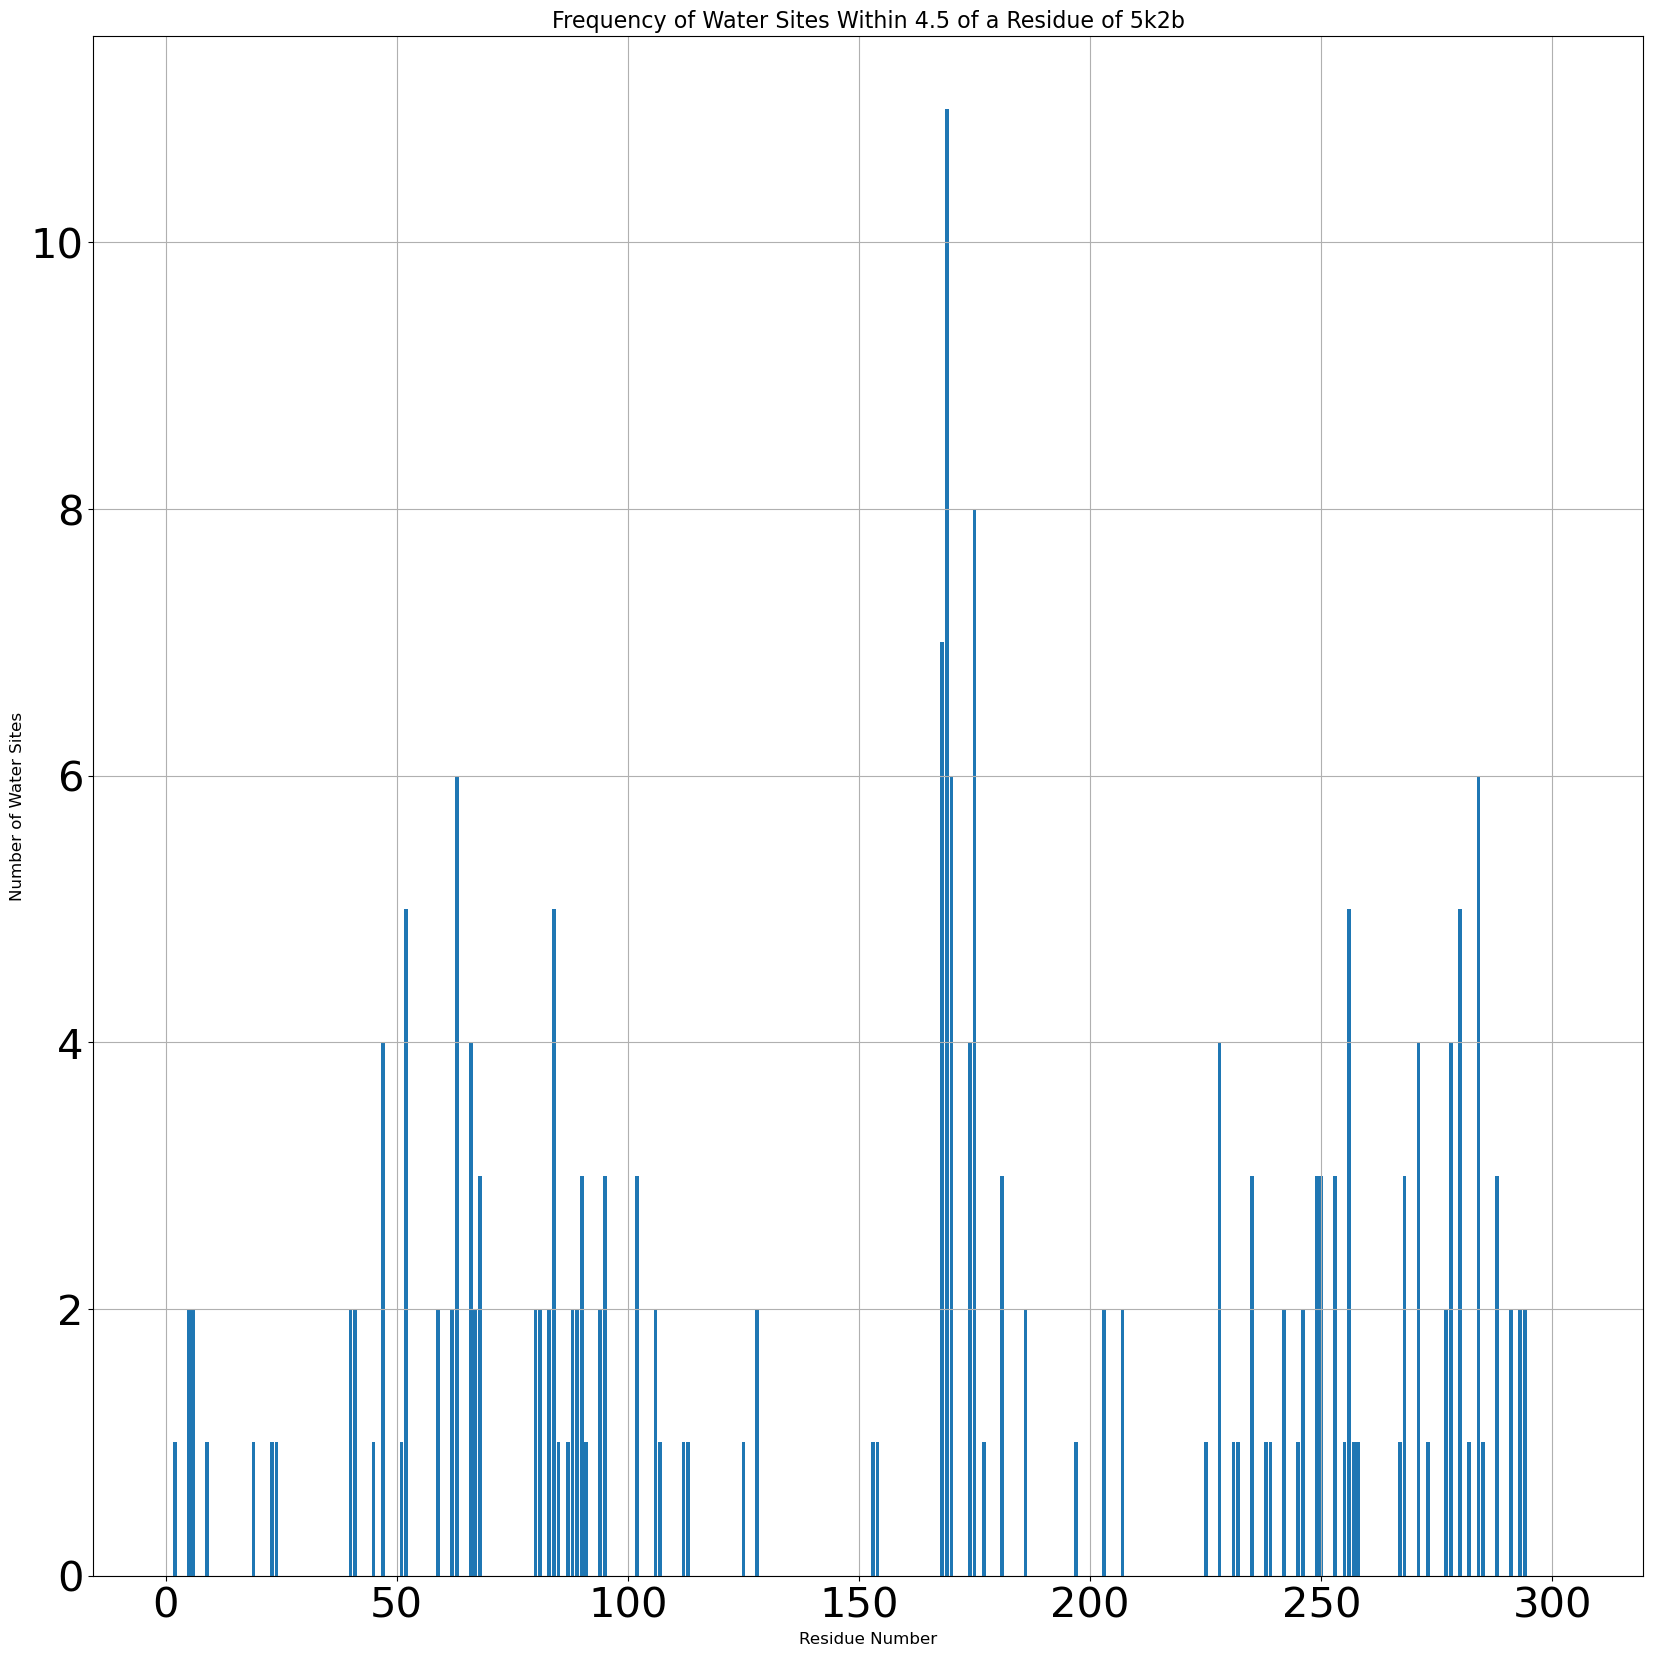

5k2c  Watersite Resid : [0, 0, 1, 3, 0, 2, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 5, 5, 9, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 2, 2, 0, 1, 6, 1, 0, 1, 6, 1, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 12, 0, 0, 1, 3, 0, 0, 0, 0, 1, 4, 9, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 12, 6, 0, 0, 0, 5, 6, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 12, 5, 1, 0, 1, 3, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 6, 0, 0, 3, 2, 0, 0, 3, 0, 2, 9, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 7, 0, 1, 2, 0, 0, 2, 4, 0, 6, 0, 1, 0, 7, 1, 0, 0, 3, 0, 0, 4, 0, 6, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1]



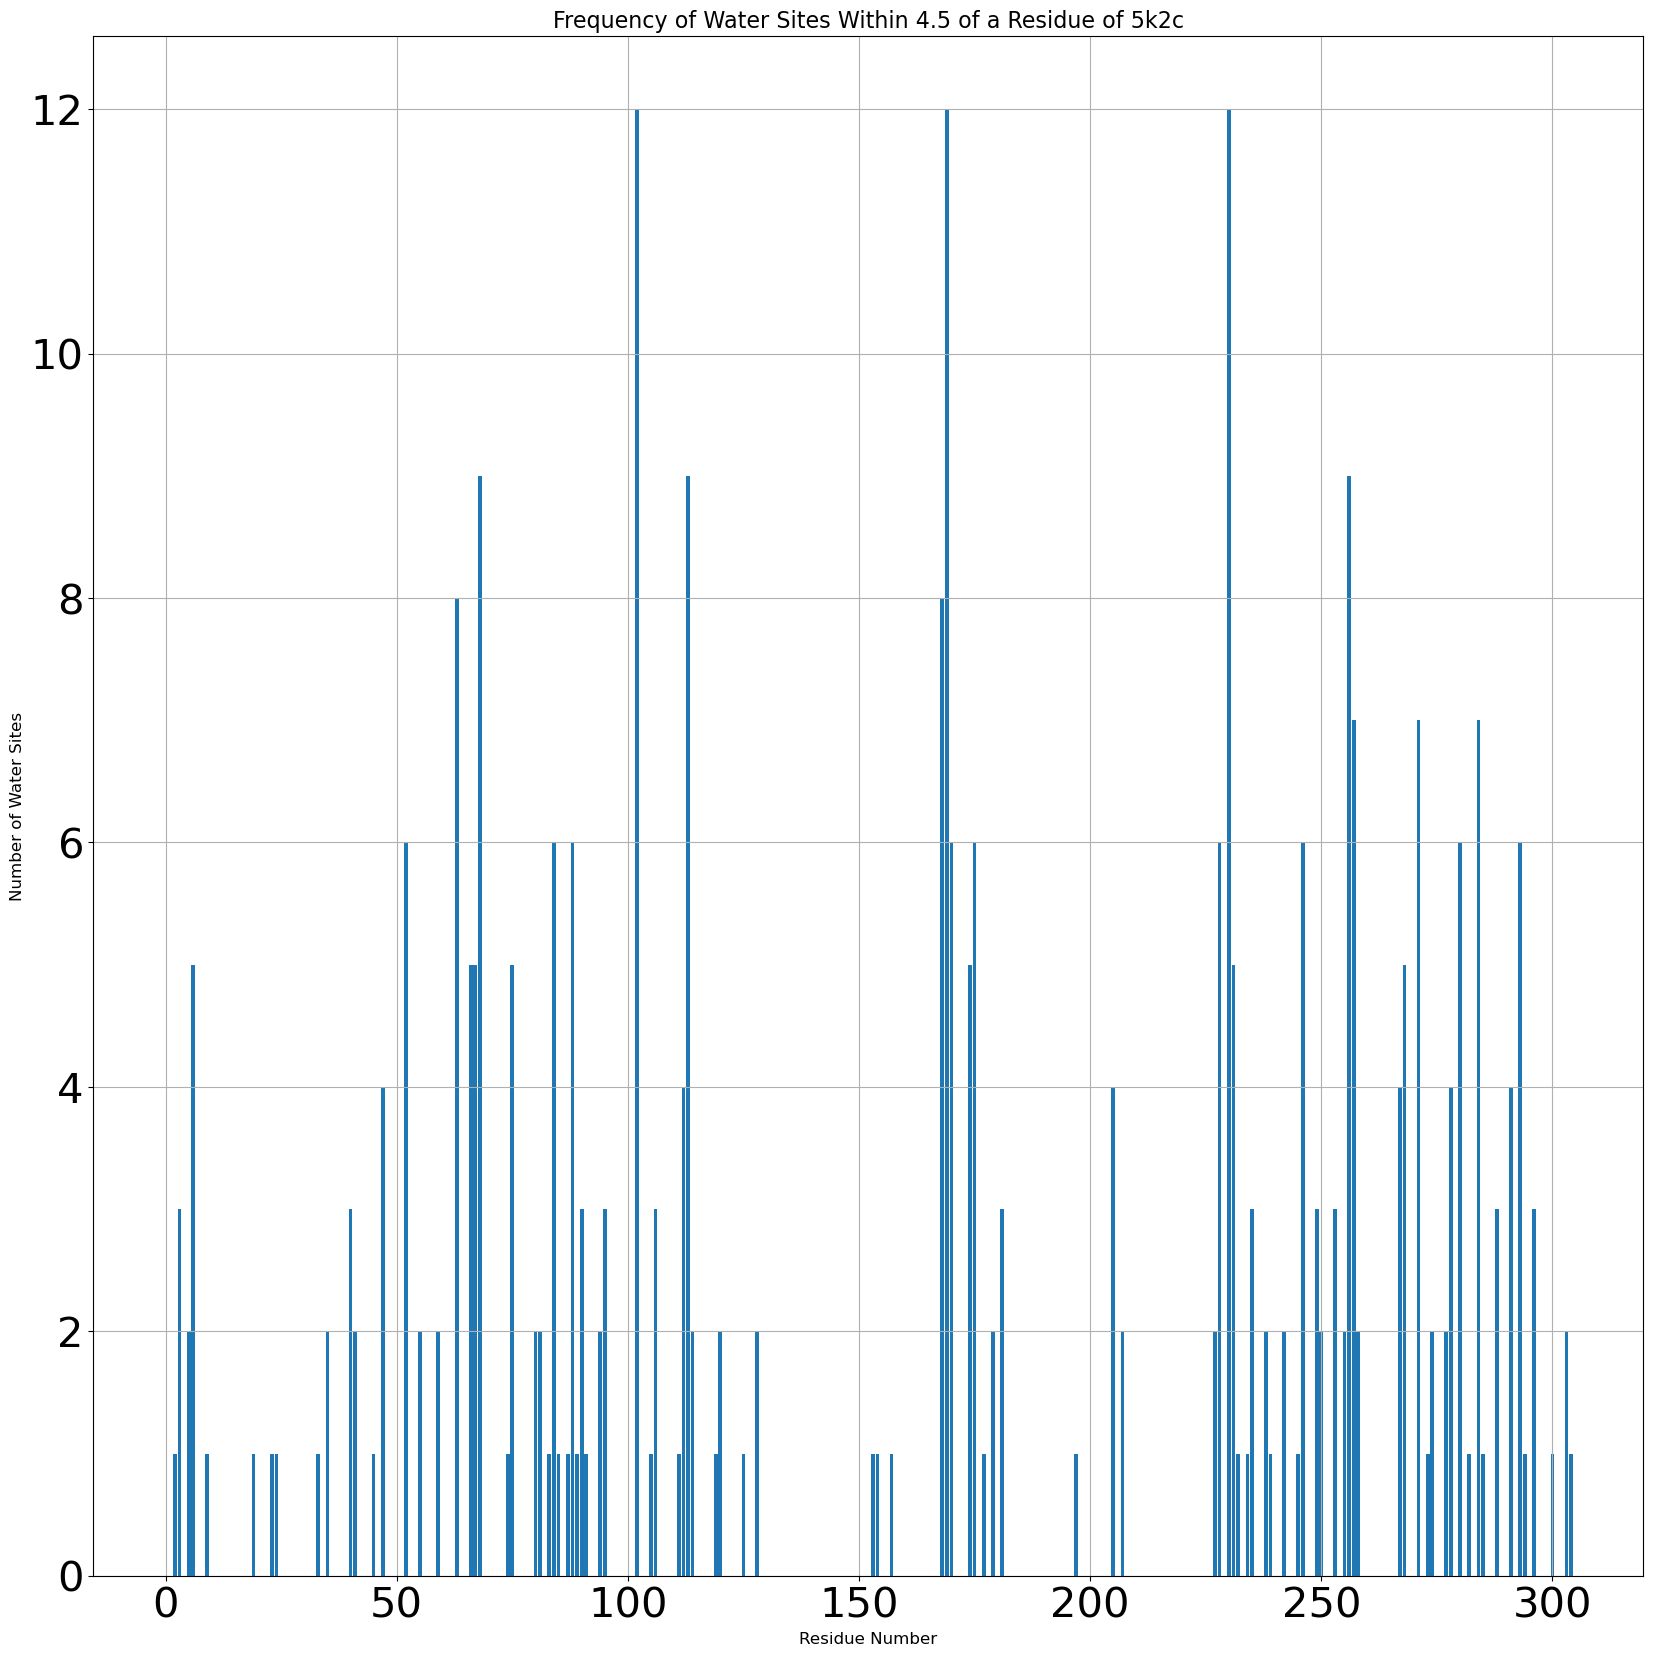

6s0q  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



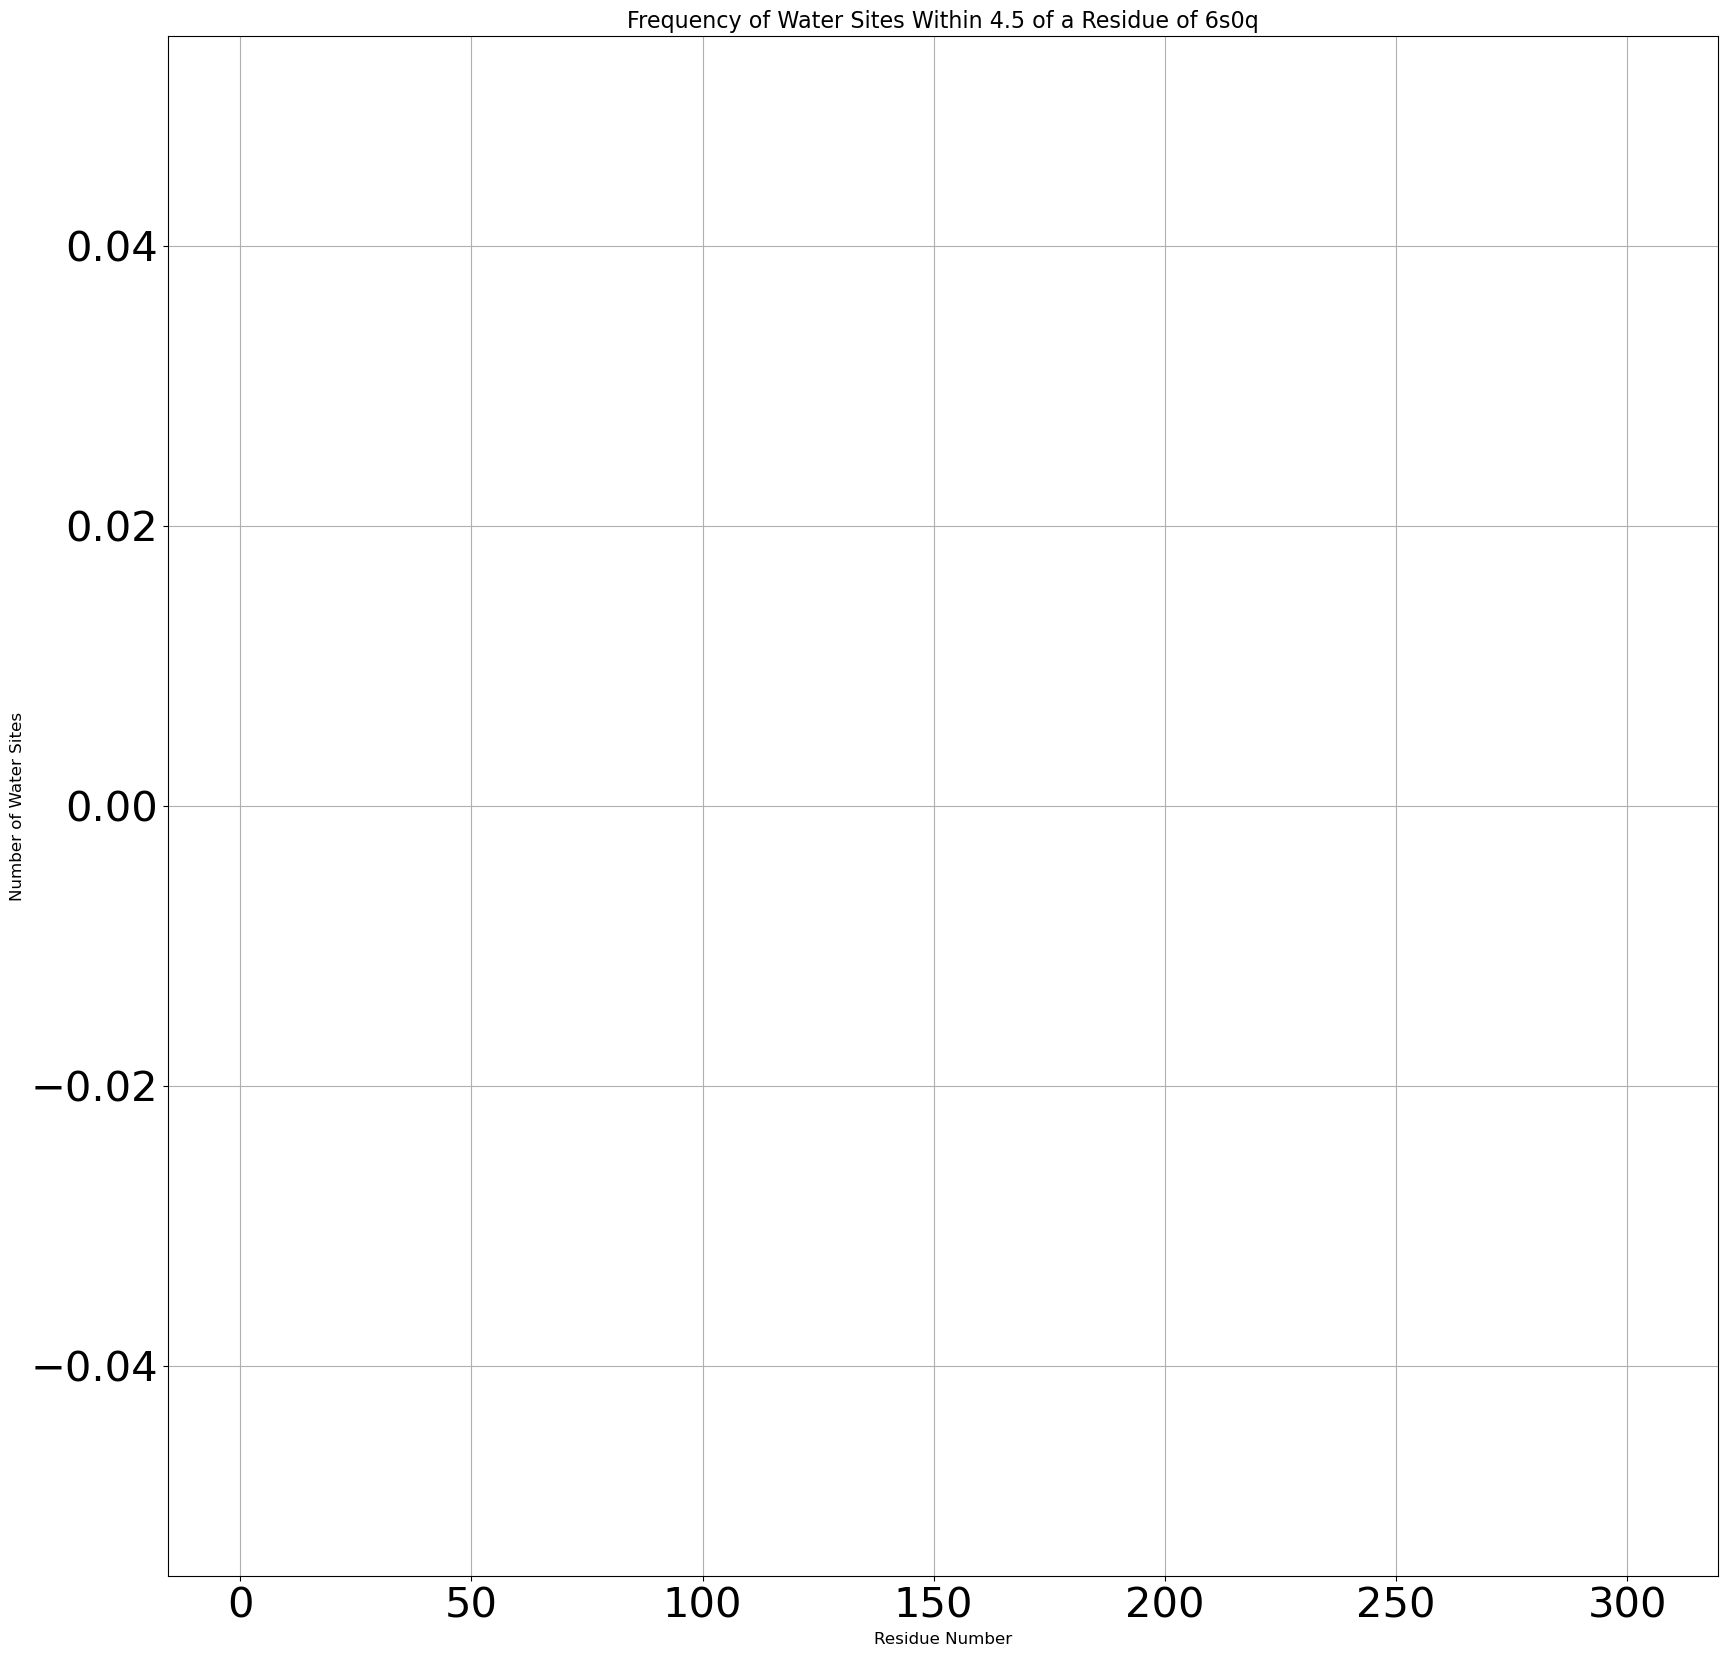

8du3  Watersite Resid : [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 10, 3, 0, 0, 0, 7, 3, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 3, 0, 0, 2, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 3, 3, 0, 1, 1, 0, 0, 1, 1, 0, 6, 0, 0, 0, 8, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



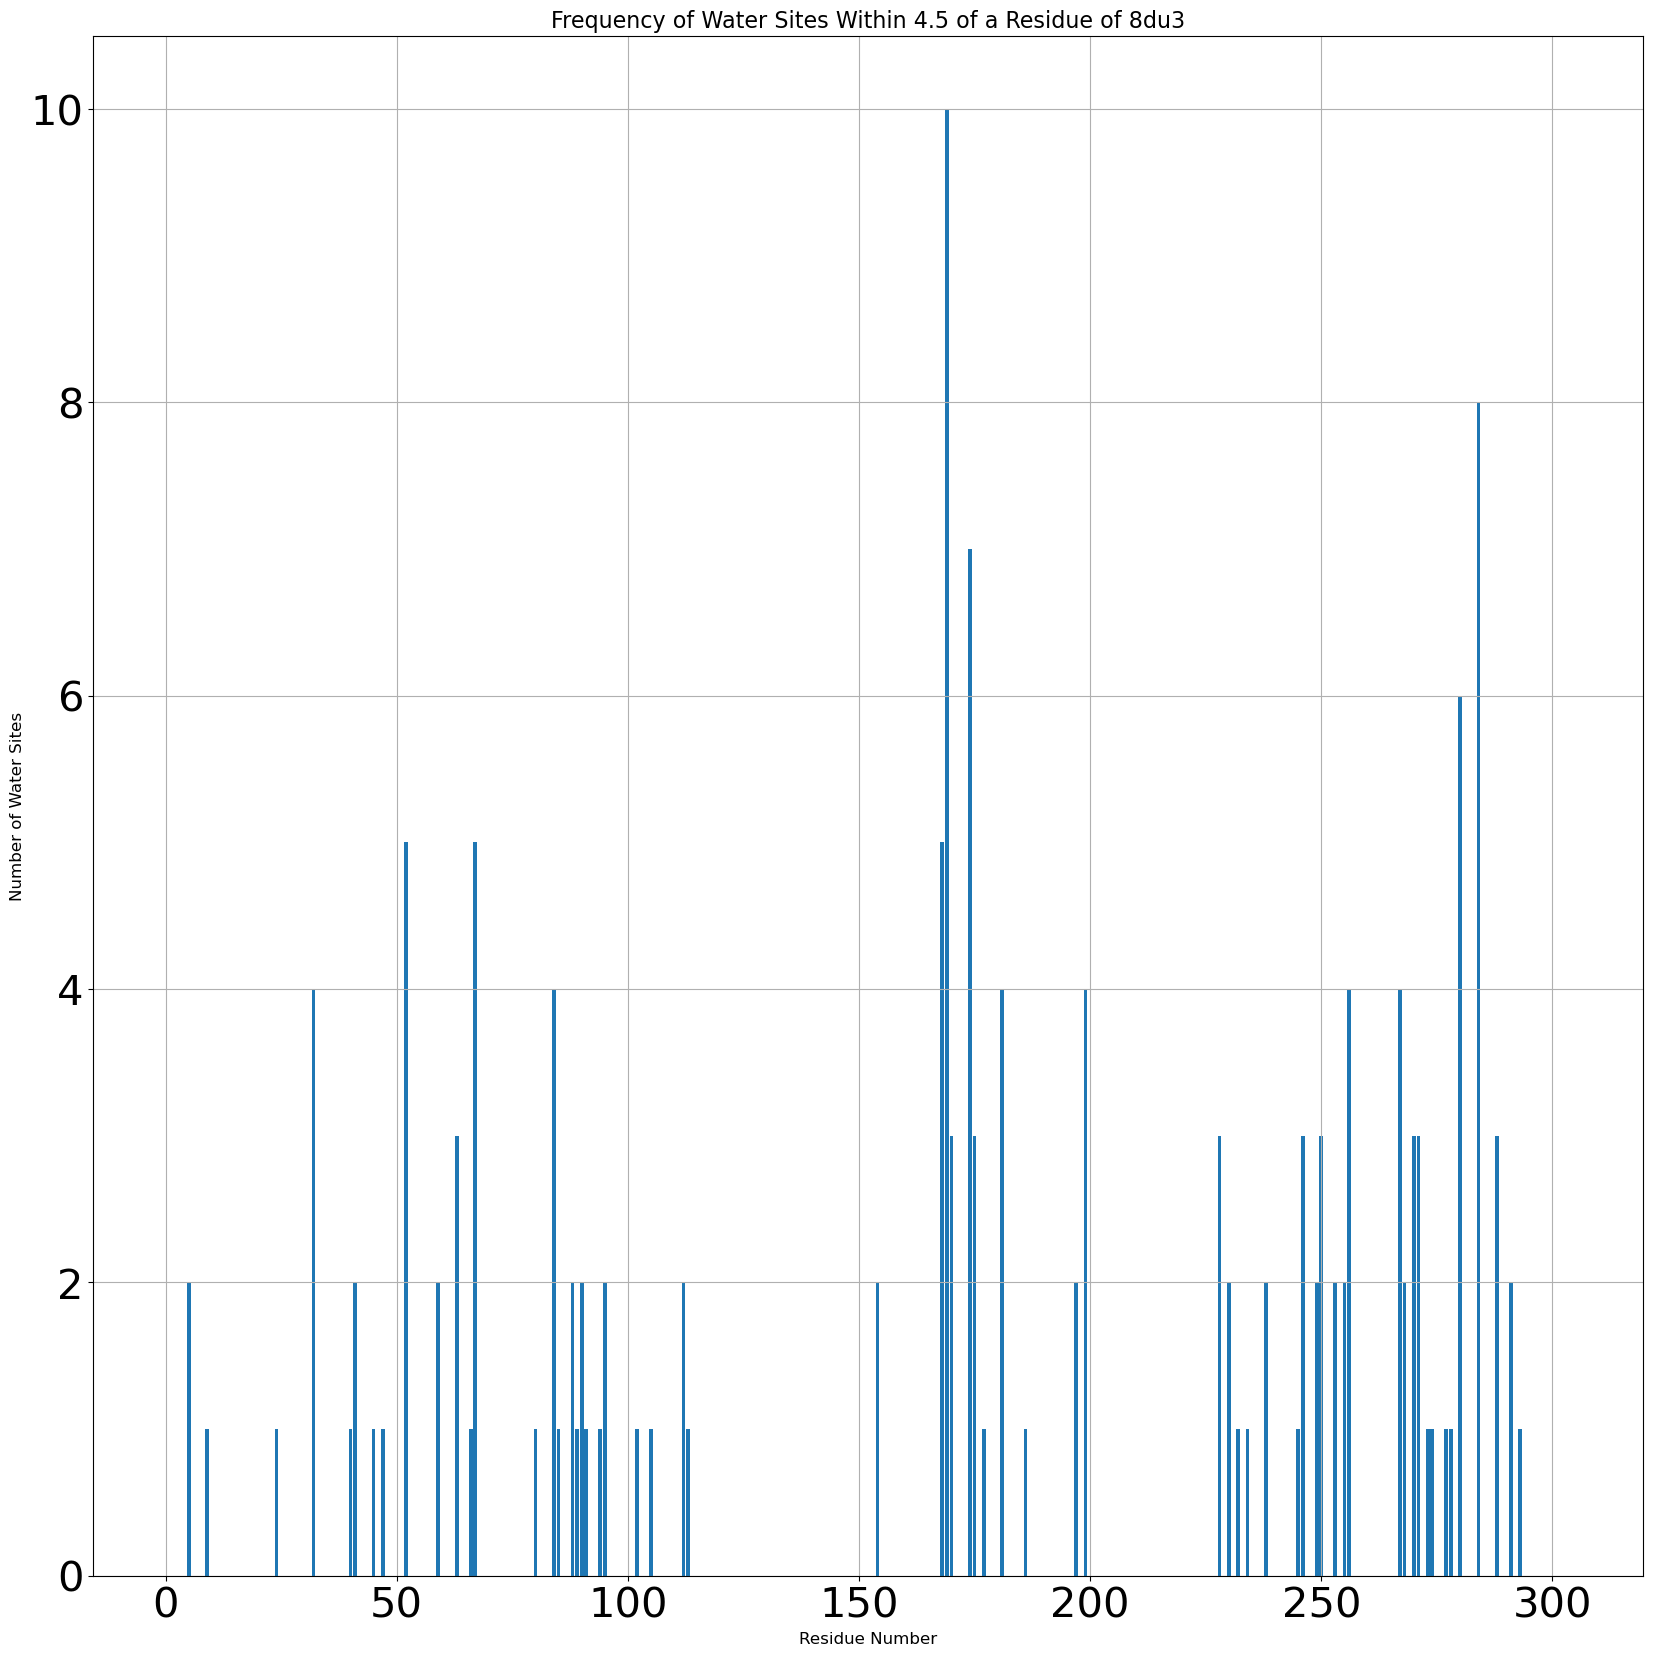

5iub  Watersite Resid : [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 7, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 4, 2, 0, 0, 5, 1, 0, 2, 1, 2, 3, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 14, 6, 0, 0, 0, 9, 5, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 7, 2, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 1, 0, 8, 1, 4, 0, 0, 2, 3, 0, 0, 2, 0, 2, 13, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 0, 0, 5, 0, 1, 3, 0, 0, 2, 3, 0, 6, 0, 1, 0, 7, 1, 0, 0, 5, 0, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0]



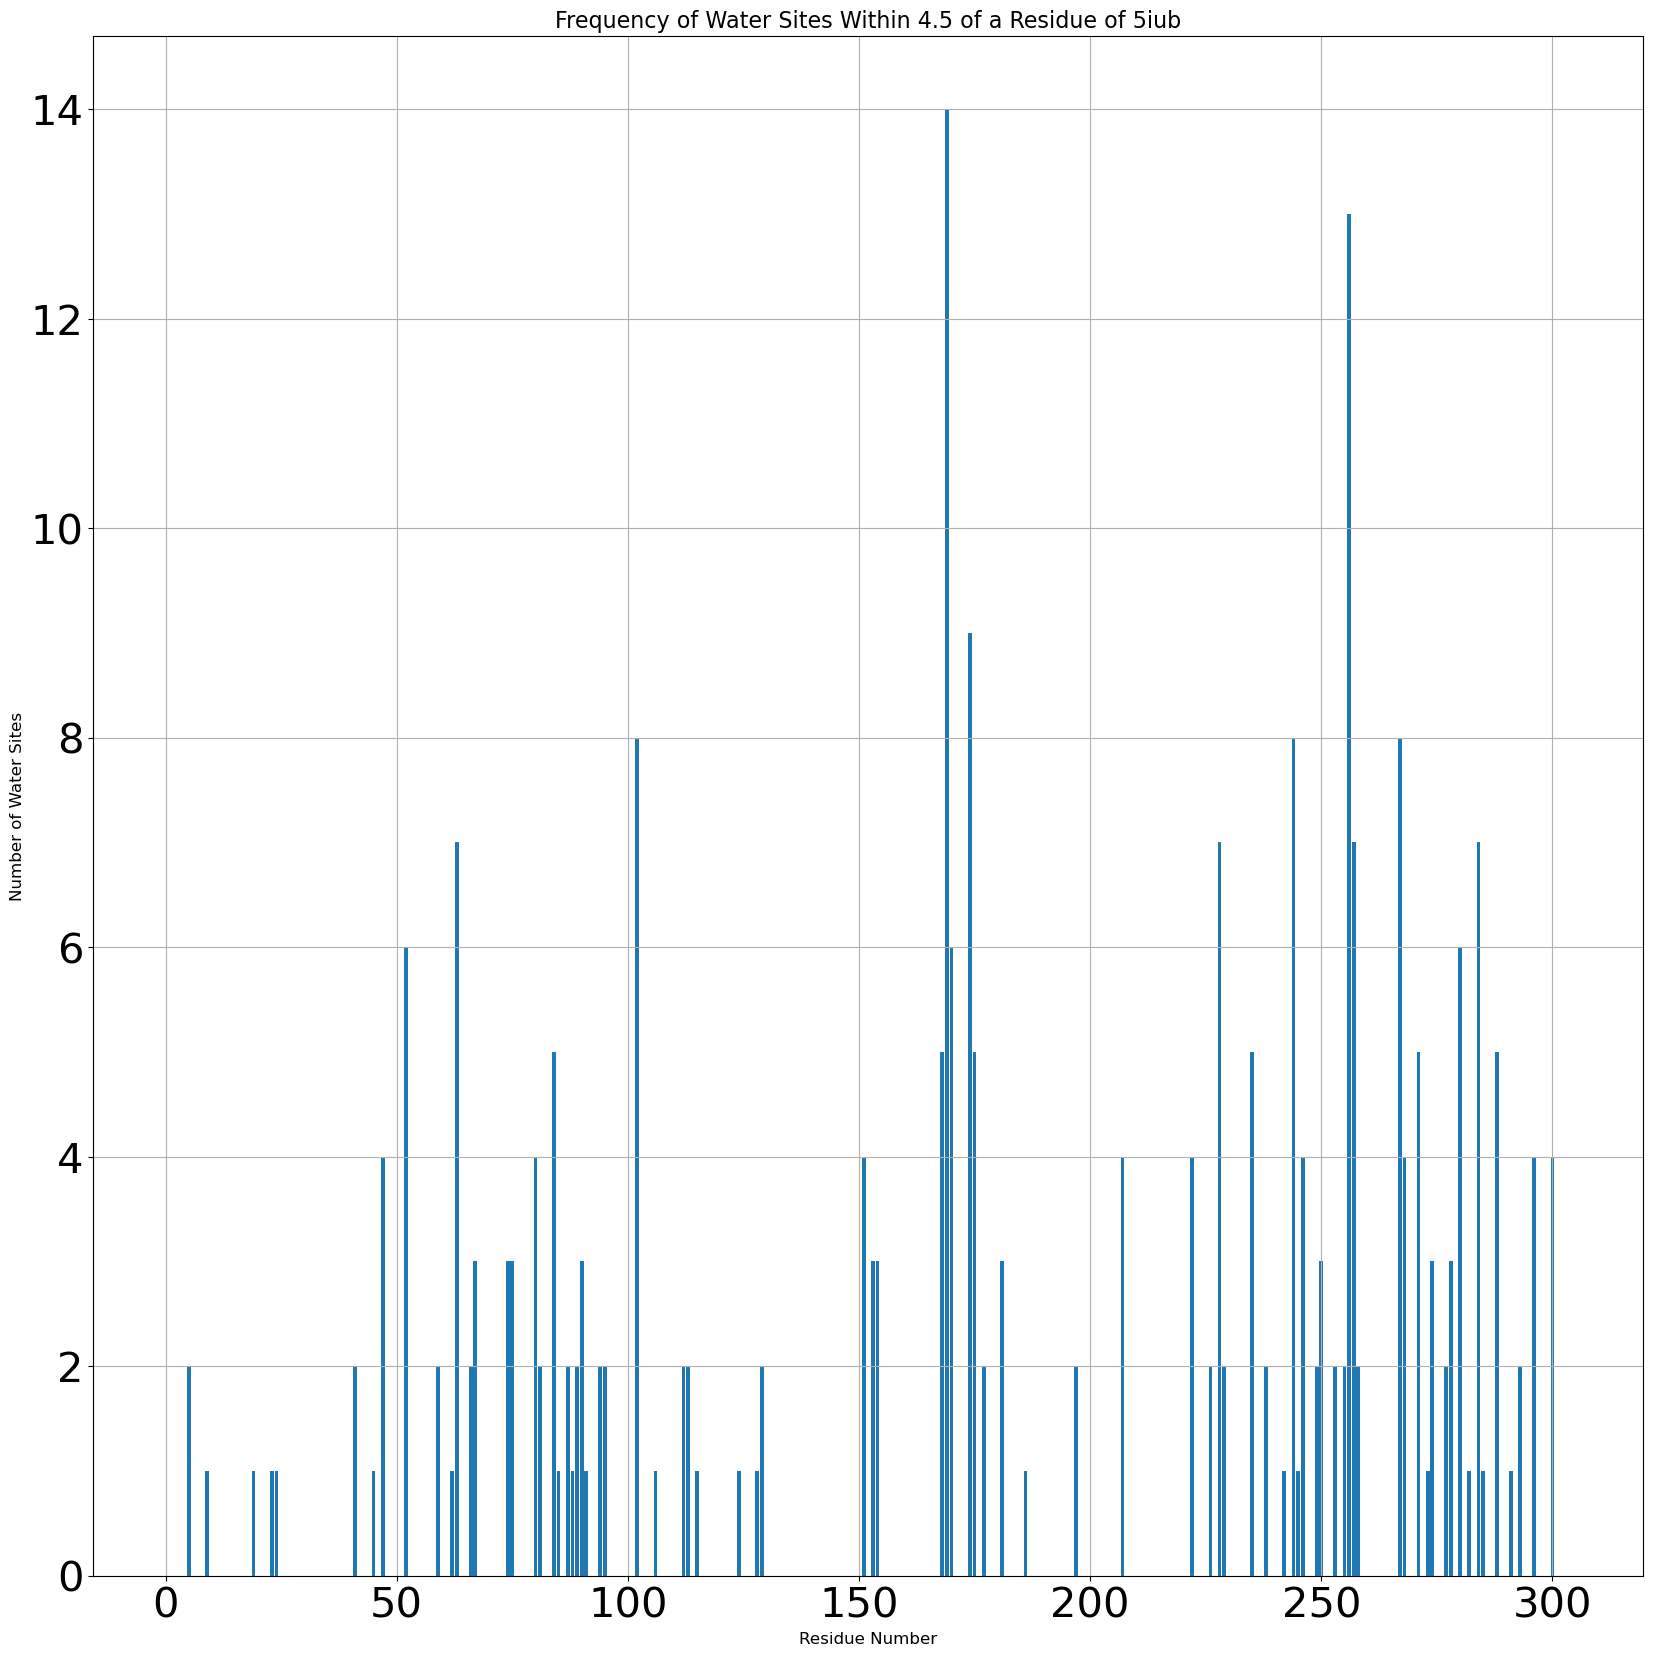

5mzj  Watersite Resid : [0, 0, 2, 3, 0, 3, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 1, 4, 0, 0, 0, 3, 0, 3, 2, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 3, 5, 4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 4, 3, 0, 1, 5, 1, 0, 1, 3, 2, 3, 1, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 7, 1, 5, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 21, 11, 0, 0, 0, 12, 2, 0, 1, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 5, 0, 4, 4, 8, 0, 6, 0, 0, 0, 1, 4, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 4, 0, 0, 2, 2, 0, 0, 3, 0, 2, 9, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 3, 7, 0, 1, 2, 0, 0, 1, 3, 0, 6, 0, 1, 0, 6, 1, 0, 0, 6, 0, 0, 5, 0, 5, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0]



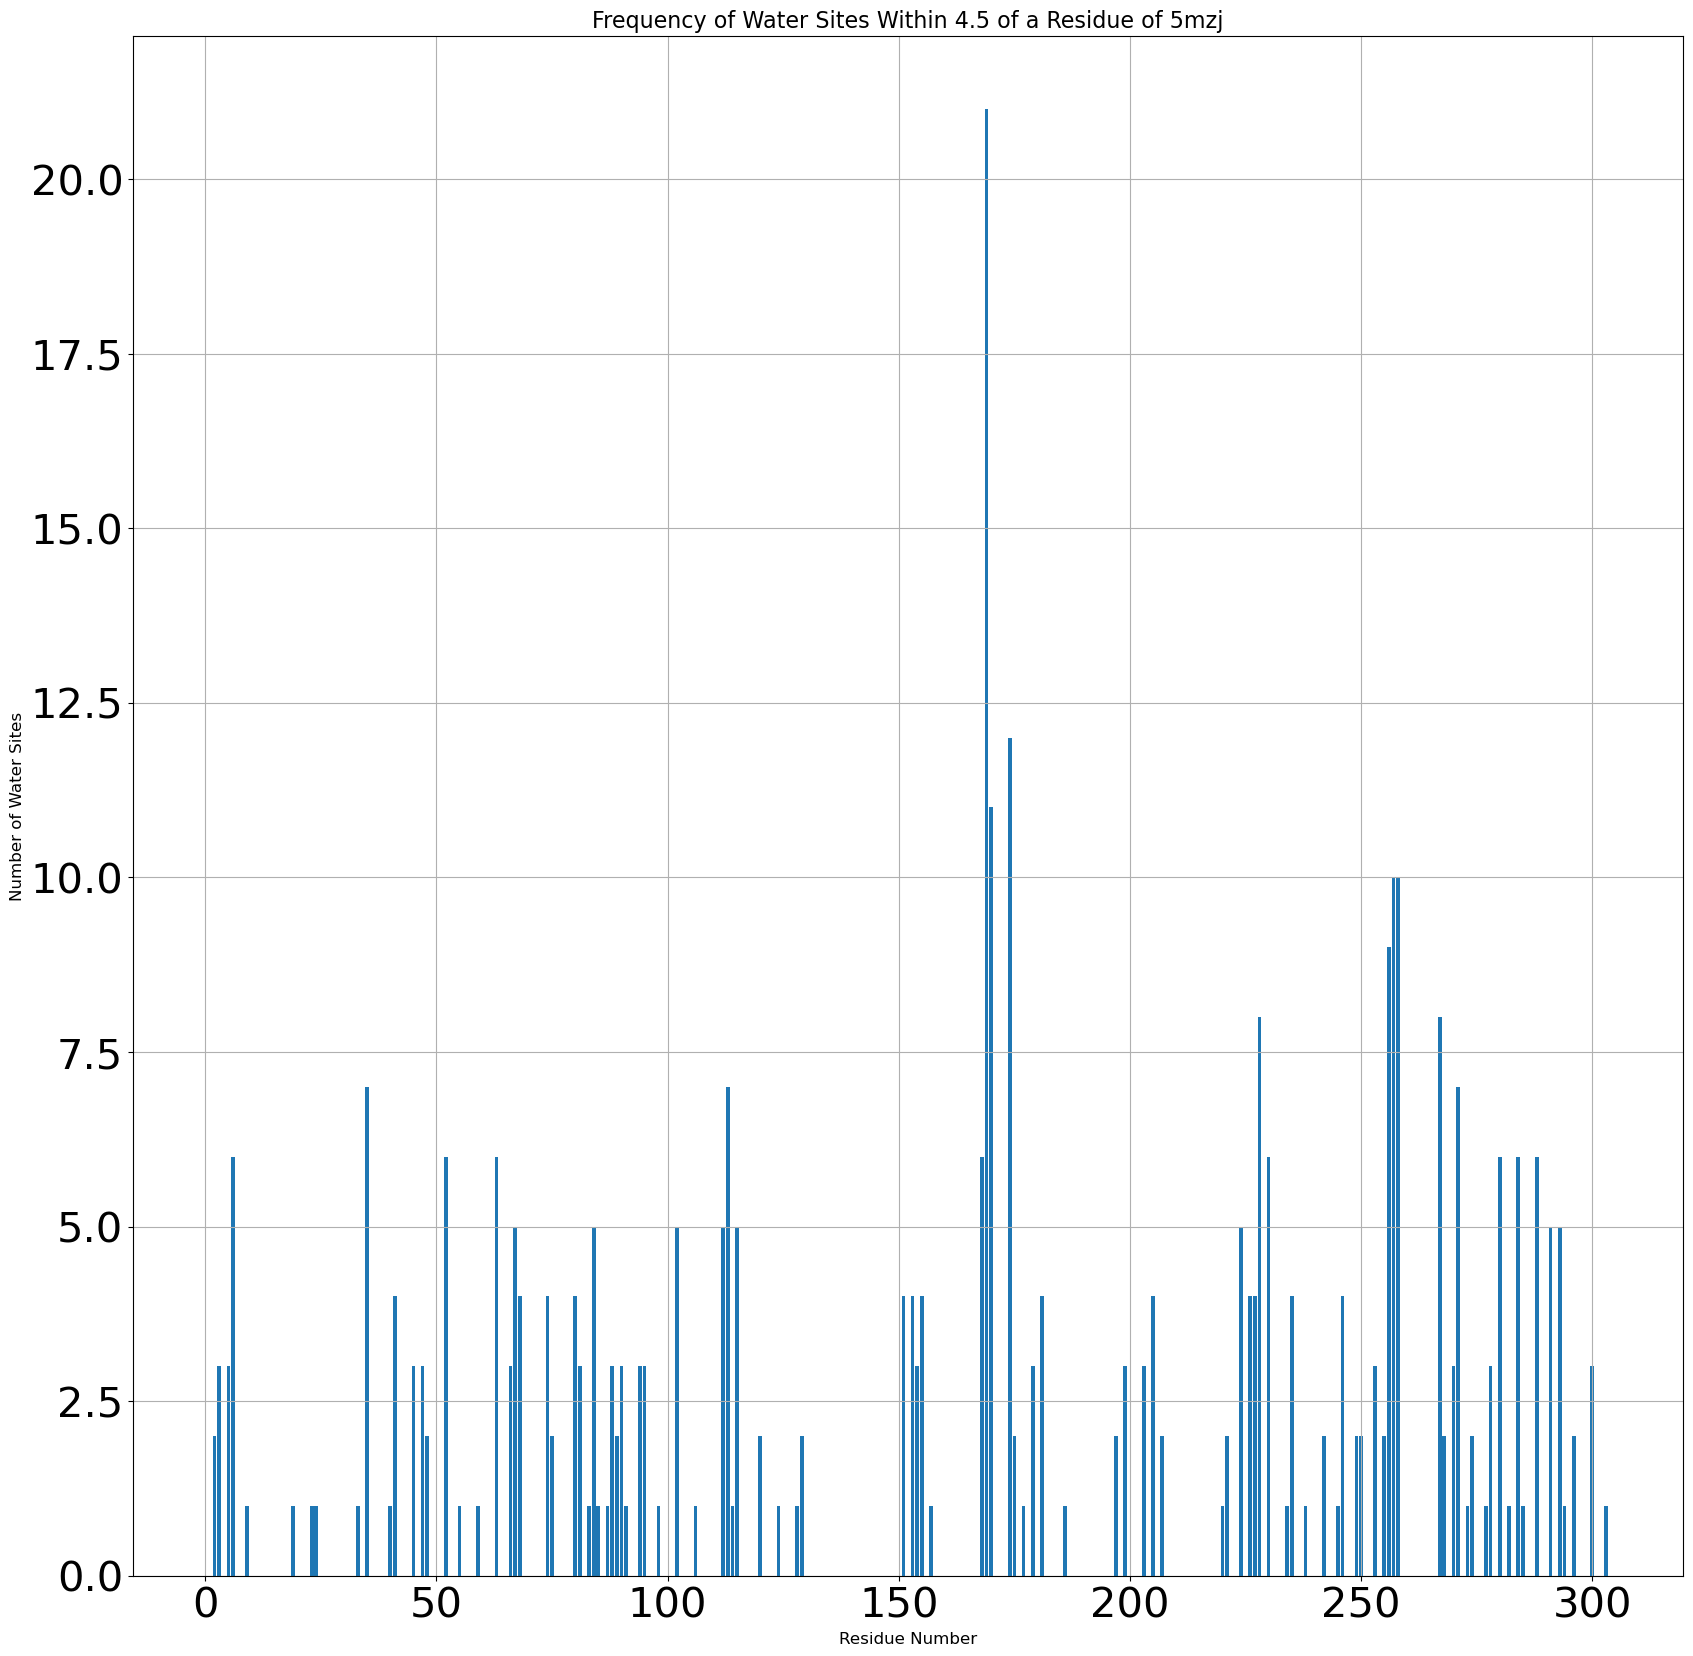

7px4  Watersite Resid : [0, 0, 13, 6, 0, 3, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 7, 0, 1, 0, 0, 4, 5, 5, 3, 1, 1, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 9, 1, 0, 4, 1, 11, 0, 0, 0, 0, 0, 1, 13, 1, 0, 0, 0, 2, 2, 0, 1, 6, 1, 0, 0, 2, 2, 2, 3, 0, 1, 3, 1, 0, 1, 0, 0, 0, 0, 10, 7, 0, 5, 2, 5, 0, 0, 0, 7, 7, 7, 10, 4, 0, 0, 4, 3, 3, 0, 5, 3, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 1, 1, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 11, 8, 0, 0, 0, 11, 12, 0, 2, 0, 5, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3, 0, 0, 1, 1, 0, 9, 5, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 6, 1, 0, 7, 0, 1, 12, 12, 0, 10, 9, 2, 0, 1, 4, 0, 2, 1, 1, 0, 6, 2, 0, 7, 1, 4, 0, 1, 2, 2, 0, 0, 2, 0, 1, 13, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 12, 11, 1, 0, 3, 2, 1, 0, 0, 0, 2, 6, 0, 3, 0, 1, 0, 5, 1, 0, 2, 3, 0, 4, 11, 0, 8, 2, 0, 2, 3, 0, 0, 1, 2, 0, 4, 7]



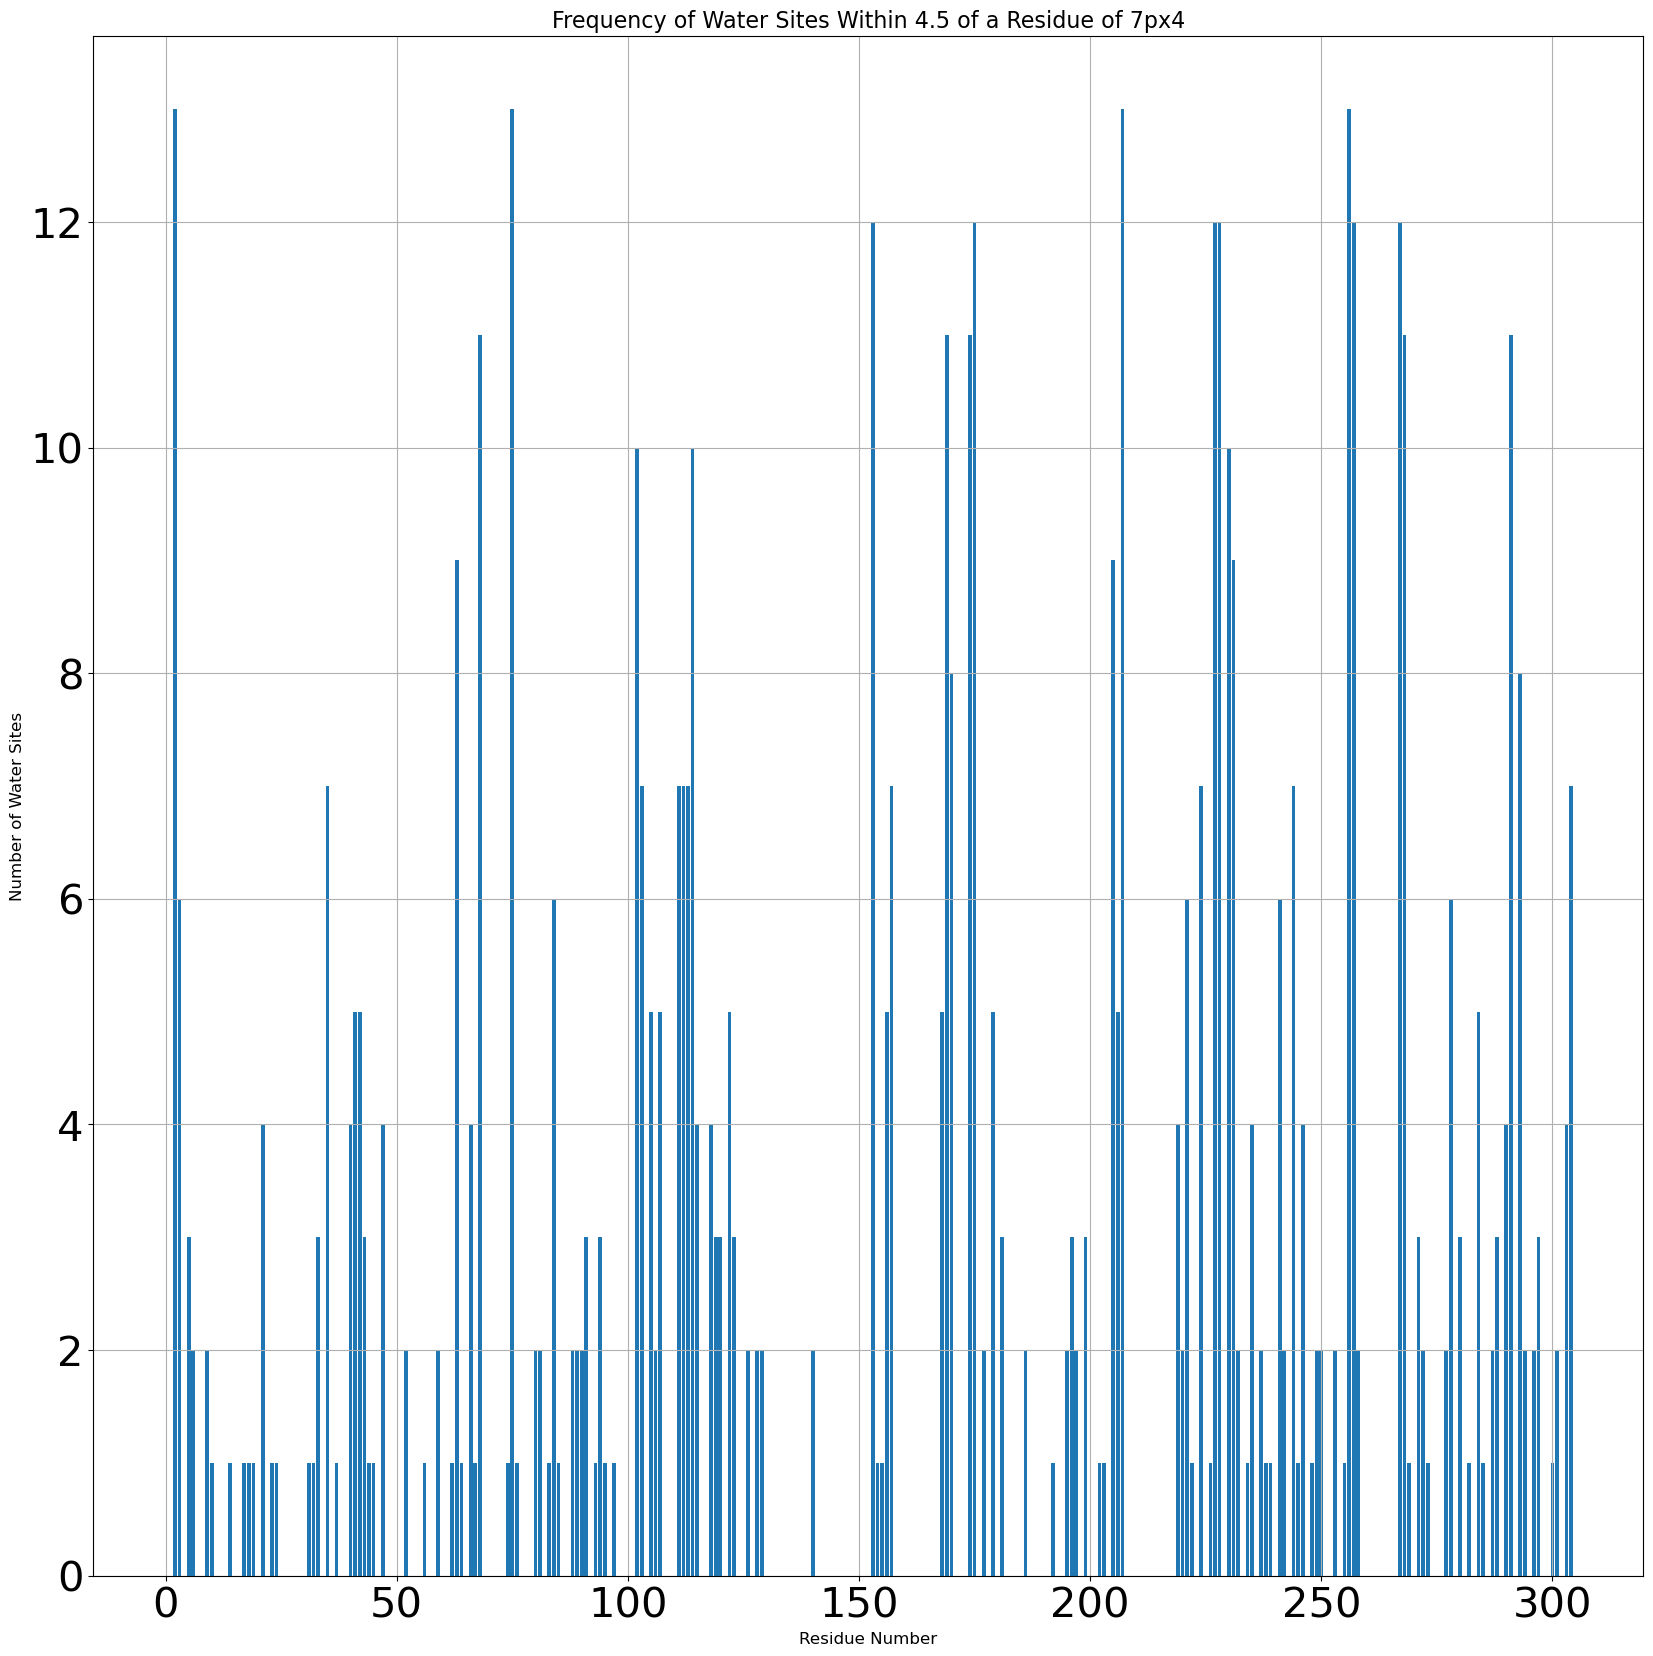

5iua  Watersite Resid : [0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 3, 1, 0, 0, 2, 0, 4, 1, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 4, 0, 0, 10, 4, 8, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 4, 3, 0, 1, 6, 1, 0, 1, 1, 2, 4, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 11, 8, 0, 0, 0, 11, 4, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 6, 5, 0, 8, 3, 1, 0, 1, 6, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 4, 0, 0, 2, 0, 2, 16, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 6, 0, 1, 1, 0, 0, 1, 4, 0, 6, 0, 1, 0, 6, 1, 0, 0, 6, 0, 1, 5, 0, 3, 2, 0, 2, 0, 1, 0, 2, 3, 0, 1, 1]



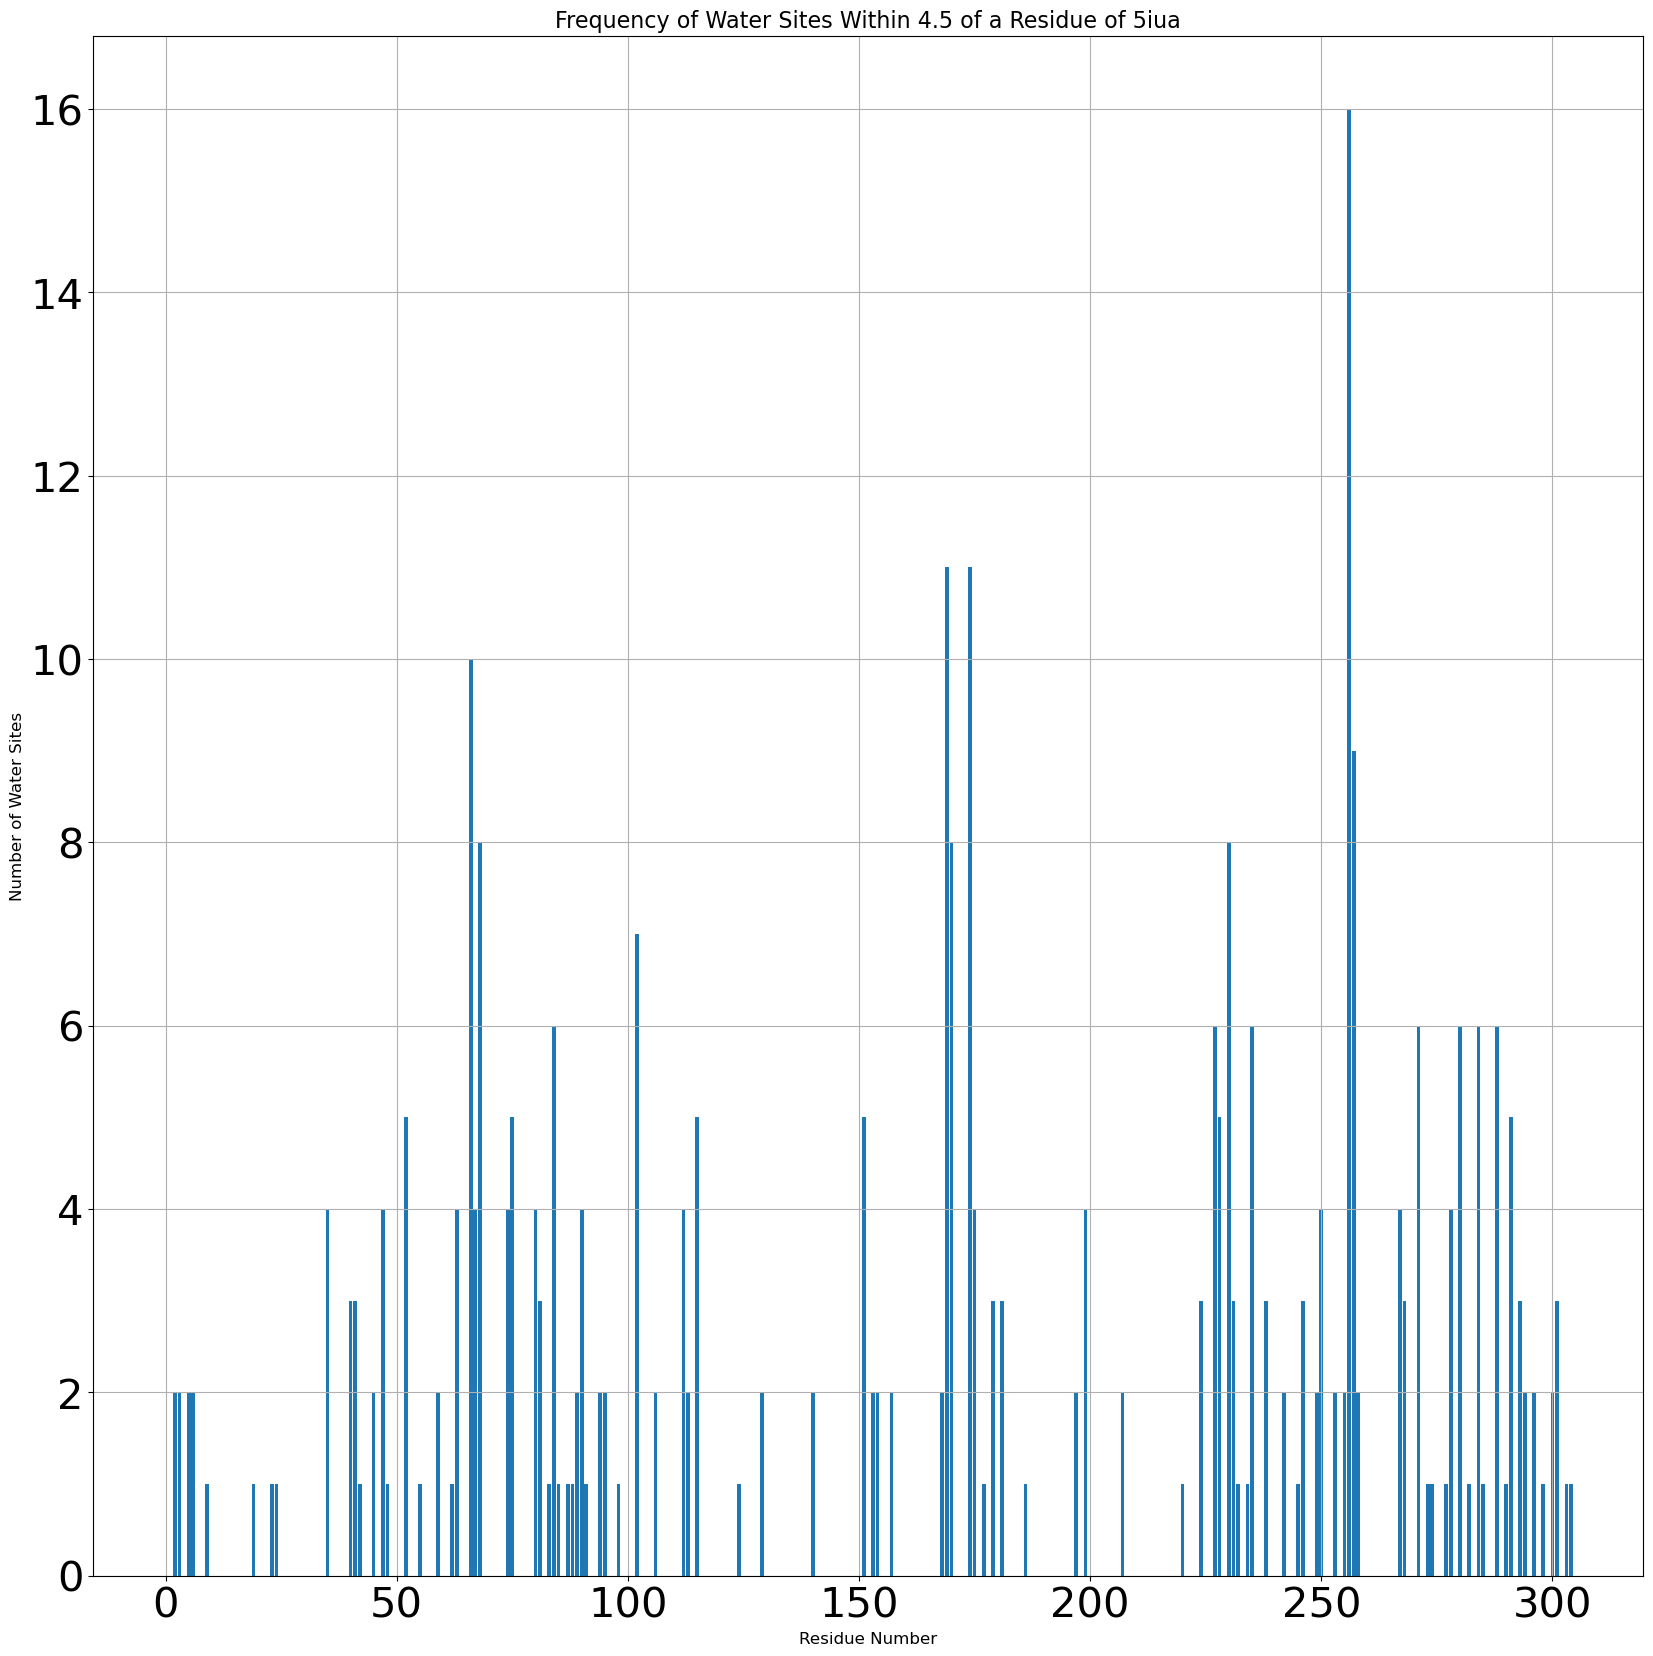

7ezc  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



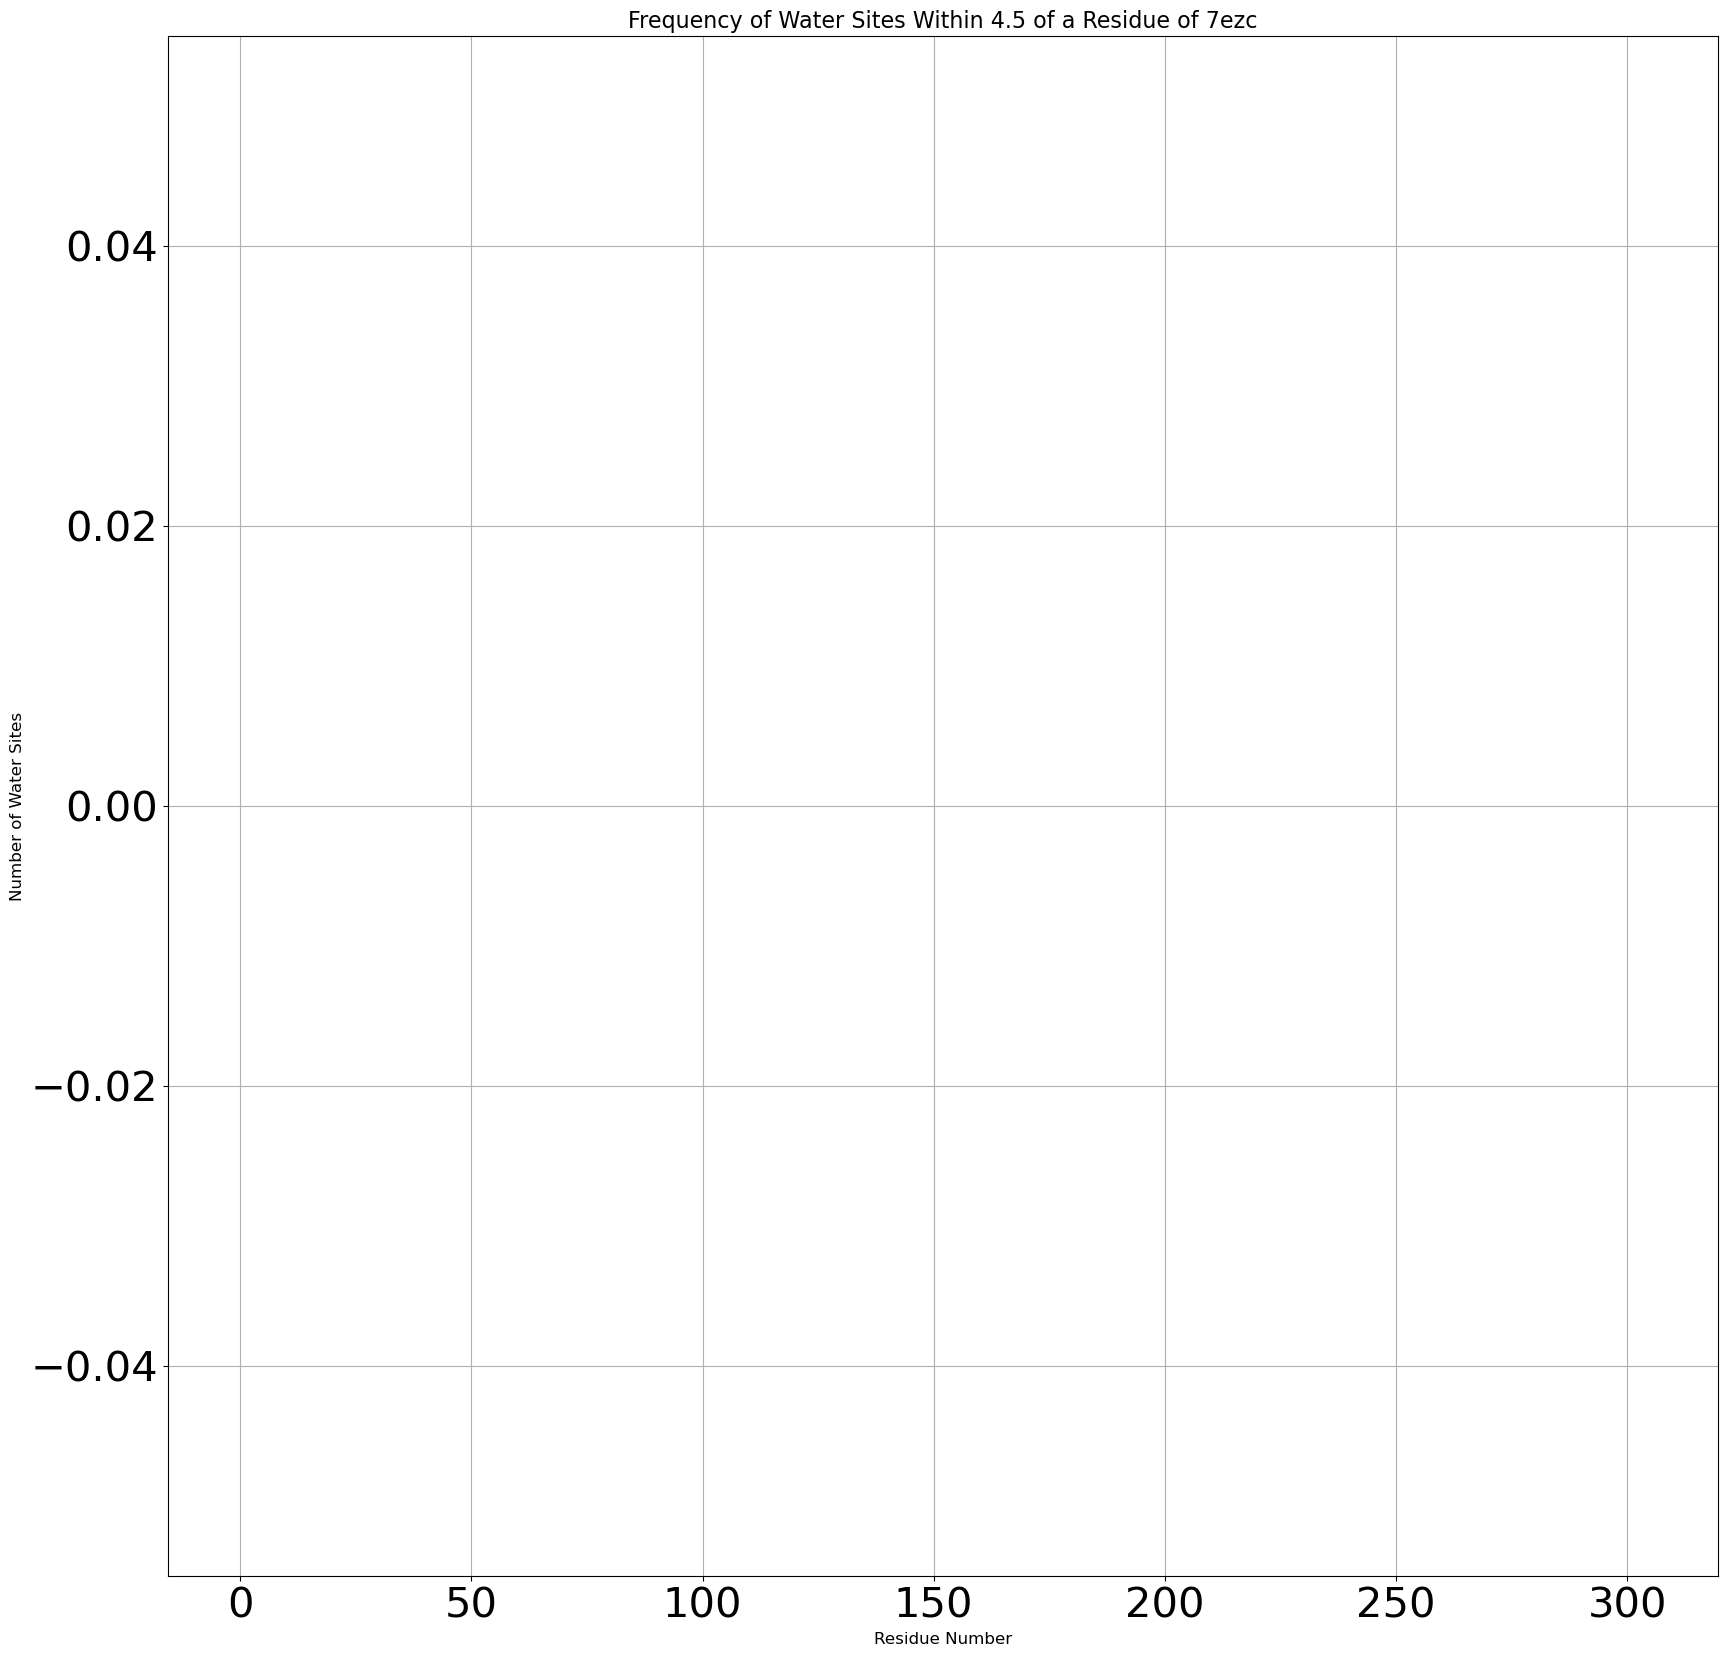

6zdv  Watersite Resid : [0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 1, 4, 3, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 2, 3, 0, 1, 4, 1, 0, 1, 1, 2, 4, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 17, 7, 0, 0, 0, 6, 9, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 8, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 1, 5, 0, 1, 0, 0, 0, 1, 3, 0, 5, 0, 1, 0, 9, 1, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



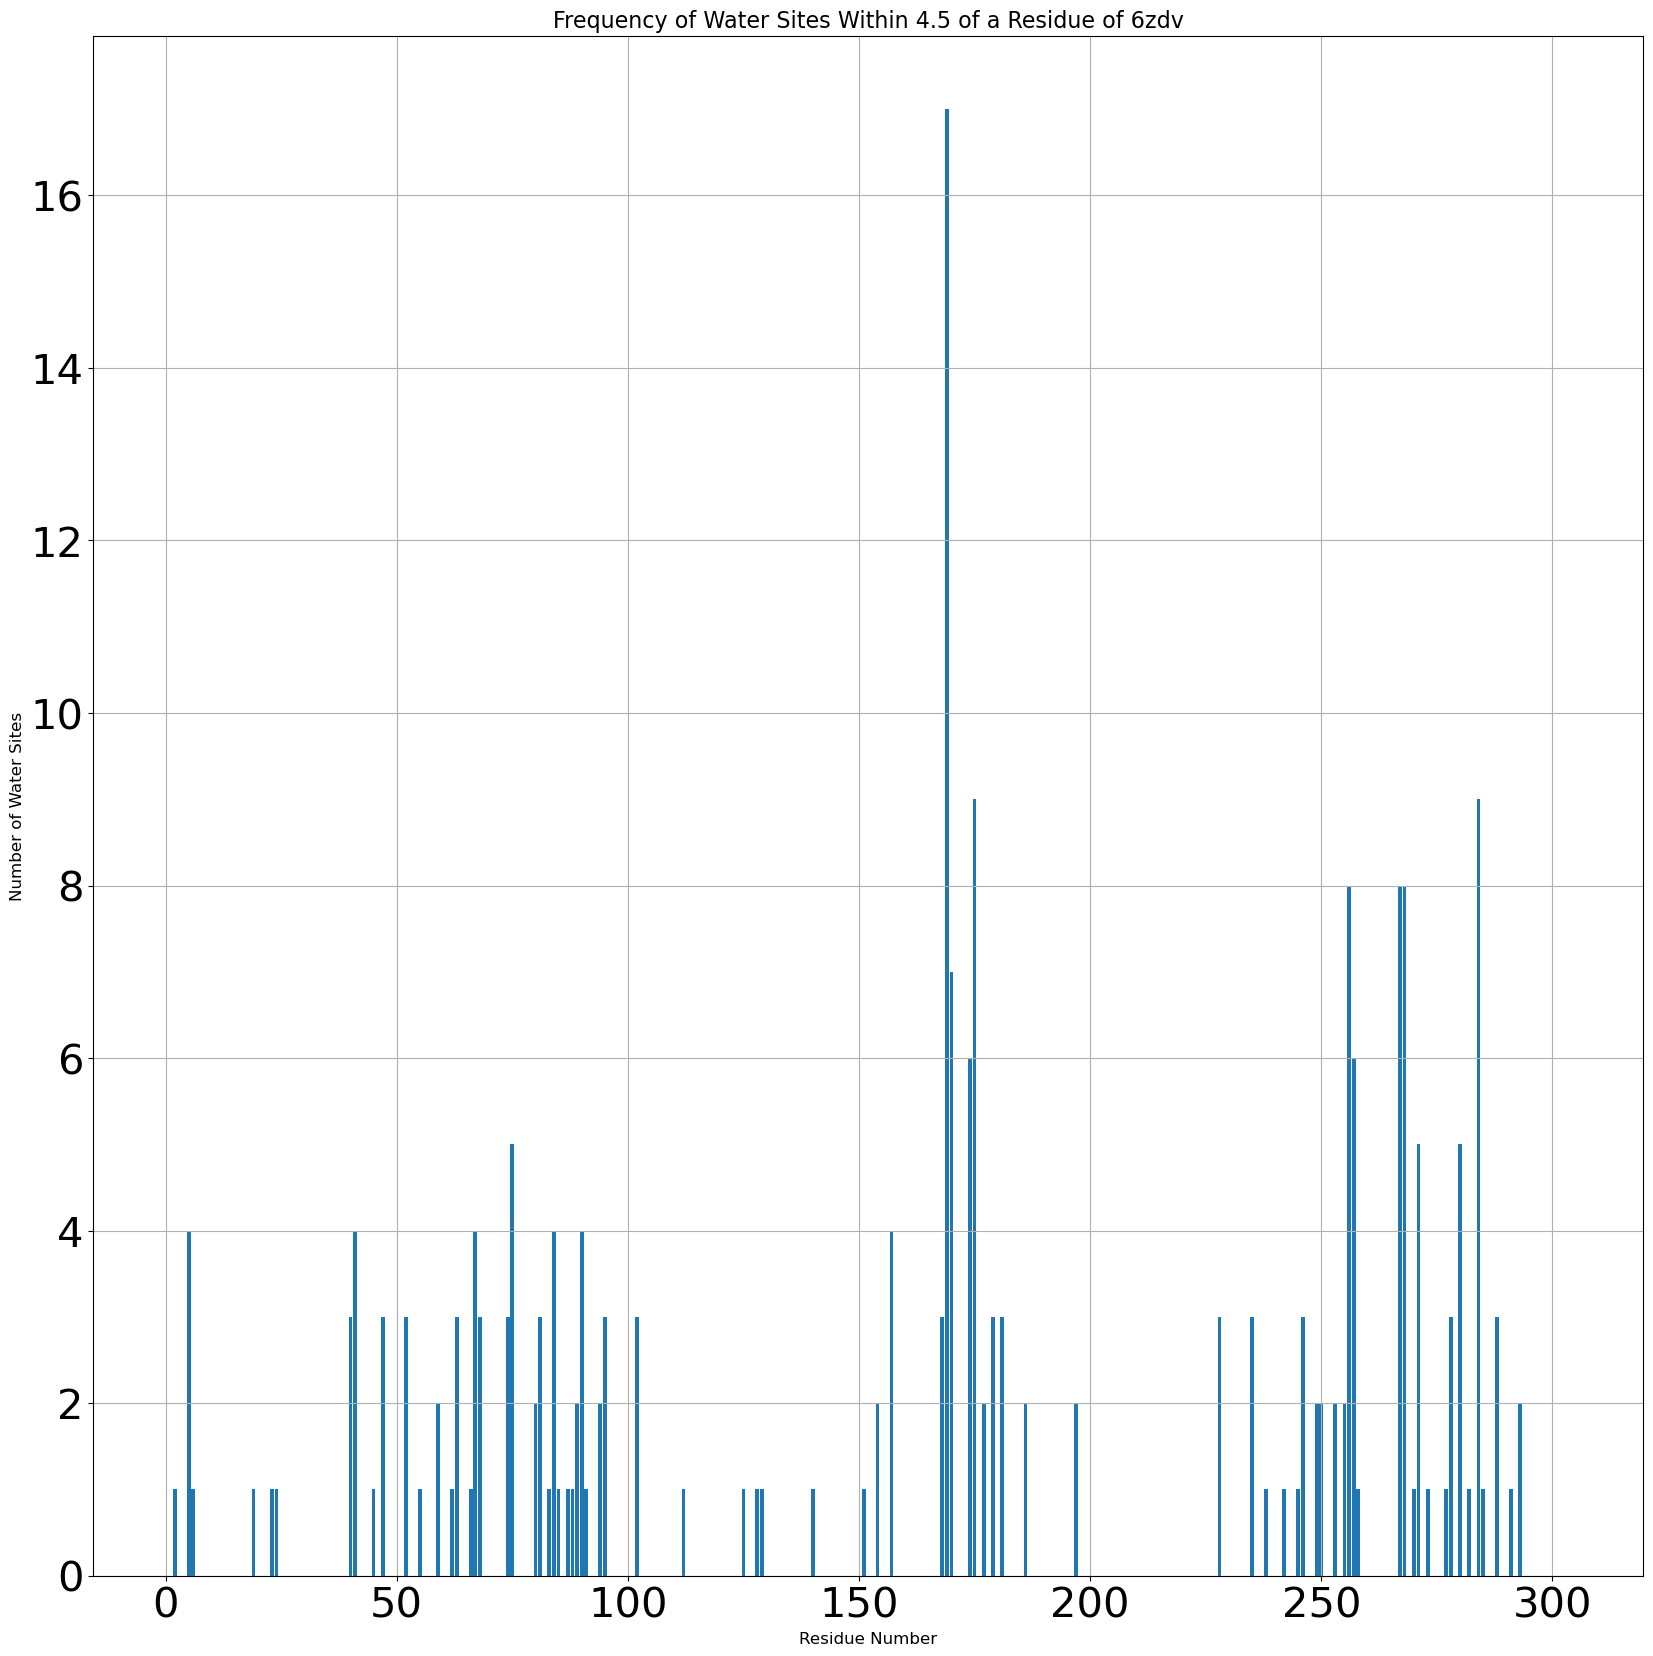

6mh8  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



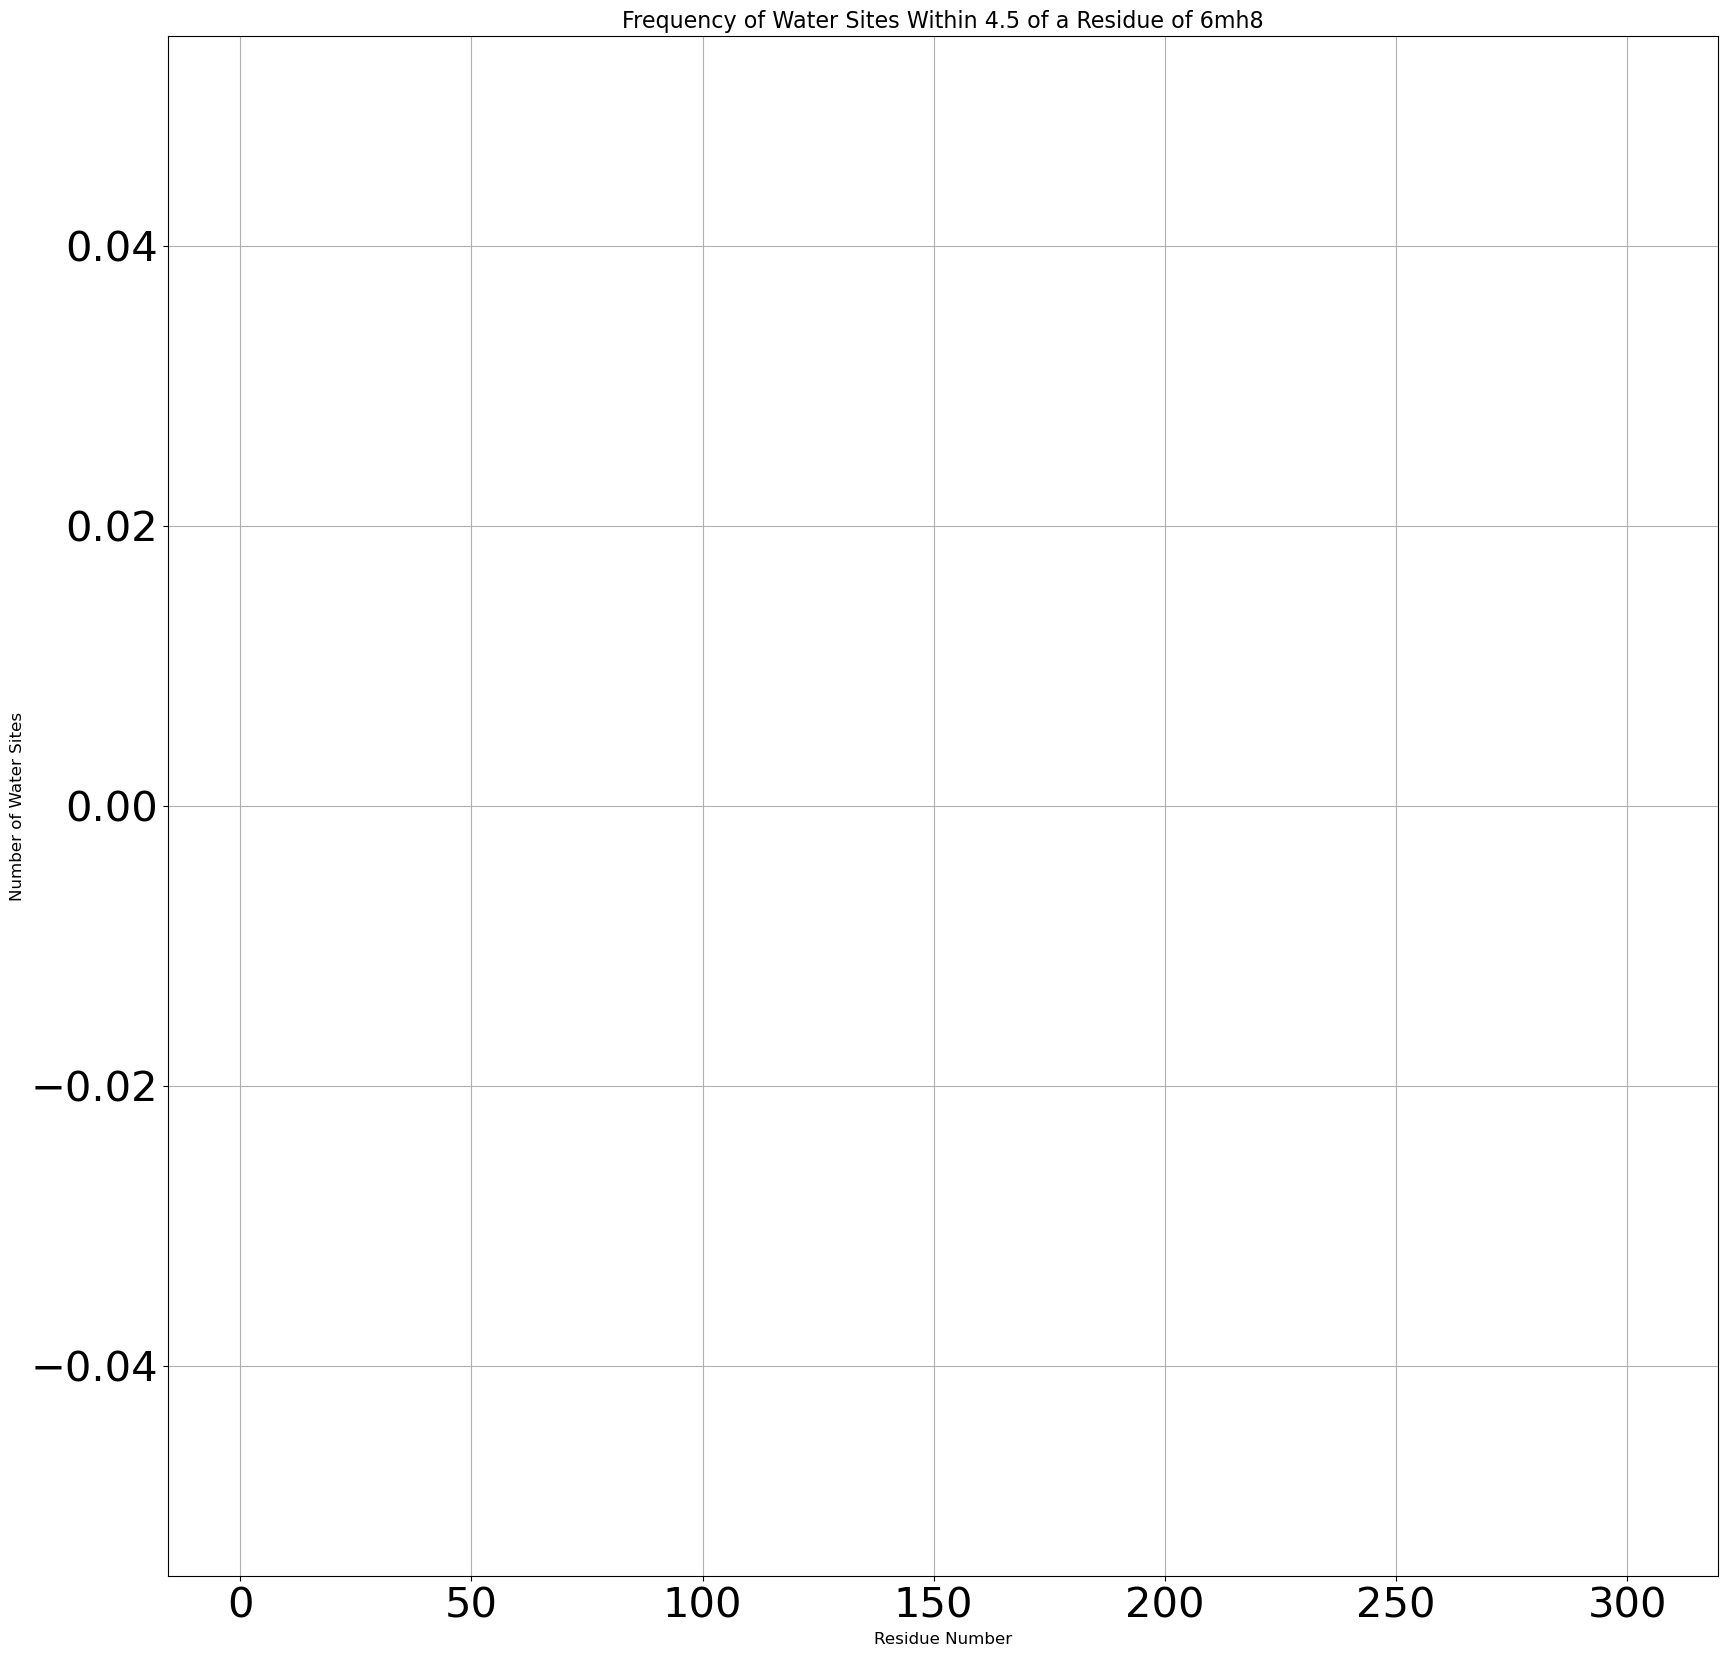

6ps7  Watersite Resid : [0, 0, 3, 3, 0, 2, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 4, 2, 5, 0, 0, 1, 0, 3, 2, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 8, 0, 0, 9, 2, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 2, 2, 0, 1, 6, 1, 0, 1, 6, 1, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 14, 9, 0, 0, 0, 11, 9, 0, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 4, 6, 1, 0, 1, 3, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 6, 0, 0, 3, 2, 0, 0, 2, 0, 3, 6, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 1, 2, 0, 0, 2, 4, 0, 7, 0, 1, 0, 6, 1, 0, 0, 3, 0, 0, 2, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1]



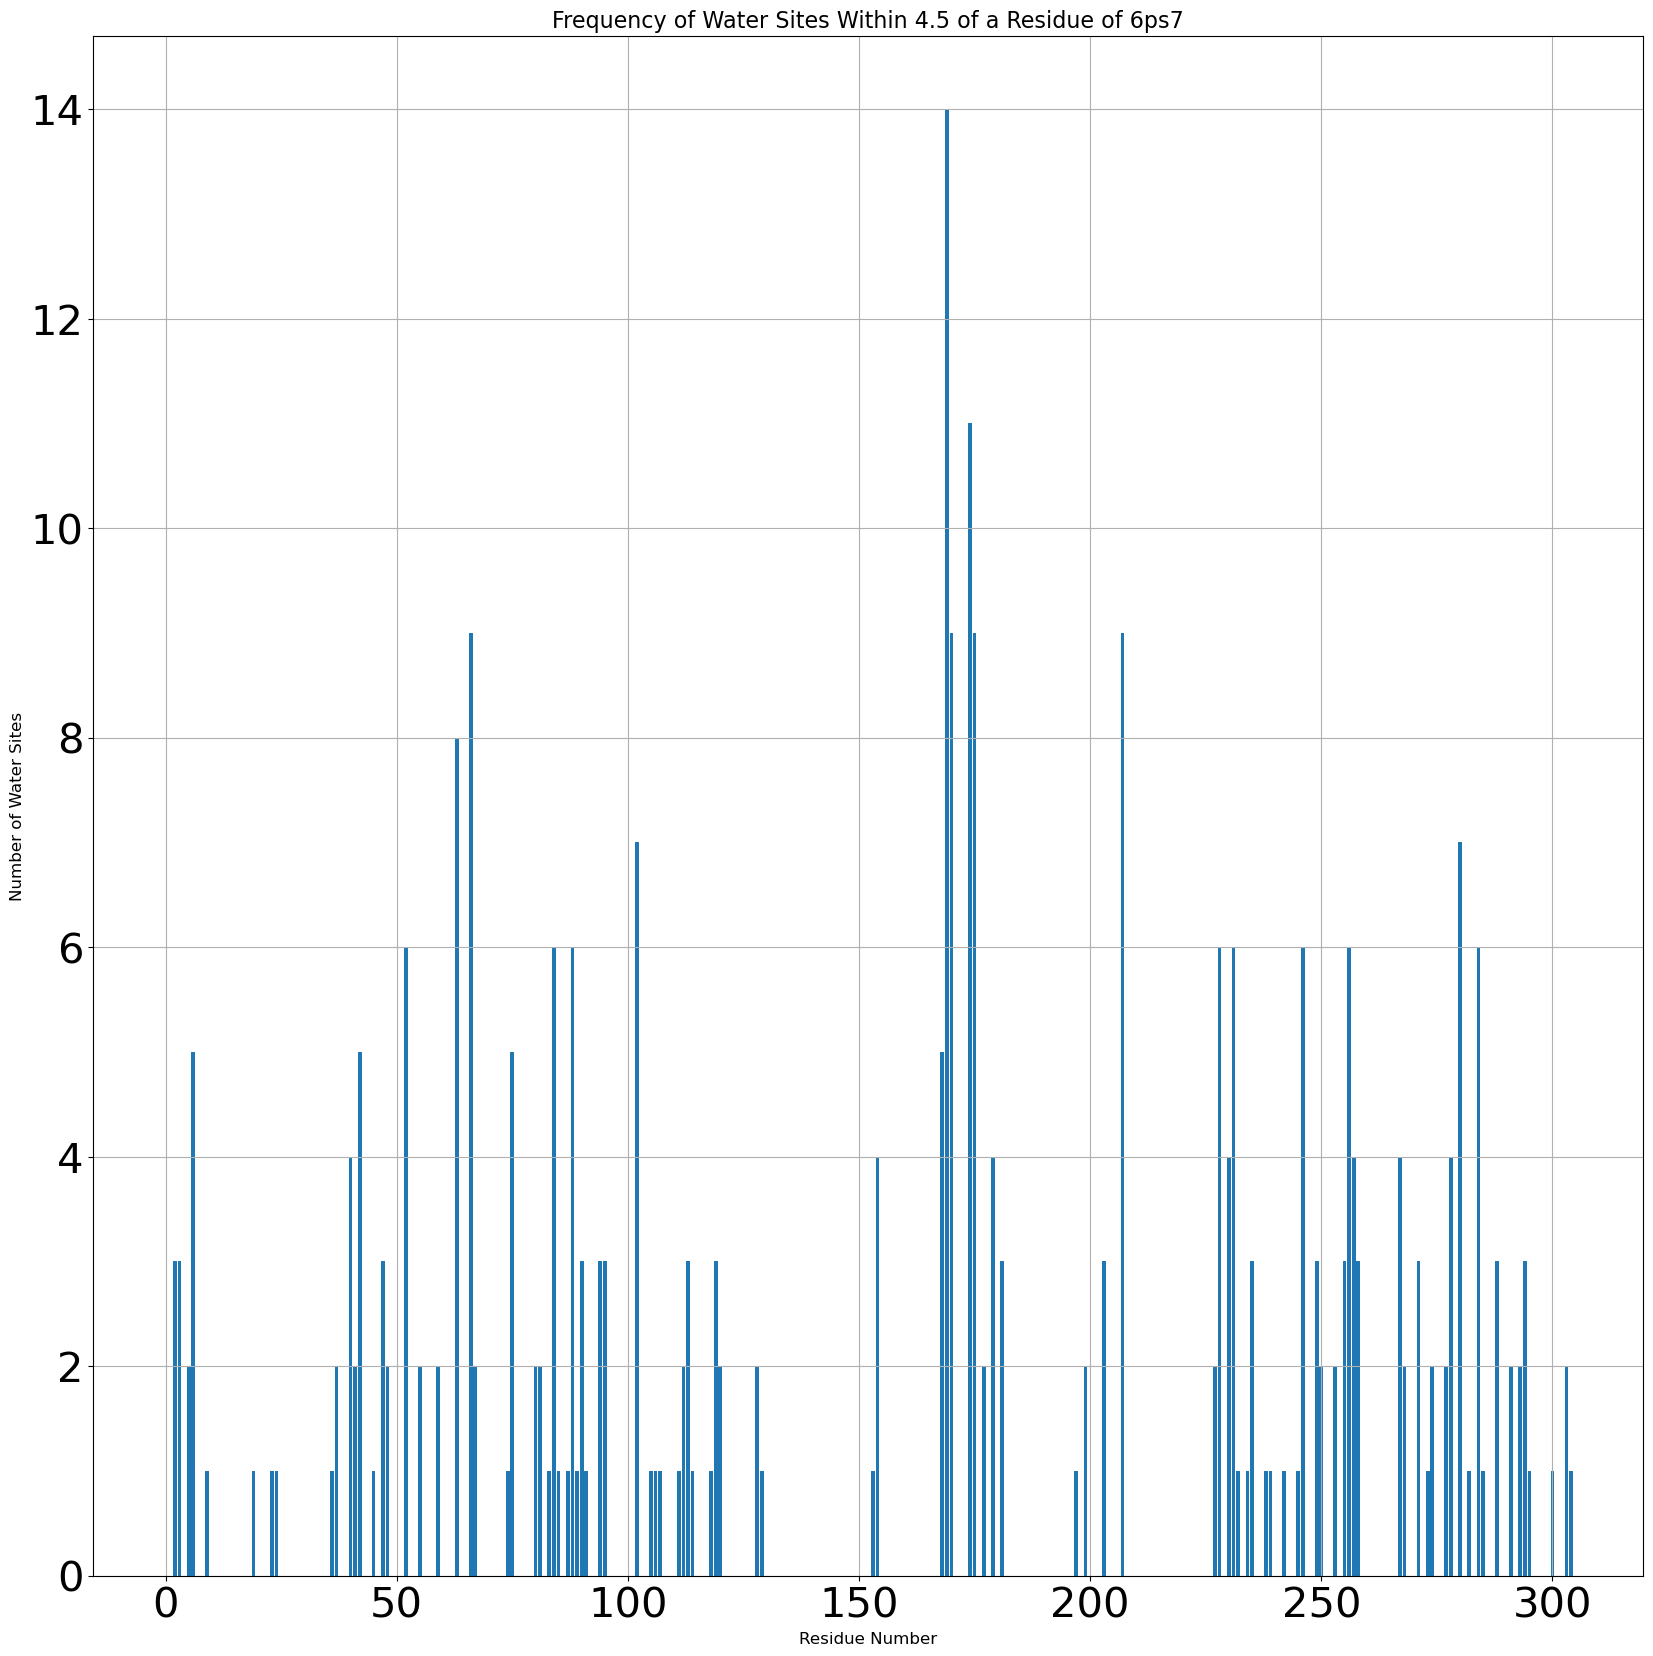

6zdr  Watersite Resid : [0, 0, 1, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 9, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 4, 15, 0, 0, 0, 0, 2, 2, 0, 1, 3, 1, 0, 1, 1, 2, 4, 1, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 16, 7, 0, 0, 0, 7, 15, 0, 1, 0, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 0, 3, 0, 2, 13, 13, 4, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 6, 0, 1, 0, 8, 1, 0, 0, 4, 0, 0, 1, 0, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]



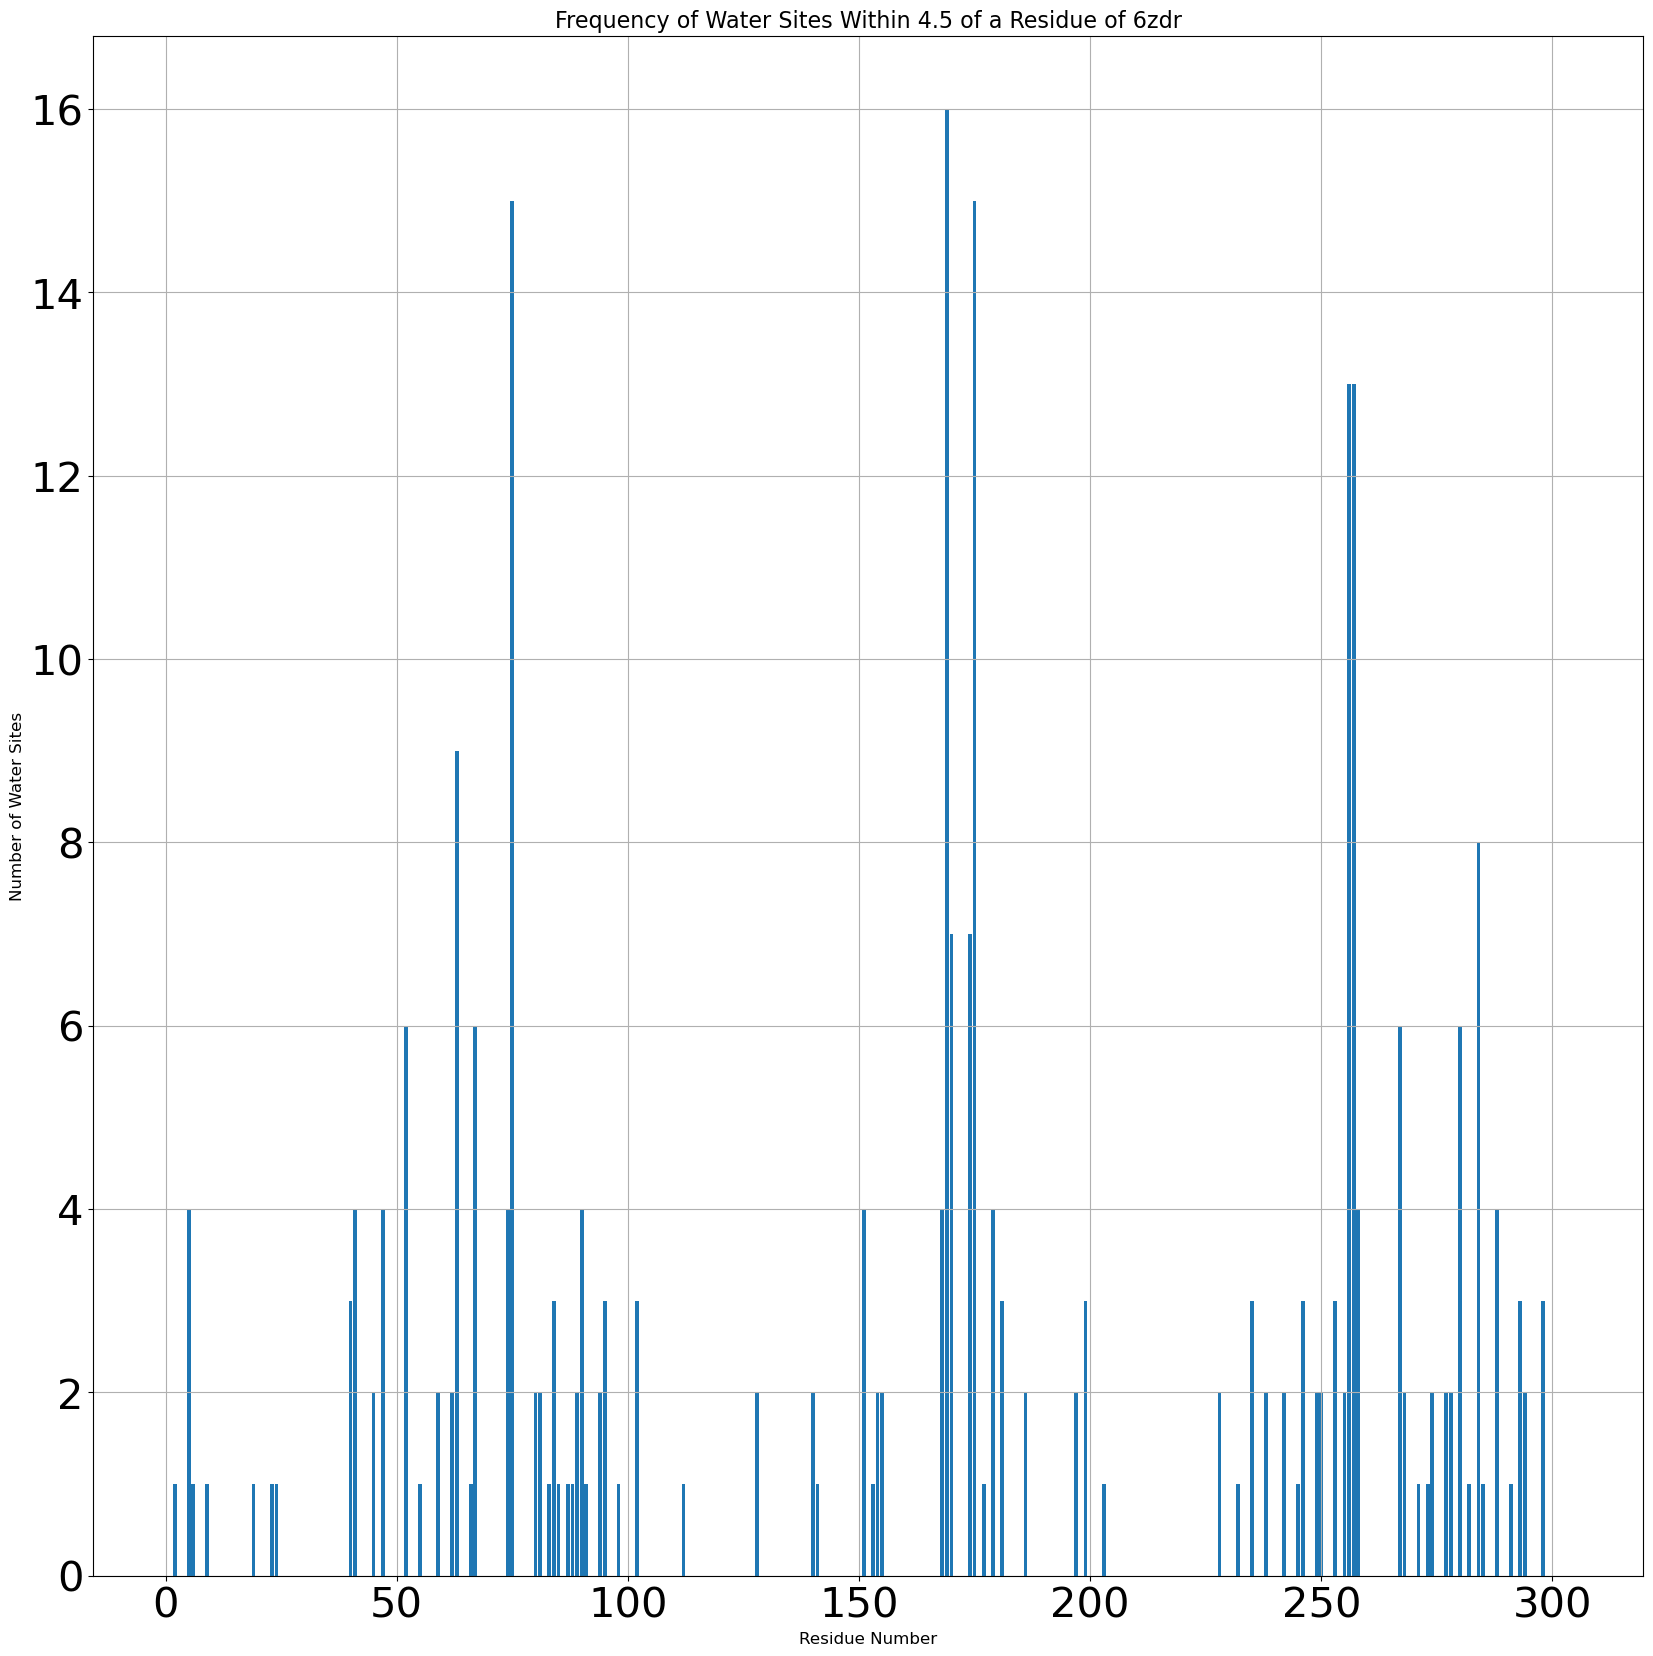

5n2r  Watersite Resid : [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 8, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 1, 0, 1, 0, 1, 4, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 6, 0, 3, 0, 8, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0]



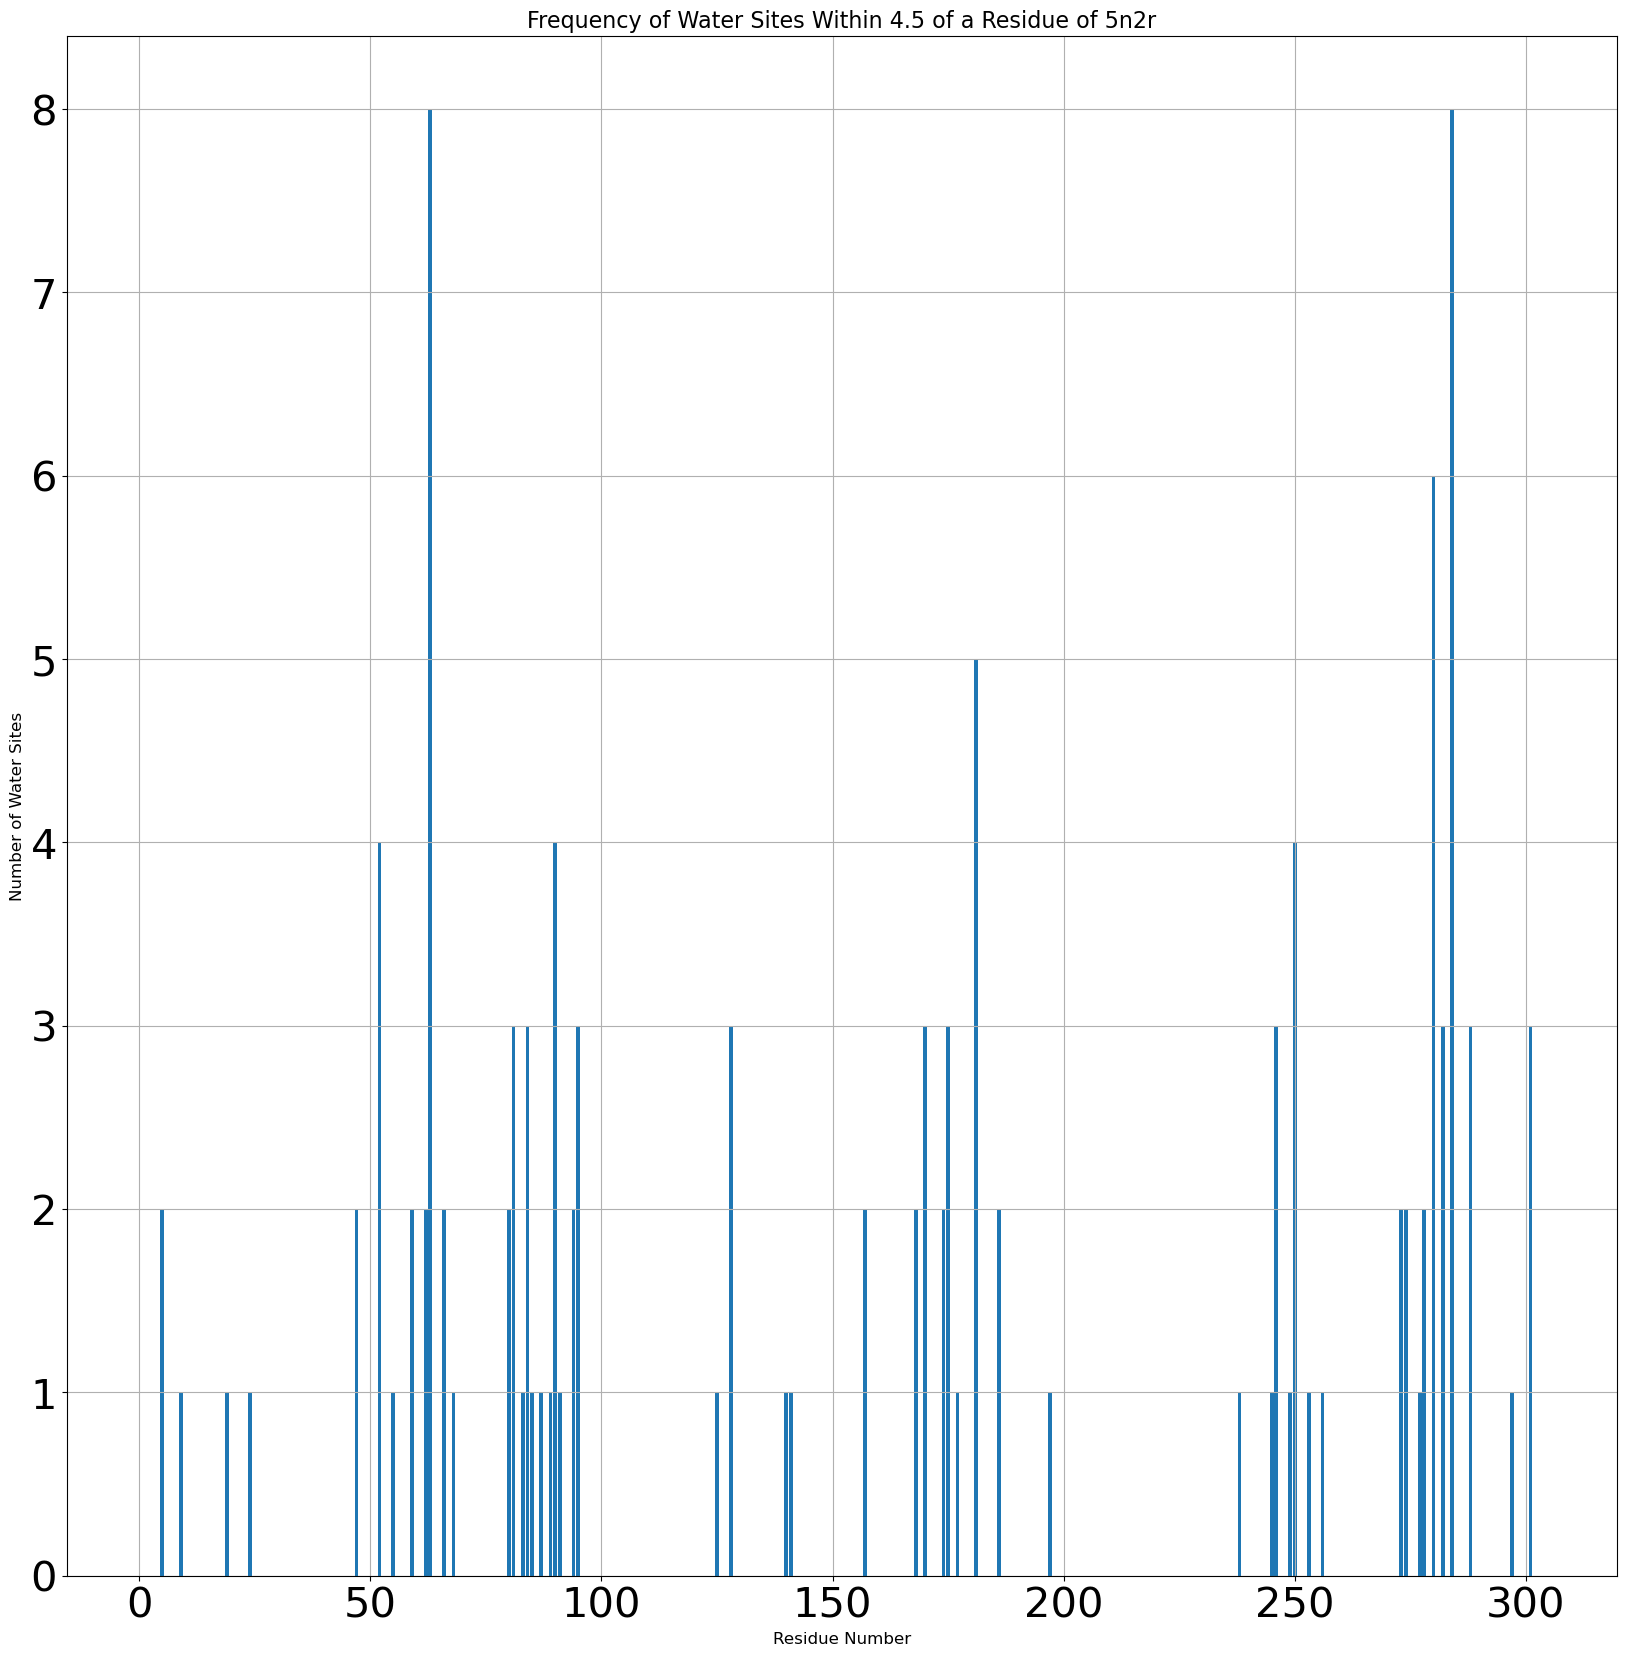

5nlx  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 4, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 5, 7, 6, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



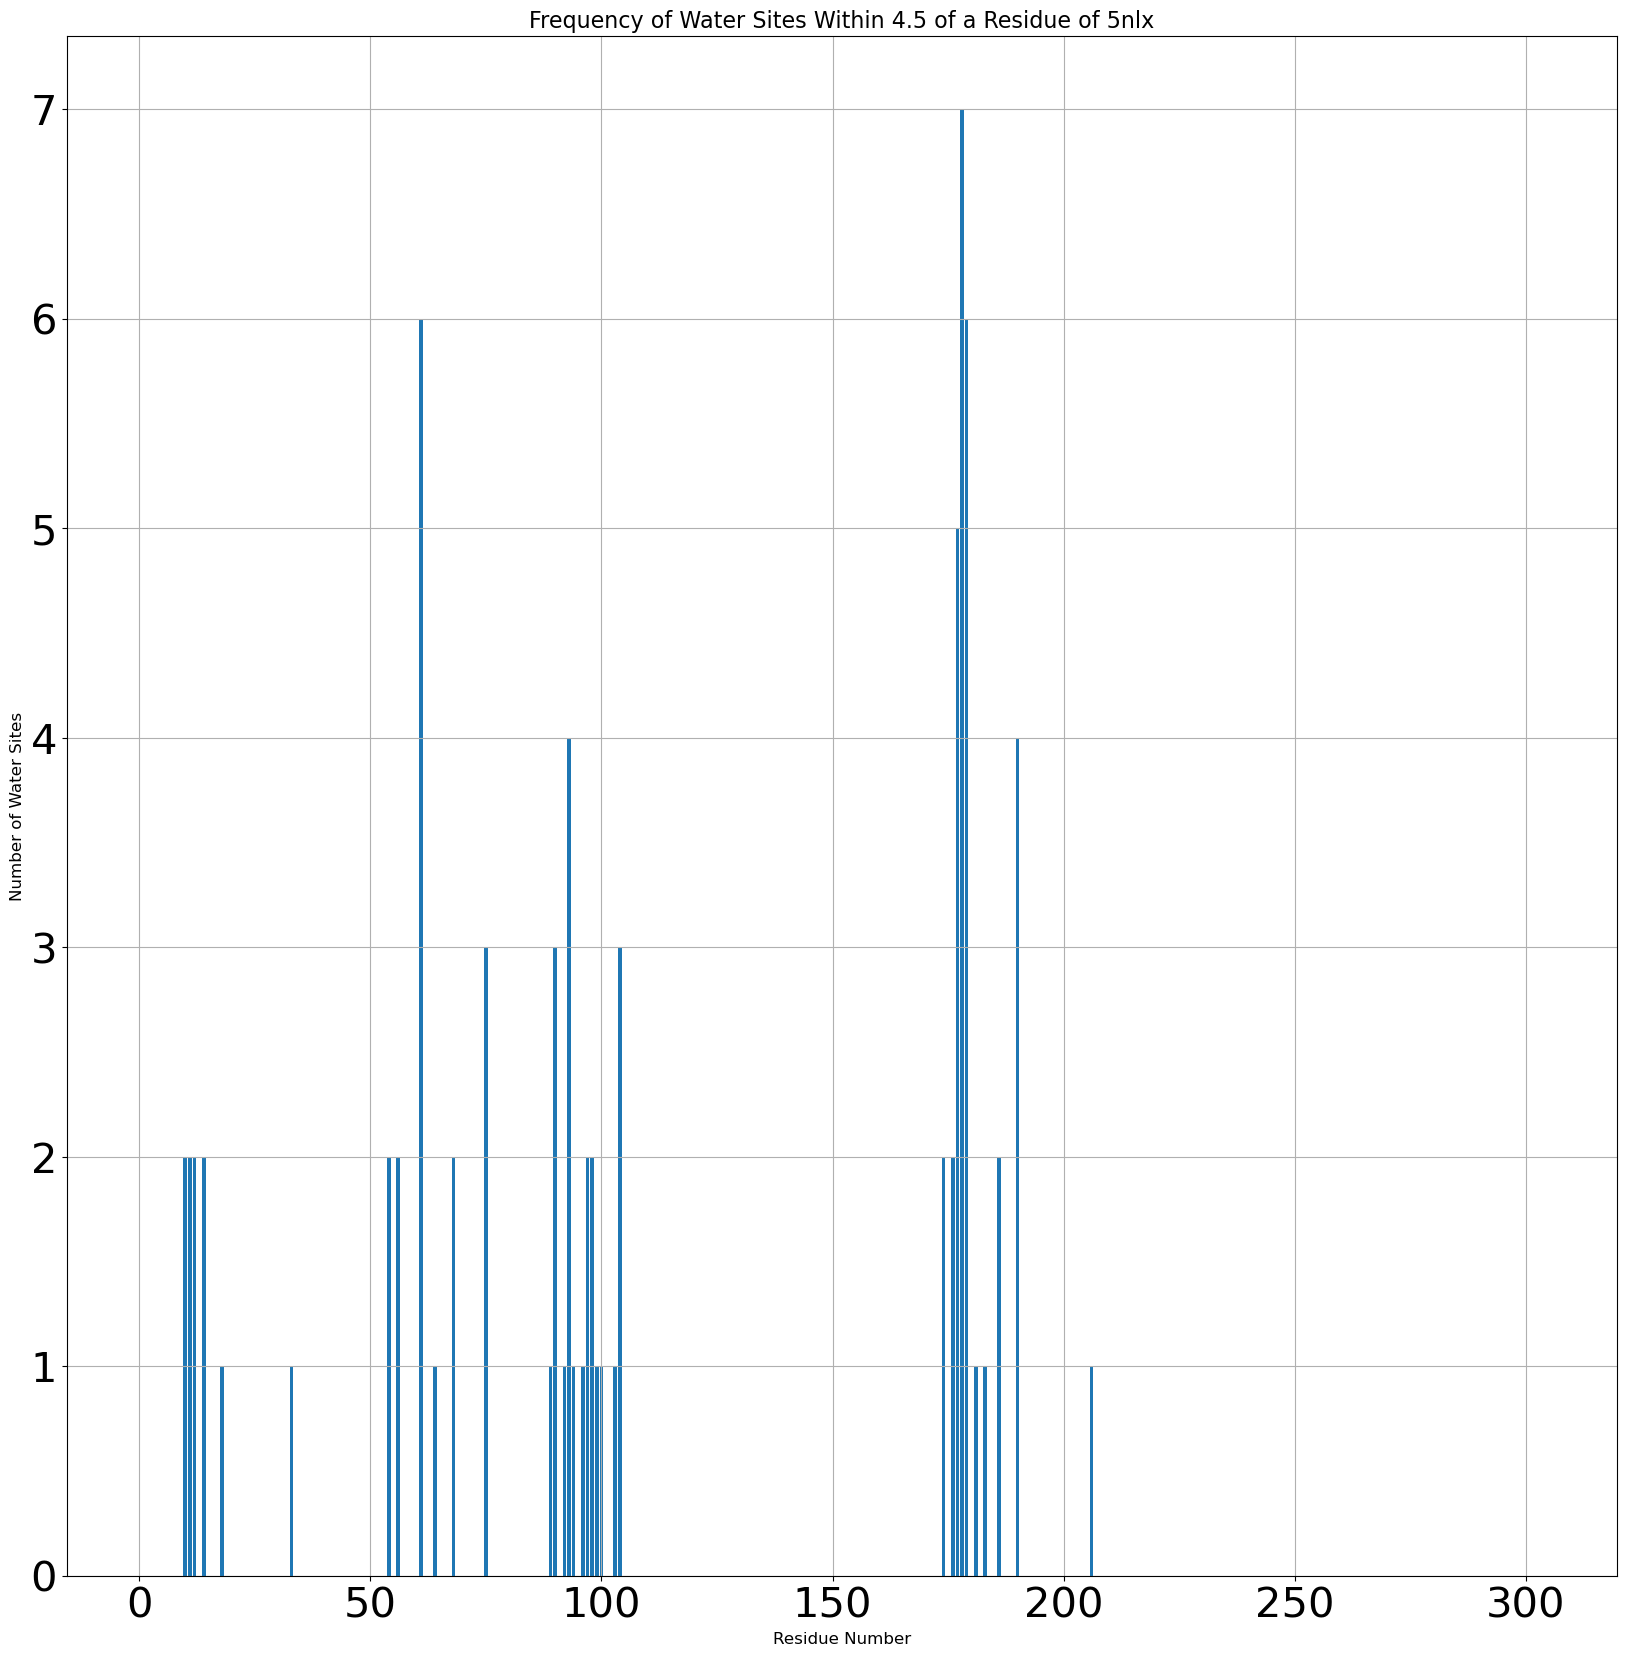

7t32  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



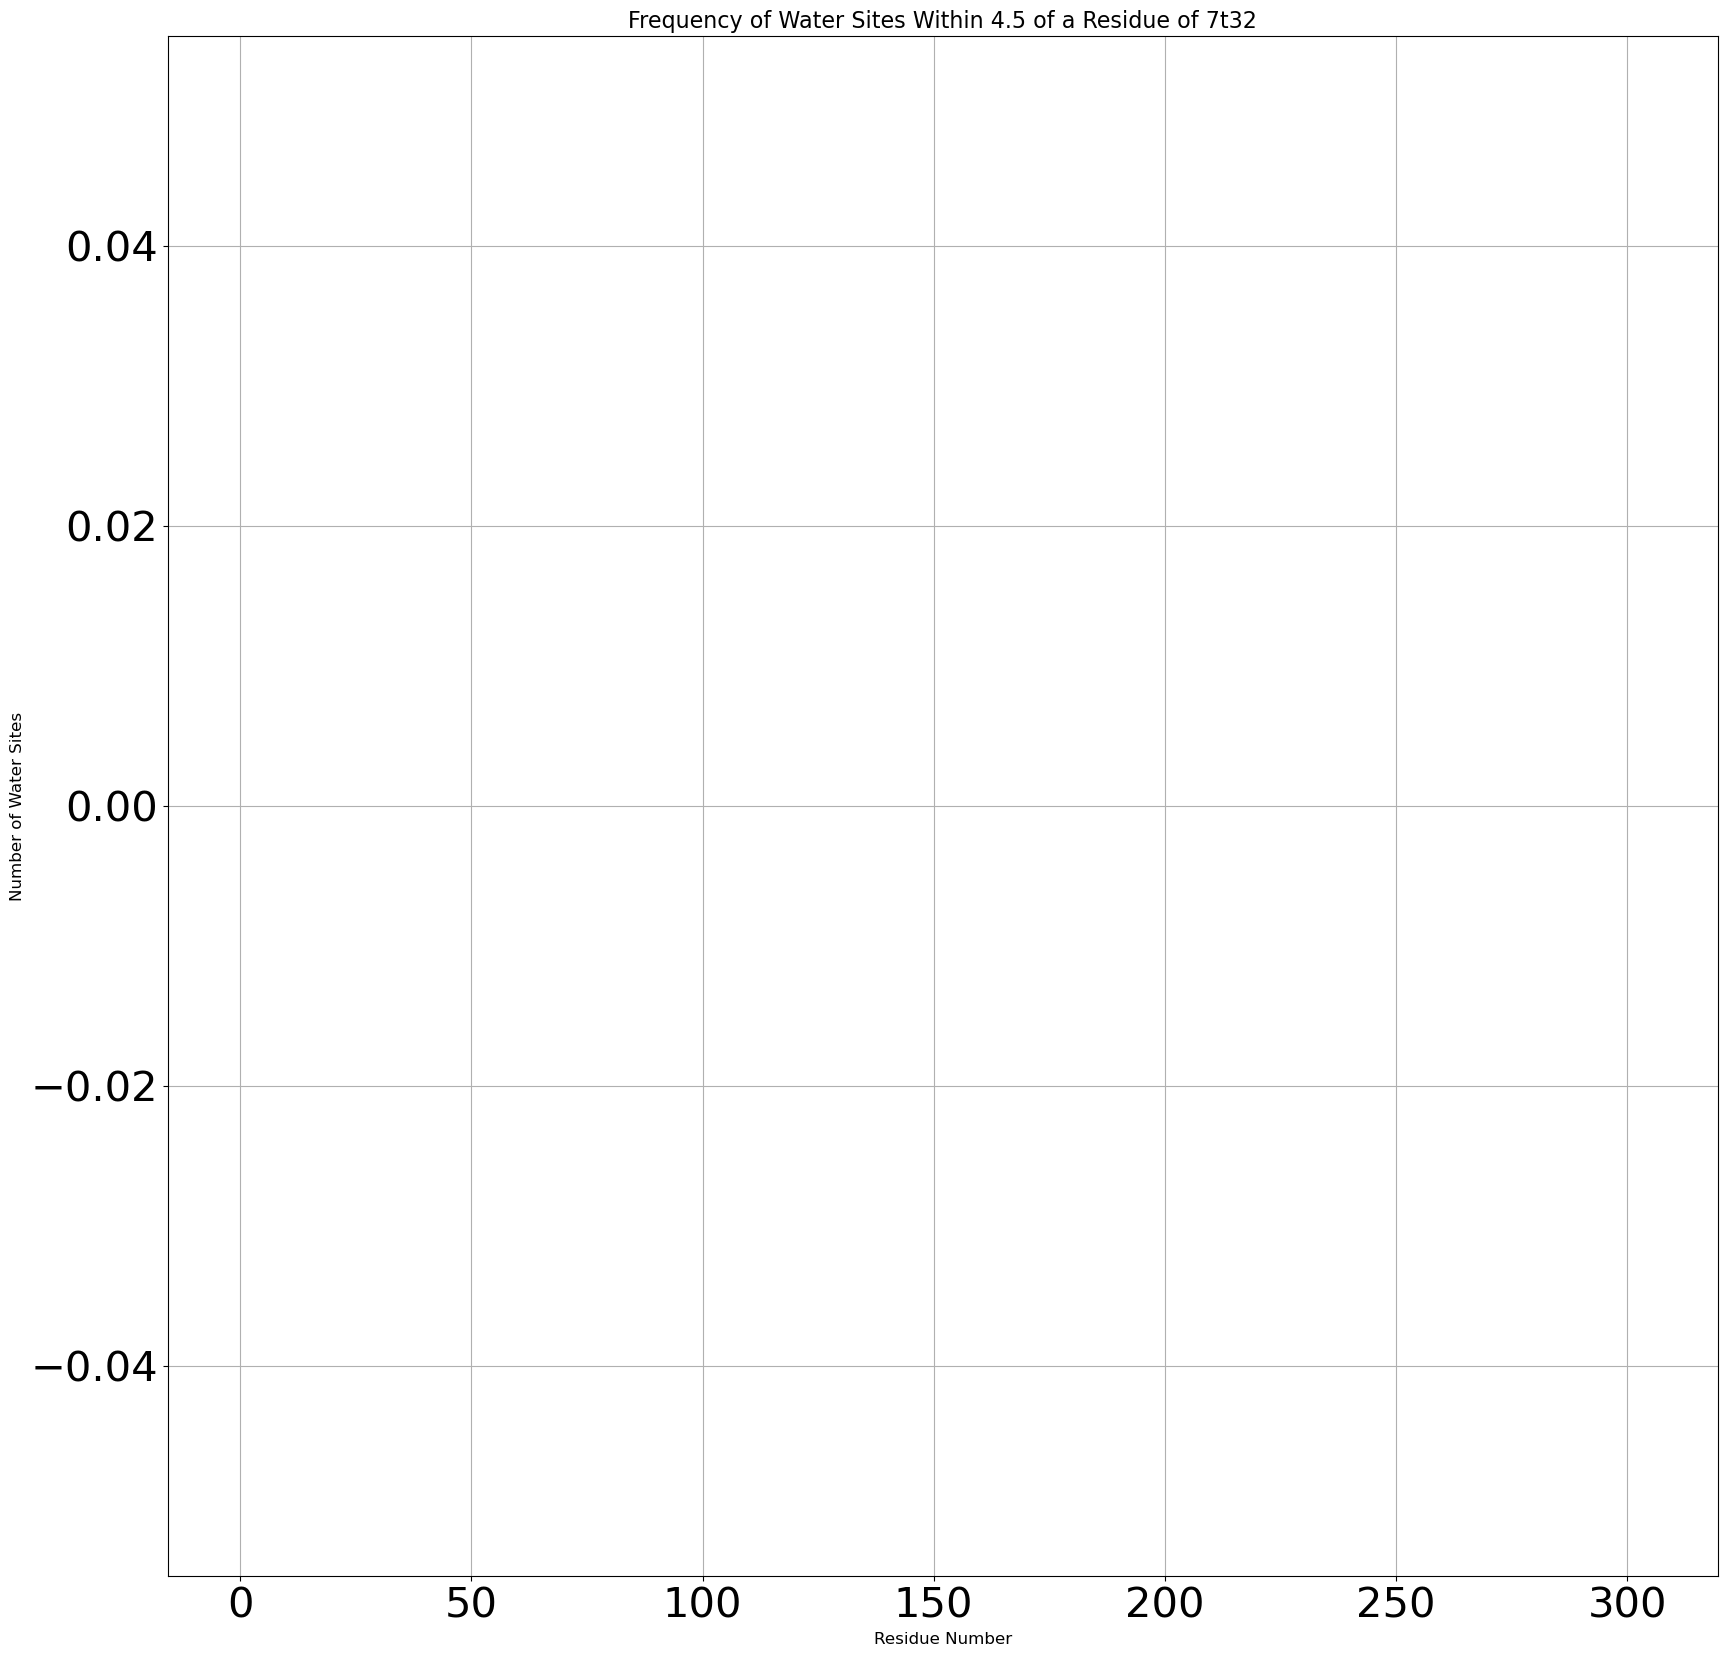

5om4  Watersite Resid : [0, 0, 2, 3, 0, 4, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 0, 3, 2, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 4, 7, 2, 0, 0, 0, 0, 0, 4, 6, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 0, 2, 3, 4, 0, 0, 2, 0, 0, 0, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 5, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 13, 9, 0, 0, 0, 4, 9, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 7, 0, 0, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 7, 10, 2, 8, 3, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 5, 0, 0, 2, 3, 0, 0, 2, 0, 2, 10, 11, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 0, 2, 6, 0, 1, 2, 0, 0, 1, 0, 0, 5, 0, 1, 0, 8, 1, 0, 0, 5, 0, 0, 4, 0, 5, 1, 0, 5, 0, 1, 0, 2, 2, 0, 1, 2]



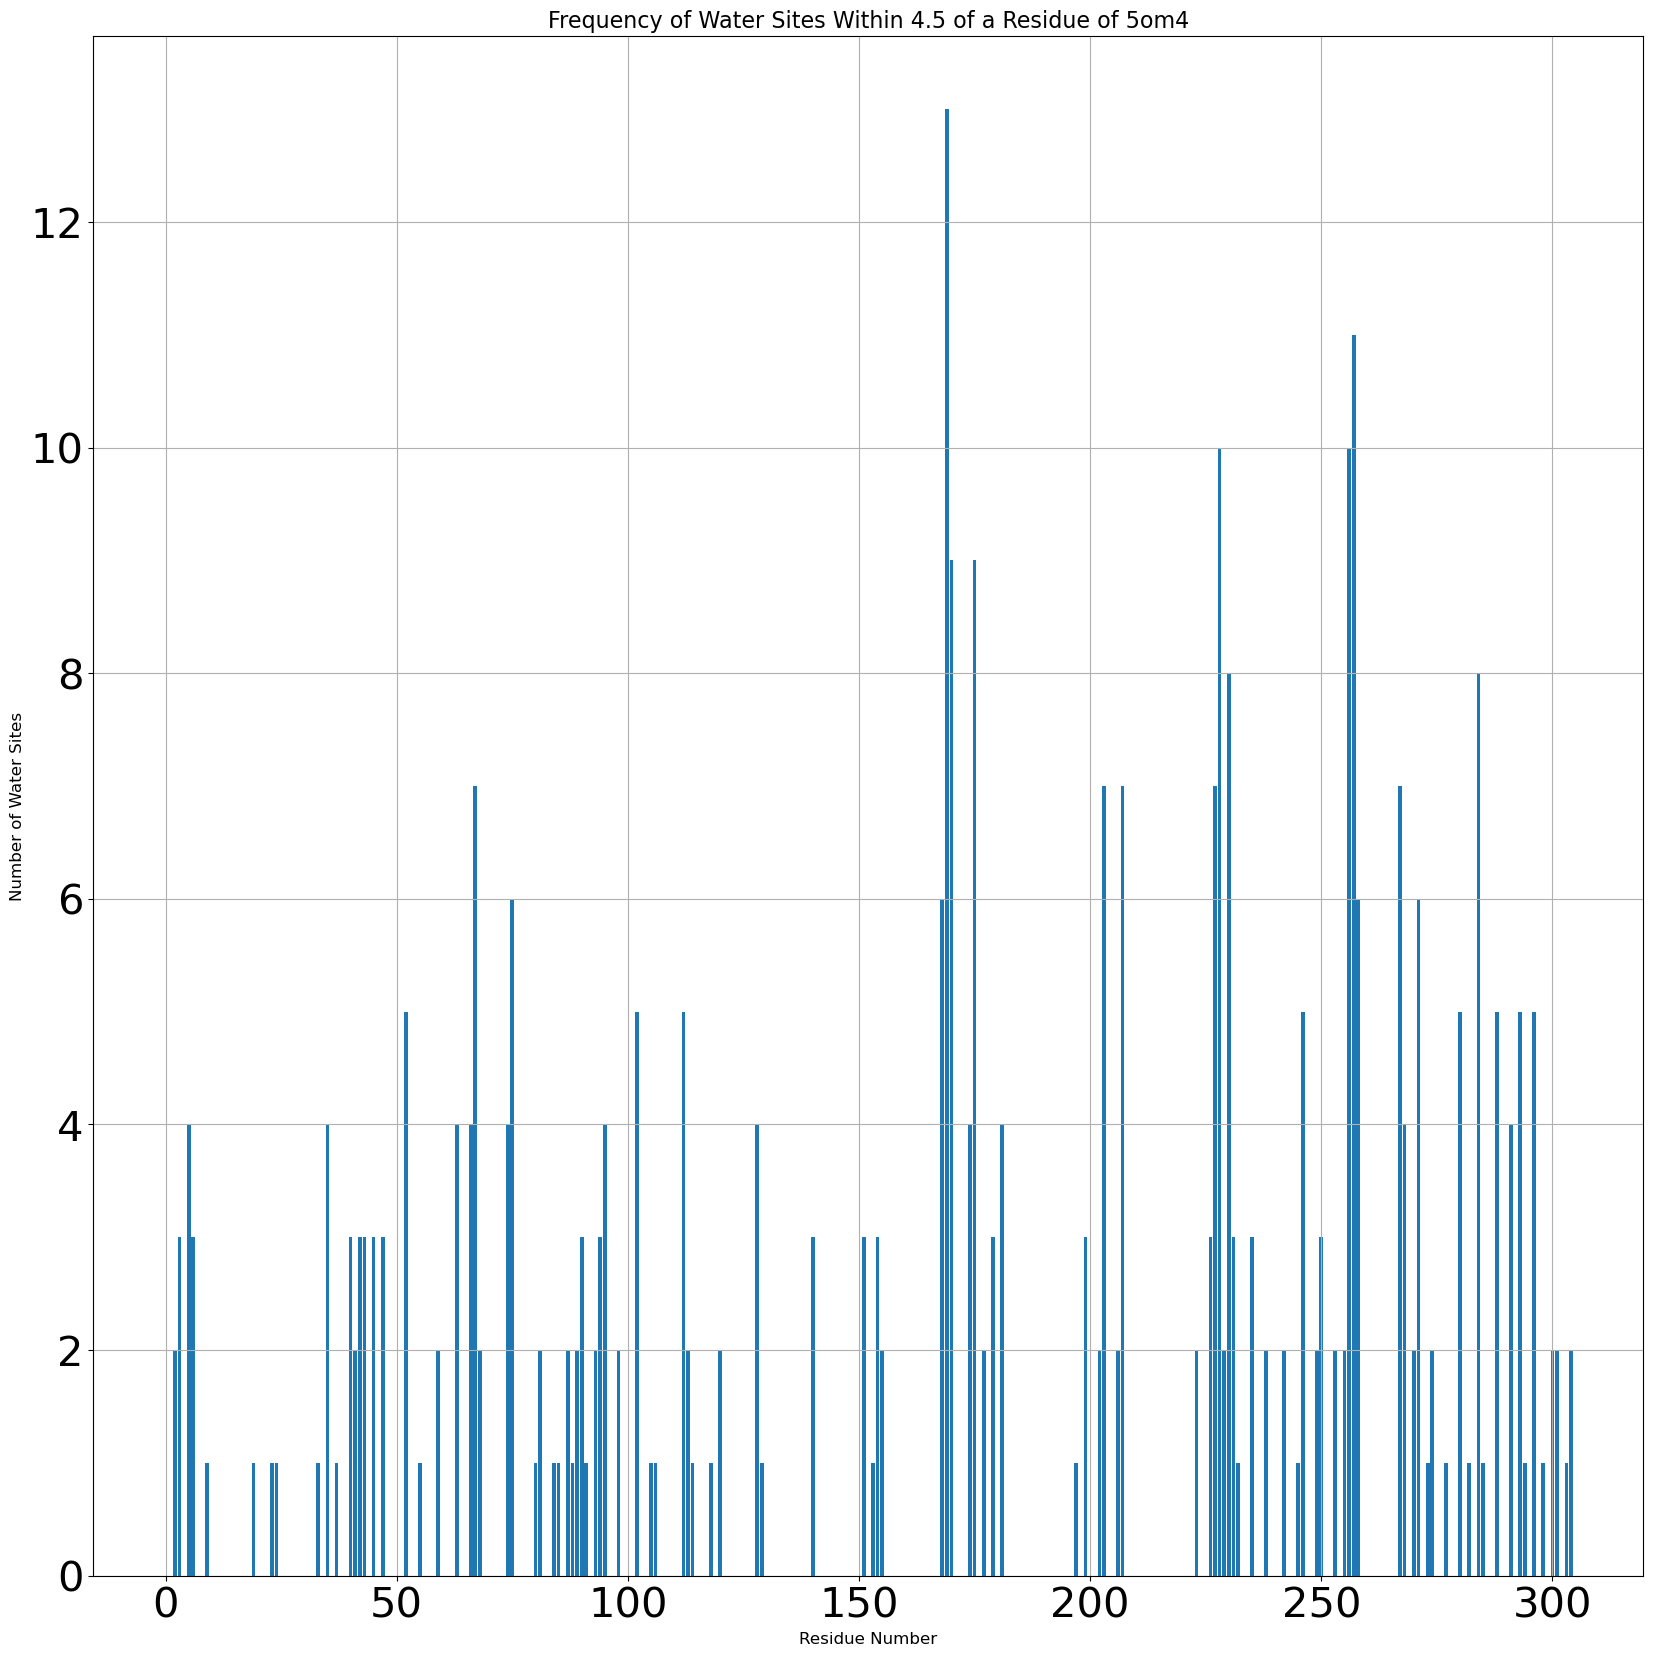

7rm5  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



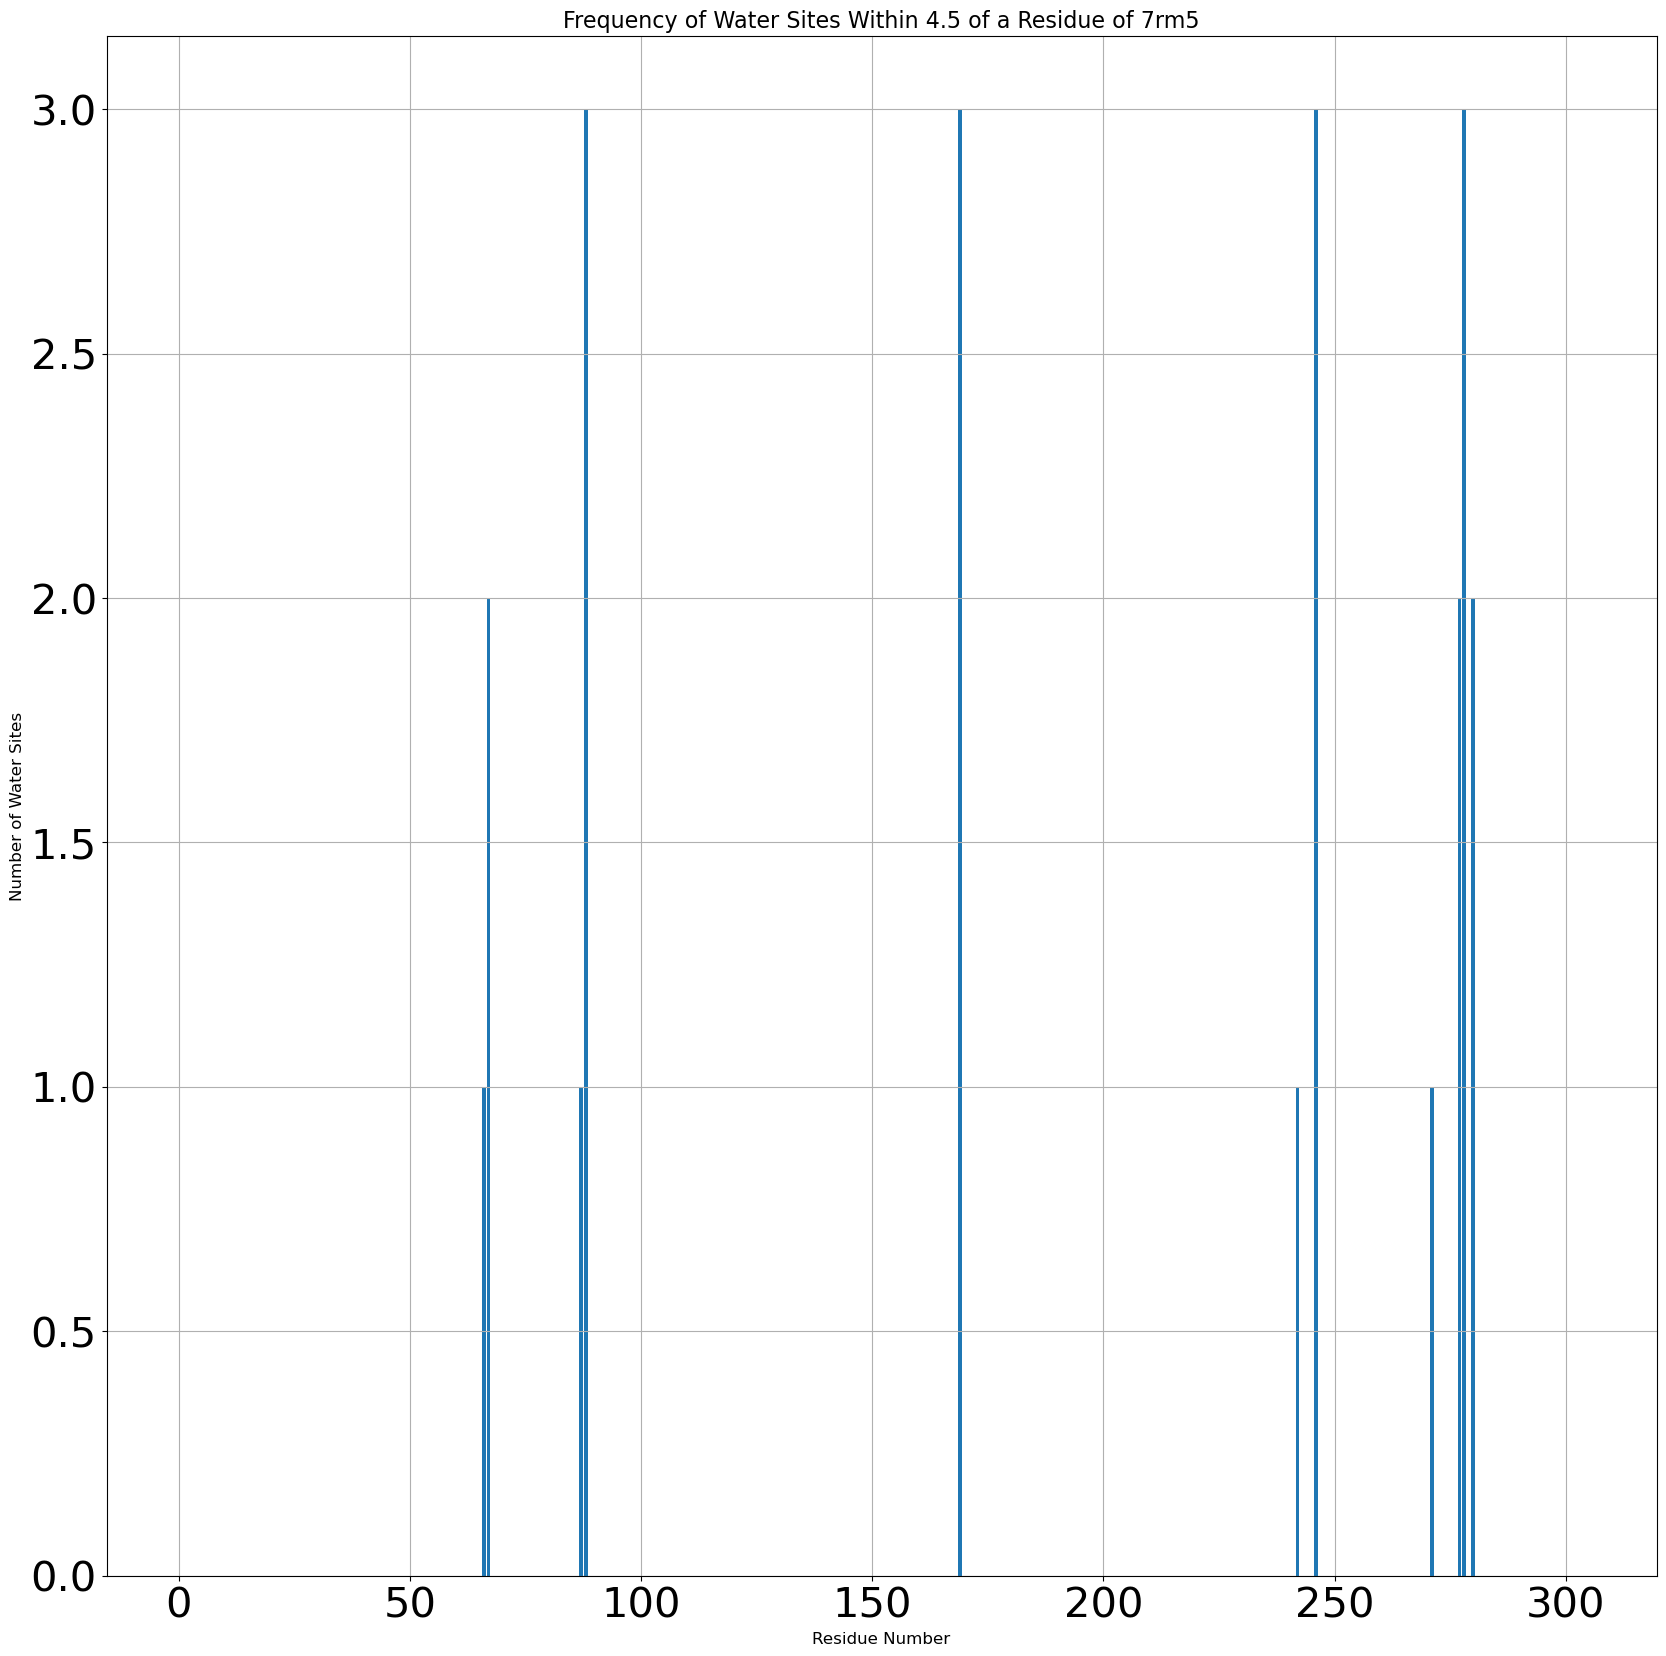

6aqf  Watersite Resid : [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]



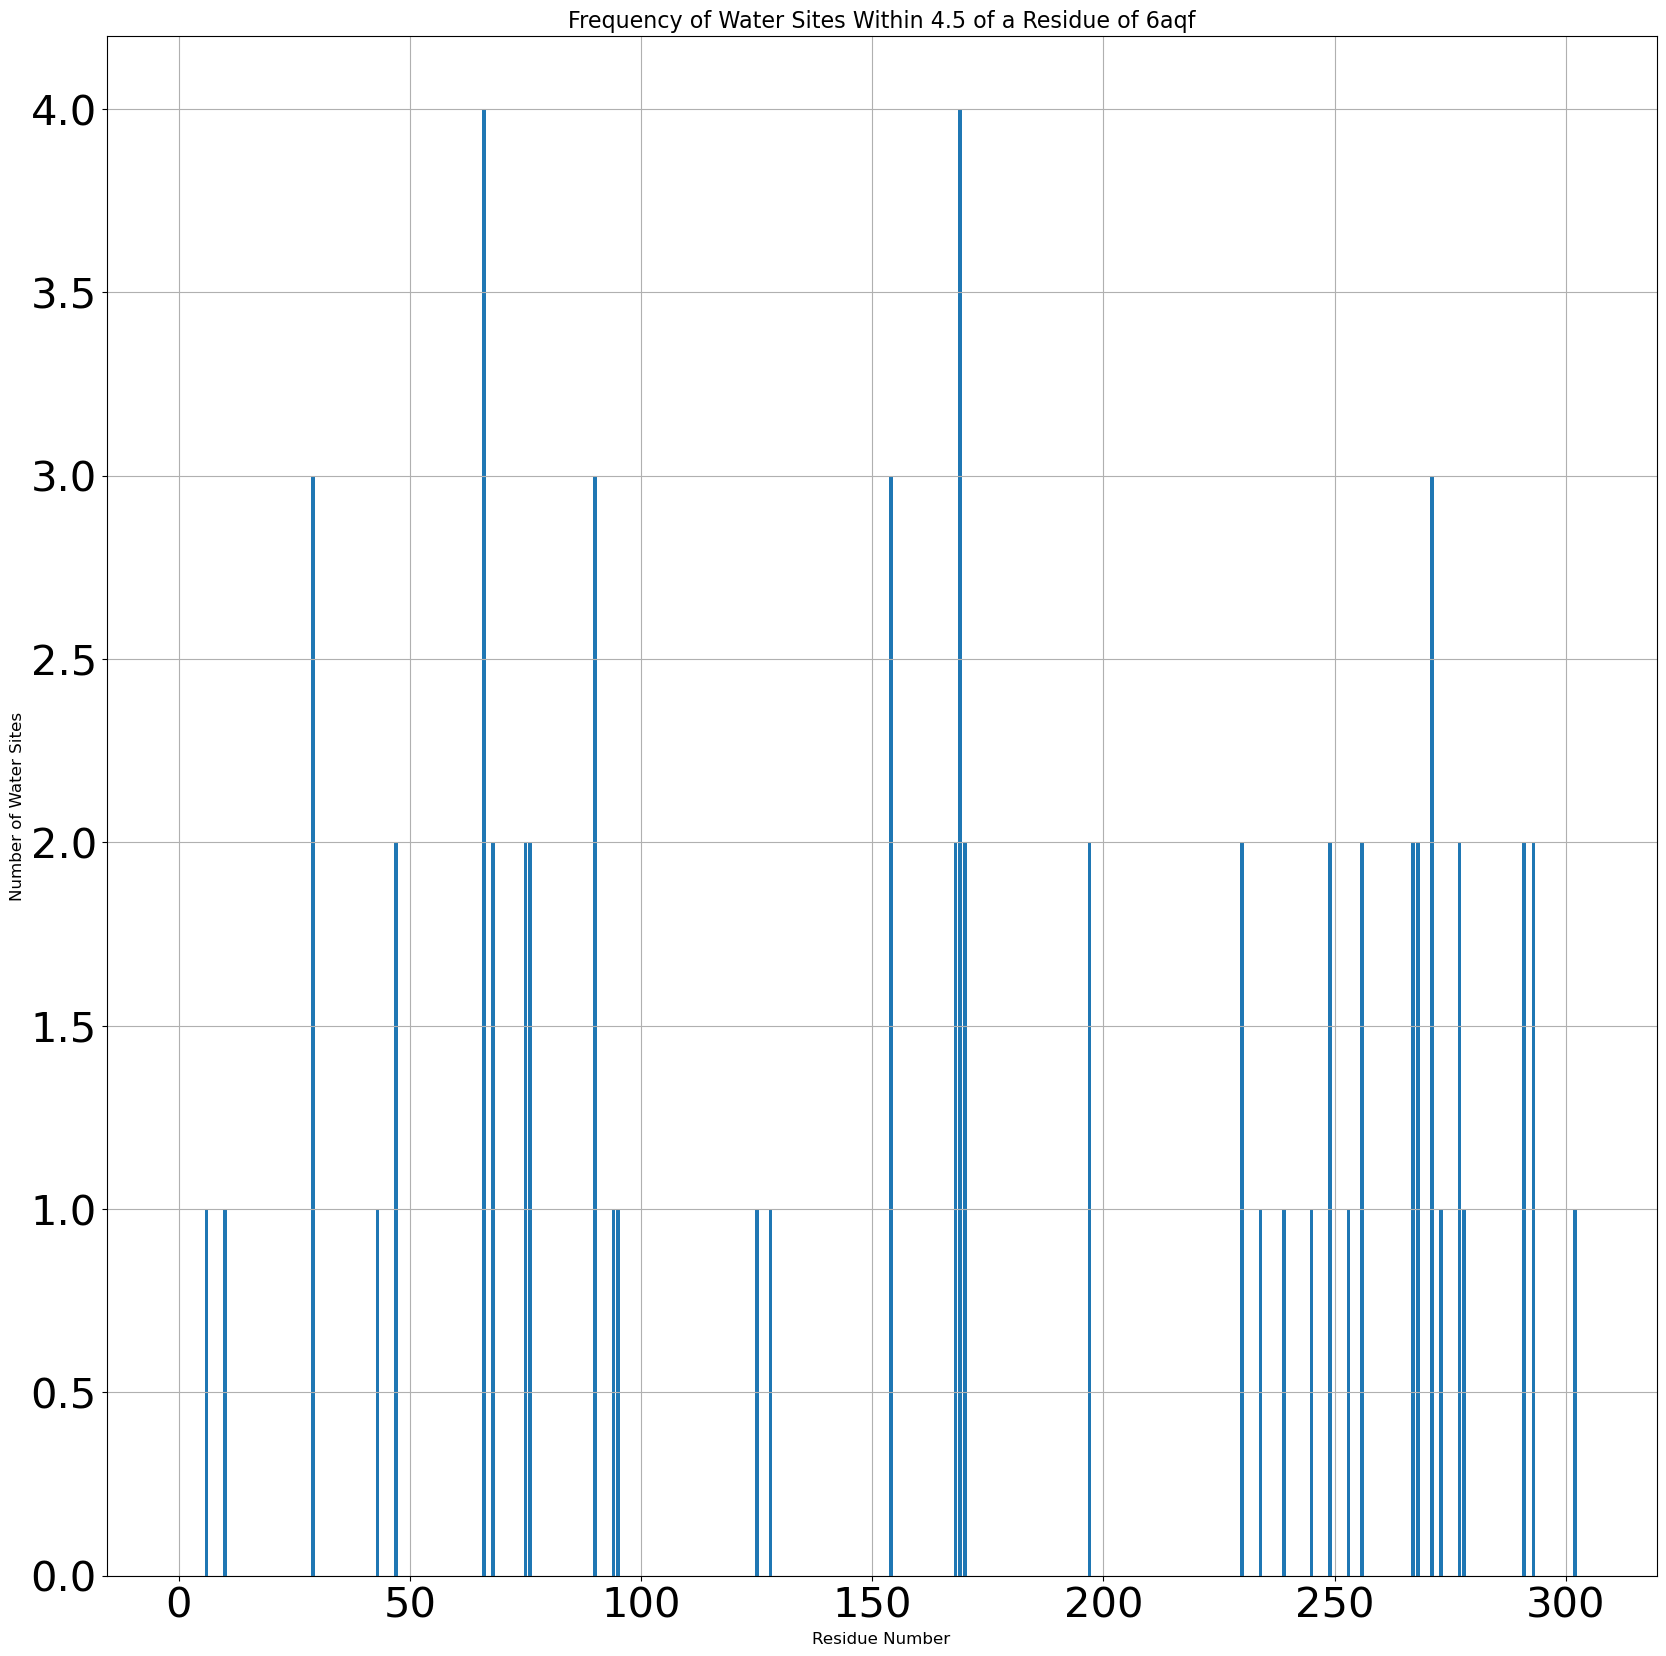

5mzp  Watersite Resid : [0, 0, 6, 3, 0, 4, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 5, 0, 0, 2, 8, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 2, 2, 0, 1, 5, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 1, 0, 0, 0, 0, 1, 7, 6, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 18, 8, 0, 0, 0, 9, 7, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 3, 3, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 8, 1, 3, 8, 8, 2, 10, 2, 0, 0, 1, 4, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 10, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 1, 4, 0, 1, 1, 0, 0, 1, 2, 0, 6, 0, 1, 0, 8, 1, 0, 0, 5, 0, 0, 2, 0, 5, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0]



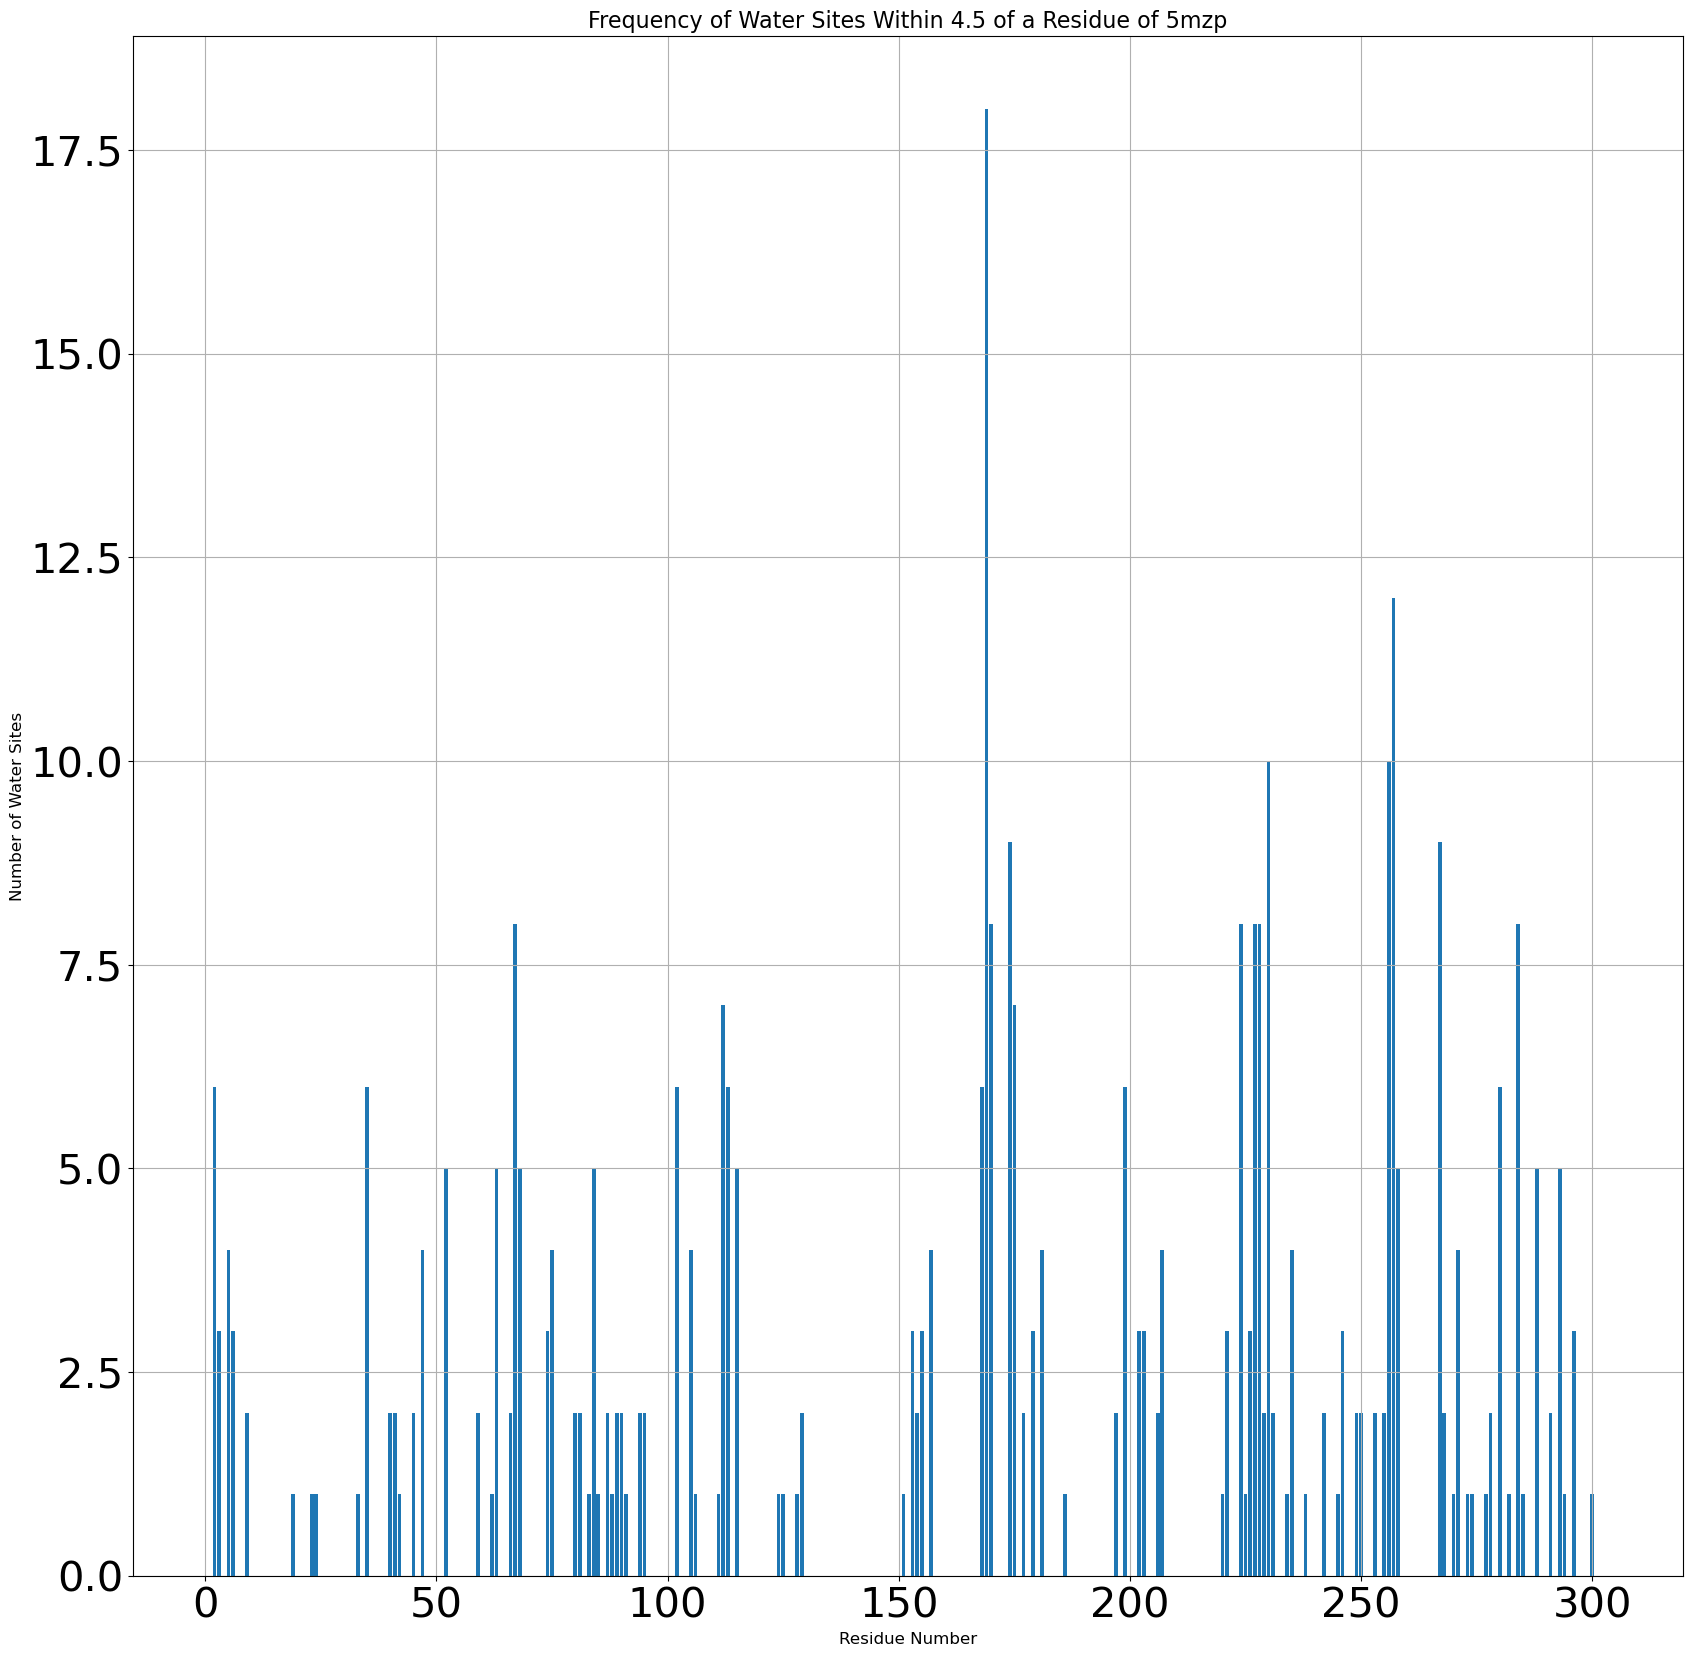

3vg9  Watersite Resid : [0, 0, 1, 0, 0, 0, 0, 2, 4, 2, 1, 2, 1, 1, 0, 0, 1, 3, 1, 5, 0, 0, 0, 0, 0, 2, 6, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 1, 0, 1, 3, 8, 4, 1, 0, 0, 1, 1, 3, 0, 2, 1, 3, 0, 2, 2, 1, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 4, 1, 3, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 3, 0, 3, 1, 3, 0, 0, 2, 9, 0, 2, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 1, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0]



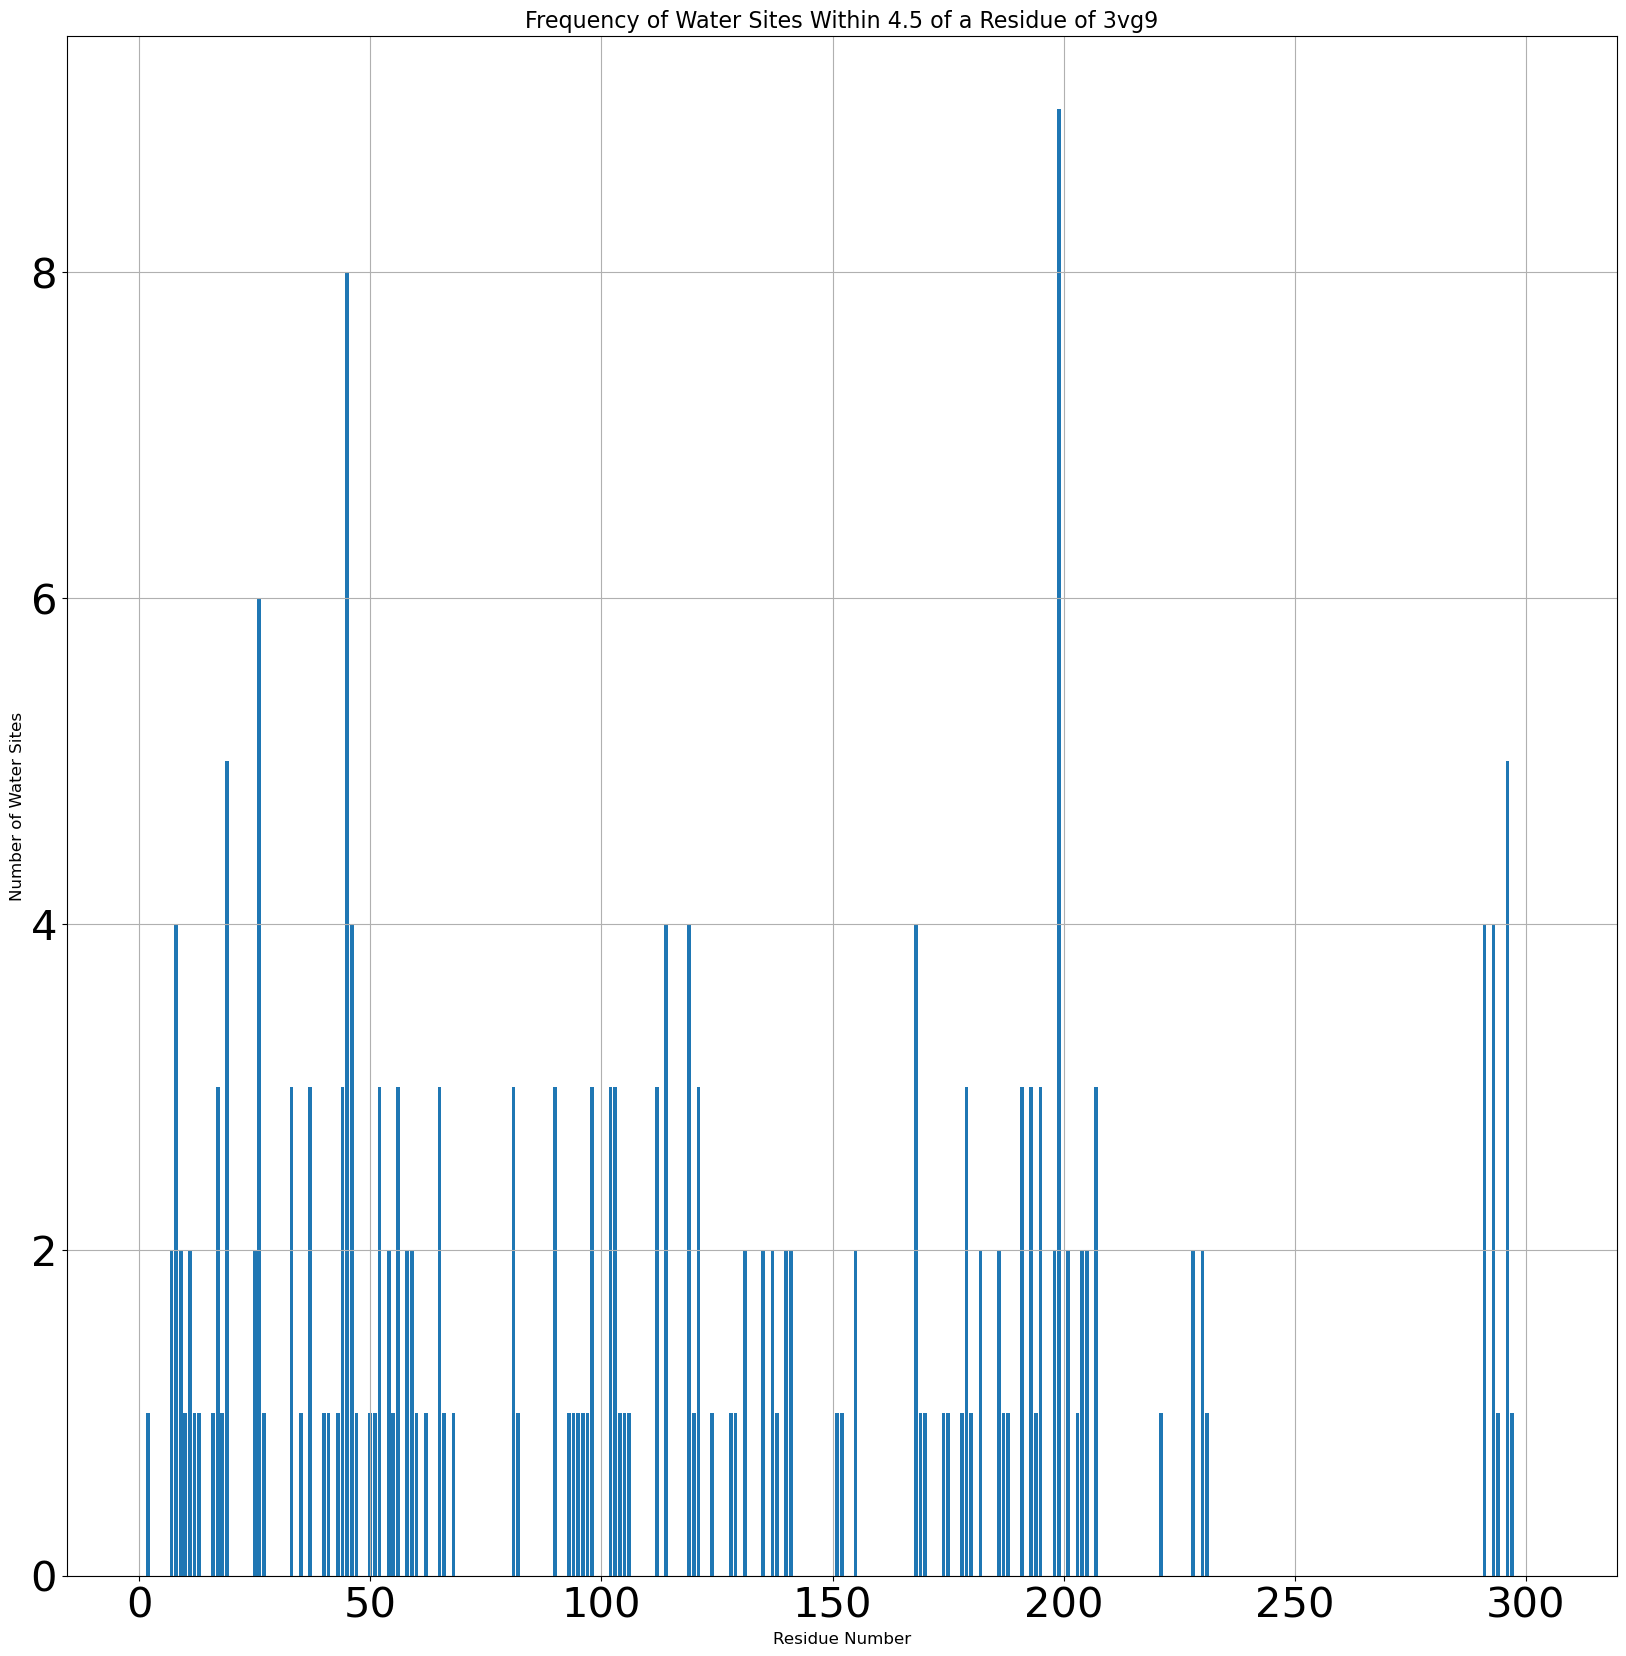

6gdg  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



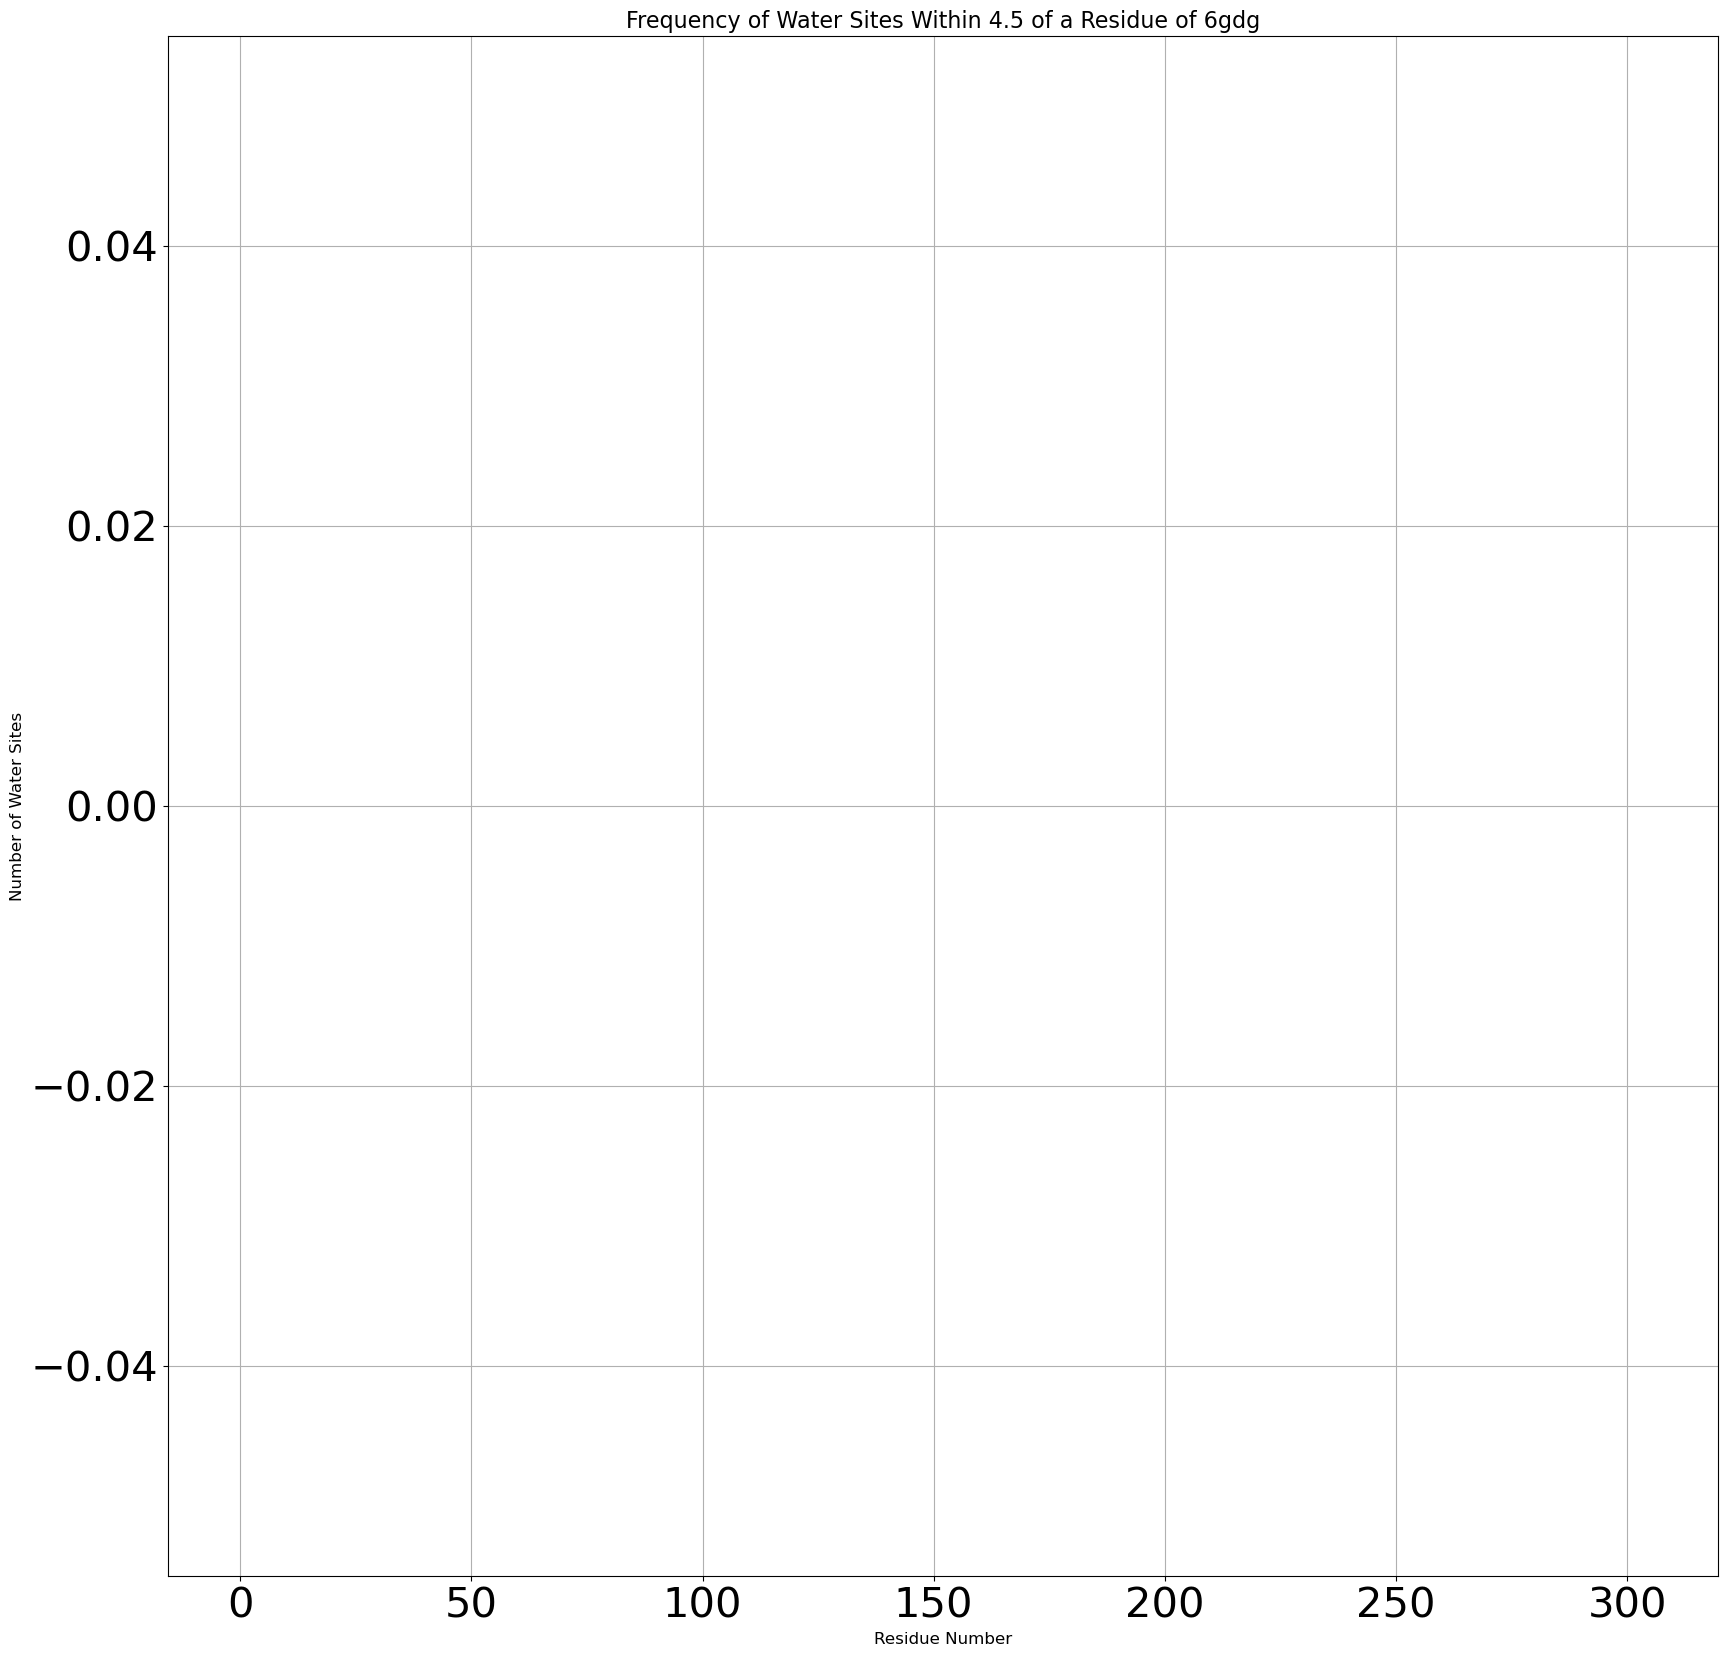

5uvi  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



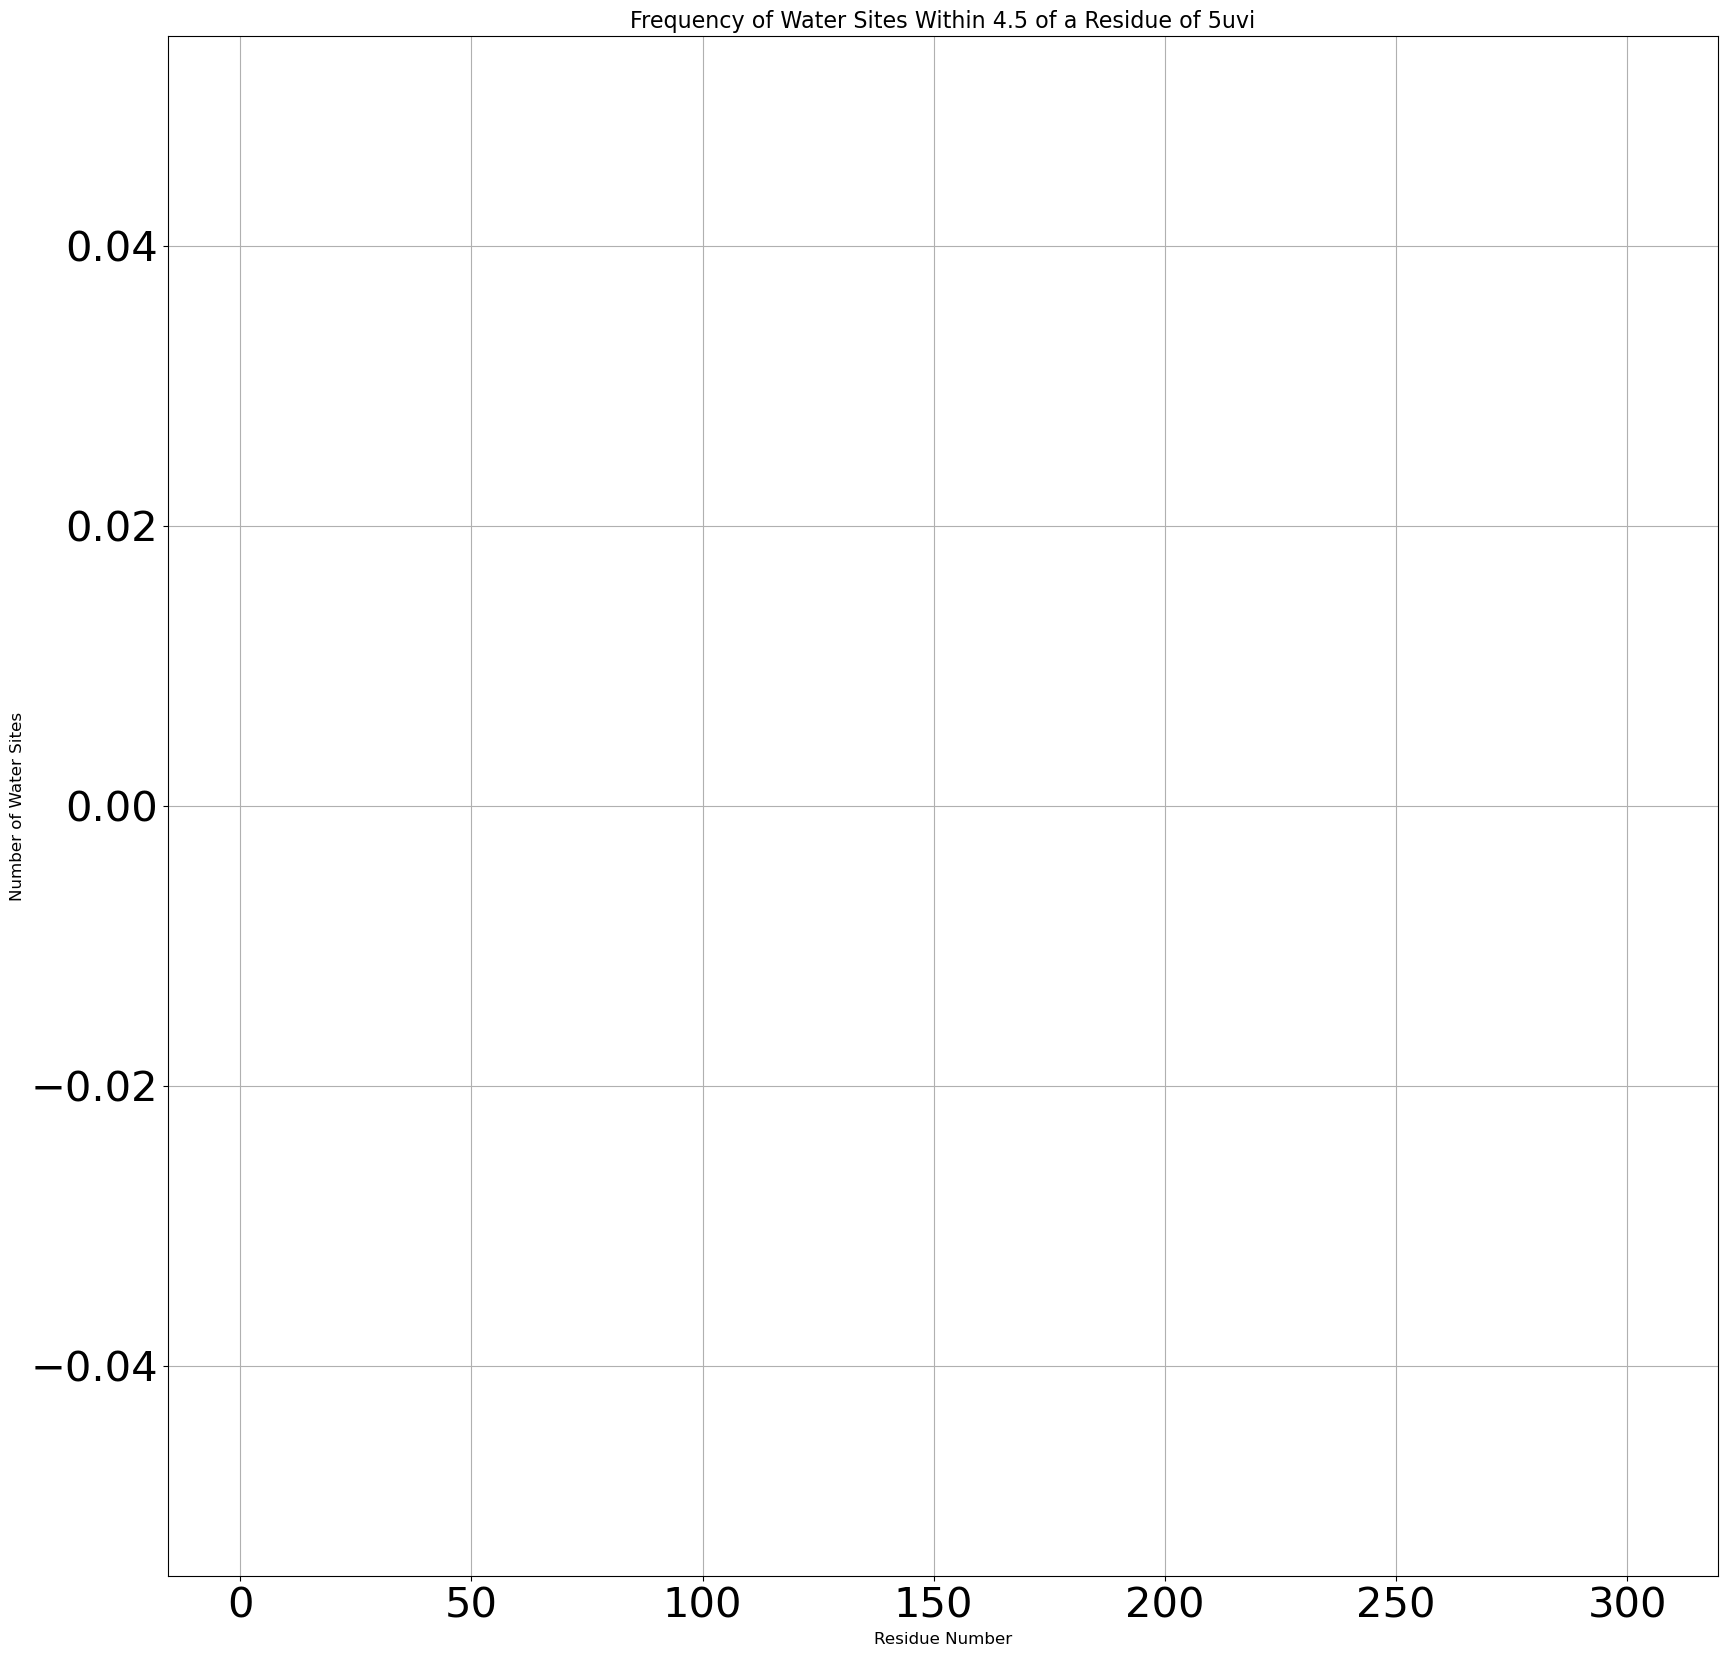

5om1  Watersite Resid : [0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 3, 5, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 2, 6, 4, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 0, 0, 3, 4, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 7, 1, 5, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 5, 0, 0, 0, 4, 5, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 9, 0, 0, 4, 1, 0, 1, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 4, 0, 0, 2, 3, 0, 0, 2, 0, 2, 10, 9, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 0, 2, 5, 0, 1, 3, 0, 0, 1, 0, 0, 5, 0, 1, 0, 6, 1, 0, 0, 6, 0, 0, 2, 0, 0, 0, 0, 5, 0, 1, 0, 5, 3, 2, 1, 0]



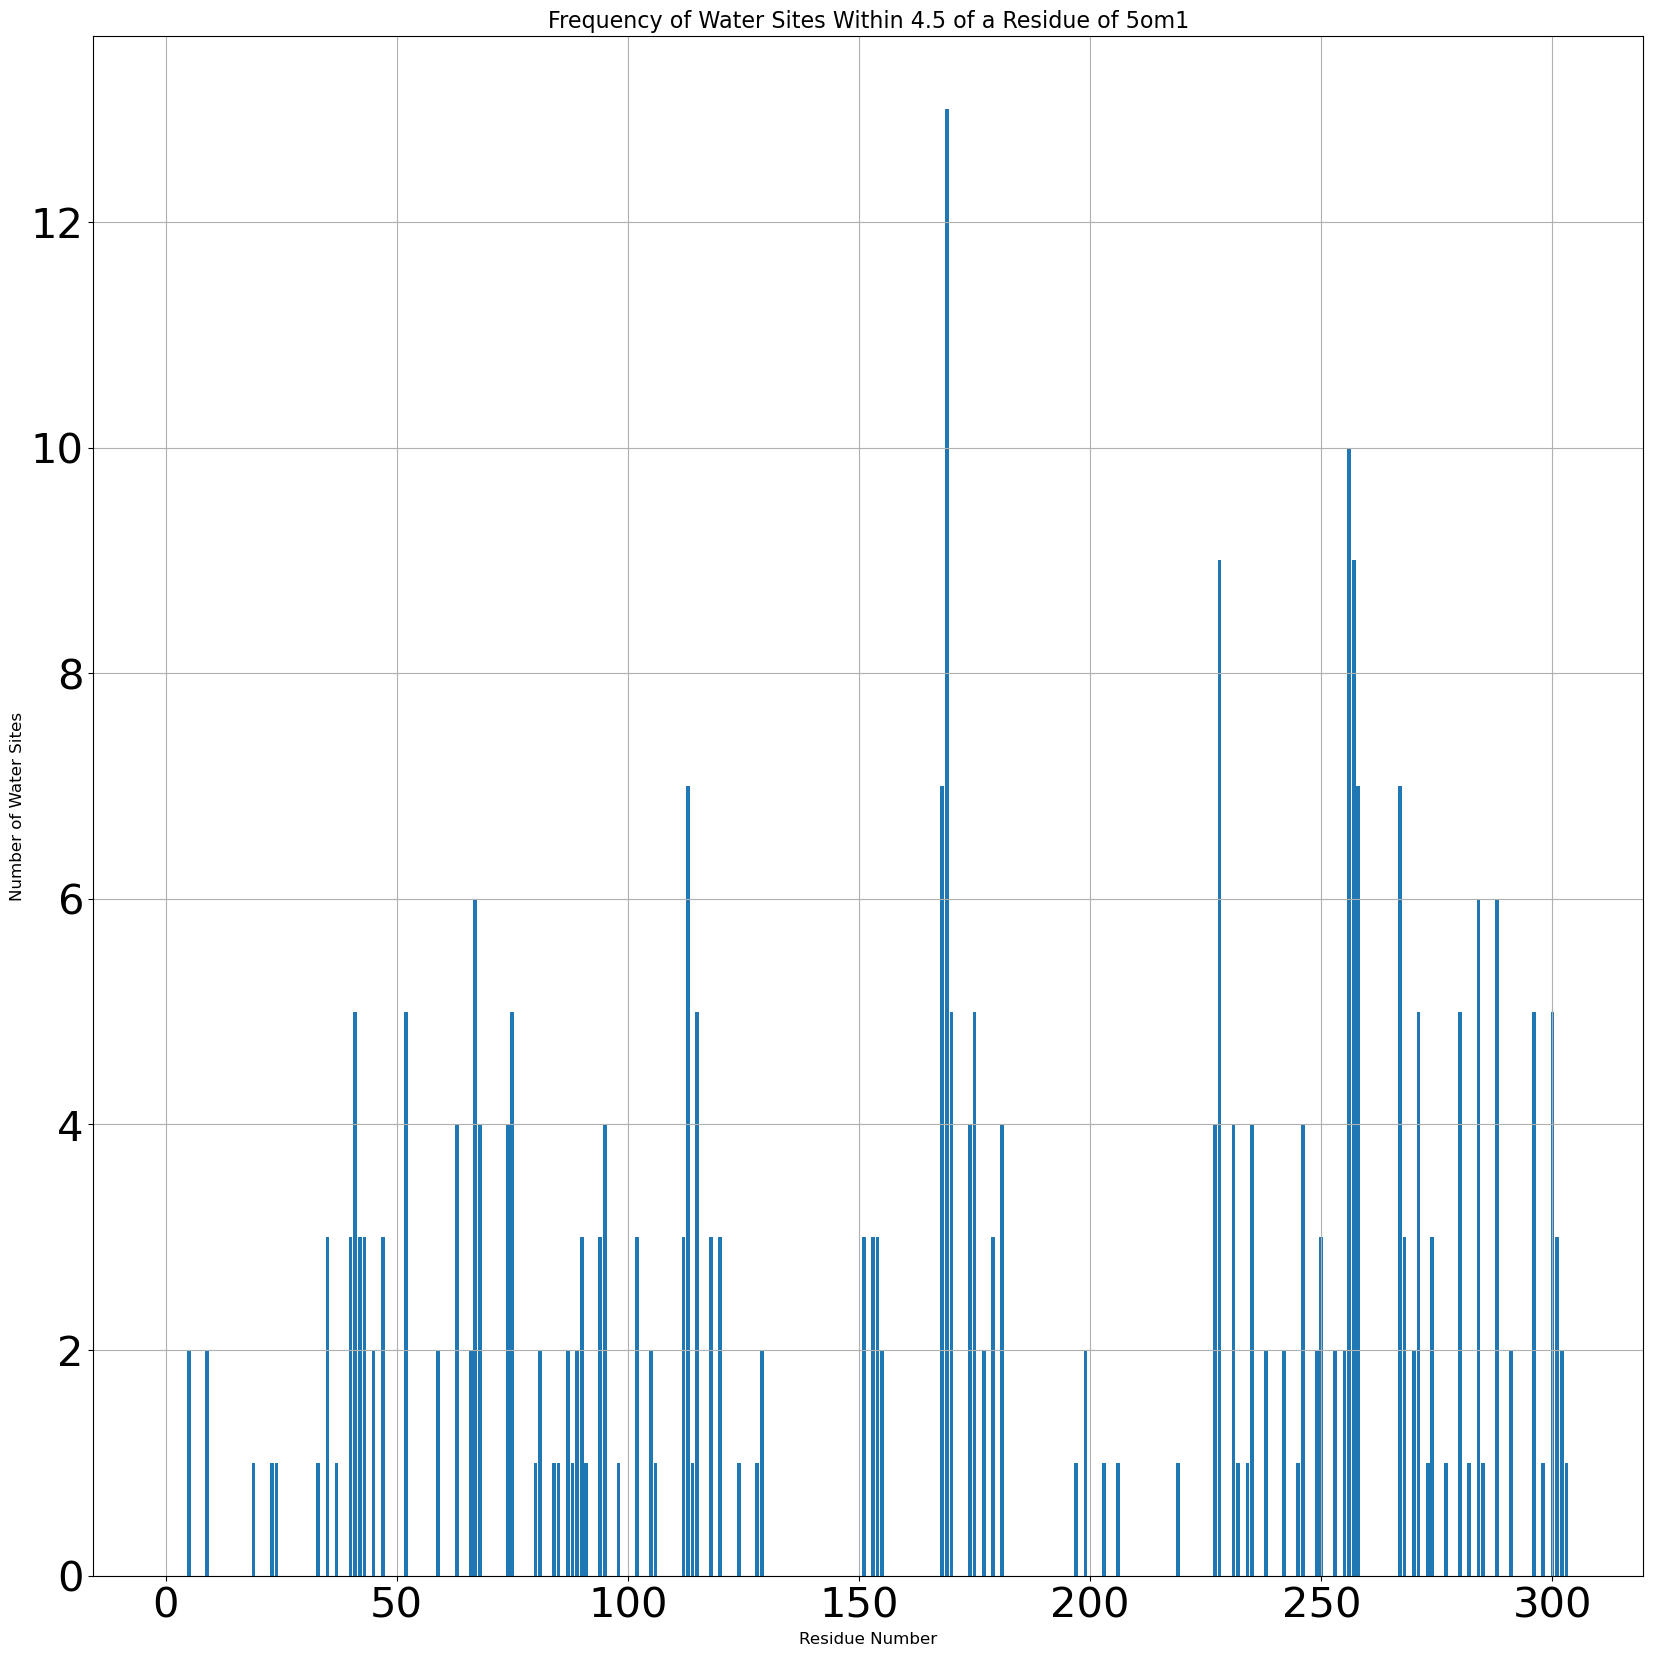

4uhr  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



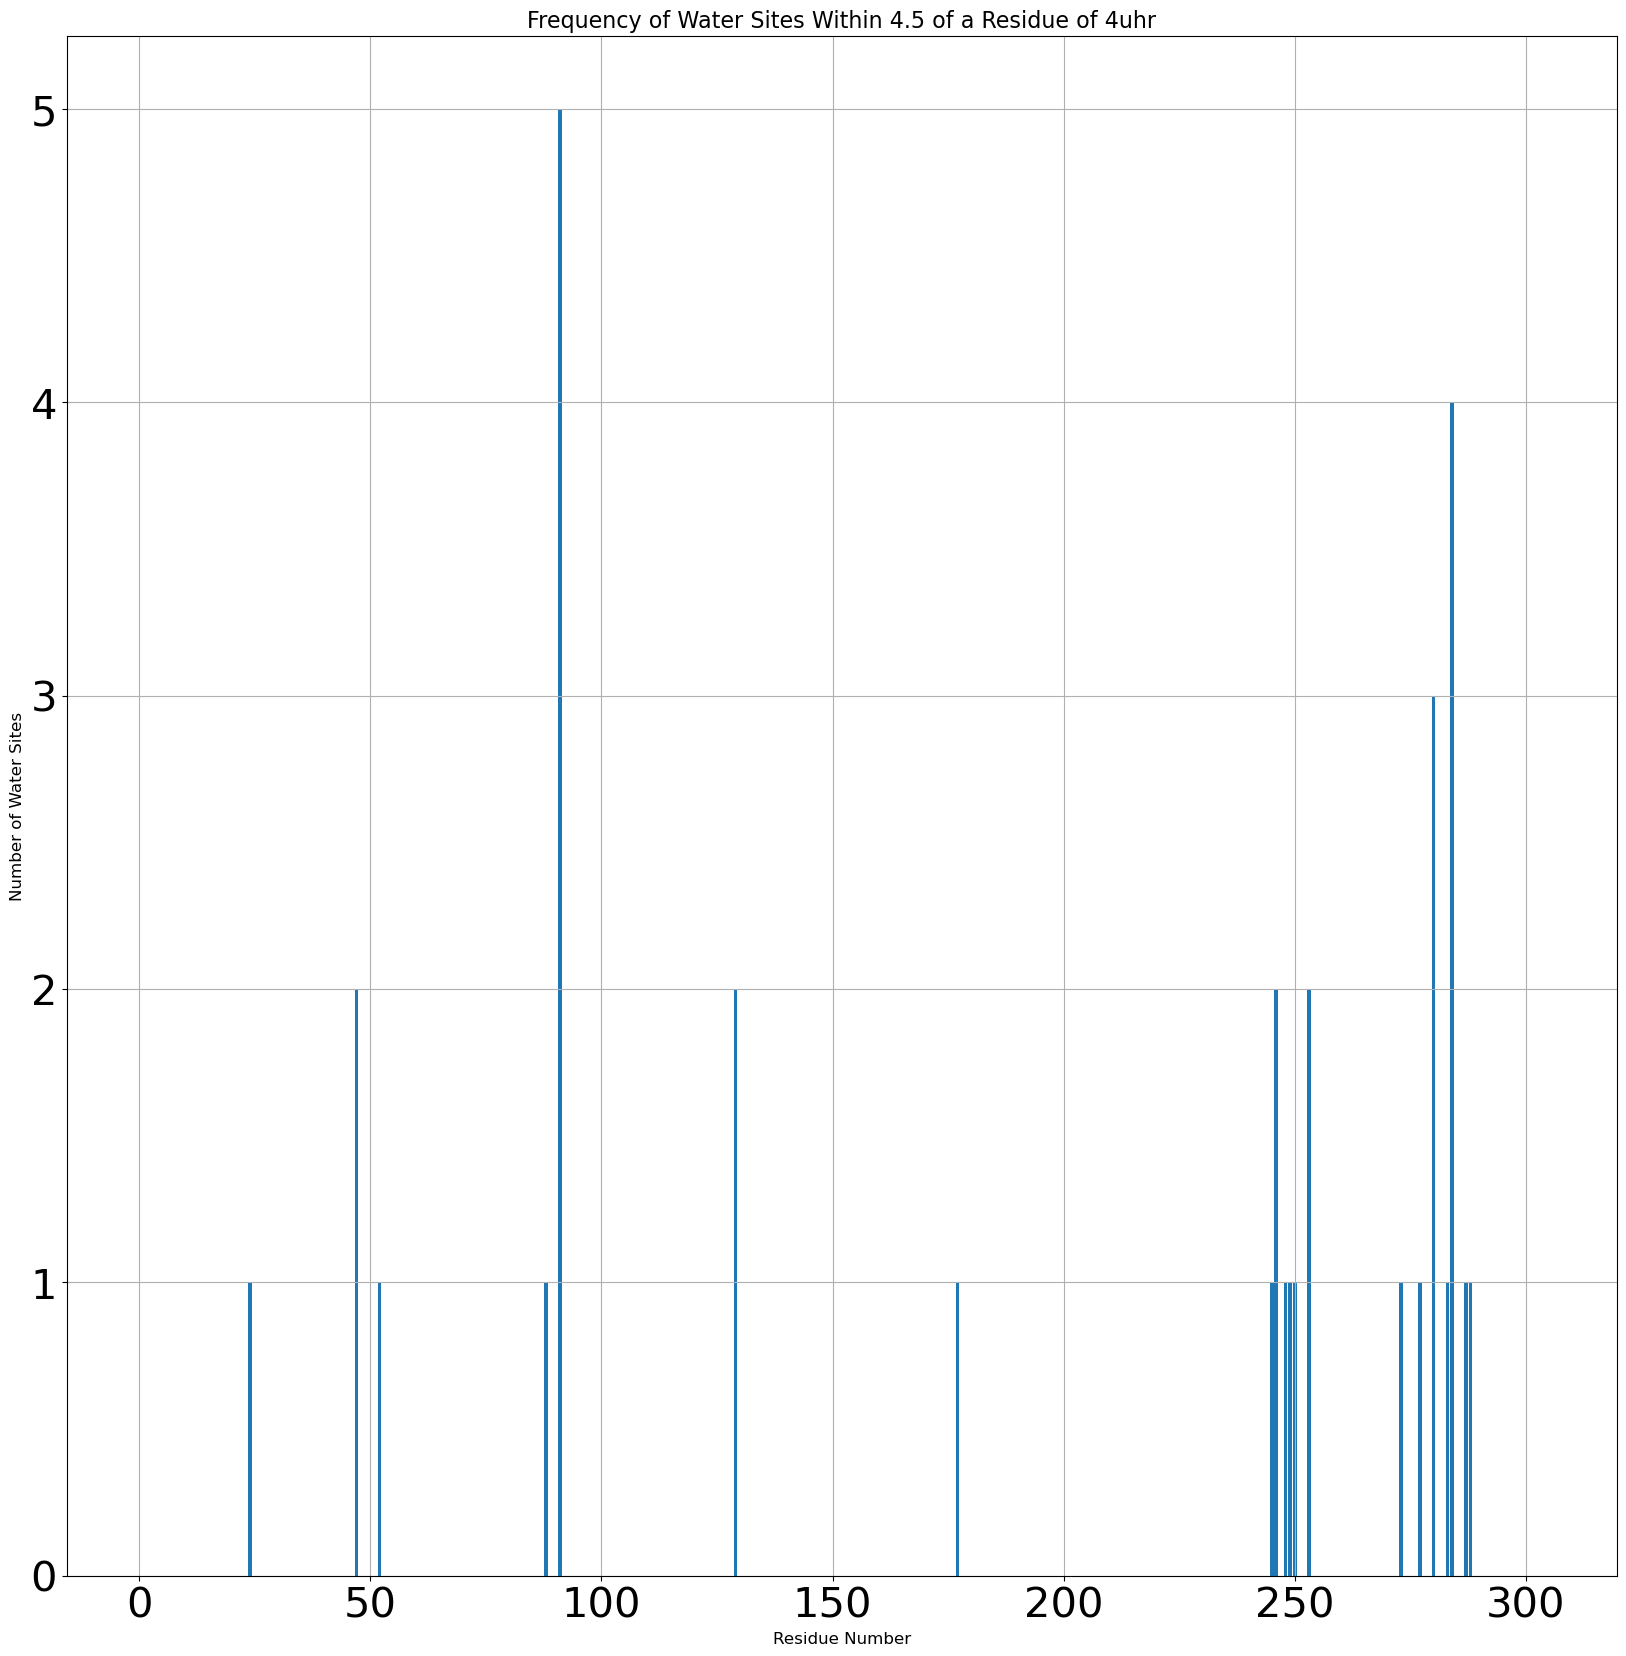

3rey  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



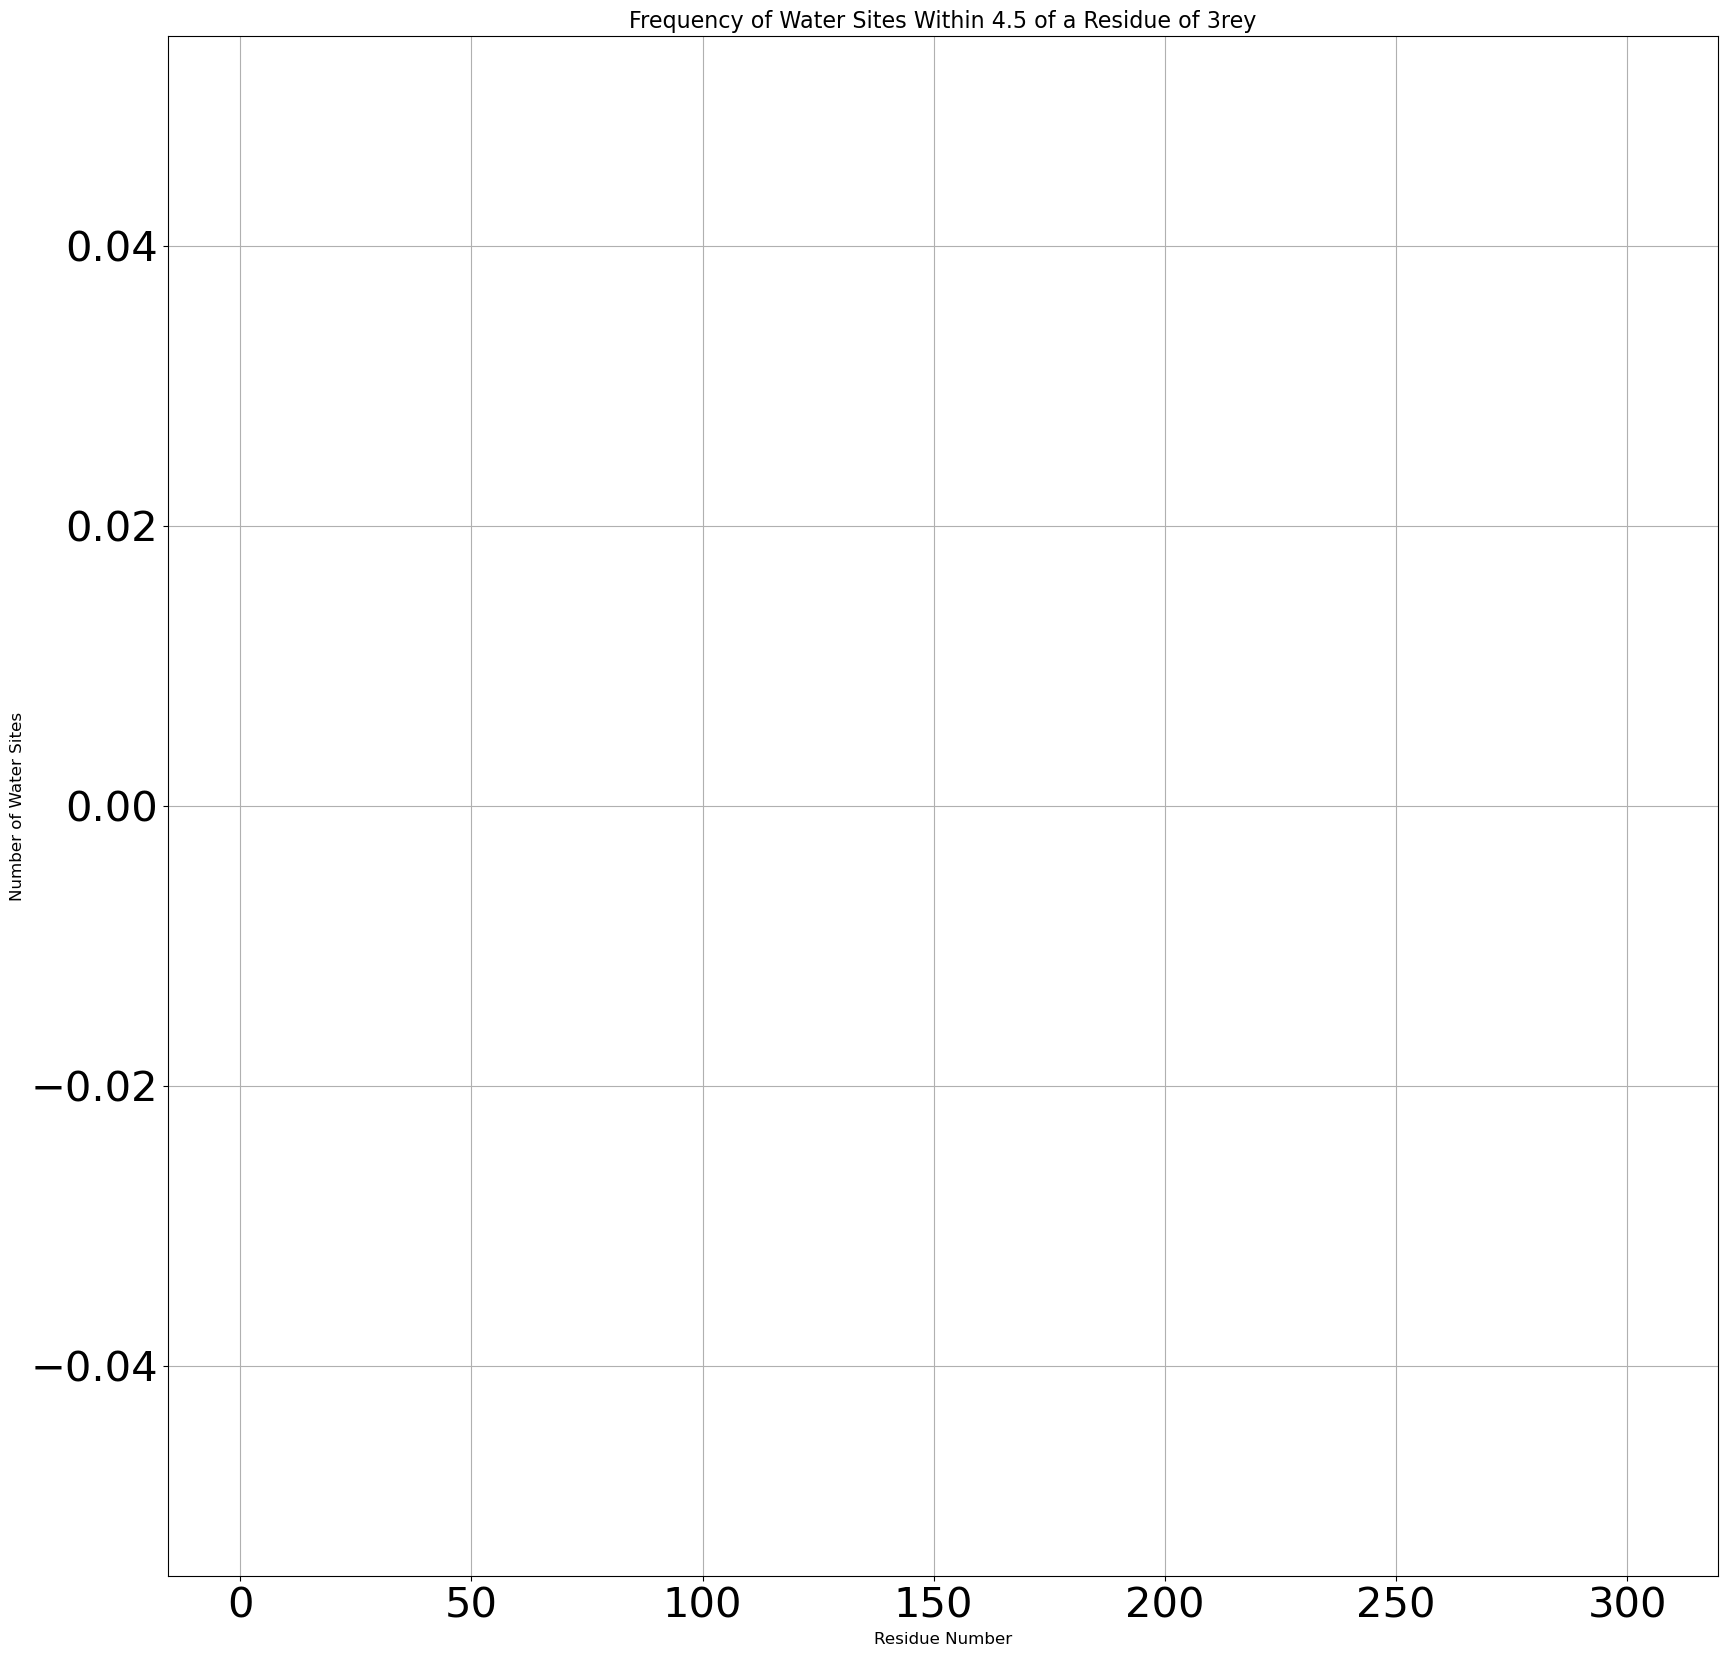

5uig  Watersite Resid : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



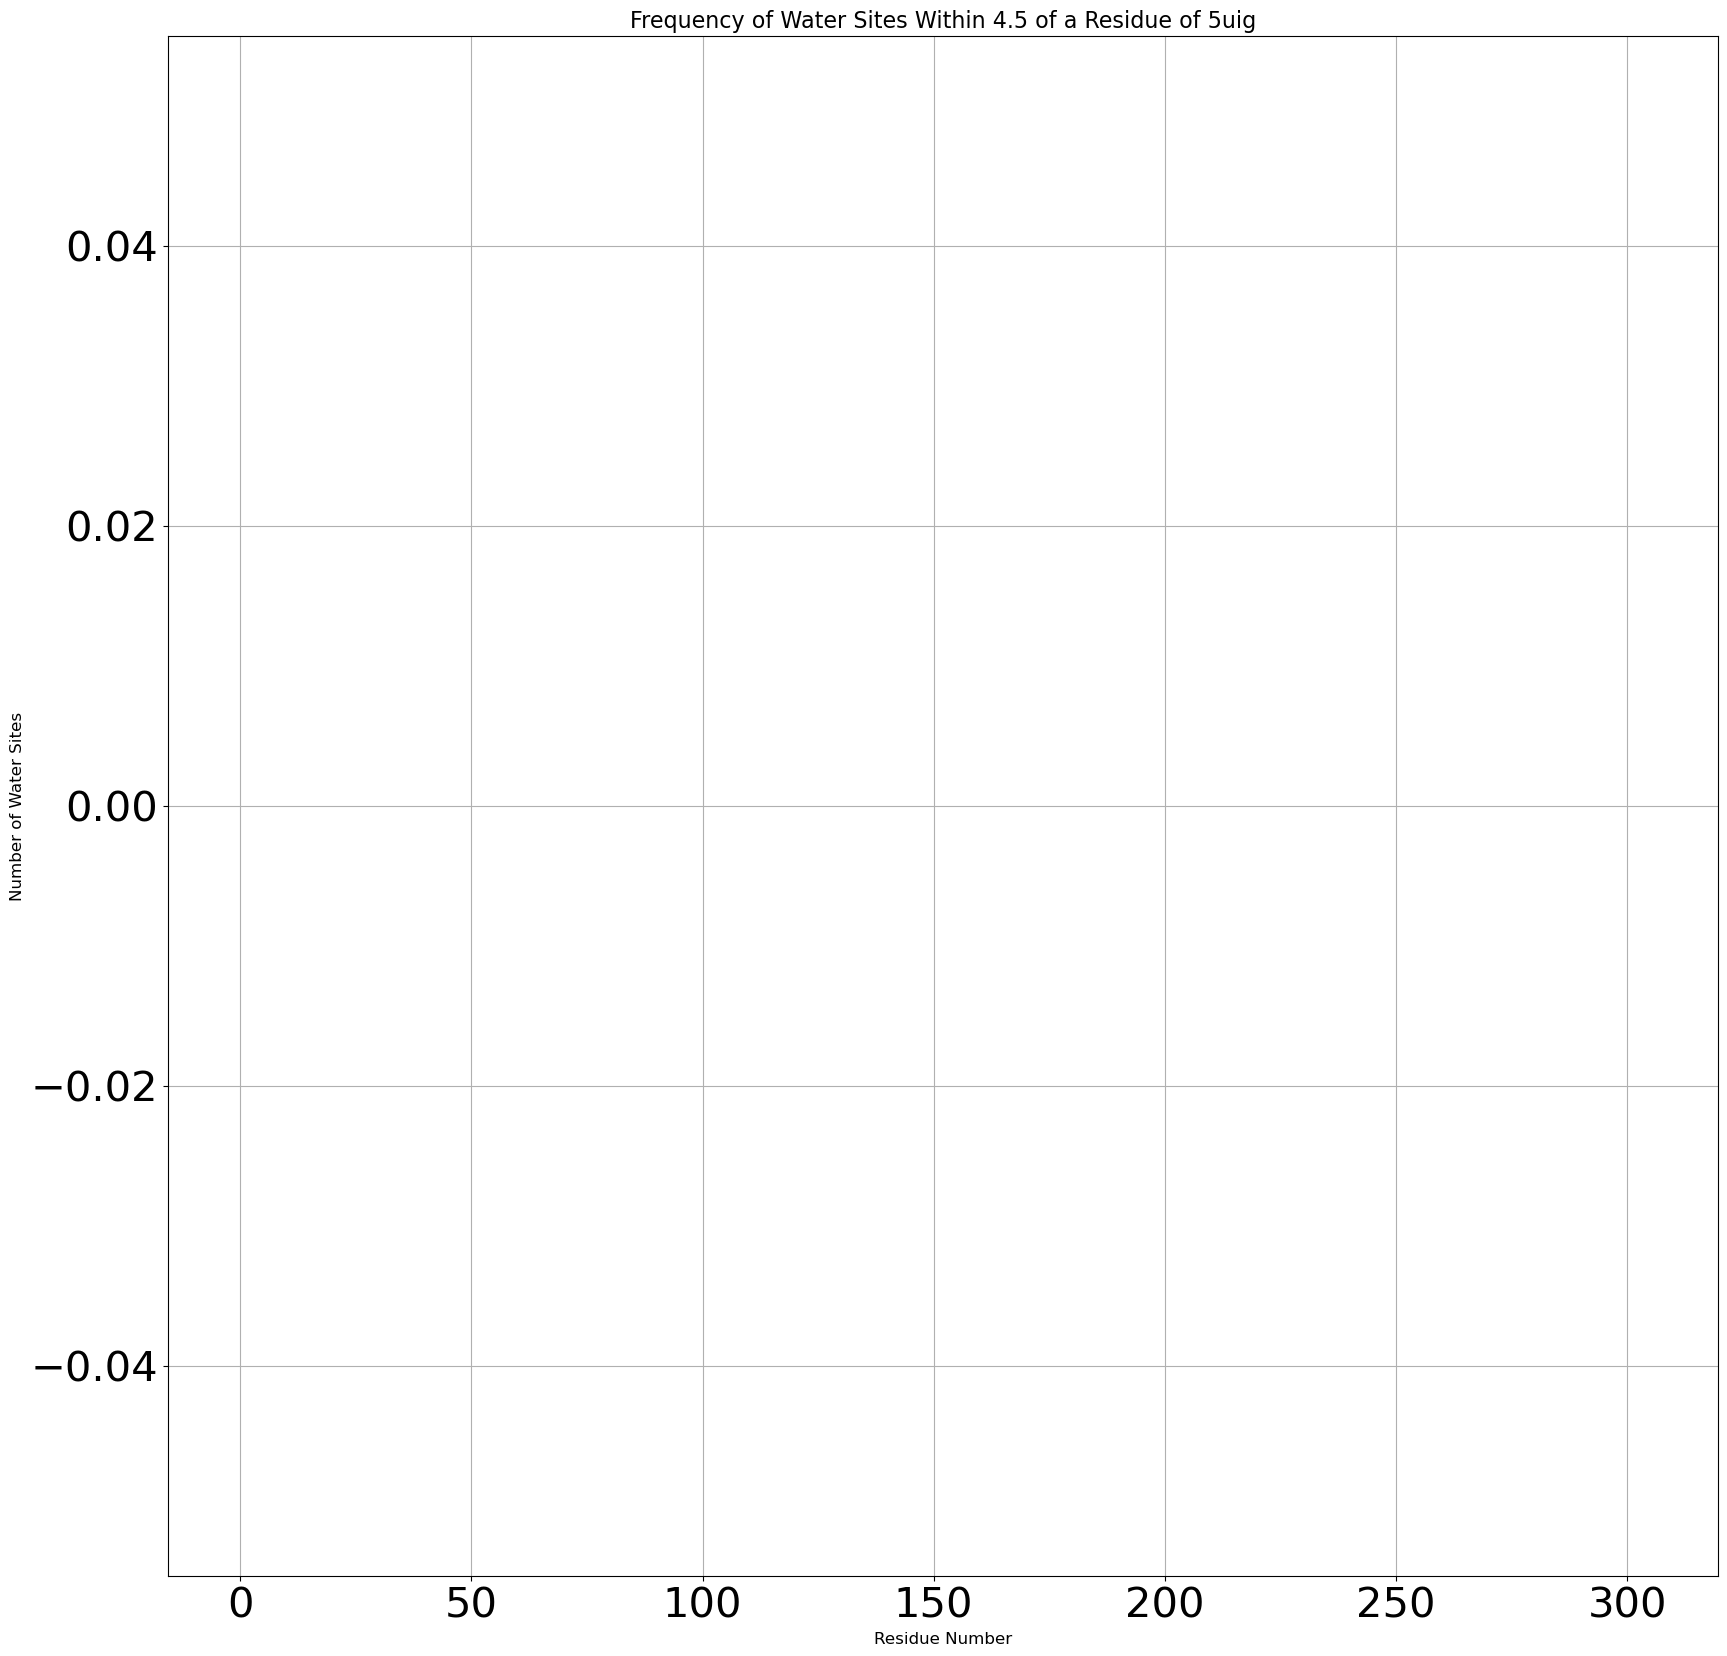

Overall


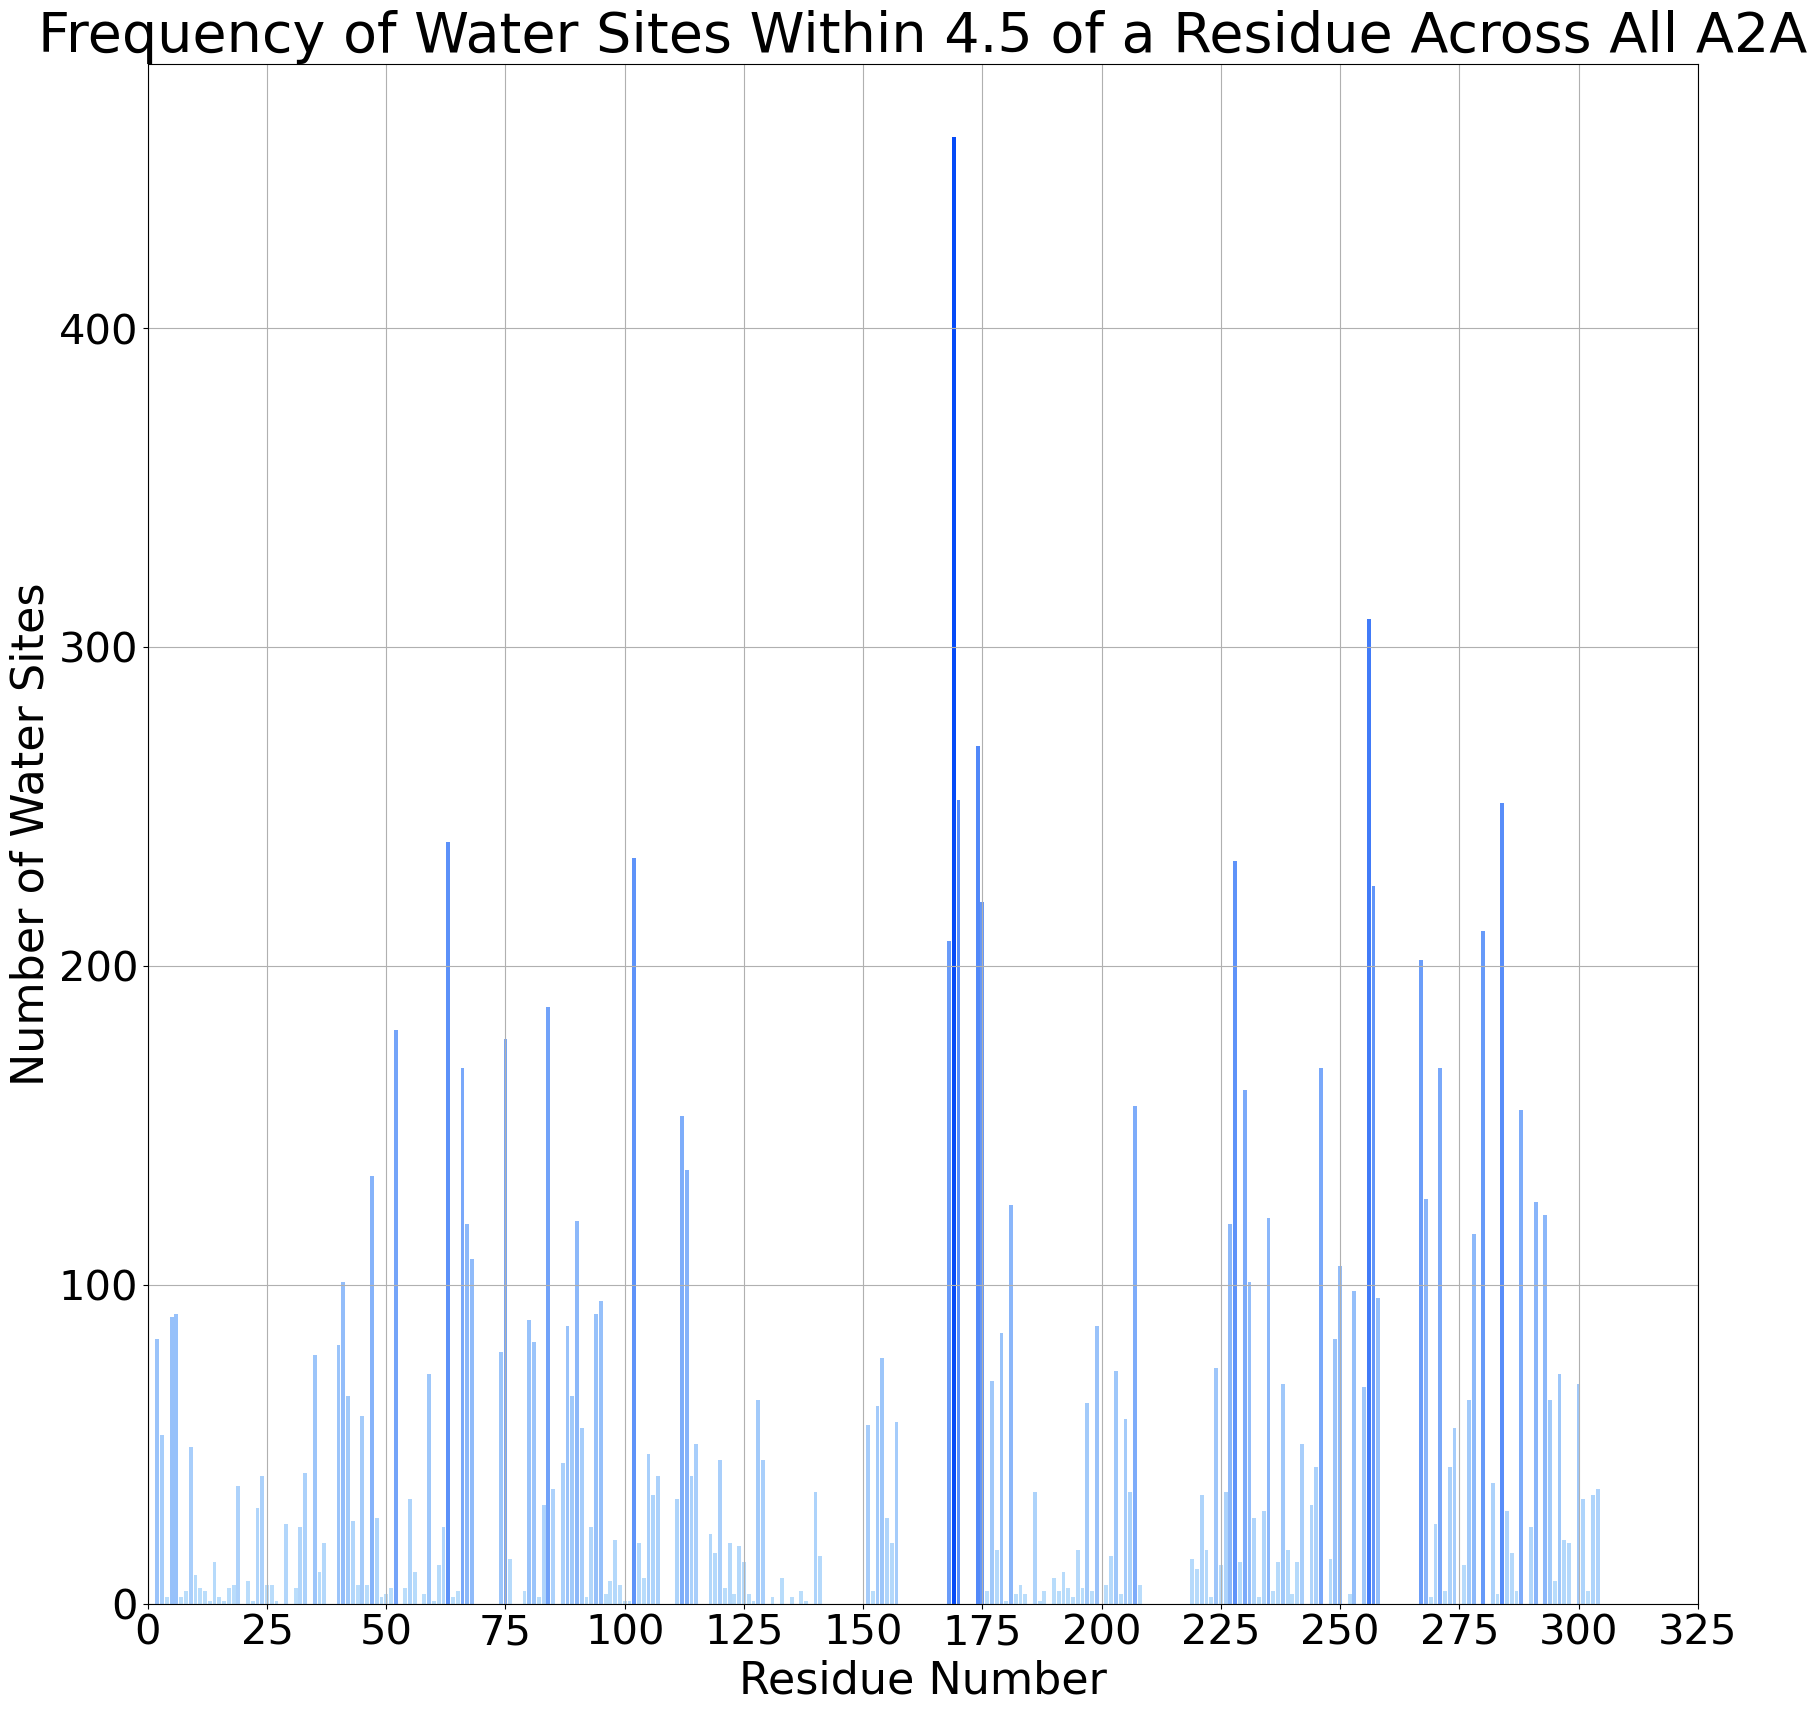

In [10]:
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
resid_count = [0] * 305

def get_filename(filepath):
    "From a given filepath it finds the name of the file in this case it finds only the conformation number"

    import re

    temp = os.path.basename(filepath)[:-7].split('_')[0]

    a = re.findall('^[0-9]*', temp)[0]

    b = temp[len(a):]

    return ''.join([a, b])

#repeat over each file 
for filepath in glob.iglob('/Users/xhu/Aligned_Crystals_2YDV_reference/*_aligned_to_2YDV.pdb'):
#     print(get_filename(filepath))
    Total_Files += 1 
    #defining the crystal structure as the filepath
    CRYSTAL_STRUCTURE = filepath
    #loading into MD analysis as a universe 
    crystal = md.Universe(CRYSTAL_STRUCTURE)
    crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)

#Defining some lists as well as the heavy atoms that we need
    water_list =  list(crystal.select_atoms("resname HOH"))
    heavy_atoms = crystal.select_atoms('protein and not type H')
    heavy_atoms_position = heavy_atoms.positions
#print check for the length of heavy atoms and the amount of water to ensure everything matches up
#     print(len(heavy_atoms_position))
#     print(len(water_list))

#some definitions for the LAWs module
    stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
    N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
    N_atoms_in_chain = len(heavy_atoms_position) # Number of protein atoms in each chain.
    n_waters = len(water_list) # Number of CWS in the crystal structure.

#using MD analysis to select atoms as well as the LAWs code to find the closest heavy atoms
    crystal_waters_chains = crystal.select_atoms('resname HOH and name O')
    crystal_waters_info = [find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains]

    Dist = []
    seg_id = []
    temp_frequency_data = [0] * 305
# for loop to print the closest protein information distance and location.
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][0]) 
        #Only takes the closest 4 heavy atoms
    
        
        for j in range(len(crystal_waters_info[i][0][0])):      
            
            #sort it by the set stuff
            if crystal_waters_info[i][0][j][1] in Helix_Not_2YDV_resid:
                seg_id.append(crystal_waters_info[i][0][j][1])
                temp_frequency_data[crystal_waters_info[i][0][j][1]] += 1 
                resid_count[crystal_waters_info[i][0][j][1]] += 1 
                
#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][1][0])
    #plot the figure generated by each file 
    print(get_filename(filepath)," Watersite Resid :", temp_frequency_data)
    print("")
    plt.figure(figsize=(20, 20))
    plt.bar(range(len(temp_frequency_data)), temp_frequency_data)
    # plt.ylim(0,Total_Files - empty_a2a)
    # plt.xlim(0,len(Counts_percentage))
    plt.grid()
    plt.title('Frequency of Water Sites Within 4.5 of a Residue of ' + get_filename(filepath) , fontsize= 16)
    plt.xlabel('Residue Number',fontsize= 12)
    plt.ylabel('Number of Water Sites',fontsize= 12)
    plt.savefig('/Users/xhu/ROP_Figures_A2A/' + get_filename(filepath))
    plt.show()
    

#     for i in range(len(crystal_waters_info)):
# #         print (crystal_waters_info[i][2][0])
#         Dist.append(crystal_waters_info[i][2][0])

#to cancle out repeating values

#Create a figure for the total of every file 
colours = ["#bbdefb", "#054af7"]
mpl.rc('xtick', labelsize=30) 
mpl.rc('ytick', labelsize=30) 
# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(resid_count), np.max(resid_count)) # linearly normalizes data into the [0.0, 1.0] interva
print("Overall")
plt.figure(figsize=(20, 20))
plt.bar(range(len(resid_count)), resid_count, color= cmap(norm(resid_count)))
plt.title('Frequency of Water Sites Within 4.5 of a Residue Across All A2A', fontsize= 40)
plt.xlabel('Residue Number',fontsize= 32)
plt.ylabel('Number of Water Sites',fontsize= 32)
plt.xlim(0,len(Counts_percentage))
plt.xticks((0,25,50,75,100,125,150,175,200,225,250,275,300,325))
# plt.ylim(0,Total_Files - empty_a2a)
# plt.xlim(0,len(Counts_percentage))
plt.grid()
output_dir = "some/new/directory"
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Freq",bbox_inches='tight')
plt.show() 

Here's the full table of frequency as well as the individual frequency's of each conformation. x axis represents the residue number and the y axis represents the number of waters that are close to each residue. As we can see this graph is similar to the 

In [53]:
Largest_frequency =np.max(resid_count)
Largest_frequency_id = resid_count.index(Largest_frequency)

print("Largest frequency belongs to resid ", Largest_frequency_id, " with ", Largest_frequency, " across all A2A" )
List_above_30 = []
for resid in range(len(resid_count)):
    if resid == 287:
        List_above_30.append(resid_count[resid])
print((List_above_30))

Largest frequency belongs to resid  169  with  460  across all A2A
[4]


In [649]:
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
    #loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)
protein = crystal.select_atoms('all')
top = []
for atom in protein :
    if atom.resid < 0 :
        top.append(0)
    if atom.resid < 305 and atom.resid >= 0:
        top.append(resid_count[atom.resid]) 
    if atom.resid >= 305:
        top.append(0)
        
crystal.add_TopologyAttr('tempfactors')
crystal.atoms.tempfactors = top
crystal.atoms.write("new_frequency.pdb")

Overall


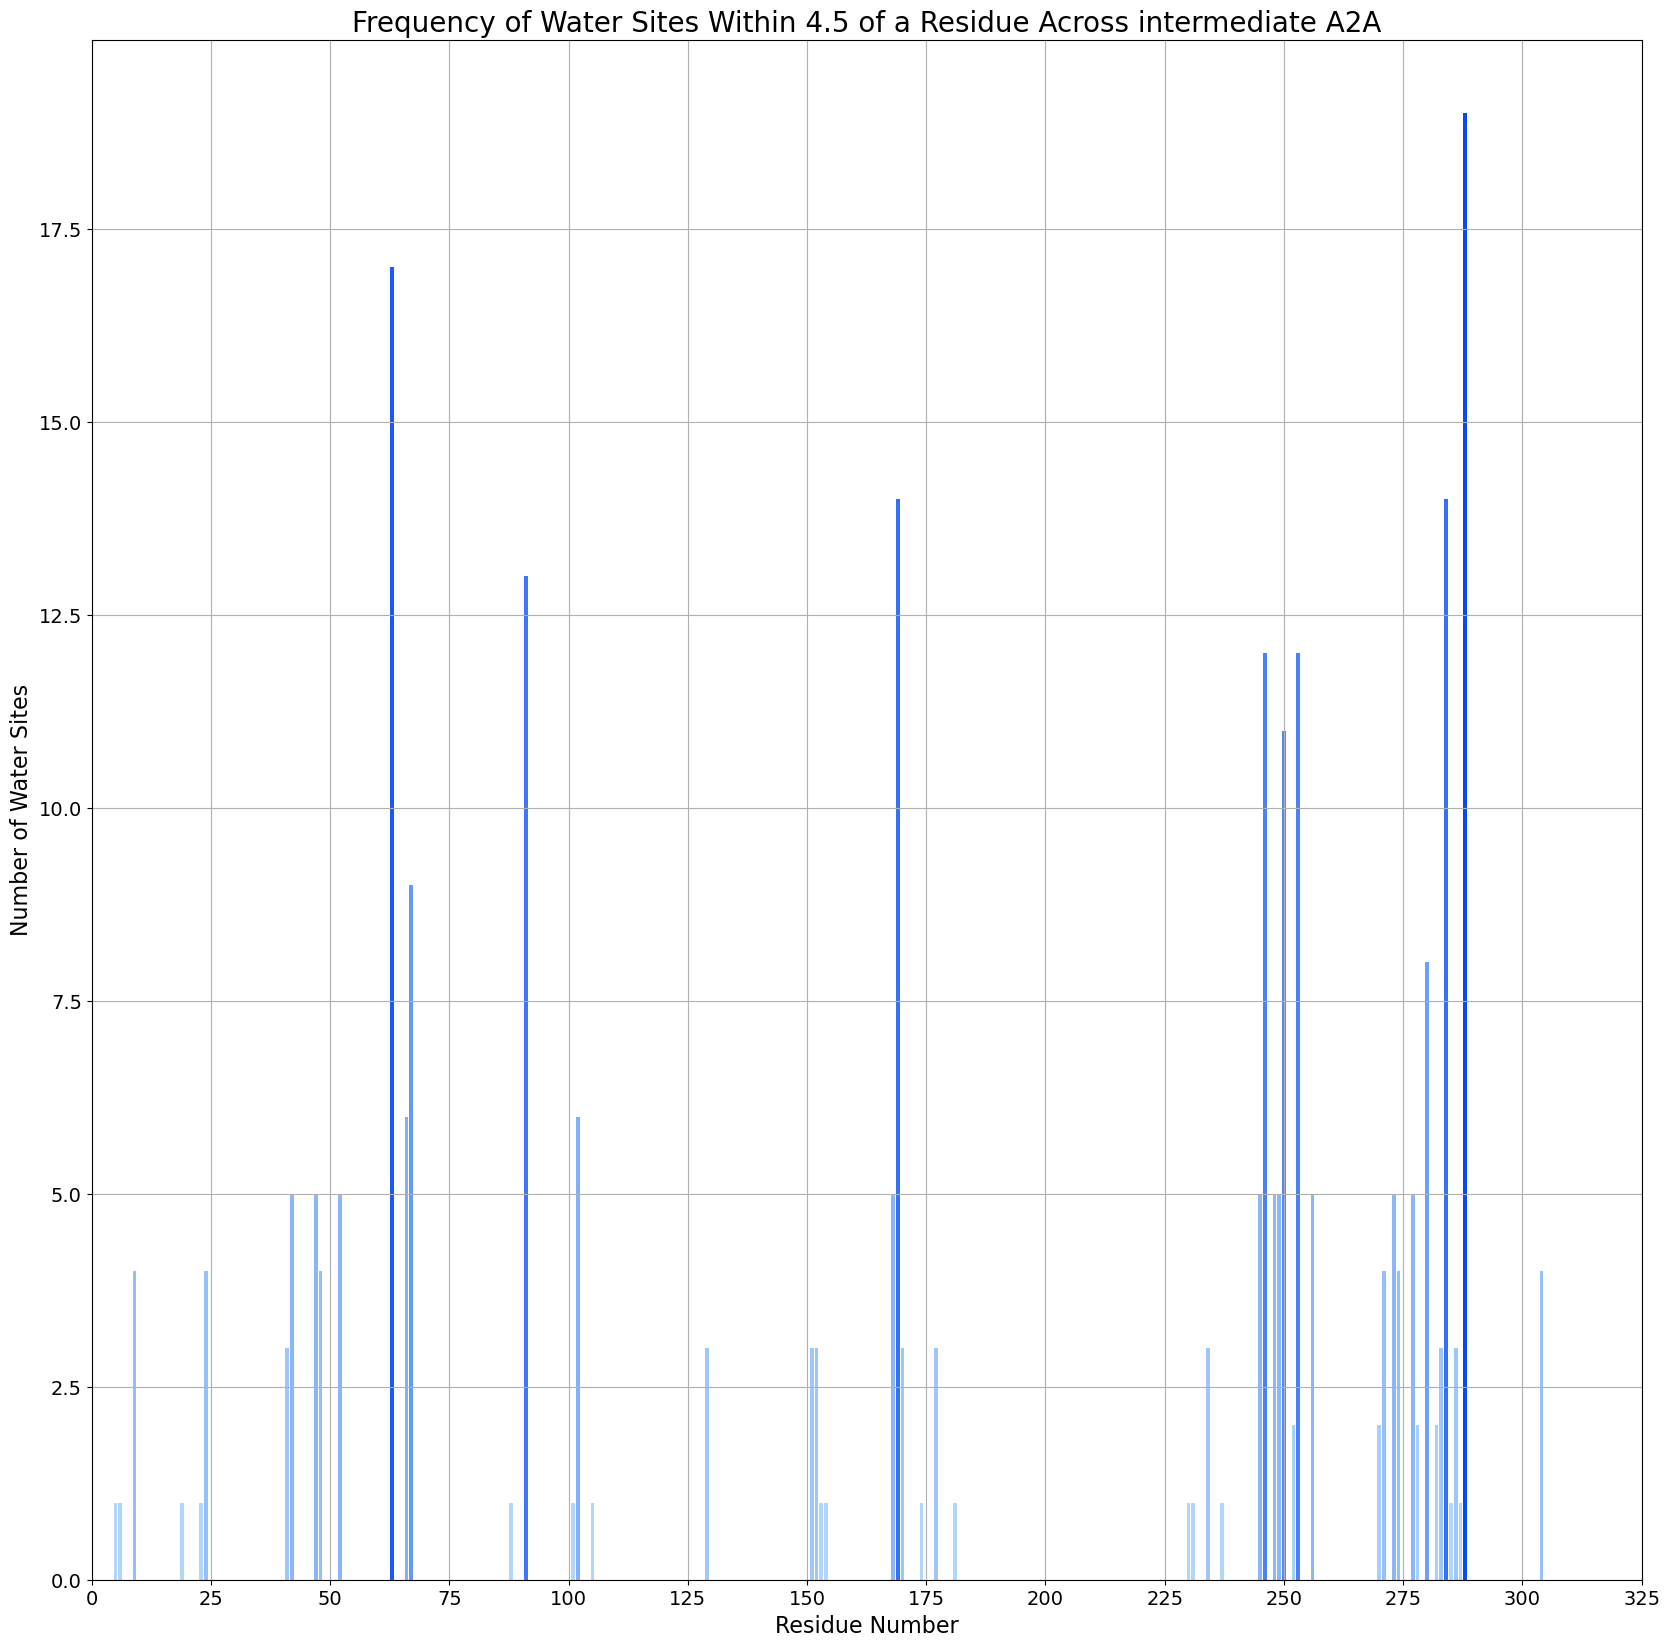

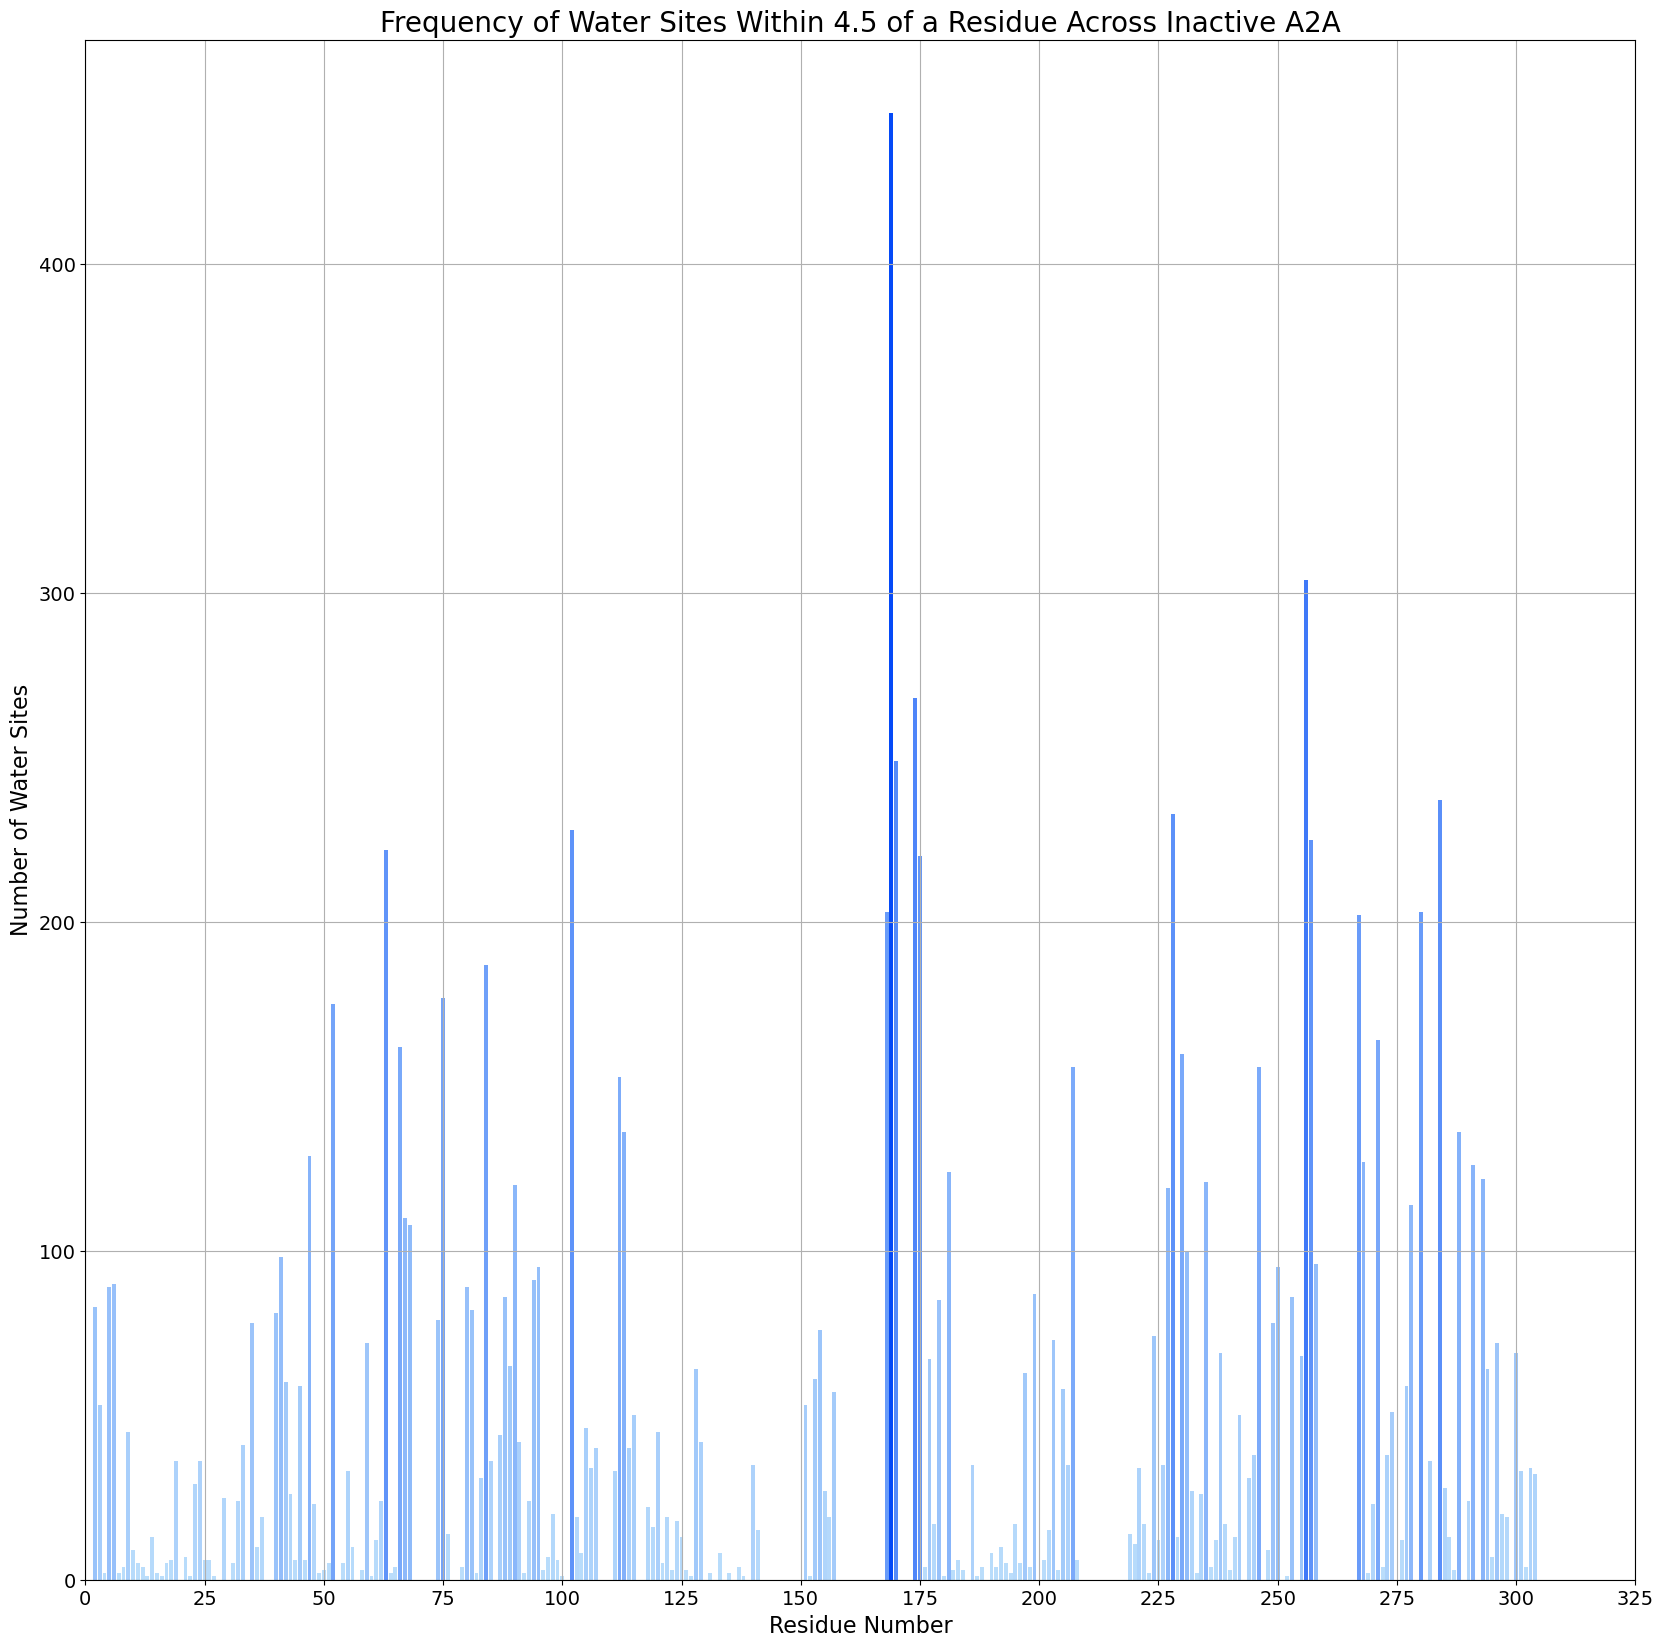

In [21]:
### crystal = md.Universe(CRYSTAL_STRUCTURE)
import glob
import matplotlib as mpl

#empty Lists and definitions
resid_count = [0] * 305
list_of_list = []
empty_a2a = 0
Total_Files = 0
file_name = "{:}_WaterFrequency.jpg"
inactive = ("7ezc","5wf6","5wf5","4ug2","4uhr","2ydv","2ydo","3qak")
interactive_A2A = [0] * 305
inactive_A2A = [0] * 305

def get_filename(filepath):
    "From a given filepath it finds the name of the file in this case it finds only the conformation number"

    import re

    temp = os.path.basename(filepath)[:-7].split('_')[0]

    a = re.findall('^[0-9]*', temp)[0]

    b = temp[len(a):]

    return ''.join([a, b])

#repeat over each file 

for filepath in glob.iglob('/Users/xhu/Aligned_Crystals_2YDV_reference/*_aligned_to_2YDV.pdb'):
#     print(get_filename(filepath))
    Total_Files += 1 
    #defining the crystal structure as the filepath
    CRYSTAL_STRUCTURE = filepath
    #loading into MD analysis as a universe 
    crystal = md.Universe(CRYSTAL_STRUCTURE)
    crystal_box = crystal.trajectory[0].dimensions # dimensions of the sell. Needed for treating periodic boundaries.
# print(crystal, crystal_box)

#Defining some lists as well as the heavy atoms that we need
    water_list =  list(crystal.select_atoms("resname HOH"))
    heavy_atoms = crystal.select_atoms('protein and not type H')
    heavy_atoms_position = heavy_atoms.positions
#print check for the length of heavy atoms and the amount of water to ensure everything matches up
#     print(len(heavy_atoms_position))
#     print(len(water_list))

#some definitions for the LAWs module
    stride = 10 # Stride for analysis (when stride=10 we will analyze only every 10-th frame of the original trajectory)
    N_chains = 1 # Number of symmetric chains in the simulation. In the manuscript, we have a unit cell with 4 protein chains. 
    N_atoms_in_chain = len(heavy_atoms_position) # Number of protein atoms in each chain.
    n_waters = len(water_list) # Number of CWS in the crystal structure.

#using MD analysis to select atoms as well as the LAWs code to find the closest heavy atoms
    crystal_waters_chains = crystal.select_atoms('resname HOH and name O')
    crystal_waters_info = [find_N_closest_heavy_atoms(water.position, heavy_atoms, crystal_box) for water in crystal_waters_chains]

    #empty lists
    Dist = []
    seg_id = []
    temp_frequency_data = [0] * 305
# for loop to print the closest protein information distance and location.
    for i in range(len(crystal_waters_info)):
#         print (crystal_waters_info[i][0])
        #Only takes the closest 4 heavy atoms
    
        
        for j in range(len(crystal_waters_info[i][0][0])):      
            
            #sort it by the set stuff
            if crystal_waters_info[i][0][j][1] in Helix_Not_2YDV_resid:
                seg_id.append(crystal_waters_info[i][0][j][1])
                resid_count[crystal_waters_info[i][0][j][1]] += 1 
                temp_frequency_data[crystal_waters_info[i][0][j][1]] += 1 
                
                #Sort the frequency by inactive and active states based on the definition before
                if get_filename(filepath) in inactive :
                    interactive_A2A[crystal_waters_info[i][0][j][1]] += 1
        
                else :
                    inactive_A2A[crystal_waters_info[i][0][j][1]] += 1
        
colours = ["#bbdefb", "#054af7"]
# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(interactive_A2A), np.max(interactive_A2A)) # linearly normalizes data into the [0.0, 1.0] interval


#print and plot statements
print("Overall")
plt.figure(figsize=(20, 20))
plt.bar(range(len(interactive_A2A)), interactive_A2A, color=cmap(norm(interactive_A2A) ))
plt.title('Frequency of Water Sites Within 4.5 of a Residue Across intermediate A2A', fontsize= 20)
plt.xlabel('Residue Number',fontsize= 16)
plt.ylabel('Number of Water Sites',fontsize= 16)
plt.xlim(0,len(Counts_percentage))
plt.xticks((0,25,50,75,100,125,150,175,200,225,250,275,300,325))
plt.grid()
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Freq_interactive")
plt.show() 


# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(inactive_A2A), np.max(inactive_A2A)) # linearly normalizes data into the [0.0, 1.0] interva


plt.figure(figsize=(20, 20))
plt.bar(range(len(inactive_A2A)), inactive_A2A,color=cmap(norm(inactive_A2A)))
plt.title('Frequency of Water Sites Within 4.5 of a Residue Across Inactive A2A', fontsize= 20)
plt.xlabel('Residue Number',fontsize= 16)
plt.ylabel('Number of Water Sites',fontsize= 16)
plt.xlim(0,len(Counts_percentage))
plt.xticks((0,25,50,75,100,125,150,175,200,225,250,275,300,325))
plt.grid()
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Freq_inactive")
plt.show() 

In [99]:
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
    #loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)
protein = crystal.select_atoms('all')
top = []
for atom in protein :
    if atom.resid < 0 :
        top.append(0)
    if atom.resid < 305 and atom.resid >= 0:
        top.append(Resid_Confidence[atom.resid]) 
    if atom.resid >= 305:
        top.append(0)
        
crystal.add_TopologyAttr('tempfactors')
crystal.atoms.tempfactors = top
crystal.atoms.write("new_frequency.pdb")

In [615]:
# Define the input protein sequence in the 'Text' variable
Text = ("------------------------------------------------------------"
        "------------------------------------------------------------"
        "--------------------------MPI---MGSSVYIT-VELAIAVLAILGNVLVCWA"
        "VWL-N-SNL-QNV---TNYFVVSLAAADIAVGVLAIPFAIT-ISTGF---CAACHGCLFI"
        "ACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNG--LVT---GTRAKGIIAICWVLSFAI"
        "G-------LTPMLG-WNNCGQPKEGKNHSQGCGEG--QVACLFEDV-V--------PMNY"
        "MVYFNFFACVLVPLLLMLGVYLRIFLAARRQLKQMESQP---------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "---------------------------------------LPGERARSTLQKEVHAAKSLA"
        "IIVGLFALCWLPLHIINCFTFFCP-------DCSHAP--LWLMYLAIVLSHTNSVVNPFI"
        "YAYRIREFRQTFRKIIRSHVLRQQEPFKAAGTSARVLAAHG----------SDGEQVSLR"
        "LNGHP--PGVWANGSAPHPERRPNGYALG------L--VSGGSAQESQGNTGLPDVELLS"
        "HELKGVCPEPPGLDDPLAQDGAGVS--")

# Create a list of positions (indexes) where characters are not '-'
List = []
x = [*Text]
for char in range(len(x)):
    if x[char] != "-":
        List.append((char))

# Import the Pandas library for data analysis
import pandas as pd

# Read data from a CSV file into a DataFrame named 'df'
df = pd.read_csv("All_Class_A.csv", header=0)

# Define lists of amino acid letters and their fixed versions
Sequence_Letter = ("A ", "C ", "D ", "E ", "F ", "G ", "H ", "I ", "K ", "L ", "M ", "N ", "P ", "Q ", "R ", "S ", "T ", "V ", "W ", "Y ")
Sequence_Letter_Fixed = ("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")

# Initialize lists to store conservation proportions and corresponding residue names
Total_Conservation_Porportion = []
Total_Conservation_Name = []

# Iterate through each position in the 'df["#"]' column
for x in df["#"]:
    value = int(x)
    Values = []
    
    # Iterate through each residue in the 'Sequence_Letter' list
    for Residue in Sequence_Letter:
        Values.append(df[Residue][x-1])
    
    # Calculate the maximum conservation score and total conservation score
    Max = np.max(Values)
    Total = sum(Values)
    
    # Iterate through positions in 'List' to find matching 'value'
    for y in List:
        if value == y:
            # Calculate conservation proportion and store results
            Total_Conservation_Porportion.append(Max / Total)
            Total_Conservation_Name.append(Sequence_Letter[Values.index(Max) - 1])

# Print the conservation proportion and corresponding residue at position 168
print(Total_Conservation_Porportion[168], Total_Conservation_Name[168])

0.13636363636363635 K 


In [ ]:
import MDAnalysis as md
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
    #loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)


#selecting all proteins in the crystal structure 
protein = crystal.select_atoms('all')
#create empty list 
top = []

#repeat for each atom in the protein
for atom in protein :
    
    #For atoms outside the main body set 0
    if atom.resid < 1 :
        top.append(0)
    
    #For atoms within our range of values we set the number equal to the frequency observed
    if atom.resid < 303 and atom.resid >= 1:
        top.append(Total_Conservation_Porportion[atom.resid - 1]) 
        
    #for atoms outside the main body set 0
    if atom.resid >= 303:
        top.append(0)

#Add a new topology attribute 
crystal.add_TopologyAttr('tempfactors')

#Rewrite the beta numbers according to the list we made before 
crystal.atoms.tempfactors = top

#Write new pbd files 
crystal.atoms.write("Conservation.pdb")

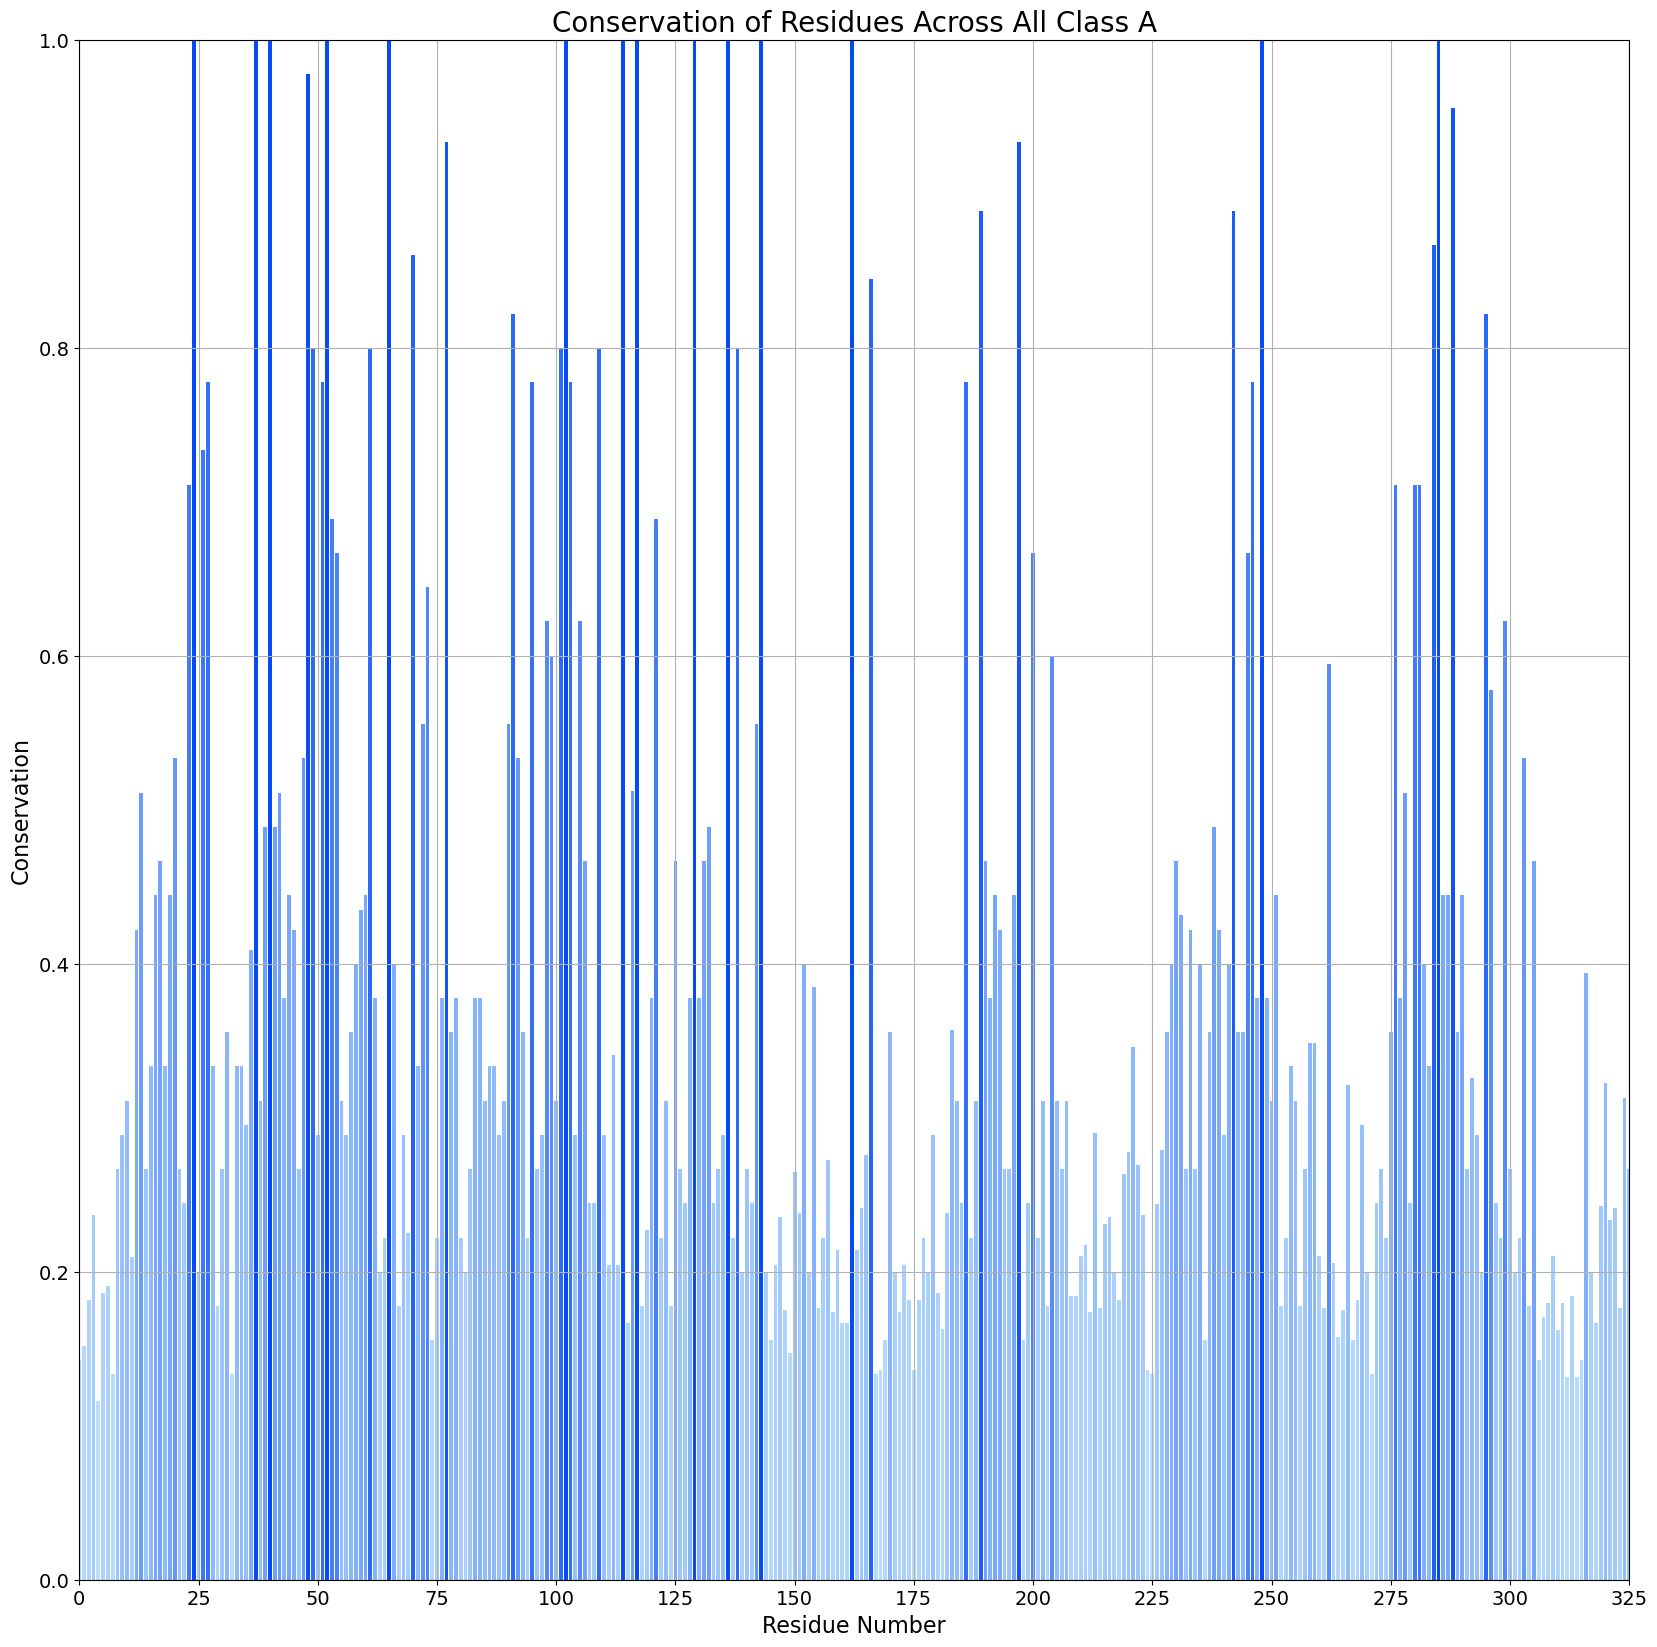

[14, 21, 24, 25, 27, 28, 38, 41, 43, 48, 49, 50, 52, 53, 54, 55, 62, 66, 71, 73, 74, 78, 91, 92, 93, 96, 99, 100, 102, 103, 104, 106, 110, 115, 117, 118, 122, 130, 137, 139, 143, 144, 163, 167, 187, 190, 198, 201, 205, 243, 246, 247, 249, 263, 277, 279, 281, 282, 285, 286, 289, 296, 297, 300, 304, 334, 343, 345, 359, 366, 368, 379, 381, 382, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 403, 404, 405, 406, 407, 409, 412]


In [623]:
import importlib

# Reload the specified libraries to ensure any changes are applied
importlib.reload(mpl)
importlib.reload(plt)
importlib.reload(sns)

# Create a linear colormap with custom colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)

# Normalize the data to the [0.0, 1.0] interval using linear normalization
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion), np.max(Total_Conservation_Porportion))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# Create a new figure with a specific size
plt.figure(figsize=(20, 20))

# Create a bar plot with colored bars based on the colormap
plt.bar(range(len(Total_Conservation_Porportion)), Total_Conservation_Porportion, color=cmap(norm(Total_Conservation_Porportion)))

# Set y-axis limits
plt.ylim(0, 1)

# Set x-axis limits
plt.xlim(0, 325)

# Set custom tick positions for x-axis
plt.xticks((0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325))

# Add gridlines to the plot
plt.grid()

# Set the title of the plot
plt.title('Conservation of Residues Across All Class A', fontsize=20)

# Set labels for x-axis and y-axis
plt.xlabel('Residue Number', fontsize=16)
plt.ylabel('Conservation', fontsize=16)

# Save the plot to a file
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Conservation")

# Display the plot
plt.show()

# Initialize a list to store residue numbers with conservation above 0.5
List_above_30 = []

# Iterate through each residue and check if its conservation is above 0.5
for resid in range(len(Total_Conservation_Porportion)):
    if Total_Conservation_Porportion[resid] >= 0.5:
        List_above_30.append((resid + 1))

# Print the list of residue numbers with conservation above 0.5
print(List_above_30)


(95, 'L') K 


196


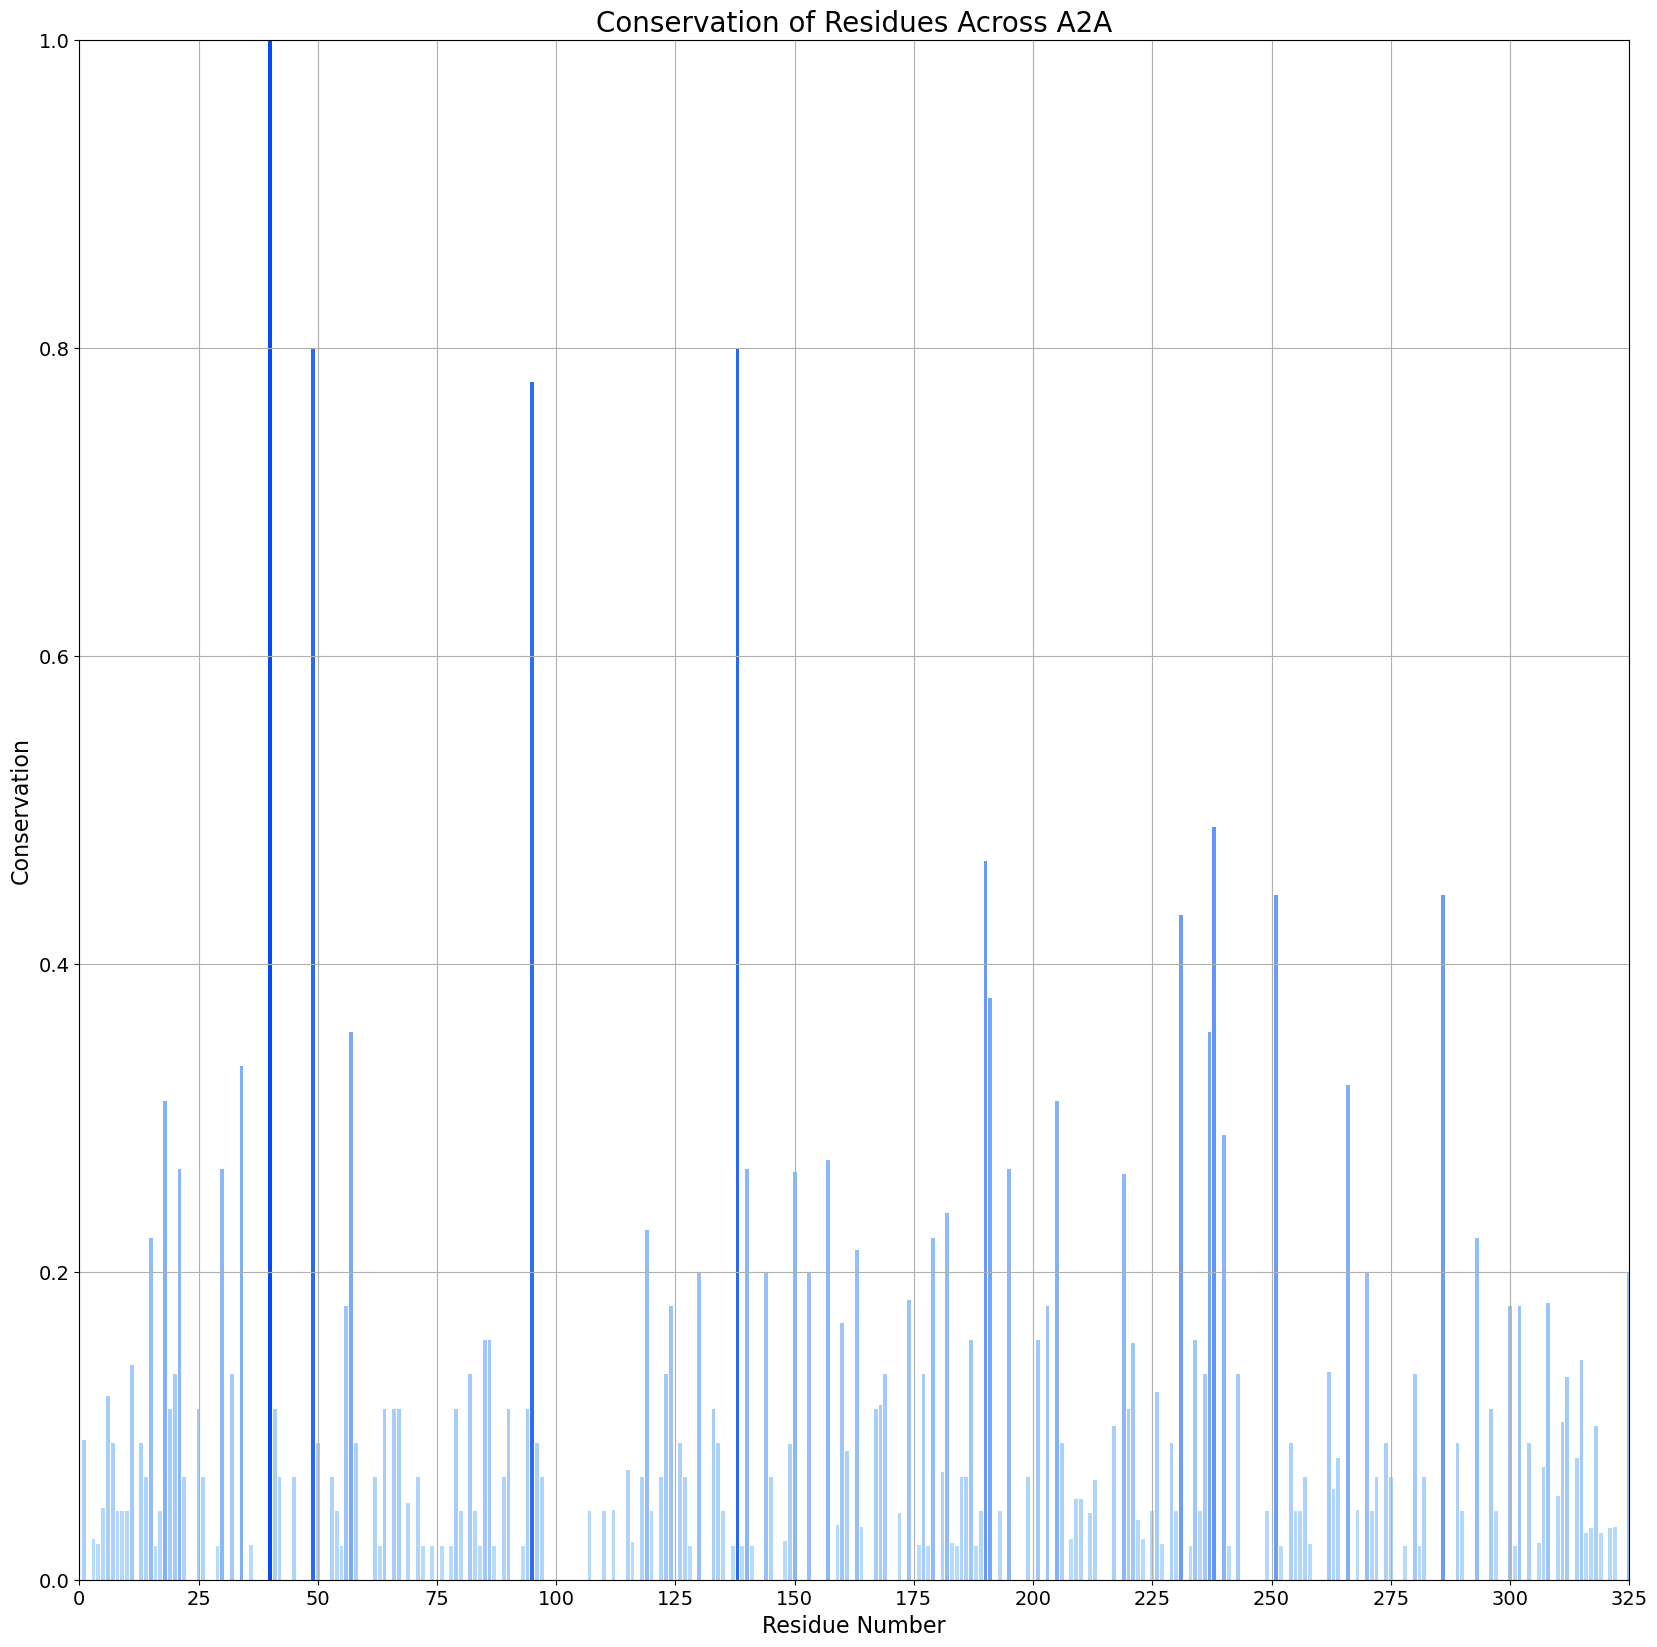

In [653]:
# Define the input protein sequence in the 'Text' variable
Text = ("------------------------------------------------------------"
        "------------------------------------------------------------"
        "--------------------------MPI---MGSSVYIT-VELAIAVLAILGNVLVCWA"
        "VWL-N-SNL-QNV---TNYFVVSLAAADIAVGVLAIPFAIT-ISTGF---CAACHGCLFI"
        "ACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNG--LVT---GTRAKGIIAICWVLSFAI"
        "G-------LTPMLG-WNNCGQPKEGKNHSQGCGEG--QVACLFEDV-V--------PMNY"
        "MVYFNFFACVLVPLLLMLGVYLRIFLAARRQLKQMESQP---------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "---------------------------------------LPGERARSTLQKEVHAAKSLA"
        "IIVGLFALCWLPLHIINCFTFFCP-------DCSHAP--LWLMYLAIVLSHTNSVVNPFI"
        "YAYRIREFRQTFRKIIRSHVLRQQEPFKAAGTSARVLAAHG----------SDGEQVSLR"
        "LNGHP--PGVWANGSAPHPERRPNGYALG------L--VSGGSAQESQGNTGLPDVELLS"
        "HELKGVCPEPPGLDDPLAQDGAGVS--")

# Create lists to store residue positions and corresponding letters
List_Seq = []
List_Seq_Letter = []

# Convert the input sequence into lists of positions and letters
x = [*Text]
for char in range(len(x)):
    if x[char] != "-":
        List_Seq.append((char))
        List_Seq_Letter.append(x[char])

# Print a specific residue position (index 40 in this case)
print(List_Seq[40])

# Import the Pandas library for data analysis
import pandas as pd

# Read data from a CSV file into a DataFrame named 'df'
df = pd.read_csv("All_Class_A.csv", header=0)

# Define lists of amino acid letters and their fixed versions
Sequence_Letter = ("A ", "C ", "D ", "E ", "F ", "G ", "H ", "I ", "K ", "L ", "M ", "N ", "P ", "Q ", "R ", "S ", "T ", "V ", "W ", "Y ")
Sequence_Letter_Fixed = ("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")

# Initialize lists to store conservation proportions and corresponding residue names
Total_Conservation_Porportion_A2A = []
Total_Conservation_Name_A2A = []

# Iterate through each position in the 'df["#"]' column
for x in df["#"]:
    value = int(x)
    Values = []
    
    # Iterate through each residue in the 'Sequence_Letter' list
    for Residue in Sequence_Letter:
        Values.append(df[Residue][x - 1])
    
    Total = sum(Values)
    
    # Iterate through positions in 'List_Seq' to find matching 'value'
    for y in range(len(List_Seq)):
        if value == List_Seq[y]:
            # Calculate conservation proportion and store results
            Max = Values[Sequence_Letter_Fixed.index(List_Seq_Letter[y])]
            Total_Conservation_Porportion_A2A.append(Max / Total)
            Total_Conservation_Name_A2A.append(List_Seq_Letter[y])

# Create a linear colormap with custom colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)

# Normalize the data to the [0.0, 1.0] interval using linear normalization
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion_A2A), np.max(Total_Conservation_Porportion_A2A))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# Create a new figure with a specific size
plt.figure(figsize=(20, 20))

# Create a bar plot with colored bars based on the colormap
plt.bar(range(len(Total_Conservation_Porportion_A2A)), Total_Conservation_Porportion_A2A, color=cmap(norm(Total_Conservation_Porportion_A2A)))

# Set y-axis limits
plt.ylim(0, 1)

# Set x-axis limits
plt.xlim(0, 325)

# Set custom tick positions for x-axis
plt.xticks((0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325))

# Add gridlines to the plot
plt.grid()

# Set the title of the plot
plt.title('Conservation of Residues Across A2A', fontsize=20)

# Set labels for x-axis and y-axis
plt.xlabel('Residue Number', fontsize=16)
plt.ylabel('Conservation', fontsize=16)

# Save the plot to a file
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Conservation_A2A")

# Display the plot
plt.show()


In [654]:
import MDAnalysis as md
CRYSTAL_STRUCTURE = '/Users/xhu/a2a_pdbs_alignedto2YDV/pdb7px4.ent.gz_aligned_to_2ydv.pdb'
    #loading into MD analysis as a universe 
crystal = md.Universe(CRYSTAL_STRUCTURE)


#selecting all proteins in the crystal structure 
protein = crystal.select_atoms('all')
#create empty list 
top = []

#repeat for each atom in the protein
for atom in protein :
    
    #For atoms outside the main body set 0
    if atom.resid < 0 :
        top.append(0)
    
    #For atoms within our range of values we set the number equal to the frequency observed
    if atom.resid < 303 and atom.resid >= 0:
        top.append(Total_Conservation_Porportion_A2A[atom.resid]) 
        
    #for atoms outside the main body set 0
    if atom.resid >= 303:
        top.append(0)

#Add a new topology attribute 
crystal.add_TopologyAttr('tempfactors')

#Rewrite the beta numbers according to the list we made before 
crystal.atoms.tempfactors = top

#Write new pbd files 
crystal.atoms.write("Conservation_A2A.pdb")

In [509]:
import corner

# Initialize empty lists to store frequency data
Freq_Confidence = []
Freq_Conservation = []
Freq_Freq = []

# Loop through each number in the range of New_Total_Conservation_Porportion_A2A length
for number in range(len(New_Total_Conservation_Porportion_A2A)):
    
    # Calculate the frequency of Conservation values based on a formula
    for Conservation in range(int((New_Total_Conservation_Porportion_A2A[number] * 67) ** 2)):
        Freq_Conservation.append(number)
        
    # Calculate the frequency of Conservation values based on another formula
    for Conservation in range(int(resid_count[number] ** 1.2)):
        Freq_Freq.append(number)
        
    # Calculate the frequency of Confidence values based on a formula
    for Conservation in range(int((Resid_Confidence[number] ** 2) / 3.5166)):
        Freq_Confidence.append(number)

# Trim the lists to a specific length (30732)
Freq_Conservation = Freq_Conservation[0:30732]
Freq_Confidence = Freq_Confidence[0:30732]

# Create a list 'stuff' with repeated values
stuff = []
for number in range(305):
    stuff.append(number)
for number in range(305):
    stuff.append(number)
for number in range(305):
    stuff.append(number)
for number in range(305):
    stuff.append(number)

# Append values from 'stuff' list to the Freq_Freq list
for number in range(387):
    Freq_Freq.append(stuff[number])

# Print the lengths of different lists for verification
print(len(Freq_Confidence), len(Freq_Conservation), len(Freq_Freq), len(zero))


30732 30732 30732 0


In [545]:
Data_Frame_Entry = {
#     "Frequency" : Freq_Freq,
    "Confidence" : Freq_Confidence,
    "Conservation" : Freq_Conservation
    
    
}

Data_Frame = pd.DataFrame(Data_Frame_Entry)


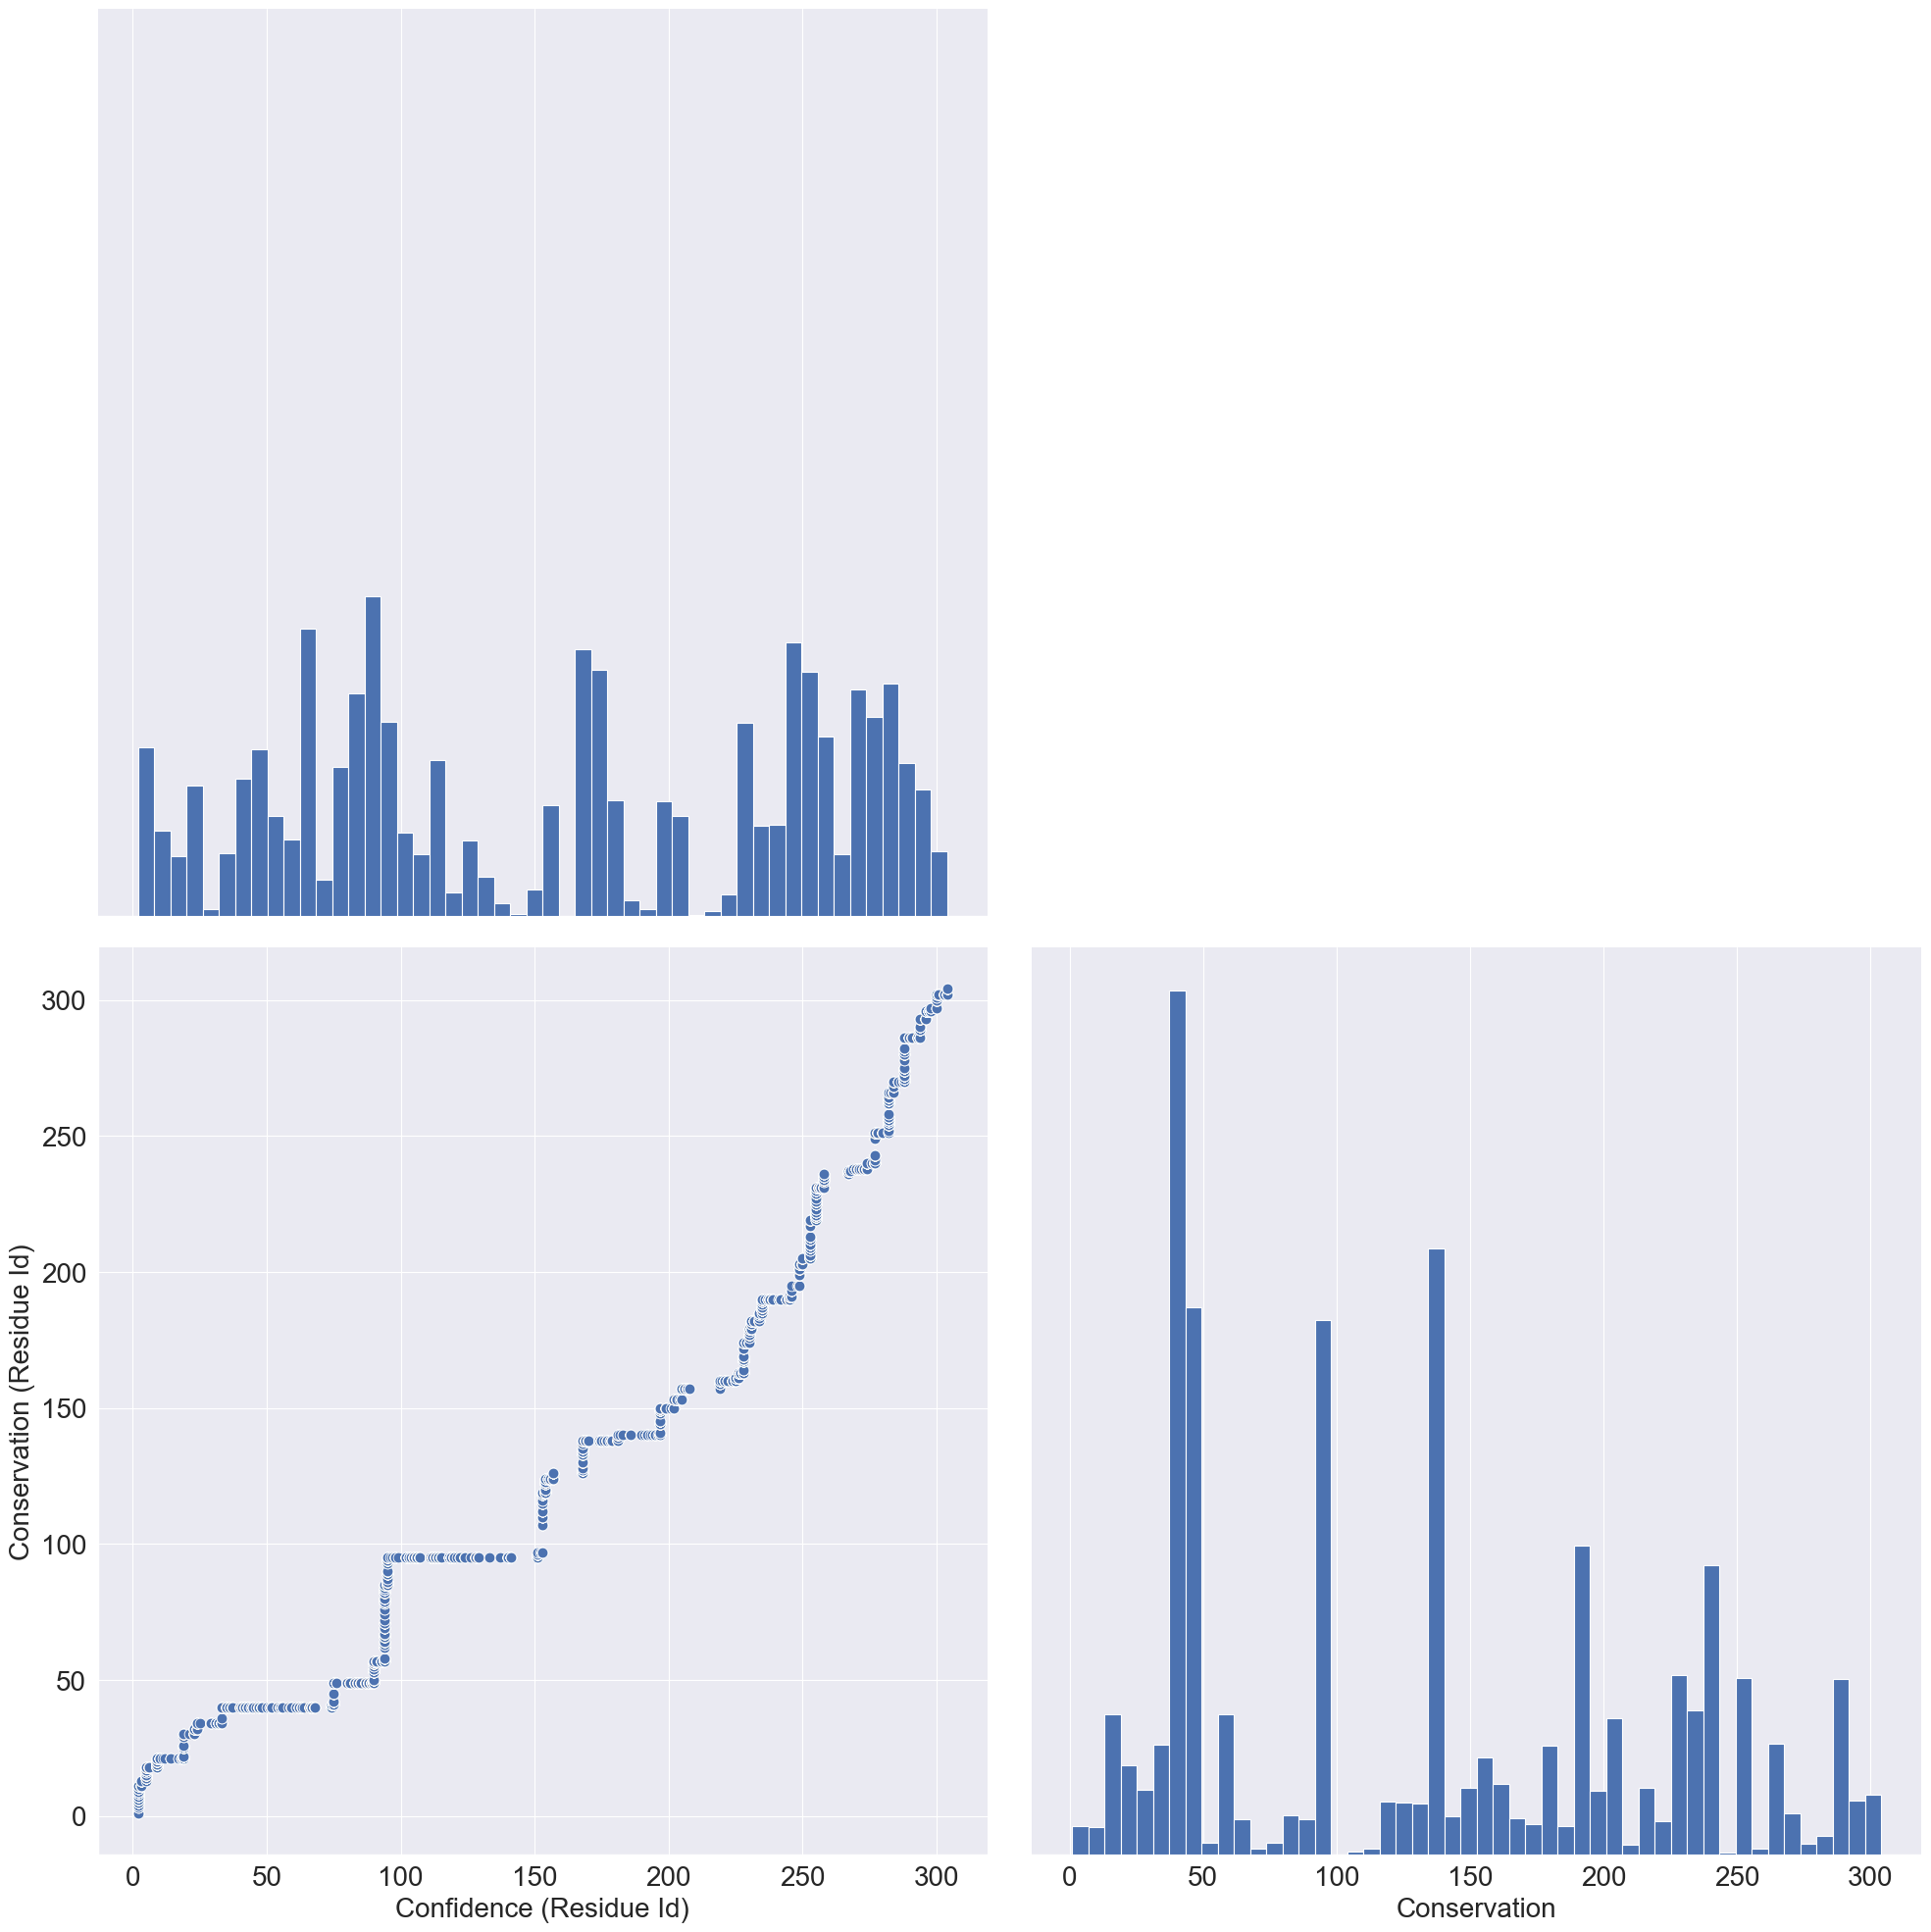

In [582]:
# Set the fontsize for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

# Create a PairGrid for scatterplot visualization using seaborn
figure = sns.PairGrid(Data_Frame, corner=True, height=10)

# Map scatterplots to the lower triangle of the grid
figure = figure.map_lower(sns.scatterplot, cmap="Blues_d", s=60)

# Map histograms to the diagonal of the grid
figure = figure.map_diag(plt.hist, bins=50, edgecolor="w")

# Set labels for specific axes
figure.axes[1, 1].xaxis.set_label_text("Conservation", fontsize=20)
figure.axes[1, 0].xaxis.set_label_text("Confidence (Residue Id)", fontsize=20)
figure.axes[1, 0].yaxis.set_label_text("Conservation (Residue Id)", fontsize=20)

# Set custom tick positions for x-axis and y-axis
plt.xticks((0, 50, 100, 150, 200, 250, 300))
plt.yticks((0, 50, 100, 150, 200, 250, 300))

# Save the plot to a file with tight bounding box
plt.savefig('/Users/xhu/Desktop/' + "Conservation-Confidence", bbox_inches='tight')

# Display the plot
plt.show()

# Define colors for the scatterplot
colours = ["#bbdefb", "#054af7"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion_A2A), np.max(Total_Conservation_Porportion_A2A))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

# Set y-axis and x-axis limits
plt.ylim(-0.05, 1)
plt.xlim(-0.05, 1)

# Create a scatterplot using seaborn
sns.scatterplot(x=Resid_Confidence/51, y=New_Total_Conservation_Porportion_A2A, marker="o")

# Set labels for x-axis and y-axis
plt.xlabel('% Confidence', fontsize=16)
plt.ylabel('% Conservation', fontsize=16)

# Display the plot
plt.show()

# Define colors for the scatterplot
colours = ["#bbdefb", "#054af7"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion_A2A), np.max(Total_Conservation_Porportion_A2A))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

# Set y-axis and x-axis limits
plt.ylim(-0.05, 1)
plt.xlim(-0.05, 1)

# Create a scatterplot using seaborn
sns.scatterplot(x=Resid_Confidence/51, y=resid_count/(np.max(resid_count)), marker="o")

# Set labels for x-axis and y-axis
plt.xlabel('% Confidence', fontsize=16)
plt.ylabel('% Frequency', fontsize=16)

# Display the plot
plt.show()


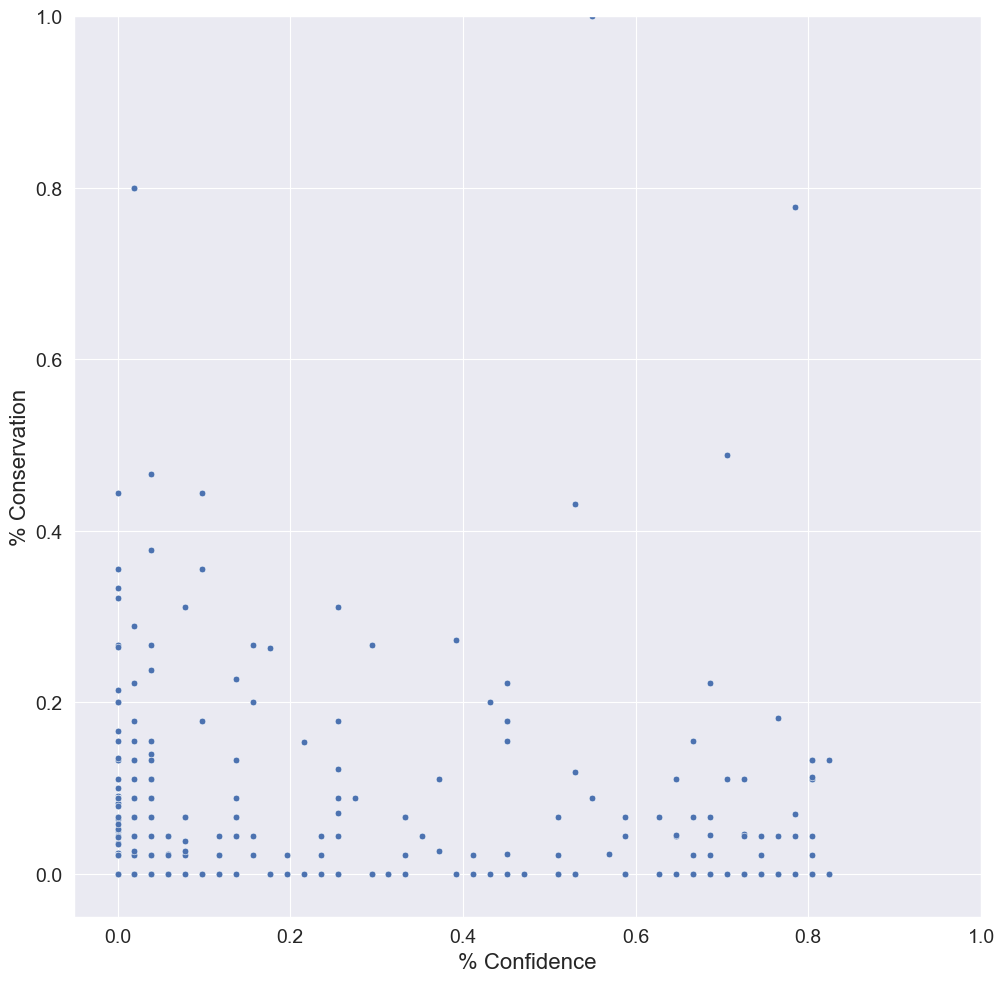

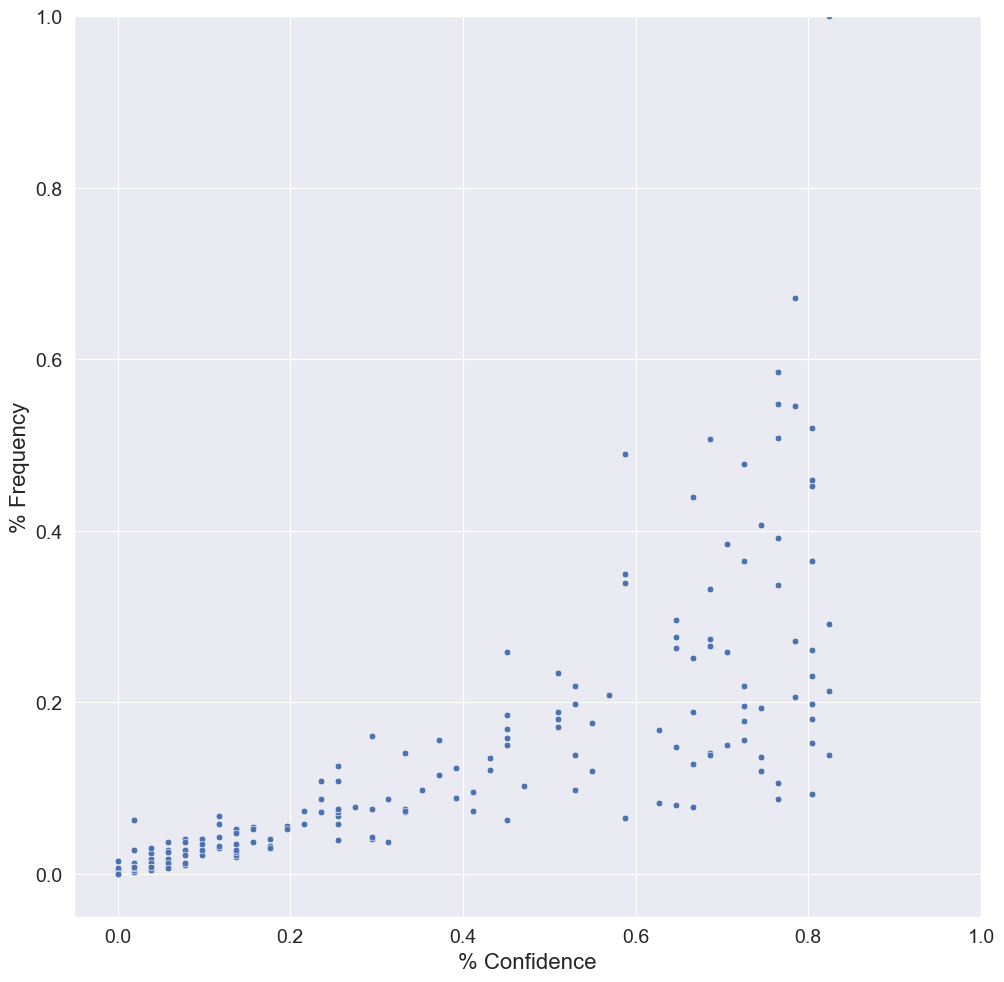

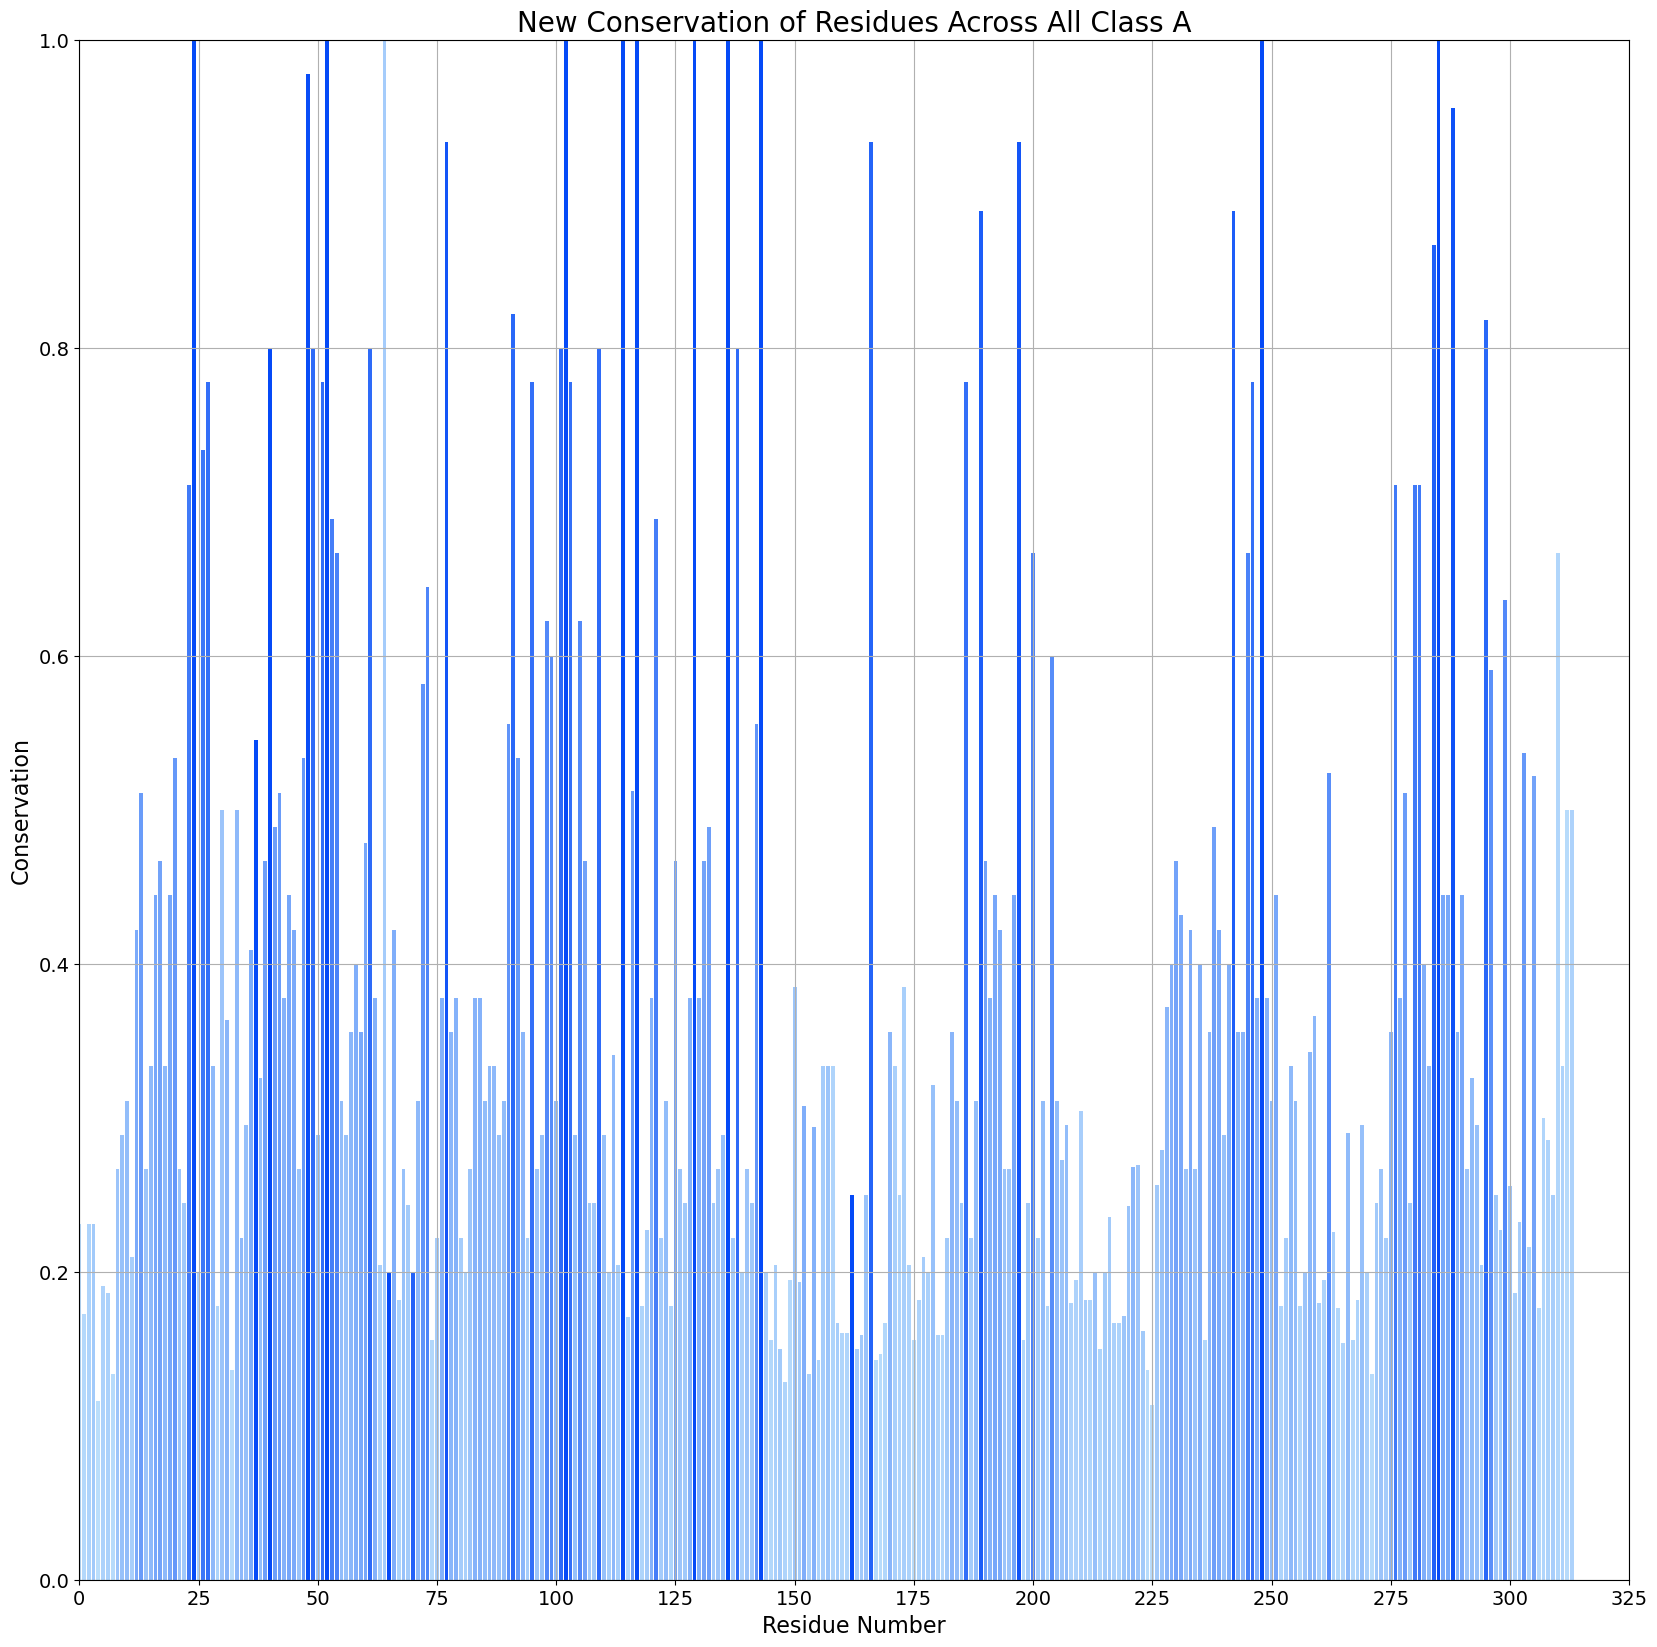

[14, 21, 24, 25, 27, 28, 38, 41, 43, 48, 49, 50, 52, 53, 54, 55, 62, 66, 71, 73, 74, 78, 91, 92, 93, 96, 99, 100, 102, 103, 104, 106, 110, 115, 117, 118, 122, 130, 137, 139, 143, 144, 163, 167, 187, 190, 198, 201, 205, 243, 246, 247, 249, 263, 277, 279, 281, 282, 285, 286, 289, 296, 297, 300, 304]


In [626]:
import importlib

# Reload the specified modules to ensure changes take effect
importlib.reload(mpl)
importlib.reload(plt)
importlib.reload(sns)

# Define the protein sequence in the 'Text' variable
Text = ("------------------------------------------------------------"
        "------------------------------------------------------------"
        "-----------------------MPI---MGSSVYIT-VELAIAVLAILGNVLVCWA-VW"
        "L--NSNLQNV---TNYFVVSLAAADIAVGVLAIPFAI-TISTGFCA---ACHGCLFIACF"
        "VLVLTQSSIFSLLAIAIDRYIAIRIPLRYNG--LVT---GTRAKGIIAICWVLSFAIG--"
        "-----LTPMLG-WNNCGQPKEGKNHSQGCGEGQVACLFEDVVP---------MNYMVYFN"
        "FFACVLVPLLLMLGVYLRIFLAARRQLKQMESQP--------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "----------------------------------------LPGERARSTLQKEVHAAKSL"
        "AIIVGLFALCWLPLHIINCFTF--------FCPDCSHAP--LWLMYLAIVLSHTNSVVNP"
        "FIYAYRIREFRQTFRKIIRSHVLRQQEPF------")

# Create a list 'List' to store residue positions
List = []
x = [*Text]

# Iterate through each character in the sequence
for char in range(len(x)):
    if x[char] != "-":
        List.append((char))

# Import the Pandas library for data analysis
import pandas as pd

# Read data from a CSV file into a DataFrame named 'df'
df = pd.read_csv("All_Class_A_New.csv", header=0)

# Define lists of amino acid letters and their fixed versions
Sequence_Letter = ("A ", "C ", "D ", "E ", "F ", "G ", "H ", "I ", "K ", "L ", "M ", "N ", "P ", "Q ", "R ", "S ", "T ", "V ", "W ", "Y ")
Sequence_Letter_Fixed = ("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")

# Initialize lists to store conservation proportions and corresponding residue names
Total_Conservation_Porportion_New = []
Total_Conservation_Name_New = []

# Iterate through each position in the 'df["#"]' column
for x in df["#"]:
    value = int(x)
    Values = []

    # Iterate through each residue in the 'Sequence_Letter' list
    for Residue in Sequence_Letter:
        Values.append(df[Residue][x - 1])
    Max = np.max(Values)
    Total = sum(Values)

    # Iterate through positions in 'List' to find matching 'value'
    for y in List:
        if value == y:
            # Calculate conservation proportion and store results
            Total_Conservation_Porportion_New.append(Max / Total)
            Total_Conservation_Name_New.append(Sequence_Letter[Values.index(Max) - 1])

# Create a linear colormap with custom colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)

# Normalize the data to the [0.0, 1.0] interval using linear normalization
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion_New), np.max(Total_Conservation_Porportion_New))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# Create a new figure with a specific size
plt.figure(figsize=(20, 20))

# Create a bar plot with colored bars based on the colormap
plt.bar(range(len(Total_Conservation_Porportion_New)), Total_Conservation_Porportion_New, color=cmap(norm(Total_Conservation_Porportion)))

# Set y-axis limits
plt.ylim(0, 1)

# Set x-axis limits
plt.xlim(0, 325)

# Set custom tick positions for x-axis
plt.xticks((0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325))

# Add gridlines to the plot
plt.grid()

# Set the title of the plot
plt.title('New Conservation of Residues Across All Class A', fontsize=20)

# Set labels for x-axis and y-axis
plt.xlabel('Residue Number', fontsize=16)
plt.ylabel('Conservation', fontsize=16)

# Save the plot to a file
plt.savefig('/Users/xhu/ROP_Figures_A2A/' + "Total_Water_Conservation_New")

# Display the plot
plt.show()

# Initialize a list to store residue positions with high conservation
List_above_30_New = []

# Iterate through each residue in the 'Total_Conservation_Porportion_New' list
for resid in range(len(Total_Conservation_Porportion_New)):
    # Check if the conservation is above a threshold (0.5 in this case)
    if Total_Conservation_Porportion[resid] >= 0.5:
        List_above_30_New.append((resid + 1))

# Print the list of residue positions with high conservation
print(List_above_30_New)


193


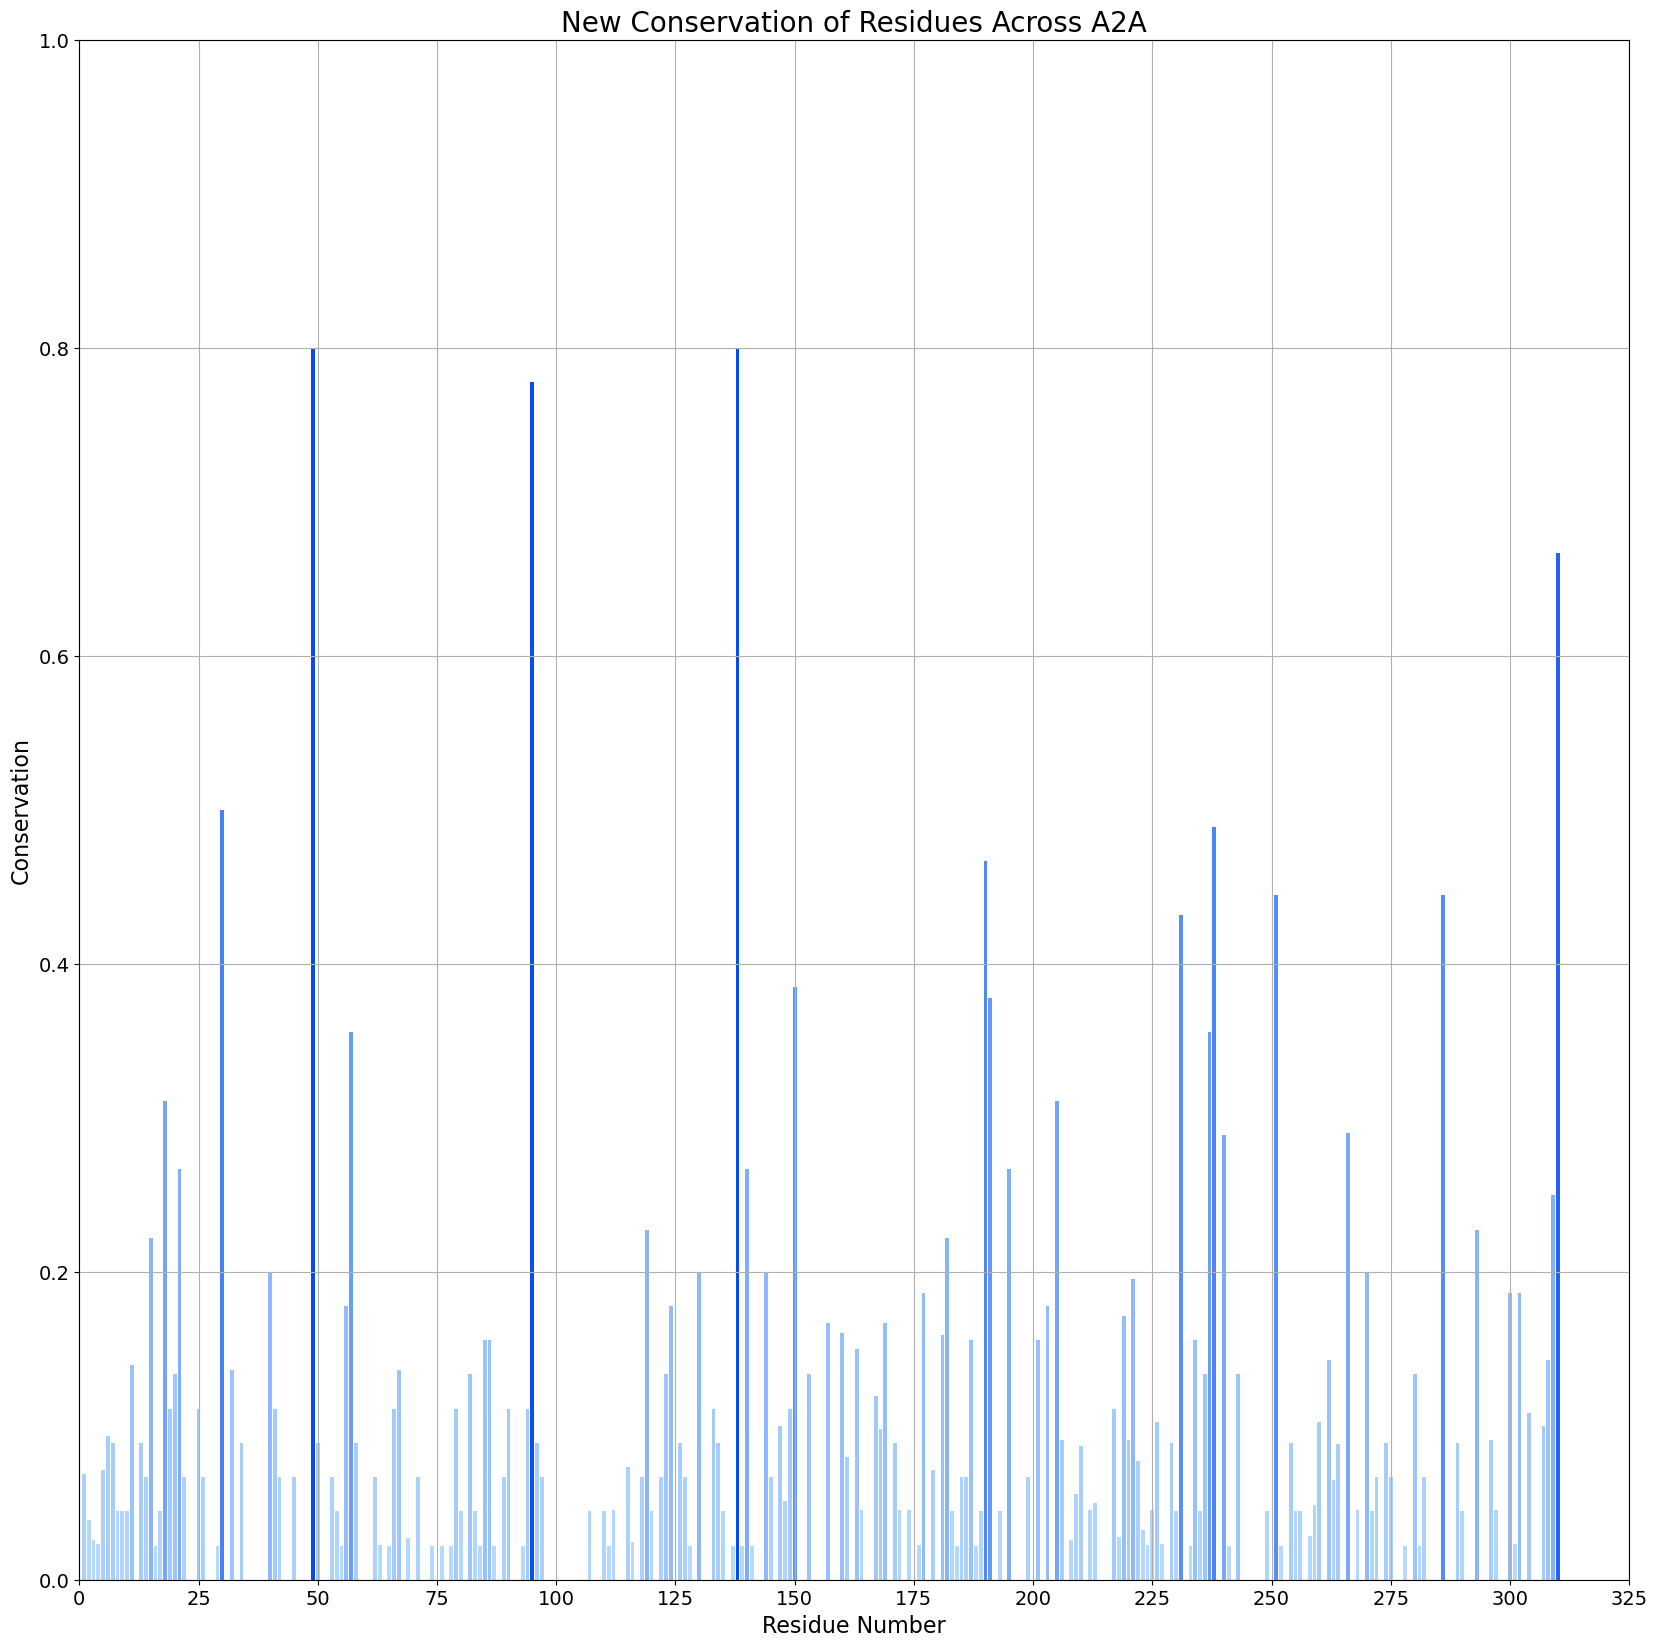

In [638]:
# Import the importlib module to reload other modules
import importlib

# Reload the specified modules (mpl, plt, sns) to ensure changes take effect
importlib.reload(mpl)
importlib.reload(plt)
importlib.reload(sns)

# Define the protein sequence in the 'Text' variable
Text = ("------------------------------------------------------------"
        "------------------------------------------------------------"
        "-----------------------MPI---MGSSVYIT-VELAIAVLAILGNVLVCWA-VW"
        "L--NSNLQNV---TNYFVVSLAAADIAVGVLAIPFAI-TISTGFCA---ACHGCLFIACF"
        "VLVLTQSSIFSLLAIAIDRYIAIRIPLRYNG--LVT---GTRAKGIIAICWVLSFAIG--"
        "-----LTPMLG-WNNCGQPKEGKNHSQGCGEGQVACLFEDVVP---------MNYMVYFN"
        "FFACVLVPLLLMLGVYLRIFLAARRQLKQMESQP--------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "------------------------------------------------------------"
        "----------------------------------------LPGERARSTLQKEVHAAKSL"
        "AIIVGLFALCWLPLHIINCFTF--------FCPDCSHAP--LWLMYLAIVLSHTNSVVNP"
        "FIYAYRIREFRQTFRKIIRSHVLRQQEPF------")

# Create lists 'List_Seq' and 'List_Seq_Letter' to store residue positions and corresponding letters
List_Seq = []
List_Seq_Letter = []

# Convert the protein sequence into a list of characters
x = [*Text]

# Iterate through each character in the sequence
for char in range(len(x)):
    if x[char] != "-":
        List_Seq.append(((char)))
        List_Seq_Letter.append(x[char])

# Print the 41st residue position in 'List_Seq' (zero-based indexing)
print(List_Seq[40])

# Import the Pandas library for data analysis
import pandas as pd

# Read data from a CSV file into a DataFrame named 'df'
df = pd.read_csv("All_Class_A_New.csv", header=0)

# Define lists of amino acid letters and their fixed versions
Sequence_Letter = ("A ", "C ", "D ", "E ", "F ", "G ", "H ", "I ", "K ", "L ", "M ", "N ", "P ", "Q ", "R ", "S ", "T ", "V ", "W ", "Y ")
Sequence_Letter_Fixed = ("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")

# Initialize lists to store conservation proportions and corresponding residue names
Total_Conservation_Porportion_A2A_New = []
Total_Conservation_Name_A2A_New = []

# Iterate through each position in the 'df["#"]' column
for x in df["#"]:
    value = int(x)
    Values = []

    # Iterate through each residue in the 'Sequence_Letter' list
    for Residue in Sequence_Letter:
        Values.append(df[Residue][x - 1])
    Max = np.max(Values)
    Total = sum(Values)

    # Iterate through positions in 'List_Seq' to find matching 'value'
    for y in (range(len(List_Seq))):
        if value == List_Seq[y]:
            # Calculate conservation proportion and store results
            Total_Conservation_Porportion_A2A_New.append(Max / Total)
            Total_Conservation_Name_A2A_New.append(List_Seq_Letter[y])

# Create a linear colormap with custom colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)

# Normalize the data to the [0.0, 1.0] interval using linear normalization
norm = mpl.colors.Normalize(np.min(Total_Conservation_Porportion_A2A_New), np.max(Total_Conservation_Porportion_A2A_New))

# Set font sizes for x-axis and y-axis tick labels
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# Create a new figure with a specific size
plt.figure(figsize=(20, 20))

# Create a bar plot with colored bars based on the colormap
plt.bar(range(len(Total_Conservation_Porportion_A2A_New)), Total_Conservation_Porportion_A2A_New, color=cmap(norm(Total_Conservation_Porportion_A2A_New)))

# Set y-axis limits
plt.ylim(0, 1)

# Set x-axis limits
plt.xlim(0, 325)

# Set custom tick positions for x-axis
plt.xticks((0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325))

# Add gridlines to the plot
plt.grid()

# Set the title of the plot
plt.title('New Conservation of Residues Across A2A


T
